# Koding Menggunakan EG-MAML Algorithm

In [1]:
# ============================
# By: Imam Cholissodin | imamcs@ub.ac.id
# Dosen Fakultas Ilmu Komputer (Filkom)
# Universitas Brawijaya (UB)
# Tgl 12 Oktober 2024, 
# Semoga Bermanfaat. Aamiin :D
# ====================================
# 

# Real data - Tiny

 ## Get Feature val. use One Hot - Target Rekomendasi Makanan

In [147]:
import re
import pandas as pd

# Data awal
data = """
1. Biji-bijian Utuh dan Kacang-kacangan 2. Sayuan Berdaun Gelap 3. Telur 4. Daging Merah Segar
1. Jahe 2. Bayam 3. Kuning Telur 4. Tuna
1. Jeruk 2. Delima 3. Yoghurt 4. Madu 5. Telur 6. Ikan 7. Susu Kedelai 8. Daging (Sapi) 9. Tiram 10. Hati Ayam 11. Kalkun 12. Wijen 13. Labu 14. Kentang 15. Brokoli 16. Air Kelapa
1. Sikat Kayu Siwak 2. Sup Hangat 3. Bubur 4. Jus Pisang 5. Jus Melon 6. Jus Blewah 7. Jus Tomat 8. Bubur Gandum dari Biji Food Grade (Oatmeal) 9. Telur 10. Bubur Kacang Hijau 11. Smoothie Bowl (Mix Jus Bus Buah dan Chia Seed) 12. Pasta
1. Air Putih 2. Wortel 3. Kubis 4. Kentang 5. Sup Ayam 6. Jus Delima 7. Pisang 8. Peppermint 9. Madu 10. Kunyit 11. Jahe 12. Teh chamomile 13. Bawang putih
"""

# Step 1: Hapus "number + dot" di awal baris sebelum spasi
cleaned_data = re.sub(r'^\d+\.\s', '', data, flags=re.MULTILINE)

# Step 2: Split baris menjadi list untuk memanipulasi tiap baris
lines = cleaned_data.strip().split('\n')

# Step 3: Tambahkan ",\n" di akhir setiap baris kecuali baris terakhir
formatted_data = ",\n".join(lines) + '\n'

# Step: Replace "number + dot" with comma
cleaned_data2 = re.sub(r'\d+\.\s', ', ', cleaned_data)

# Replace newline characters with commas
cleaned_data3 = re.sub(r'\n', ', ', cleaned_data2)

# Step 4: Split the data by comma to count elements
split_data = [item.strip() for item in cleaned_data3.split(',') if item.strip()]

# Hitung jumlah elemen
count = len(split_data)
print('Panjang data awal = ', count)

# Step 5: Split cleaned_data into a list of lines
lines = cleaned_data2.strip().split('\n')

# Step 6: Store each line as a string in a list
lines_as_strings = [line.strip() for line in lines]

# Split each row into individual items and strip any extra whitespace
rows = [set(item.strip().lower() for item in row.split(',')) for row in lines_as_strings]

# Hitung jumlah baris data
print('Jumlah baris data = ', len(rows))

# Ambil semua item unik dari semua baris
unique_items = sorted(set(item for row in rows for item in row))
print('Panjang data unik = ', len(unique_items))

# Buat DataFrame dengan one-hot encoding
one_hot_data = []
for row in rows:
    one_hot_data.append([1 if item in row else 0 for item in unique_items])

# Buat tabel dengan pandas
df = pd.DataFrame(one_hot_data, columns=unique_items)

# Tampilkan tabel yang dihasilkan
display(df)

# Simpan tabel hasil ke file Excel dengan nama sheet tertentu
output_file = "dataset/one_hot_encoded_data.xlsx"
sheet_name = "OneHotEncodedDataTarget"  # Nama sheet yang diinginkan

# Cek apakah file sudah ada dan append data jika ada
try:
    with pd.ExcelWriter(output_file, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        df.to_excel(writer, index=False, sheet_name=sheet_name)
    print(f"Data one-hot encoded telah ditambahkan ke {output_file} pada sheet '{sheet_name}'")
except FileNotFoundError:
    # Jika file tidak ada, simpan sebagai file baru
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        df.to_excel(writer, index=False, sheet_name=sheet_name)
    print(f"File {output_file} telah dibuat dan data ditambahkan pada sheet '{sheet_name}'")


Panjang data awal =  49
Jumlah baris data =  5
Panjang data unik =  44


,air kelapa,air putih,bawang putih,bayam,biji-bijian utuh dan kacang-kacangan,brokoli,bubur,bubur gandum dari biji food grade (oatmeal),bubur kacang hijau,daging (sapi),...,sup ayam,sup hangat,susu kedelai,teh chamomile,telur,tiram,tuna,wijen,wortel,yoghurt
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,1,0,1,0,1
3,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Data one-hot encoded telah ditambahkan ke dataset/one_hot_encoded_data.xlsx pada sheet 'OneHotEncodedDataTarget'


 ## Get Feature val. use One Hot - Input dr Gejala Penyakit

In [146]:
import pandas as pd

# Provided data in separate lines
# data = [
#     "Biji-bijian Utuh dan Kacang-kacangan, Sayuan Berdaun Gelap, Telur, Daging Merah Segar",
#     "Jahe, Bayam, Kuning Telur, Tuna",
#     "Jeruk, Delima, Yoghurt, Madu, Telur, Ikan, Susu Kedelai, Daging (Sapi), Tiram, Hati Ayam, Kalkun, Wijen, Labu, Kentang, Brokoli, Air Kelapa",
#     "Sikat Kayu Siwak, Sup Hangat, Bubur, Jus Pisang, Jus Melon, Jus Blewah, Jus Tomat, Bubur Gandum dari Biji Food Grade (Oatmeal), Telur, Bubur Kacang Hijau, Smoothie Bowl (Mix Jus Bus Buah dan Chia Seed), Pasta",
#     "Air Putih, Wortel, Kubis, Kentang, Sup Ayam, Jus Delima, Pisang, Peppermint, Madu, Kunyit, Jahe, Teh chamomile, Bawang putih"
# ]

data = [
    "Migraine, Sakit kepala berdenyut di satu sisi",
    "Vertigo, Pusing berputar, kehilangan keseimbangan",
    "Sariawan (di mulut/lidah), Luka kecil pada mulut/lidah, nyeri di sekitar mulut/lidah/pipi/kepala",
    "Sakit Gigi, Nyeri di gigi atau gusi",
    "Radang Tenggorokan, Nyeri tenggorokan, batuk, suara serak"
]

# data = """
# 1. Biji-bijian Utuh dan Kacang-kacangan 2. Sayuan Berdaun Gelap 3. Telur 4. Daging Merah Segar
# 1. Jahe 2. Bayam 3. Kuning Telur 4. Tuna
# 1. Jeruk 2. Delima 3. Yoghurt 4. Madu 5. Telur 6. Ikan 7. Susu Kedelai 8. Daging (Sapi) 9. Tiram 10. Hati Ayam 11. Kalkun 12. Wijen 13. Labu 14. Kentang 15. Brokoli 16. Air Kelapa
# 1. Sikat Kayu Siwak 2. Sup Hangat 3. Bubur 4. Jus Pisang 5. Jus Melon 6. Jus Blewah 7. Jus Tomat 8. Bubur Gandum dari Biji Food Grade (Oatmeal) 9. Telur 10. Bubur Kacang Hijau 11. Smoothie Bowl (Mix Jus Bus Buah dan Chia Seed) 12. Pasta
# 1. Air Putih 2. Wortel 3. Kubis 4. Kentang 5. Sup Ayam 6. Jus Delima 7. Pisang 8. Peppermint 9. Madu 10. Kunyit 11. Jahe 12. Teh chamomile 13. Bawang putih
# """

# Fungsi untuk menghitung banyak kata
def count_words(data):
    word_count = 0
    for entry in data:
        # Memisahkan setiap string berdasarkan koma
        # print(entry)
        parts = entry.split(',')
        # print(parts)
        word_count += len(parts)
        # for part in parts:
        #     # Menghitung jumlah kata dalam setiap bagian
        #     word_count += len(part.strip().split())
        #     print(word_count)
    return word_count
print('Panjang data awal = ', count_words(data))

# Split each row into individual items and strip any extra whitespace
rows = [set(item.strip().lower() for item in row.split(',')) for row in data]

# print(rows)

print('baris data = ', len(rows))

# Get all unique items from all rows
unique_items = sorted(set(item for row in rows for item in row))

print('panjang data unik = ', len(unique_items))

# Create a DataFrame with rows of data, where each column is a unique item (one-hot encoded)
one_hot_data = []
for row in rows:
    one_hot_data.append([1 if item in row else 0 for item in unique_items])

# Create the table with pandas
df = pd.DataFrame(one_hot_data, columns=unique_items)

# Display the resulting table
display(df)

# # Save the resulting table to an Excel file
# output_file = "dataset/one_hot_encoded_data.xlsx"
# df.to_excel(output_file, index=False)

# print(f"The one-hot encoded data has been saved to {output_file}")

# Simpan tabel hasil ke file Excel dengan nama sheet tertentu
output_file = "dataset/one_hot_encoded_data.xlsx"
sheet_name = "OneHotEncodedDataInput"  # Nama sheet yang diinginkan

# # Simpan DataFrame ke Excel dengan nama sheet tertentu
# with pd.ExcelWriter(output_file) as writer:
#     df.to_excel(writer, index=False, sheet_name=sheet_name)

# print(f"Data one-hot encoded telah disimpan ke {output_file} pada sheet '{sheet_name}'")

# Cek apakah file sudah ada dan append data jika ada
try:
    with pd.ExcelWriter(output_file, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        df.to_excel(writer, index=False, sheet_name=sheet_name)
    print(f"Data one-hot encoded telah ditambahkan ke {output_file} pada sheet '{sheet_name}'")
except FileNotFoundError:
    # Jika file tidak ada, simpan sebagai file baru
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        df.to_excel(writer, index=False, sheet_name=sheet_name)
    print(f"File {output_file} telah dibuat dan data ditambahkan pada sheet '{sheet_name}'")



Panjang data awal =  14
baris data =  5
panjang data unik =  14


,batuk,kehilangan keseimbangan,luka kecil pada mulut/lidah,migraine,nyeri di gigi atau gusi,nyeri di sekitar mulut/lidah/pipi/kepala,nyeri tenggorokan,pusing berputar,radang tenggorokan,sakit gigi,sakit kepala berdenyut di satu sisi,sariawan (di mulut/lidah),suara serak,vertigo
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,0,0,1,0


Data one-hot encoded telah ditambahkan ke dataset/one_hot_encoded_data.xlsx pada sheet 'OneHotEncodedDataInput'


## Build Tiny Dataset

In [755]:
import pandas as pd
import os

# Define constants for the number of rows to take from each sheet
n_data_model_1 = 3
n_data_model_2 = 2

# Define file paths
output_file = "dataset/one_hot_encoded_data.xlsx"
file_path = "dataset_init/dataset_v5.xlsx"
file_path_json = "dataset_init/dataset_v4.json"

# Ensure the output directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Load the input and target data sheets from the output file
input_data = pd.read_excel(output_file, sheet_name="OneHotEncodedDataInput")
target_data = pd.read_excel(output_file, sheet_name="OneHotEncodedDataTarget")

# Create datasets for each required sheet by concatenating input and target side-by-side
sheet1_data = pd.concat([input_data.iloc[:n_data_model_1, :], target_data.iloc[:n_data_model_1, :]], axis=1)
sheet2_data = pd.concat([input_data.iloc[-n_data_model_2:, :], target_data.iloc[-n_data_model_2:, :]], axis=1)
combined_data = pd.concat([input_data, target_data], axis=1)

# Save these datasets into a new Excel file with the specified sheet names
with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
    sheet1_data.to_excel(writer, sheet_name="Sheet1-KM-SAR-Tiny-Reg", index=False)
    sheet2_data.to_excel(writer, sheet_name="Sheet2-M-SAK-T-Tiny-Reg", index=False)
    combined_data.to_excel(writer, sheet_name="CombinedSheet", index=False)

print(f"File '{file_path}' created with sheets: 'Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg', and 'CombinedSheet'.")

# Convert the Excel data to JSON and save to a new file
# We load the entire workbook, convert each sheet to JSON, and save it to the specified JSON file path
excel_data = pd.read_excel(file_path, sheet_name=None)  # Load all sheets
json_data = {sheet_name: data.to_dict(orient="records") for sheet_name, data in excel_data.items()}

# Save the JSON data to file
with open(file_path_json, "w") as json_file:
    json.dump(json_data, json_file, indent=4)

print(f"File '{file_path_json}' created with data from all sheets in JSON format.")

File 'dataset_init/dataset_v5.xlsx' created with sheets: 'Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg', and 'CombinedSheet'.
File 'dataset_init/dataset_v4.json' created with data from all sheets in JSON format.


In [480]:
import pandas as pd
import os

# Define constants for the number of rows to take from each sheet
n_data_model_1 = 3
n_data_model_2 = 2

# Define file paths
output_file = "dataset/one_hot_encoded_data.xlsx"
file_path = "dataset_init/dataset_v5.xlsx"

# Ensure the output directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Load the input and target data sheets from the output file
input_data = pd.read_excel(output_file, sheet_name="OneHotEncodedDataInput")
target_data = pd.read_excel(output_file, sheet_name="OneHotEncodedDataTarget")

# Create datasets for each required sheet in the new file
# sheet1_data = pd.concat([input_data.iloc[:n_data_model_1, :], target_data.iloc[:n_data_model_1, :]], axis=0, ignore_index=True)
# sheet2_data = pd.concat([input_data.iloc[-n_data_model_2:, :], target_data.iloc[-n_data_model_2:, :]], axis=0, ignore_index=True)
# combined_data = pd.concat([input_data, target_data], axis=0, ignore_index=True)

# Create datasets for each required sheet by concatenating input and target side-by-side
sheet1_data = pd.concat([input_data.iloc[:n_data_model_1, :], target_data.iloc[:n_data_model_1, :]], axis=1)
sheet2_data = pd.concat([input_data.iloc[-n_data_model_2:, :], target_data.iloc[-n_data_model_2:, :]], axis=1)
combined_data = pd.concat([input_data, target_data], axis=1)

# Save these datasets into a new Excel file with the specified sheet names
with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
    sheet1_data.to_excel(writer, sheet_name="Sheet1-KM-SAR-Tiny-Reg", index=False)
    sheet2_data.to_excel(writer, sheet_name="Sheet2-M-SAK-T-Tiny-Reg", index=False)
    combined_data.to_excel(writer, sheet_name="Comb-KMT-Tiny-Reg", index=False)

print(f"File '{file_path}' created with sheets: 'Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg', and 'Comb-KMT-Tiny-Reg'.")

File 'dataset_init/dataset_v5.xlsx' created with sheets: 'Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg', and 'Comb-KMT-Tiny-Reg'.


# MAML and Reptile Alg. for Regression - Deep ELM - PyTorch

In [71]:
x_all = np.linspace(-5, 5, 3)[:, None]  # All of the x points
print(x_all)
print(x_all.shape)

[[-5.]
 [ 0.]
 [ 5.]]
(3, 1)


In [85]:
idx_x_all = np.arange(0,5)
print(idx_x_all)

[0 1 2 3 4]


In [220]:
# np.amin()
np.amin((n_sample, n_data_all), axis=0)

2

In [236]:
x_all_init

array([[0.],
       [4.]])

In [232]:
get_data_test(4)

[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [233]:
get_data_test(0)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [237]:
get_data_test(x_all_init)

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]]

In [231]:
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

def get_data_test_v2(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)
    
    # Konversi id_test_data ke array 1D dengan tipe integer
    if isinstance(id_test_data, (list, np.ndarray)):
        id_test_data = np.array(id_test_data).flatten().astype(int)  # Konversi ke array 1D integer

    # Ambil data dari indeks tertentu atau banyak indeks
    data_test_rows = df.iloc[id_test_data, :n_input]
    data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    
    return data_test

In [304]:
n_data_all = 5
n_sample = n_data_all # minimum 1, maks = n_data_all
idx_x_all = np.arange(0,n_data_all)[:,None]
# x_all_init = np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None]  # All of the x points
x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])
n_train = 3

# print(x_all_init)
print()
print(x_all)
print()
print(idx_x_all)
print(np.array(x_all).shape)
print(idx_x_all.shape)


[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]]

[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 14)
(5, 1)


In [314]:
x_all

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]]

In [320]:
import numpy as np

x_all = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
]

# Indeks yang ingin diambil
indices = rng.choice(len(x_all), size=n_train)

# Mengambil subset
subset = [x_all[i] for i in indices]

# Menampilkan hasil
print(np.array(subset).shape)

(3, 14)


In [335]:
# Choose a fixed task and minibatch for visualization
f_plot = gen_task_eg_maml_base_val_data()

# Indeks yang ingin diambil
indices = rng.choice(len(x_all), size=n_train)

# Mengambil subset
xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

# Menampilkan hasil
print(xtrain_plot)
# xtrain_plot = x_all[rng.choice(len(x_all), size=n_train)]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
[[0 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0]]


In [325]:
type(xtrain_plot)

numpy.ndarray

In [108]:
f_randomsine = gen_task()
print(f_randomsine)

<function gen_task.<locals>.<lambda> at 0x7fa929bb7790>


In [104]:
f = gen_task()
y_all = f(x_all)
print(y_all)

[[-0.52061968]
 [-2.66772754]
 [-2.362139  ]
 [ 0.11518924]
 [ 2.48661303]]


In [181]:
y_all.shape

(5, 1)

In [259]:
f_randoms_eg_maml_base_val_data = gen_task_eg_maml_base_val_data()
print(f_randoms_eg_maml_base_val_data)

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
<function gen_task_eg_maml_base_val_data.<locals>.<lambda> at 0x7fa919177430>


In [ ]:
y_all_eg_maml2 = f_randoms_eg_maml_base_val_data(x_all)
print(y_all_eg_maml2)
print(y_all_eg_maml2.shape)

In [245]:
f_randoms_eg_maml_base_idx_data = gen_task_eg_maml_base_idx_data()
print(f_randoms_eg_maml_base_idx_data)

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
<function gen_task_eg_maml_base_idx_data.<locals>.<lambda> at 0x7fa929b218b0>


In [ ]:
y_all_eg_maml = f_randoms_eg_maml_base_idx_data(idx_x_all)
print(y_all_eg_maml)
print(y_all_eg_maml.shape)

In [327]:
# Generate task
f = gen_task_eg_maml_base_val_data()
y_all = f(x_all)

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json


In [329]:
y_all.shape

(5, 44)

In [300]:
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# def gen_task_eg_maml(n_input, n_hidden1, n_hidden2, n_output, n_data_all, input_file_path, sheet_name):
#     elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
#     load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

#     # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
#     f_randoms_eg_maml = lambda idx_x_all: np.array(
#         [test_single_data_return_pred(elm_model, get_data_test(idx_x[0], n_input, input_file_path, sheet_name))
#          for idx_x in idx_x_all]
#     )
    
#     return f_randoms_eg_maml

# def gen_task_eg_maml_base_idx_data():
#     elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
#     load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

#     # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
#     f_randoms_eg_maml = lambda idx_x_all: np.array(
#         [test_single_data_return_pred(elm_model, get_data_test(idx_x[0]))
#          for idx_x in idx_x_all]
#     )
    
#     return f_randoms_eg_maml

def gen_task_eg_maml_base_idx_data():
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda idx_x: np.array(
            [test_single_data_return_pred(elm_model, get_data_test(idx_x_single[0]))
             for idx_x_single in idx_x]
        )

        return f_randoms_eg_maml

# def gen_task_eg_maml_base_val_data():
#     elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
#     load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

#     # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
#     f_randoms_eg_maml = lambda x_all: np.array(
#         [test_single_data_return_pred(elm_model, x[0]) for x in x_all]
#     )
    
#     return f_randoms_eg_maml

def gen_task_eg_maml_base_val_data():
    elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
    load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

    # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
    f_randoms_eg_maml = lambda x: np.array(
        [test_single_data_return_pred(elm_model, x_single) for x_single in x]
    )
    
    return f_randoms_eg_maml

In [352]:
def get_idx_x_all(x_all_in, x_all_to_search):
    # Data utama yang akan dicari indeksnya
    # x_all = [
    #     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    #     [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    #     [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    #     [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    #     [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
    # ]

    # List untuk menyimpan indeks hasil
    idx_result = []

    # Cari indeks dari setiap elemen di x_all_in dalam x_all
    for x_in in x_all_in:
        if x_in in x_all_to_search:
            idx_result.append(x_all_to_search.index(x_in))

    return idx_result

In [356]:
type(x_all)

list

In [371]:
# Contoh penggunaan
x_all_in = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
]
print(get_idx_x_all(x_all, x_all))  # Output: [0, 1]

[0, 1, 2, 3, 4]


In [364]:
# using ELMRegressionForReptile support param.data dan param.grad.data
def train_on_batch_eg_maml(x, y):
    x = to_torch(x)
    y = to_torch(y)

    model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # elm_model_reptile.zero_grad()
    # ypred = test_single_data_return_pred(elm_model_reptile,x)
    # loss = (ypred - y).pow(2).mean()
    # loss.backward()

    # Forward and backward pass
    model.train()
    optimizer.zero_grad()
    ypred = model(x)
    loss = criterion(ypred, y)
    loss.backward()
    optimizer.step()

    for param in model.parameters():
        param.data -= inner_step_size * param.grad.data

    # Save model checkpoint
    filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
    save_model_reptile_checkpoint(model, filename_ckpt)

    # return loss.item()  # Optionally return the loss for monitoring
    
def save_model_reptile_checkpoint(model, filename):
    # Dapatkan state_dict dari model
    model_state = model.state_dict()

    # Konversi tensor menjadi list untuk serialisasi JSON
    model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

    # Simpan model ke file JSON
    with open(filename, 'w') as f:
        json.dump(model_state_serializable, f)

def load_model_reptile_checkpoint(model, filename):
    # Muat model dari file JSON
    with open(filename, 'r') as f:
        model_state_serializable = json.load(f)

    # Konversi kembali dari list ke tensor
    model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

    # Memuat state_dict ke model
    model.load_state_dict(model_state)
    model.eval()  # Set model ke mode evaluasi

Model berhasil dimuat dari: model_reg_ckpt/model_reptile_checkpoint_31-10-2024-01-16-30.json
Hasil prediksi: [[-0.01834962  0.0013385   0.08651553  0.24707103  0.1532599   0.09907089
   0.05412611 -0.0422676   0.00641911 -0.03033484  0.13128929 -0.05562863
  -0.09788775  0.19593163  0.32983837 -0.00145775  0.03513634 -0.04001291
  -0.13261203 -0.18741111 -0.09910194  0.06469305 -0.06089606 -0.01480678
   0.22528563  0.0186011  -0.10041821  0.1484561   0.08975185  0.26444772
   0.11350157 -0.02509129 -0.13131104  0.21480459  0.13090637 -0.10971496
  -0.02247317  0.06064396 -0.08210115 -0.02624491  0.30296224  0.02375437
   0.01628181  0.0253423 ]]


In [411]:
get_mse_or_loss_val([0,1]).data.numpy()[:,None]

Individual losses: tensor([0.0934, 0.0573], grad_fn=<MeanBackward1>)


array([[0.09342473],
       [0.05727865]], dtype=float32)

In [402]:
np.array([0.0934, 0.0573]).mean()

0.07535

In [425]:
def get_idx_x_all(x_all_in, x_all_to_search):
    idx_result = []
    
    # Iterate through each element in x_all_in
    for x_in in x_all_in:
        # Iterate through x_all_to_search to find a matching element
        for i, x in enumerate(x_all_to_search):
            # Use np.array_equal to compare arrays element-wise
            if np.array_equal(x_in, x):
                idx_result.append(i)
                break  # Stop after the first match is found
    
    return idx_result

In [428]:
get_idx_x_all(xtrain_plot, x_all)

[2, 3, 0]

In [386]:
get_mse_or_loss_val(get_idx_x_all(x_all, x_all))

0.2045639455318451

In [415]:
xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

In [422]:
print(list(xtrain_plot))

[array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]


In [421]:
type(x_all)

list

In [405]:
def get_mse_or_loss_val(get_idx_x_all_in):
    # print()
    x = to_torch(np.array([x_all[i] for i in get_idx_x_all_in]))
    y = to_torch(np.array([y_all[i] for i in get_idx_x_all_in]))

    # cara 1
    model.zero_grad()
    y_pred = model(x)
    
    # print(y_pred)
    # print()
    
    individual_losses = (y_pred - y).pow(2).mean(dim=1)  # Loss for each sample along feature dimension
    # print("Individual losses:", individual_losses)

    # loss = (y_pred - y).pow(2).mean()
    # loss = (y_pred - y).pow(2).mean()
    
    # print(loss)
    
    # cara 2
    # criterion = nn.MSELoss()
    # model.zero_grad()
    # ypred = model(x)
    # loss = criterion(ypred, y)

    return individual_losses

In [368]:
def predict(x):
    x = to_torch(x)
    return model(x).data.numpy()

In [ ]:
predict(x_all)

## EG-MAML

### Set Device, Lib n Param

In [744]:
import numpy as np
import pandas as pd
import time
import os
from datetime import datetime
import pytz
from scipy.stats import ttest_ind, norm  # Add this line to import the norm distribution
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import HTML
from base64 import b64encode

my_device = torch.device('cuda' if torch.cuda.is_available() else 'mps' \
                      if torch.backends.mps.is_available() else 'cpu')
print('my_device support :', my_device)

#set params global
# num_iterations_all = 10
# pop_size_all = 3

# 
num_iterations_all = 250
pop_size_all = 30

# set manual, misal ingin dgn cpu
my_device = 'cpu'
print('set_device = ', my_device)
print()

def check_dtype_support(dtype):
    try:
        torch.tensor(1, dtype=dtype, device=my_device)
        # print('sukses bro')
        return True
    except TypeError:
        # print('ada error bro')
        return False
    
def decode_run_params_type1(run_params_tensor):
    # Mendecode sesuai urutan tipe data yang dibutuhkan
    decoded_params = [
        int(run_params_tensor[0].item()),     # int
        float(run_params_tensor[1].item()),   # float
        int(run_params_tensor[2].item()),     # int
        float(run_params_tensor[3].item()),   # float
        float(run_params_tensor[4].item()),   # float
        int(run_params_tensor[5].item())      # int
    ]
    return decoded_params

# Contoh penggunaan
# run_params_tensor = torch.tensor([1.6910, 0.0688, 3.2756, 0.0754, 0.0218, 5.0350])
# decoded_params = decode_run_params_type1(run_params_tensor)

# print("Decoded run_params type 1:", decoded_params)

def decode_run_params_type2(run_params_tensor): 
    decoded_params = [
        int(run_params_tensor[0].item()),     # int
        float(run_params_tensor[1].item()),   # float
        int(run_params_tensor[2].item()),     # int
        float(run_params_tensor[3].item()),   # float
        float(run_params_tensor[4].item()),   # float
        int(run_params_tensor[5].item()),     # int
        "E-MAML" if float(run_params_tensor[-1].item()) <= 0.5 else "E-MAML_Synthetic_E-Reptile"  # kondisi if-else
    ]
    
    return decoded_params

# Contoh penggunaan
# run_params_tensor = torch.tensor([1.6910, 0.0688, 3.2756, 0.0754, 0.0218, 5.0350, 0.5430])
# decoded_params = decode_run_params_type2(run_params_tensor)

# print("Decoded run_params type 2:", decoded_params)

def save_last_model_reptile_checkpoint(model, filename):
    # Dapatkan state_dict dari model
    model_state = model.state_dict()

    # Konversi tensor menjadi list untuk serialisasi JSON
    model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

    # Simpan model ke file JSON
    with open(filename, 'w') as f:
        json.dump(model_state_serializable, f)

def load_last_model_reptile_checkpoint(model, filename):
    # Muat model dari file JSON
    with open(filename, 'r') as f:
        model_state_serializable = json.load(f)

    # Konversi kembali dari list ke tensor
    model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

    # Memuat state_dict ke model
    model.load_state_dict(model_state)
    model.eval()  # Set model ke mode evaluasi
    
def save_last_info_params(
        n_iterations, n_data_all, n_sample, n_train, seed, inner_step_size,
        inner_epochs, outer_stepsize_reptile, outer_stepsize_maml,
        run, final_lossval, filename_last_Model, path_last_Model
    ):
    # Construct the info_params dictionary
    info_params = {
        "n_iterations": n_iterations,
        "n_data_all": n_data_all,
        "n_sample": n_sample,
        "n_train": n_train,
        "seed": seed,
        "inner_step_size": inner_step_size,
        "inner_epochs": inner_epochs,
        "outer_stepsize_reptile": outer_stepsize_reptile,
        "run": run,
        "outer_stepsize_maml": outer_stepsize_maml,
        "final_lossval": float(final_lossval),
        "filename_last_Model": filename_last_Model,
        "path_filename_last_Model": path_last_Model
    }

    # Construct the filename with all the specified information
    filename = (
        f"model_reg_last/model_params_last_{run}_{final_lossval:.3f}_"
        f"{filename_last_Model}.json"
    )

    # Ensure the directory exists
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    # Save the info_params dictionary to the file as JSON
    with open(filename, 'w') as json_file:
        json.dump(info_params, json_file, indent=4)

    # print(f"Parameters saved to {filename}")
    # return filename

# Check support for float64
supports_float64 = check_dtype_support(torch.float64)
print(f"Float64 support: {supports_float64}")

# Check support for float32
supports_float32 = check_dtype_support(torch.float32)
print(f"Float32 support: {supports_float32}")

my_device support : mps
set_device =  cpu

Float64 support: True
Float32 support: True


### def E-MAML dlm def experiment(run_params, last_generation)

In [745]:
def experiment(run_params, last_generation=False):
    # Mengambil parameter dari run_params
    seed = int(run_params[0])  # Asumsikan run_params[0] adalah seed
    inner_step_size = float(run_params[1])  # inner step size
    inner_epochs = int(run_params[2])  # inner epochs
    outer_stepsize_reptile = float(run_params[3])  # outer step size for reptile
    outer_stepsize_maml = float(run_params[4])  # outer step size for MAML
    n_iterations = int(run_params[5])  # number of outer updates
    
    run = "E-MAML" if float(run_params[-1]) <= 0.5 else "E-MAML_Synthetic_E-Reptile"  # kondisi if-else
    
    # print('Type of Meta-Learning:', run)
    rng = np.random.RandomState(seed)
    torch.manual_seed(seed)

    # Define task distribution
    n_data_all = 5
    n_sample = n_data_all # minimum 1, maks = n_data_all
    idx_x_all = np.arange(0,n_data_all)[:,None]
    
    # All of the x points data, dengan fitur input pepanjang n_input = 14
    x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])
    # n_train = 10  # Size of training minibatches
    n_train = 3  # Size of training minibatches, harus < n_data_all
    
    # info_params = f"imax-{n_iterations}-ndata-{n_data_all}-nspl-{n_sample}-ntrain-{n_train}-s-{seed}-iss-{inner_step_size}-ie-{inner_epochs}-osr-{outer_stepsize_reptile}-osm-{outer_stepsize_maml}"
       
    def get_mse_or_loss_val(get_idx_x_all_in):
        x = to_torch(np.array([x_all[i] for i in get_idx_x_all_in]))
        y = to_torch(np.array([y_all[i] for i in get_idx_x_all_in]))

        # cara 1
        model.zero_grad()
        y_pred = model(x)
        individual_losses = (y_pred - y).pow(2).mean(dim=1)  # Loss for each sample along feature dimension
        # print("Individual losses:", individual_losses)

        return individual_losses.data.numpy()
    
    def get_idx_x_all(x_all_in, x_all_to_search):
        idx_result = []

        # Iterate through each element in x_all_in
        for x_in in x_all_in:
            # Iterate through x_all_to_search to find a matching element
            for i, x in enumerate(x_all_to_search):
                # Use np.array_equal to compare arrays element-wise
                if np.array_equal(x_in, x):
                    idx_result.append(i)
                    break  # Stop after the first match is found

        return idx_result

    def gen_task_eg_maml_base_idx_data():
        # elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        # load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda idx_x: np.array(
            [test_single_data_return_pred(elm_model_n_hidden_layers, get_data_test(idx_x_single[0]))
             for idx_x_single in idx_x]
        )

        return f_randoms_eg_maml
    
    def gen_task_eg_maml_base_val_data():
        # elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        # load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml
    
    def gen_task(): # sama dengan gen_task_eg_maml_base_val_data()
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml

    # Define model. Reptile paper uses ReLU, but Tanh gives slightly better results
    # ==========
    # nn.Sequential: Mudah dan cocok untuk deep learning sederhana yang berurutan, 
    # tidak cocok jika arsitektur membutuhkan koneksi yang kompleks.
    ## -------
    # nn.Linear dalam Kelas nn.Module: Lebih fleksibel dan dapat digunakan untuk arsitektur kompleks, 
    # yang melibatkan banyak hidden layer, skip connections, atau jalur paralel.
    
    # Custom activation function NRReLU
    def NRReLU(x):
        return 1 / (torch.exp(-x) - torch.exp(x))

    activations = [NRReLU, nn.Sigmoid(), nn.Tanh(), nn.ReLU()]  # Custom activations, including NRReLU
    
    # Define a function to create the model with configurable layers and activation functions
    def define_model_type1(n_input, n_hidden_layers, n_output, activations=None):
        layers = []
        input_dim = n_input

        # Ensure activations list matches the number of hidden layers, or use ReLU as default
        if activations is None:
            activations = [F.relu] * len(n_hidden_layers)  # Default to ReLU for all layers
        elif len(activations) != len(n_hidden_layers):
            raise ValueError("Length of activations must match number of hidden layers")

        # Add each hidden layer with the specified number of neurons and activation
        for hidden_units, activation in zip(n_hidden_layers, activations):
            layers.append(nn.Linear(input_dim, hidden_units))
            input_dim = hidden_units  # Update input_dim for the next layer

            # Add the activation layer as a callable function
            layers.append(activation)  # Add the activation function directly

        # Add the final output layer without activation
        layers.append(nn.Linear(input_dim, n_output))

        # Create the model with nn.Sequential
        model = nn.Sequential(*layers)
        return model
    
    def define_model_type2(n_input, n_hidden_layers, n_output):
        #     model = nn.Sequential(
        #         nn.Linear(1, 64),
        #         nn.Tanh(),
        #         nn.Linear(64, 64),
        #         nn.Tanh(),
        #         nn.Linear(64, 1),
        #     )

        layers = []
        input_dim = n_input

        # Add each hidden layer with alternating activation functions
        for i, hidden_units in enumerate(n_hidden_layers):
            layers.append(nn.Linear(input_dim, hidden_units))

            # Use ReLU for the first layer, Tanh for others
            if i % 2 == 0:
                layers.append(nn.ReLU())
            else:
                layers.append(nn.Tanh())

            input_dim = hidden_units  # Update input_dim for the next layer

        # Add the final output layer
        layers.append(nn.Linear(input_dim, n_output))

        # Create the model with nn.Sequential
        model = nn.Sequential(*layers)
        return model
    
    # Define sintesis model. Reptile dengan ELMRegressionForReptile - nn.Linear
    model = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        
    def save_model_reptile_checkpoint(model, filename):
        # Dapatkan state_dict dari model
        model_state = model.state_dict()

        # Konversi tensor menjadi list untuk serialisasi JSON
        model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

        # Simpan model ke file JSON
        with open(filename, 'w') as f:
            json.dump(model_state_serializable, f)

    def load_model_reptile_checkpoint(model, filename):
        # Muat model dari file JSON
        with open(filename, 'r') as f:
            model_state_serializable = json.load(f)

        # Konversi kembali dari list ke tensor
        model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

        # Memuat state_dict ke model
        model.load_state_dict(model_state)
        model.eval()  # Set model ke mode evaluasi

    def to_torch(x):
        return ag.Variable(torch.Tensor(x))

    # def train_on_batch(x, y):
    #     x = to_torch(x)
    #     y = to_torch(y)
    #     model.zero_grad()
    #     ypred = model(x)
    #     loss = (ypred - y).pow(2).mean()
    #     loss.backward()
    #     for param in model.parameters():
    #         param.data -= inner_step_size * param.grad.data
    
               
    # using ELMRegressionForReptile support param.data dan param.grad.data
    def train_on_batch_eg_maml(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        # filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        # save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
            
    def train_on_batch(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        # filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        # save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
        
    # Cara Memuat model dari checkpoint
    #     try:
    #         load_model_reptile_checkpoint(model, filename_ckpt)
    #         print("Model berhasil dimuat dari:", filename_ckpt)
    #     except Exception as e:
    #         print("Terjadi kesalahan saat memuat model:", e)

    #     # Sekarang Anda bisa menggunakan model untuk melakukan prediksi atau melanjutkan pelatihan
    #     # Contoh prediksi
    #     x_test = to_torch([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])  # Ganti dengan data yang sesuai
    #     model.eval()  # Set model ke mode evaluasi
    #     with torch.no_grad():
    #         prediction = model(x_test)
    #         print("Hasil prediksi:", prediction.numpy())

    def predict(x):
        x = to_torch(x)
        return model(x).data.numpy()
    
    #     def save_info_params(
    #         n_iterations, n_data_all, n_sample, n_train, seed, inner_step_size,
    #         inner_epochs, outer_stepsize_reptile, outer_stepsize_maml,
    #         run, final_lossval, filename_last_Model
    #     ):
    #         # Construct the info_params dictionary
    #         info_params = {
    #             "imax": n_iterations,
    #             "ndata": n_data_all,
    #             "nspl": n_sample,
    #             "ntrain": n_train,
    #             "s": seed,
    #             "iss": inner_step_size,
    #             "ie": inner_epochs,
    #             "osr": outer_stepsize_reptile,
    #             "run": run,
    #             "osm": outer_stepsize_maml,
    #             "final_lossval": float(final_lossval)
    #         }

    #         # Construct the filename with all the specified information
    #         filename = (
    #             f"model_reg_last/model_params_last_{run}_{final_lossval:.3f}_"
    #             f"{filename_last_Model}.json"
    #         )

    #         # Ensure the directory exists
    #         os.makedirs(os.path.dirname(filename), exist_ok=True)

    #         # Save the info_params dictionary to the file as JSON
    #         with open(filename, 'w') as json_file:
    #             json.dump(info_params, json_file, indent=4)

        # print(f"Parameters saved to {filename}")
        # return filename

    # Choose a fixed task and minibatch for visualization
    f_plot = gen_task()
    # xtrain_plot = x_all[rng.choice(len(x_all), size=n_train)]
    xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

    # plt.cla()
    # Set figure and axis properties
    # plt.figure()
    
    # Set gray background color
    # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
    # plt.gca().set_facecolor('lightgray')
    
    # Add grid lines
    # plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Training loop
    filename_first_n_last_Loss = datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")
    for iteration in range(n_iterations):
        weights_before = deepcopy(model.state_dict())

        # Generate task
        f = gen_task()
        y_all = f(x_all)

        # Do SGD on this task
        inds = rng.permutation(len(x_all))
        train_ind = inds[:-1 * n_train]
        val_ind = inds[-1 * n_train:]       # Val contains 1/5th of the gt model (com. model)

        for _ in range(inner_epochs):
            for start in range(0, len(train_ind), n_train):
                mbinds = train_ind[start:start + n_train]
                # print('mbinds =', mbinds)
                # print()
                # print('x_all[mbinds] =', x_all[mbinds])
                # print()
                # print('y_all[mbinds] =', y_all[mbinds])
                x_all_mbinds = np.array([x_all[i] for i in mbinds])
                y_all_mbinds = np.array([y_all[i] for i in mbinds])
                # train_on_batch(x_all[mbinds], y_all[mbinds])
                train_on_batch(x_all_mbinds, y_all_mbinds)
                
                # print('=======================')

        if run == 'E-MAML':
            outer_step_size = outer_stepsize_maml * (1 - iteration / n_iterations)  # linear schedule
            for start in range(0, len(val_ind), n_train):
                dpinds = val_ind[start:start + n_train]
                # print('dpinds =', dpinds)
                # print()
                
                # x = to_torch(x_all[dpinds])
                x = to_torch(np.array([x_all[i] for i in dpinds]))
                
                # y = to_torch(y_all[dpinds])
                y = to_torch(np.array([y_all[i] for i in dpinds]))

                # Compute the grads
                model.zero_grad()
                y_pred = model(x)
                loss = (y_pred - y).pow(2).mean()
                loss.backward()
                

                # Reload the model
                model.load_state_dict(weights_before)

                # SGD on the params
                for param in model.parameters():
                    param.data -= outer_step_size * param.grad.data
            # print(weights_before)
        else:
            # Interpolate between current weights and trained weights from this task
            # I.e. (weights_before - weights_after) is the meta-gradient
            weights_after = model.state_dict()
            outerstepsize = outer_stepsize_reptile * (1 - iteration / n_iterations)  # linear schedule
            model.load_state_dict({name: weights_before[name] + (weights_after[name] - weights_before[name]) * outerstepsize
                                   for name in weights_before})

        # Periodically plot the results on a particular task and minibatch
        # if (plot and ((iteration == 0) or ((iteration + 1) % 1000 == 0))):
#         if (plot and ((iteration == 0) or ((iteration + 1) % n_iterations == 0))):
#             plt.cla()
#             # plt.cla()
            
#             # Set gray background color
#             # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
            
#             # Set gray background color
#             # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
#             plt.gca().set_facecolor('lightgray')

#             # Add grid lines
#             plt.grid(color='gray', linestyle='--', linewidth=0.5)
            
#             f = f_plot
#             weights_before = deepcopy(model.state_dict())  # save snapshot before evaluation
            
#             # plt.plot(x_all, predict(x_all), label="pred after 0", color=(0, 0, 1))
#             get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
#             get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
#             plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after 0", color=(0, 0, 1))
            
#             for inneriter in range(32):
#                 train_on_batch(xtrain_plot, f(xtrain_plot))
#                 if (inneriter + 1) % 8 == 0:
#                     frac = (inneriter + 1) / 32
#                     # plt.plot(x_all, predict(x_all), label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
                    
#                     get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
#                     get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
#                     plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
            
#             # plt.plot(x_all, f(x_all), label="true", color=(0, 1, 0))
#             # plt.plot(x_all, f(x_all), label="ground truth from sin(x)", color=(0, 1, 0))
            
#             get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
#             get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
#             plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="ground truth from comb. model", color=(0, 1, 0))
            
            
#             lossval = np.square(predict(x_all) - f(x_all)).mean()
#             # plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
            
#             # print("xtrain_plot: ",xtrain_plot)
            
#             get_idx_x_all_to_2d_plot = get_idx_x_all(xtrain_plot, x_all) # agar dapat diplot pd 2D
#             get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all_to_2d_plot)
            
#             # print("idx xtrain_plot: ",get_idx_x_all_to_2d_plot)
        
            
#             plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, "x", label="train", color="k")
            
#             plt.ylim(-4, 4)
#             plt.xlim(0, 4)  # Set x-axis limits
#             plt.xticks(range(5))  # Set x-ticks to show 0, 1, 2, 3, 4
#             plt.xlabel("index of data")  # Label for x-axis
#             plt.ylabel("loss value")     # Label for y-axis
#             plt.legend(loc="lower right")
            
#             plt.savefig(f"loss_e_maml/plot_{run}_{lossval:.3f}_iter_{iteration}_{filename_first_n_last_Loss}.png")
#             plt.savefig(f"loss_e_maml/plot_{run}_{lossval:.3f}_iter_{iteration}_{filename_first_n_last_Loss}.pdf")

            
#             plt.pause(0.01)
#             model.load_state_dict(weights_before)  # restore from snapshot
#             print(f"-----------------------------")
#             print(f"iteration               {iteration + 1}")
#             print(f"loss on plotted curve   {lossval:.3f}")  # would be better to average loss over a set of examples, but this is optimized for brevity

    
    # print()
    final_lossval = np.square(predict(x_all) - f(x_all)).mean()
    # print(f"final loss on last model = {final_lossval:.3f}") 
    filename_last_Model = datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")
    
    # Save last loss
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.png")
    # plt.savefig(f"loss_e_maml/plot_e_maml{filename_last_Model_n_Loss}.pdf")
    
    # Save the plot as PNG and PDF only after plotting
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.png")
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.pdf")

    # Optionally, show the plot if you want to display it interactively
    # plt.show()  # Use this only if you want to display the plot interactively
    
    
    # Save last model checkpoint
    # path_last_Model = f'model_reg_last/model_last_{run}_{final_lossval:.3f}_{filename_last_Model}.json'
    path_last_Model = f'model_reg_last/model_last_{run}_{final_lossval:.3f}_{filename_last_Model}'
    # save_model_reptile_checkpoint(model, path_last_Model)
    # save_info_params(
    #     n_iterations, n_data_all, n_sample, n_train, seed, inner_step_size,
    #     inner_epochs, outer_stepsize_reptile, outer_stepsize_maml,
    #     run, final_lossval, filename_last_Model)
    
    config = {
        "n_iterations": n_iterations,
        "n_data_all": n_data_all,
        "n_sample": n_sample,
        "n_train": n_train,
        "seed": seed,
        "inner_step_size": inner_step_size,
        "inner_epochs": inner_epochs,
        "outer_stepsize_reptile": outer_stepsize_reptile,
        "outer_stepsize_maml": outer_stepsize_maml,
        "run": run,
        "final_lossval": final_lossval,
        "filename_last_Model": filename_last_Model,
        "path_filename_last_Model": path_last_Model
        
    }
    if(last_generation==True):
        return final_lossval, path_last_Model, model, config
    else:
        return final_lossval  

### calculate_fitness

#### fitness_ind_eg_maml_tp_1

In [711]:
fitness_ind_eg_maml_tp_2()

tensor([0.2407, 0.2413, 0.2461, 0.2211, 0.2313])

In [746]:
def fitness_ind_eg_maml_tp_1(x=None, last_generation=False):
    # Tentukan batas untuk variabel
    bounds_tp_1 = [
        (0, 4),  # Bound untuk seed (misalnya dari 0 sampai 100)
        (0.01, 0.1),  # Bound untuk inner_step_size (misalnya dari 0.01 sampai 0.1)
        (1, 7),  # Bound untuk inner_epochs (misalnya dari 1 sampai 10)
        (0.01, 0.2),  # Bound untuk outer_stepsize_reptile (misalnya dari 0.01 sampai 0.2)
        (0.001, 0.05),  # Bound untuk outer_stepsize_maml (misalnya dari 0.001 sampai 0.05)
        (1, 10),  # Bound untuk n_iterations (misalnya dari 1 sampai 50)
        (0, 1)  # Bound untuk run type (misalnya dari 0 sampai 1) "E-MAML" if <= 0.5 else "E-MAML_Synthetic_E-Reptile"
    ]
    
    def calculate_fitness(run_params_in, last_generation_in=False):
        # Asumsikan 'run' adalah tensor yang berisi parameter individu
        # Konversi 'run' ke format yang sesuai untuk experiment
        # Misalnya, kita dapat mengonversi tensor menjadi list atau numpy array, tergantung implementasi experiment
        run_params = run_params_in.detach().cpu().numpy().tolist()  # Jika menggunakan PyTorch, ambil data ke CPU dan konversi ke list

        # Memanggil fungsi experiment dengan parameter yang sesuai
        # fitness_value = experiment(run_params)  # plot=False untuk tidak menampilkan plot
        # fitness_value, path_last_Model, model, config = experiment(run_params)  # plot=False untuk tidak menampilkan plot
                
        if(last_generation_in == True):
            fitness_value, path_last_Model, model, config = experiment(run_params, True)  # plot=False untuk tidak menampilkan plot
            return fitness_value, path_last_Model, model, config
        else:
            # print()
            fitness_value = experiment(run_params)
            return fitness_value

        # Mengembalikan nilai fitness
        # return fitness_value
        # return fitness_value, path_last_Model, model, config

    # Jika x tidak diberikan, inisialisasi dengan nilai acak
    if x is None:
        pop_size_all = 5
        
        dim = len(bounds_tp_1)
        num_ind = pop_size_all
        
        x = torch.rand((num_ind, dim), device=my_device) * \
            (torch.tensor(bounds_tp_1, device=my_device)[:, 1] - \
             torch.tensor(bounds_tp_1, device=my_device)[:, 0]) + \
            torch.tensor(bounds_tp_1, device=my_device)[:, 0]
        
        # print(x)
    else:
        # Menyesuaikan tipe data tensor x
        if check_dtype_support(torch.float64):
            x = x.to(torch.float64)
            # print('utilize torch.float64')
        else:
            x = x.to(torch.float32)
            # print('utilize torch.float32')
            
        
    
    # Mendapatkan ukuran populasi
    get_pop_size = x.shape[0]
    
    fitness_all = []  # tampung semua nilai fitness dari individu
    
    # Inisialisasi variabel sementara
    temp_path_last_Model = None
    temp_model = None
    temp_config = None
    temp_i_ind = None
    
    for i_ind in range(get_pop_size):
        # print(x[i_ind])
        # Hitung fitness untuk individu ke-i
        # fitness = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
        # fitness, path_last_Model, model, config = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
        
        if(last_generation==True):
            fitness, path_last_Model, model, config = calculate_fitness(x[i_ind], True)  # Misalkan ada fungsi calculate_fitness
            
            if i_ind == 0:
                # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
                temp_path_last_Model = path_last_Model
                temp_model = model
                temp_config = config
                temp_i_ind = i_ind
            else:
                # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
                if fitness < fitness_all[i_ind - 1]:
                    temp_path_last_Model = path_last_Model
                    temp_model = model
                    temp_config = config
                    temp_i_ind = i_ind
        else:
            fitness = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
            
        fitness_all.append(fitness)
        
        # if i_ind == 0:
        #     # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
        #     temp_path_last_Model = path_last_Model
        #     temp_model = model
        #     temp_config = config
        #     temp_i_ind = i_ind
        # else:
        #     # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
        #     if fitness < fitness_all[i_ind - 1]:
        #         temp_path_last_Model = path_last_Model
        #         temp_model = model
        #         temp_config = config
        #         temp_i_ind = i_ind

    # return torch.tensor(fitness_all, device=my_device)
    # return torch.tensor(fitness_all, device=my_device), temp_path_last_Model, temp_model, temp_config, temp_i_ind
    if(last_generation==True):
        return torch.tensor(fitness_all, device=my_device), temp_path_last_Model, temp_model, temp_config, temp_i_ind
    else:
        return torch.tensor(fitness_all, device=my_device)

#### fitness_ind_eg_maml_tp_2

In [747]:
def fitness_ind_eg_maml_tp_2(x=None, last_generation=False):
    # Tentukan batas untuk variabel
    bounds_tp_2 = [
        (0, 8),  # Bound untuk seed (misalnya dari 0 sampai 100)
        (0.001, 0.2),  # Bound untuk inner_step_size (misalnya dari 0.01 sampai 0.1)
        (1, 14),  # Bound untuk inner_epochs (misalnya dari 1 sampai 10)
        (0.001, 0.4),  # Bound untuk outer_stepsize_reptile (misalnya dari 0.01 sampai 0.2)
        (0.0001, 0.1),  # Bound untuk outer_stepsize_maml (misalnya dari 0.001 sampai 0.05)
        (1, 20),  # Bound untuk n_iterations (misalnya dari 1 sampai 50)
        (0, 1)  # Bound untuk run type (misalnya dari 0 sampai 1) "E-MAML" if <= 0.5 else "E-MAML_Synthetic_E-Reptile"
    ]
    
    def calculate_fitness(run_params_in, last_generation_in=False):
        # Asumsikan 'run' adalah tensor yang berisi parameter individu
        # Konversi 'run' ke format yang sesuai untuk experiment
        # Misalnya, kita dapat mengonversi tensor menjadi list atau numpy array, tergantung implementasi experiment
        run_params = run_params_in.detach().cpu().numpy().tolist()  # Jika menggunakan PyTorch, ambil data ke CPU dan konversi ke list

        # Memanggil fungsi experiment dengan parameter yang sesuai
        # fitness_value = experiment(run_params)  # plot=False untuk tidak menampilkan plot
        # fitness_value, path_last_Model, model, config = experiment(run_params)  # plot=False untuk tidak menampilkan plot
                
        if(last_generation_in == True):
            fitness_value, path_last_Model, model, config = experiment(run_params, True)  # plot=False untuk tidak menampilkan plot
            return fitness_value, path_last_Model, model, config
        else:
            # print()
            fitness_value = experiment(run_params)
            return fitness_value

        # Mengembalikan nilai fitness
        # return fitness_value
        # return fitness_value, path_last_Model, model, config

    # Jika x tidak diberikan, inisialisasi dengan nilai acak
    if x is None:
        pop_size_all = 5
        
        dim = len(bounds_tp_2)
        num_ind = pop_size_all
        
        x = torch.rand((num_ind, dim), device=my_device) * \
            (torch.tensor(bounds_tp_2, device=my_device)[:, 1] - \
             torch.tensor(bounds_tp_2, device=my_device)[:, 0]) + \
            torch.tensor(bounds_tp_2, device=my_device)[:, 0]
        
        # print(x)
    else:
        # Menyesuaikan tipe data tensor x
        if check_dtype_support(torch.float64):
            x = x.to(torch.float64)
            # print('utilize torch.float64')
        else:
            x = x.to(torch.float32)
            # print('utilize torch.float32')
            
        
    
    # Mendapatkan ukuran populasi
    get_pop_size = x.shape[0]
    
    fitness_all = []  # tampung semua nilai fitness dari individu
    
    # Inisialisasi variabel sementara
    temp_path_last_Model = None
    temp_model = None
    temp_config = None
    temp_i_ind = None
    
    for i_ind in range(get_pop_size):
        # print(x[i_ind])
        # Hitung fitness untuk individu ke-i
        # fitness = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
        # fitness, path_last_Model, model, config = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
        
        if(last_generation==True):
            fitness, path_last_Model, model, config = calculate_fitness(x[i_ind], True)  # Misalkan ada fungsi calculate_fitness
            
            if i_ind == 0:
                # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
                temp_path_last_Model = path_last_Model
                temp_model = model
                temp_config = config
                temp_i_ind = i_ind
            else:
                # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
                if fitness < fitness_all[i_ind - 1]:
                    temp_path_last_Model = path_last_Model
                    temp_model = model
                    temp_config = config
                    temp_i_ind = i_ind
        else:
            fitness = calculate_fitness(x[i_ind])  # Misalkan ada fungsi calculate_fitness
            
        fitness_all.append(fitness)
        
        # if i_ind == 0:
        #     # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
        #     temp_path_last_Model = path_last_Model
        #     temp_model = model
        #     temp_config = config
        #     temp_i_ind = i_ind
        # else:
        #     # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
        #     if fitness < fitness_all[i_ind - 1]:
        #         temp_path_last_Model = path_last_Model
        #         temp_model = model
        #         temp_config = config
        #         temp_i_ind = i_ind

    # return torch.tensor(fitness_all, device=my_device)
    # return torch.tensor(fitness_all, device=my_device), temp_path_last_Model, temp_model, temp_config, temp_i_ind
    if(last_generation==True):
        return torch.tensor(fitness_all, device=my_device), temp_path_last_Model, temp_model, temp_config, temp_i_ind
    else:
        return torch.tensor(fitness_all, device=my_device)

### Set Optimizer Fn

#### GA

In [748]:
def ga(objective_func, bounds, num_generations=num_iterations_all, population_size=pop_size_all, crossover_prob=0.7, mutation_prob=0.1, elite_percentage=1., full_logger=1):
    # Inisialisasi populasi awal dengan torch
    bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
    # population = torch.rand(population_size, len(bounds)).to(bounds_tensor.device) * (bounds_tensor[:, 1] - bounds_tensor[:, 0]) + bounds_tensor[:, 0]
    
    dim = len(bounds)
    
    # Initialize population within the specified bounds
    population = torch.rand((population_size, dim), device=my_device) * \
    (torch.tensor(bounds, device=my_device)[:, 1] - \
     torch.tensor(bounds, device=my_device)[:, 0]) + \
    torch.tensor(bounds, device=my_device)[:, 0]
    
    # print(population)
    
    # Inisialisasi variabel sementara
    temp_path_last_Model_at_ga = None
    temp_model_at_ga = None
    temp_config_at_ga = None
    temp_i_ind_at_ga = None
    temp_best_fitness_in_ga = None
    last_generation = False
    
    # Initialize untuk grafik konvergensi
    max_gbest_each_iter = torch.empty(num_generations, device=my_device) # makna max disini tdk selalu nilai Max, tetapi krn loss, maka nilai yg paling min
    mean_gbest_each_iter = torch.empty(num_generations, device=my_device)
    
    # Fungsi untuk mengevaluasi fitness
    # def evaluate_fitness(pop):
    #     return torch.tensor([objective_func(ind) for ind in pop], dtype=torch.float32)

    # Melakukan proses GA
    for generation in range(num_generations):
        # print('generation -> ',generation)
        
        if(generation==(num_generations-1)):
            last_generation = True
        
        # Langkah 1: Crossover untuk menghasilkan offspring
        offspring_crossover = []
        for _ in range(population_size):
            parent1, parent2 = population[torch.randint(0, population_size, (1,)).item()], population[torch.randint(0, population_size, (1,)).item()]
            if torch.rand(1).item() < crossover_prob:
                crossover_point = torch.randint(1, len(bounds) - 1, (1,)).item()
                child = torch.cat((parent1[:crossover_point], parent2[crossover_point:]))
            else:
                child = parent1  # Tidak crossover
            offspring_crossover.append(child)
        offspring_crossover = torch.stack(offspring_crossover)

        # Langkah 2: Mutasi untuk menghasilkan offspring
        offspring_mutation = []
        for ind in offspring_crossover:
            if torch.rand(1).item() < mutation_prob:
                mutation_point = torch.randint(0, len(bounds), (1,)).item()
                mutated_ind = ind.clone()
                mutated_ind[mutation_point] = torch.rand(1).item() * (bounds_tensor[mutation_point, 1] - bounds_tensor[mutation_point, 0]) + bounds_tensor[mutation_point, 0]
                offspring_mutation.append(mutated_ind)
            else:
                offspring_mutation.append(ind)  # Tidak mutasi
        offspring_mutation = torch.stack(offspring_mutation)

        # Langkah 3: Gabungkan populasi awal dan offspring
        combined_population = torch.cat((population, offspring_crossover, offspring_mutation), dim=0)

        # Langkah 4: Seleksi elitisme
        # fitness_values = evaluate_fitness(combined_population)
        fitness_values = objective_func(combined_population)
        # fitness_values, _, _, _, _ = objective_func(combined_population)
        
        elite_count = int(population_size * elite_percentage)
        elite_indices = torch.argsort(fitness_values)[:elite_count]
        population = combined_population[elite_indices]

        # Optional: Logging
        # if full_logger and (generation % 10 == 0 or generation == num_generations - 1):
        #     best_fitness = torch.min(fitness_values[elite_indices])
        #     print(f"Generation {generation}: Best Fitness = {best_fitness.item()}")
            
        # Get the best solution found
        # all_fitness_new_population = objective_func(population)
        # all_fitness_new_population, path_last_Model_in_ga, model_in_ga, config_in_ga, i_ind_in_ga = objective_func(population)
        
        if(last_generation):
            all_fitness_new_population, path_last_Model_in_ga, model_in_ga, config_in_ga, i_ind_in_ga = objective_func(population, True)
        else:
            all_fitness_new_population = objective_func(population)
        
        # best_index = torch.argmin(fitness_values)
        # best_index = torch.argmin(fitness_values[elite_indices])
        best_index = torch.argmin(all_fitness_new_population)
        # best_solution = population[best_index]
        best_solution = population[best_index]
        # best_fitness = fitness_values[best_index]
        best_fitness = all_fitness_new_population[best_index]
        
        # untuk membuat grafik konvergensi
        max_gbest_each_iter[generation] = best_fitness
        mean_gbest_each_iter[generation] = fitness_values.mean()
        
        # if generation == 0:
        #     # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
        #     temp_path_last_Model_in_ga = path_last_Model_in_ga
        #     temp_model_in_ga = model_in_ga
        #     temp_config_in_ga = config_in_ga
        #     temp_i_ind_in_ga = i_ind_in_ga
        #     temp_best_fitness_in_ga = best_fitness
        # else:
        #     # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
        #     if best_fitness < temp_best_fitness_in_ga:
        #         temp_path_last_Model_in_ga = path_last_Model_in_ga
        #         temp_model_in_ga = model_in_ga
        #         temp_config_in_ga = config_in_ga
        #         temp_i_ind_in_ga = i_ind_in_ga
        #         temp_best_fitness_in_ga = best_fitness

    # Mengembalikan populasi terbaik dan nilai fitness terbaik
    # best_fitness = objective_func(population)
    # best_solution_index = torch.argmin(best_fitness)
    
    # return population[best_solution_index], best_fitness[best_solution_index]
    
    temp_path_last_Model_in_ga = path_last_Model_in_ga
    temp_model_in_ga = model_in_ga
    temp_config_in_ga = config_in_ga
    temp_i_ind_in_ga = i_ind_in_ga
    temp_best_fitness_in_ga = best_fitness

    if(full_logger == None):
        return best_solution, best_fitness, population
    else:
        # return torch.tensor(xp_by_linspace, device=my_device), \
        #        torch.tensor(xp_by_linspace_to_p, device=my_device), log, f_new
        # return X_ori, Y_ori, xp_by_non_or_with_linspace, \
        #        xp_by_non_or_with_linspace_to_p, log, log_TARty, f_new
        # return best_solution, best_fitness[best_solution_index], population[best_solution_index], \
        #            max_gbest_each_iter, mean_gbest_each_iter
        return best_solution, best_fitness, population, \
                   max_gbest_each_iter, mean_gbest_each_iter, \
                    temp_path_last_Model_in_ga, temp_model_in_ga, temp_config_in_ga, temp_i_ind_in_ga, temp_best_fitness_in_ga

In [ ]:
objective_func = fitness_ind_eg_maml
# Tentukan batas untuk variabel
bounds = [
    (0, 4),  # Bound untuk seed (misalnya dari 0 sampai 100)
    (0.01, 0.1),  # Bound untuk inner_step_size (misalnya dari 0.01 sampai 0.1)
    (1, 7),  # Bound untuk inner_epochs (misalnya dari 1 sampai 10)
    (0.01, 0.2),  # Bound untuk outer_stepsize_reptile (misalnya dari 0.01 sampai 0.2)
    (0.001, 0.05),  # Bound untuk outer_stepsize_maml (misalnya dari 0.001 sampai 0.05)
    (1, 10),  # Bound untuk n_iterations (misalnya dari 1 sampai 50)
    (0, 1)
]

ga(objective_func, bounds, num_generations=num_iterations_all, population_size=pop_size_all, crossover_prob=0.7, mutation_prob=0.1, elite_percentage=1.0, full_logger=1)

#### GTVGA

In [749]:
def gtvga(objective_func, bounds, num_generations=num_iterations_all, population_size=pop_size_all, crossover_prob=0.7, mutation_prob=0.1, elite_percentage=1., full_logger=1):
    # Inisialisasi populasi awal dengan torch
    bounds_tensor = torch.tensor(bounds, dtype=torch.float32)
    # population = torch.rand(population_size, len(bounds)).to(bounds_tensor.device) * (bounds_tensor[:, 1] - bounds_tensor[:, 0]) + bounds_tensor[:, 0]
    
    # Constants
    c1i, c1f = 2.5, 0.5
    c2i, c2f = 0.5, 2.5
    cr, mr = crossover_prob, mutation_prob
    
    dim = len(bounds)
    
    # Initialize population within the specified bounds
    population = torch.rand((population_size, dim), device=my_device) * \
    (torch.tensor(bounds, device=my_device)[:, 1] - \
     torch.tensor(bounds, device=my_device)[:, 0]) + \
    torch.tensor(bounds, device=my_device)[:, 0]
    
    # print(population)
    
    # Inisialisasi variabel sementara
    temp_path_last_Model_at_gtvga = None
    temp_model_at_gtvga = None
    temp_config_at_gtvga = None
    temp_i_ind_at_gtvga = None
    temp_best_fitness_in_gtvga = None
    last_generation = False
    
    # Initialize untuk grafik konvergensi
    max_gbest_each_iter = torch.empty(num_generations, device=my_device) # makna max disini tdk selalu nilai Max, tetapi krn loss, maka nilai yg paling min
    mean_gbest_each_iter = torch.empty(num_generations, device=my_device)
    
    # Fungsi untuk mengevaluasi fitness
    # def evaluate_fitness(pop):
    #     return torch.tensor([objective_func(ind) for ind in pop], dtype=torch.float32)

    # Melakukan proses GA
    for generation in range(num_generations):
        
        # print('generation -> ',generation)
        
        if(generation==(num_generations-1)):
            last_generation = True
        
        # Adaptive crossover and mutation rates utilive geometric time variant (GTV) 
        cr_ = ((c2f - c2i) * (generation / num_generations)) + c2i
        mr_ = ((c1f - c1i) * (generation / num_generations)) + c1i
        
        crossover_prob = cr_
        mutation_prob = mr_
        
        # Langkah 1: Crossover untuk menghasilkan offspring
        offspring_crossover = []
        for _ in range(population_size):
            parent1, parent2 = population[torch.randint(0, population_size, (1,)).item()], population[torch.randint(0, population_size, (1,)).item()]
            if torch.rand(1).item() < crossover_prob:
                crossover_point = torch.randint(1, len(bounds) - 1, (1,)).item()
                child = torch.cat((parent1[:crossover_point], parent2[crossover_point:]))
            else:
                child = parent1  # Tidak crossover
            offspring_crossover.append(child)
        offspring_crossover = torch.stack(offspring_crossover)

        # Langkah 2: Mutasi untuk menghasilkan offspring
        offspring_mutation = []
        for ind in offspring_crossover:
            if torch.rand(1).item() < mutation_prob:
                mutation_point = torch.randint(0, len(bounds), (1,)).item()
                mutated_ind = ind.clone()
                mutated_ind[mutation_point] = torch.rand(1).item() * (bounds_tensor[mutation_point, 1] - bounds_tensor[mutation_point, 0]) + bounds_tensor[mutation_point, 0]
                offspring_mutation.append(mutated_ind)
            else:
                offspring_mutation.append(ind)  # Tidak mutasi
        offspring_mutation = torch.stack(offspring_mutation)

        # Langkah 3: Gabungkan populasi awal dan offspring
        combined_population = torch.cat((population, offspring_crossover, offspring_mutation), dim=0)

        # Langkah 4: Seleksi elitisme
        # fitness_values = evaluate_fitness(combined_population)
        fitness_values = objective_func(combined_population)
        # fitness_values, _, _, _, _ = objective_func(combined_population)
        
        elite_count = int(population_size * elite_percentage)
        elite_indices = torch.argsort(fitness_values)[:elite_count]
        population = combined_population[elite_indices]

        # Optional: Logging
        # if full_logger and (generation % 10 == 0 or generation == num_generations - 1):
        #     best_fitness = torch.min(fitness_values[elite_indices])
        #     print(f"Generation {generation}: Best Fitness = {best_fitness.item()}")
            
        # Get the best solution found
        # all_fitness_new_population = objective_func(population)
        # all_fitness_new_population, path_last_Model_in_gtvga, model_in_gtvga, config_in_gtvga, i_ind_in_gtvga = objective_func(population)
        
        if(last_generation):
            all_fitness_new_population, path_last_Model_in_gtvga, model_in_gtvga, config_in_gtvga, i_ind_in_gtvga = objective_func(population, True)
        else:
            all_fitness_new_population = objective_func(population)
        
        # best_index = torch.argmin(fitness_values)
        # best_index = torch.argmin(fitness_values[elite_indices])
        best_index = torch.argmin(all_fitness_new_population)
        # best_solution = population[best_index]
        best_solution = population[best_index]
        # best_fitness = fitness_values[best_index]
        best_fitness = all_fitness_new_population[best_index]
        
        # untuk membuat grafik konvergensi
        max_gbest_each_iter[generation] = best_fitness
        mean_gbest_each_iter[generation] = fitness_values.mean()
        
        # if generation == 0:
        #     # Simpan path_last_Model, model, dan config pada variabel sementara untuk pertama kali
        #     temp_path_last_Model_in_gtvga = path_last_Model_in_gtvga
        #     temp_model_in_gtvga = model_in_gtvga
        #     temp_config_in_gtvga = config_in_gtvga
        #     temp_i_ind_in_gtvga = i_ind_in_gtvga
        #     temp_best_fitness_in_gtvga = best_fitness
        # else:
        #     # Jika fitness dari individu ke-i lebih kecil, replace variabel sementara
        #     if best_fitness < temp_best_fitness_in_gtvga:
        #         temp_path_last_Model_in_gtvga = path_last_Model_in_gtvga
        #         temp_model_in_gtvga = model_in_gtvga
        #         temp_config_in_gtvga = config_in_gtvga
        #         temp_i_ind_in_gtvga = i_ind_in_gtvga
        #         temp_best_fitness_in_gtvga = best_fitness

    # Mengembalikan populasi terbaik dan nilai fitness terbaik
    # best_fitness = objective_func(population)
    # best_solution_index = torch.argmin(best_fitness)
    
    # return population[best_solution_index], best_fitness[best_solution_index]
    
    temp_path_last_Model_in_gtvga = path_last_Model_in_gtvga
    temp_model_in_gtvga = model_in_gtvga
    temp_config_in_gtvga = config_in_gtvga
    temp_i_ind_in_gtvga = i_ind_in_gtvga
    temp_best_fitness_in_gtvga = best_fitness

    if(full_logger == None):
        return best_solution, best_fitness, population
    else:
        # return torch.tensor(xp_by_linspace, device=my_device), \
        #        torch.tensor(xp_by_linspace_to_p, device=my_device), log, f_new
        # return X_ori, Y_ori, xp_by_non_or_with_linspace, \
        #        xp_by_non_or_with_linspace_to_p, log, log_TARty, f_new
        # return best_solution, best_fitness[best_solution_index], population[best_solution_index], \
        #            max_gbest_each_iter, mean_gbest_each_iter
        return best_solution, best_fitness, population, \
                   max_gbest_each_iter, mean_gbest_each_iter, \
                    temp_path_last_Model_in_gtvga, temp_model_in_gtvga, temp_config_in_gtvga, temp_i_ind_in_gtvga, temp_best_fitness_in_gtvga

### Run Final Experiment

fitness_ind_eg_maml_tp_1
[(0, 4), (0.01, 0.1), (1, 7), (0.01, 0.2), (0.001, 0.05), (1, 10), (0, 1)]
ga

generation ->  0
generation ->  1
generation ->  2
generation ->  3
generation ->  4
generation ->  5
generation ->  6
generation ->  7
generation ->  8
generation ->  9
generation ->  10
generation ->  11
generation ->  12
generation ->  13
generation ->  14
generation ->  15
generation ->  16
generation ->  17
generation ->  18
generation ->  19
generation ->  20
generation ->  21
generation ->  22
generation ->  23
generation ->  24
generation ->  25
generation ->  26
generation ->  27
generation ->  28
generation ->  29
generation ->  30
generation ->  31
generation ->  32
generation ->  33
generation ->  34
generation ->  35
generation ->  36
generation ->  37
generation ->  38
generation ->  39
generation ->  40
generation ->  41
generation ->  42
generation ->  43
generation ->  44
generation ->  45
generation ->  46
generation ->  47
generation ->  48
generation ->  49
genera

Function,Algorithm,Best Solution,Best Fitness,Median Fitness,Worst Fitness,Mean Fitness,Std Fitness,Running Time (s)
fitness_ind_eg_maml_tp_1,ga,[1.8474588 0.05798078 3.0103192 0.0168163 0.04310559 7.065363 0.07437909],[0.22634806],0.226348,0.226348,0.226348,0.000000,2523.112744
fitness_ind_eg_maml_tp_1,gtvga,[1.4895089 0.09094421 4.700203 0.11987612 0.04996376 9.818686 0.2801975 ],[0.22512953],0.225130,0.225130,0.225130,0.000000,3237.147671
fitness_ind_eg_maml_tp_2,ga,[1.2286935e+00 1.3370887e-02 8.1635733e+00 1.8336439e-01 9.1679648e-02 1.9692362e+01 1.6210598e-01],[0.21573043],0.215730,0.215730,0.215730,0.000000,8970.158284
fitness_ind_eg_maml_tp_2,gtvga,[ 1.8597403 0.04081193 12.413825 0.17148681 0.09851877 19.334478 0.268614 ],[0.21484125],0.214841,0.214841,0.214841,0.000000,11042.997091



Statistical Analysis for fitness_ind_eg_maml_tp_1 using ga and gtvga:
P-value: 1.6777609179189534e-182
Reject H0: There is a significant difference in the fitness values of the two algorithms.
95% Confidence Interval for the difference in means: (0.0011, 0.0012)


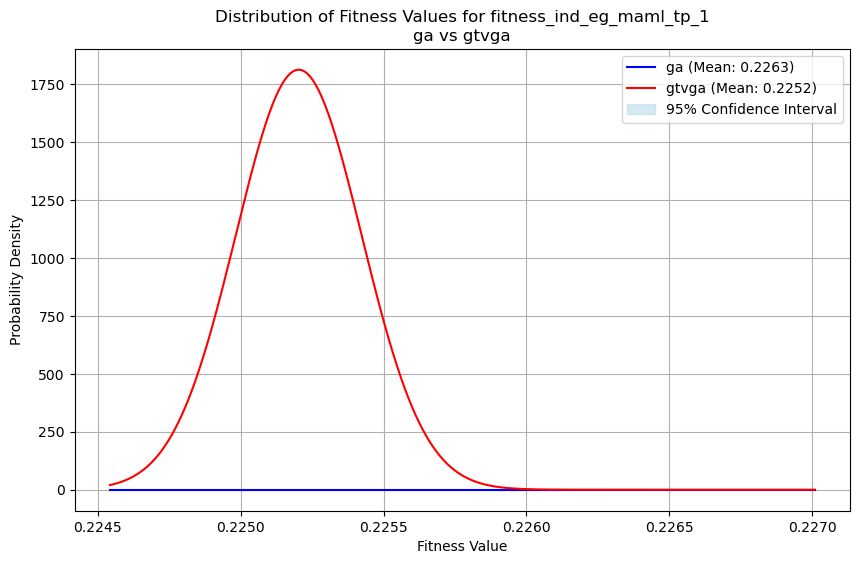


Statistical Analysis for fitness_ind_eg_maml_tp_2 using ga and gtvga:
P-value: 6.357011855780207e-72
Reject H0: There is a significant difference in the fitness values of the two algorithms.
95% Confidence Interval for the difference in means: (0.0008, 0.0009)


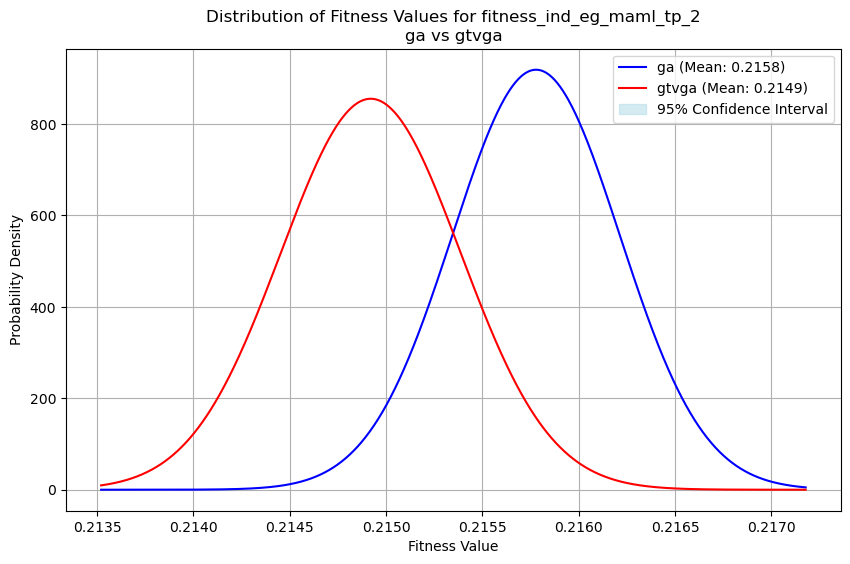

Done..!


In [750]:
def run_experiments(test_functions, optimization_algorithms, bounds_test_functions):
    results = []
    # for func in test_functions:
    for func,bound in zip(test_functions,bounds_test_functions):
        func_results = {'function': func.__name__, 'results': []}
        for optimizer in optimization_algorithms:
            print(func.__name__)
            print(bound)
            print(optimizer.__name__)
            print()
            
            start_time = time.time()
            # best_solution, best_fitness, all_solutions = optimizer(func, bounds)
            
            # return global_best_position, global_best_fitness, particles_position, \
            #        max_gbest_each_iter, mean_gbest_each_iter
            
            # best_solution_gpu, best_fitness_gpu, all_solutions_gpu, \
            # max_gbest_each_iter_gpu, mean_gbest_each_iter_gpu = optimizer(func, bound)
            
            best_solution_gpu, best_fitness_gpu, all_solutions_gpu, \
            max_gbest_each_iter_gpu, mean_gbest_each_iter_gpu, \
            final_path_last_Model, final_model, final_config, final_i_ind, final_best_fitness = optimizer(func, bound)
            
            # final_path_last_Model = f'model_reg_last/model_last_{run}_{final_lossval:.3f}_{filename_last_Model}'
            
            save_last_model_reptile_checkpoint(final_model, final_path_last_Model+'_'+func.__name__+'_'+optimizer.__name__+'.json')
            # save_last_info_params(final_config["n_iterations"], final_config["n_data_all"], final_config["n_sample"], \
            #                       final_config["n_train"], final_config["seed"], final_config["inner_step_size"], \
            #                       final_config["inner_epochs"], final_config["outer_stepsize_reptile"], \
            #                       final_config["outer_stepsize_maml"], final_config["run"], final_config["final_lossval"], \
            #                       final_config["filename_last_Model"])
            save_last_info_params(
                final_config["n_iterations"], final_config["n_data_all"], final_config["n_sample"],
                final_config["n_train"], final_config["seed"], final_config["inner_step_size"],
                final_config["inner_epochs"], final_config["outer_stepsize_reptile"],
                final_config["outer_stepsize_maml"], final_config["run"], final_config["final_lossval"],
                final_config["filename_last_Model"]+'_'+func.__name__+'_'+optimizer.__name__,
                final_config["path_filename_last_Model"]+'_'+func.__name__+'_'+optimizer.__name__+'.json'
            )
            
            print(final_config)
            print()

            
            best_solution, best_fitness, all_solutions, \
            max_gbest_each_iter, mean_gbest_each_iter = \
            best_solution_gpu.cpu().numpy().flatten(),\
            best_fitness_gpu.cpu().numpy().flatten(),\
            all_solutions_gpu.cpu().numpy().flatten(),\
            max_gbest_each_iter_gpu.cpu().numpy().flatten(),\
            mean_gbest_each_iter_gpu.cpu().numpy().flatten()
            
            # my_device = 'cpu'
            running_time = time.time() - start_time
            # fitness_values_gpu, _, _, _, _  = func(all_solutions_gpu)
            fitness_values_gpu = func(all_solutions_gpu)
            # fitness_values = fitness_values_gpu.cpu().numpy().flatten()
            fitness_values = fitness_values_gpu.cpu().numpy().flatten()

            func_results['results'].append({
                'algorithm_name': optimizer.__name__,
                'best_solution': best_solution,
                'best_fitness': best_fitness,
                'median_fitness': np.median(fitness_values),
                'worst_fitness': np.max(fitness_values),
                'mean_fitness': np.mean(fitness_values),
                'std_fitness': np.std(fitness_values),
                'running_time': running_time,
                'max_gbest_each_iter': max_gbest_each_iter,
                'mean_gbest_each_iter': mean_gbest_each_iter
            })

        results.append(func_results)

    return results


test_functions = [fitness_ind_eg_maml_tp_1, fitness_ind_eg_maml_tp_2]

alias_func_name = ['eg_maml_tiny_inv', 'eg_maml_middle_inv']

# optimization_algorithms = [ga]
optimization_algorithms = [ga, gtvga]
# optimization_algorithms = [ga, gtvga, ptvpso]

bounds_tp_1 = [
        (0, 4),  # Bound untuk seed (misalnya dari 0 sampai 100)
        (0.01, 0.1),  # Bound untuk inner_step_size (misalnya dari 0.01 sampai 0.1)
        (1, 7),  # Bound untuk inner_epochs (misalnya dari 1 sampai 10)
        (0.01, 0.2),  # Bound untuk outer_stepsize_reptile (misalnya dari 0.01 sampai 0.2)
        (0.001, 0.05),  # Bound untuk outer_stepsize_maml (misalnya dari 0.001 sampai 0.05)
        (1, 10),  # Bound untuk n_iterations (misalnya dari 1 sampai 50)
        (0, 1)  # Bound untuk run type (misalnya dari 0 sampai 1) "E-MAML" if <= 0.5 else "E-MAML_Synthetic_E-Reptile"
    ]

bounds_tp_2 = [
        (0, 8),  # Bound untuk seed (misalnya dari 0 sampai 100)
        (0.001, 0.2),  # Bound untuk inner_step_size (misalnya dari 0.01 sampai 0.1)
        (1, 14),  # Bound untuk inner_epochs (misalnya dari 1 sampai 10)
        (0.001, 0.4),  # Bound untuk outer_stepsize_reptile (misalnya dari 0.01 sampai 0.2)
        (0.0001, 0.1),  # Bound untuk outer_stepsize_maml (misalnya dari 0.001 sampai 0.05)
        (1, 20),  # Bound untuk n_iterations (misalnya dari 1 sampai 50)
        (0, 1)  # Bound untuk run type (misalnya dari 0 sampai 1) "E-MAML" if <= 0.5 else "E-MAML_Synthetic_E-Reptile"
    ]


bounds_test_functions = [bounds_tp_1, bounds_tp_2]

# results = run_experiments(test_functions, optimization_algorithms, bounds)
results = run_experiments(test_functions, optimization_algorithms, bounds_test_functions)

# Menampilkan hasil dalam bentuk tabel
def display_results_table(results):
    print("\nResults:")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("| Function           | Algorithm      | Best Solution                   | Best Fitness | Median Fitness | Worst Fitness | Mean Fitness | Std Fitness | Running Time (s) |")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------")
    for func_result in results:
        for result in func_result['results']:
            print(f"| {func_result['function']:<20} | {result['algorithm_name']:<15} | {result['best_solution']} | "
                  f"{result['best_fitness']} | {result['median_fitness']:<15} | {result['worst_fitness']:<13} | "
                  f"{result['mean_fitness']:<12} | {result['std_fitness']:<11} | {result['running_time']:<17.5f} |")
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------")

def display_results_table_df(results):
    # Membuat list untuk menampung data
    data = []
    
    # Loop melalui setiap fungsi hasil
    for func_result in results:
        for result in func_result['results']:
            # Menambahkan data dalam bentuk dictionary ke dalam list
            data.append({
                'Function': func_result['function'],
                'Algorithm': result['algorithm_name'],
                'Best Solution': result['best_solution'],
                'Best Fitness': result['best_fitness'],
                'Median Fitness': result['median_fitness'],
                'Worst Fitness': result['worst_fitness'],
                'Mean Fitness': result['mean_fitness'],
                'Std Fitness': result['std_fitness'],
                'Running Time (s)': result['running_time']
            })
    
    # Membuat DataFrame dari data
    df = pd.DataFrame(data)
    
    # Menampilkan DataFrame
    print("\nResults:")
    # display(df)
    # display(df.style.hide_index())
    display(df.style.hide(axis='index'))
    
    # return df

# Function to save results to CSV, Excel, and JSON files
def save_results_to_file(results, file_format, path_to_save=None):
    for func_result in results:
        df = pd.DataFrame(func_result['results'])
        
        # Define file path based on function name and file format
        if path_to_save is None:
            filename = f"{func_result['function']}_{file_format}_results"
        else:
            filename = f"{path_to_save}/{func_result['function']}_{file_format}_results"
        
        # Save in CSV, Excel, and JSON formats
        df.to_csv(f"{filename}.csv", index=False)
        df.to_excel(f"{filename}.xlsx", index=False)
        df.to_json(f"{filename}.json", orient="records", indent=4)

# Function to create a chart and save it to a PDF file
def save_chart_to_pdf(results,path_to_save=None):
    if path_to_save == None:
        pdf_pages = PdfPages("chart_fitness.pdf")
    else:
        pdf_pages = PdfPages(path_to_save+"/chart_fitness.pdf")        
        
    # patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    patterns = [ "\\" , "." , "|" , "-" , "+" , "x", "o", "O", "/", "*" ]

    # ax1 = fig.add_subplot(111)
    # for i in range(len(patterns)):
    #     ax1.bar(i, 3, color='green', edgecolor='black', hatch=patterns[i])

    nama_all_alg = [results[0]['results'][i]['algorithm_name'] for i in range(len(results[0]['results']))]
    len_nama_all_alg = len(nama_all_alg)
    # print(nama_all_alg)
    
    # untuk plotting hasil nilai fitness final:
    # ----------------------------------
    for func_result in results:
        plt.figure(figsize=(10, 6))
        
        for j in range(len_nama_all_alg):
            # print(j)
            plt.bar(func_result['results'][j]['algorithm_name'], \
                    func_result['results'][j]['best_fitness'], \
                    label='Best Fitness', edgecolor='white', \
                    hatch=patterns[-j])
        
        
        plt.title(f"Best Fitness for {func_result['function']}")
        plt.xlabel("Algorithm")
        plt.ylabel("Fitness Value")
        plt.legend()
        pdf_pages.savefig()
        # pdf_pages.savefig(bbox_inches='tight', dpi=1000)
        
        plt.close()
        
    # untuk plotting proses pergerakan konvergensi dari hasil nilai fitness final:
    # ----------------------------------
    for func_result in results:
        # fig, ax = plt.figure(figsize=(10, 6))
        plt.figure(figsize=(10, 6))
        
        number_color = len_nama_all_alg
        # cmap = plt.get_cmap('gnuplot')
        cmap = plt.get_cmap('jet')
        colors = [cmap(i) for i in np.linspace(0, 1, number_color)]
        
        for j in range(len_nama_all_alg):
            plt.plot(np.arange(1,num_iterations_all+1), func_result['results'][j]['max_gbest_each_iter'], color = colors[j], label=func_result['results'][j]['algorithm_name'].upper())      
        
        # plt.add_subplot(111).set_xticks(arange(1,3,0.5)) # You can actually compute the interval You need - and substitute here
        # ax.set_xticks(arange(1,num_iterations_all+1,1)) # You can actually compute the interval You need - and substitute here
        plt.title(f"Convergence of Max. Fitness Value for {func_result['function']}")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Fitness Value")
        plt.legend()
        pdf_pages.savefig()
        # pdf_pages.savefig(bbox_inches='tight', dpi=1000)
        plt.close()
        
        plt.figure(figsize=(10, 6))
        
        for j in range(len_nama_all_alg):
            plt.plot(np.arange(1,num_iterations_all+1),func_result['results'][j]['mean_gbest_each_iter'],color = colors[j],label=func_result['results'][j]['algorithm_name'].upper())
        
        
        plt.title(f"Convergence of Mean Fitness Value for {func_result['function']}")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Fitness Value")
        plt.legend()
        pdf_pages.savefig()
        # pdf_pages.savefig(bbox_inches='tight', dpi=1000)
        plt.close()


    pdf_pages.close()
    
# Analisis statistik p-values antar algoritma
# def statistical_analysis_with_visualization(results, suffix, folder_name):
#     for i in range(len(results)):
#         function_name = results[i]['function']
#         algorithm_results = results[i]['results']
        
#         # Create a dictionary to hold fitness values
#         fitness_data = {}
        
#         # Collect max_gbest_each_iter for each algorithm
#         for algorithm in algorithm_results:
#             algorithm_name = algorithm['algorithm_name']
#             fitness_data[algorithm_name] = algorithm['max_gbest_each_iter']  # or use mean_gbest_each_iter

#         # Perform pairwise statistical analysis between algorithms
#         algorithm_names = list(fitness_data.keys())
#         for j in range(len(algorithm_names)):
#             for k in range(j + 1, len(algorithm_names)):
#                 algorithm1 = algorithm_names[j]
#                 algorithm2 = algorithm_names[k]
                
#                 fitness_values1 = fitness_data[algorithm1]
#                 fitness_values2 = fitness_data[algorithm2]

#                 # Check for enough data points and variability
#                 if len(fitness_values1) < 2 or len(fitness_values2) < 2:
#                     print(f"Not enough data to perform t-test for {function_name} using {algorithm1} and {algorithm2}.")
#                     continue
                
#                 std1, std2 = np.std(fitness_values1, ddof=1), np.std(fitness_values2, ddof=1)

#                 if std1 == 0 or std2 == 0:
#                     print(f"Insufficient variability in fitness values for {function_name} using {algorithm1} and {algorithm2}. Skipping t-test.")
#                     continue

#                 # Perform t-test
#                 t_stat, p_value = ttest_ind(fitness_values1, fitness_values2)
#                 print(f"\nStatistical Analysis for {function_name} using {algorithm1} and {algorithm2}:")
#                 print(f"P-value: {p_value}")

#                 # Define null hypothesis
#                 H0 = "There is no significant difference in the fitness values of the two algorithms."
#                 H1 = "There is a significant difference in the fitness values of the two algorithms."
                
#                 if p_value < 0.05:  # 95% confidence level
#                     print("Reject H0:", H1)
#                 else:
#                     print("Fail to reject H0:", H0)

#                 # Calculate means and standard deviations
#                 mean1, mean2 = np.mean(fitness_values1), np.mean(fitness_values2)
#                 std1, std2 = np.std(fitness_values1, ddof=1), np.std(fitness_values2, ddof=1)
                
#                 # Calculate confidence interval
#                 conf_interval = 1.96 * np.sqrt((std1**2 / len(fitness_values1)) + (std2**2 / len(fitness_values2)))
#                 mean_diff = mean1 - mean2
#                 ci_lower = mean_diff - conf_interval
#                 ci_upper = mean_diff + conf_interval

#                 print(f"95% Confidence Interval for the difference in means: ({ci_lower:.4f}, {ci_upper:.4f})")

#                 # Visualization
#                 x = np.linspace(-1, 1, 1000)
#                 y1 = norm.pdf(x, mean1, std1)
#                 y2 = norm.pdf(x, mean2, std2)

#                 plt.figure(figsize=(10, 6))
#                 plt.plot(x, y1, label=f'{algorithm1} (Mean: {mean1:.4f})', color='blue')
#                 plt.plot(x, y2, label=f'{algorithm2} (Mean: {mean2:.4f})', color='red')

#                 # Shade the confidence interval
#                 plt.fill_betweenx(y1, ci_lower, ci_upper, where=(x >= ci_lower) & (x <= ci_upper), color='lightblue', alpha=0.5, label='95% Confidence Interval')
                
#                 plt.title(f'Distribution of Fitness Values for {function_name}\n{algorithm1} vs {algorithm2}')
#                 plt.xlabel('Fitness Value')
#                 plt.ylabel('Probability Density')
#                 plt.legend()
#                 plt.grid()
                
#                  # Save the plot as PDF and PNG
#                 plt.savefig(f"{folder_name}/{function_name}_{algorithm1}_{algorithm2}_{suffix}.pdf")
#                 plt.savefig(f"{folder_name}/{function_name}_{algorithm1}_{algorithm2}_{suffix}.png")
                
#                 plt.show()
#     plt.close()

def statistical_analysis_with_visualization(results, suffix, folder_name):
    for i in range(len(results)):
        function_name = results[i]['function']
        algorithm_results = results[i]['results']
        
        # Create a dictionary to hold fitness values
        fitness_data = {}
        
        # Collect max_gbest_each_iter for each algorithm
        noise=1e-8 # small noise add to a force t-test
        for algorithm in algorithm_results:
            algorithm_name = algorithm['algorithm_name']
            # fitness_data[algorithm_name] = algorithm['max_gbest_each_iter']  # or use mean_gbest_each_iter
            fitness_data[algorithm_name] = algorithm['max_gbest_each_iter'] + noise * np.random.randn(len(algorithm['max_gbest_each_iter']))

        # Perform pairwise statistical analysis between algorithms
        algorithm_names = list(fitness_data.keys())
        for j in range(len(algorithm_names)):
            for k in range(j + 1, len(algorithm_names)):
                algorithm1 = algorithm_names[j]
                algorithm2 = algorithm_names[k]
                
                fitness_values1 = fitness_data[algorithm1]
                fitness_values2 = fitness_data[algorithm2]

                # Check for enough data points and variability
                if len(fitness_values1) < 2 or len(fitness_values2) < 2:
                    print(f"Not enough data to perform t-test for {function_name} using {algorithm1} and {algorithm2}.")
                    continue
                
                std1, std2 = np.std(fitness_values1, ddof=1), np.std(fitness_values2, ddof=1)
                # Check for low variability (close to identical values)
                if np.abs(np.mean(fitness_values1) - np.mean(fitness_values2)) < 1e-6 or std1 == 0 or std2 == 0:
                    print(f"Insufficient variability in fitness values for {function_name} using {algorithm1} and {algorithm2}. Skipping t-test.")
                    continue

                # Perform t-test
                t_stat, p_value = ttest_ind(fitness_values1, fitness_values2, equal_var=False)
                print(f"\nStatistical Analysis for {function_name} using {algorithm1} and {algorithm2}:")
                print(f"P-value: {p_value}")

                # Define null hypothesis
                H0 = "There is no significant difference in the fitness values of the two algorithms."
                H1 = "There is a significant difference in the fitness values of the two algorithms."
                
                if p_value < 0.05:  # 95% confidence level
                    print("Reject H0:", H1)
                else:
                    print("Fail to reject H0:", H0)

                # Calculate means and standard deviations
                mean1, mean2 = np.mean(fitness_values1), np.mean(fitness_values2)
                
                # Calculate confidence interval
                conf_interval = 1.96 * np.sqrt((std1**2 / len(fitness_values1)) + (std2**2 / len(fitness_values2)))
                mean_diff = mean1 - mean2
                ci_lower = mean_diff - conf_interval
                ci_upper = mean_diff + conf_interval

                print(f"95% Confidence Interval for the difference in means: ({ci_lower:.4f}, {ci_upper:.4f})")

                # Visualization
                x = np.linspace(min(mean1, mean2) - 3*max(std1, std2), max(mean1, mean2) + 3*max(std1, std2), 1000)
                y1 = norm.pdf(x, mean1, std1)
                y2 = norm.pdf(x, mean2, std2)

                plt.figure(figsize=(10, 6))
                plt.plot(x, y1, label=f'{algorithm1} (Mean: {mean1:.4f})', color='blue')
                plt.plot(x, y2, label=f'{algorithm2} (Mean: {mean2:.4f})', color='red')

                # Shade the confidence interval
                plt.fill_betweenx(y1, ci_lower, ci_upper, where=(x >= ci_lower) & (x <= ci_upper), color='lightblue', alpha=0.5, label='95% Confidence Interval')
                
                plt.title(f'Distribution of Fitness Values for {function_name}\n{algorithm1} vs {algorithm2}')
                plt.xlabel('Fitness Value')
                plt.ylabel('Probability Density')
                plt.legend()
                plt.grid()
                
                 # Save the plot as PDF and PNG
                plt.savefig(f"{folder_name}/{function_name}_{algorithm1}_{algorithm2}_{suffix}.pdf")
                plt.savefig(f"{folder_name}/{function_name}_{algorithm1}_{algorithm2}_{suffix}.png")
                
                plt.show()
    plt.close()

# Menyimpan hasil ke file
def save_results(results, folder_name):
    save_results_to_file(results, 'final', folder_name)
    save_chart_to_pdf(results, folder_name)

# Memproses log fitness
def process_fitness_log(results, alias_func_name):
    counter_alias = 0
    log_fitness = ''
    for func_result in results:
        temp_log_fitness = ''
        temp_val_fitness = 0
        temp_algo_name = ''
        for idx, result in enumerate(func_result['results']):
            if idx == 0:
                temp_val_fitness = result['best_fitness'].item()
                temp_algo_name = result['algorithm_name']
            else:
                # jika nilai fitness berupa nilai loss, maka gunakan comparasi if temp_val_fitness < result['best_fitness']:
                # tetapi jika nilai fitness berupa nilai yang profit atau invers dari loss, misal akurasi, gunakan > 
                if temp_val_fitness < result['best_fitness']:
                    temp_log_fitness = f"{alias_func_name[counter_alias]}-{temp_algo_name}-{temp_val_fitness:.2f}"
                else:
                    temp_val_fitness = result['best_fitness'].item()
                    temp_algo_name = result['algorithm_name']
                    temp_log_fitness = f"{alias_func_name[counter_alias]}-{temp_algo_name}-{temp_val_fitness:.2f}"
        log_fitness += ('--' if counter_alias else '') + temp_log_fitness
        counter_alias += 1
    return log_fitness

# Menyimpan hasil dalam folder
def create_save_folder(device, log_fitness, num_iterations, pop_size):
    info_param = f"{device}-{log_fitness}-{len(optimization_algorithms)}alg-it-{num_iterations}-ps-{pop_size}"
    timestamp = datetime.now(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S')
    path = f"./log results/{info_param}-{timestamp}"
    os.makedirs(path, exist_ok=True)
    return path + '/'

# Menginisialisasi variabel dan menjalankan proses
log_fitness = process_fitness_log(results, alias_func_name)
save_folder = create_save_folder(my_device, log_fitness, num_iterations_all, pop_size_all)

# Tampilkan hasil dan simpan
# display_results_table(results)
display_results_table_df(results)
statistical_analysis_with_visualization(results, 'final_stat_viz', save_folder)
save_results(results, save_folder)

print("Done..!")

## E-MAML to EG-MAML

In [528]:
import argparse
import numpy as np
import torch
from torch import nn, autograd as ag
import matplotlib.pyplot as plt
from copy import deepcopy
import pytz
from datetime import datetime

# declare params
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
hidden_layers = [100, 50, 25, 12, 6, 3]
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

def experiment(run, plot=True):
    print('Type of Meta-Learning:', run)
    seed = 0
    inner_step_size = 0.02  # stepsize in inner SGD
    inner_epochs = 1  # number of epochs of each inner SGD
    outer_stepsize_reptile = 0.1  # stepsize of outer optimization, i.e., meta-optimization
    outer_stepsize_maml = 0.01
    # n_iterations = 30000  # number of outer updates; each iteration we sample one task and update on it
    n_iterations = 10  # number of outer updates; each iteration we sample one task and update on it

    rng = np.random.RandomState(seed)
    torch.manual_seed(seed)

    # Define task distribution
    n_data_all = 5
    n_sample = n_data_all # minimum 1, maks = n_data_all
    idx_x_all = np.arange(0,n_data_all)[:,None]
    
    # All of the x points data, dengan fitur input pepanjang n_input = 14
    x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])
    # n_train = 10  # Size of training minibatches
    n_train = 3  # Size of training minibatches, harus < n_data_all
    
    # info_params = f"imax-{n_iterations}-ndata-{n_data_all}-nspl-{n_sample}-ntrain-{n_train}-s-{seed}-iss-{inner_step_size}-ie-{inner_epochs}-osr-{outer_stepsize_reptile}-osm-{outer_stepsize_maml}"
       
    def get_mse_or_loss_val(get_idx_x_all_in):
        x = to_torch(np.array([x_all[i] for i in get_idx_x_all_in]))
        y = to_torch(np.array([y_all[i] for i in get_idx_x_all_in]))

        # cara 1
        model.zero_grad()
        y_pred = model(x)
        individual_losses = (y_pred - y).pow(2).mean(dim=1)  # Loss for each sample along feature dimension
        # print("Individual losses:", individual_losses)

        return individual_losses.data.numpy()
    
    def get_idx_x_all(x_all_in, x_all_to_search):
        idx_result = []

        # Iterate through each element in x_all_in
        for x_in in x_all_in:
            # Iterate through x_all_to_search to find a matching element
            for i, x in enumerate(x_all_to_search):
                # Use np.array_equal to compare arrays element-wise
                if np.array_equal(x_in, x):
                    idx_result.append(i)
                    break  # Stop after the first match is found

        return idx_result

    def gen_task_eg_maml_base_idx_data():
        # elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        # load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda idx_x: np.array(
            [test_single_data_return_pred(elm_model_n_hidden_layers, get_data_test(idx_x_single[0]))
             for idx_x_single in idx_x]
        )

        return f_randoms_eg_maml
    
    def gen_task_eg_maml_base_val_data():
        # elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        # load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml
    
    def gen_task(): # sama dengan gen_task_eg_maml_base_val_data()
        
        elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml

    # Define model. Reptile paper uses ReLU, but Tanh gives slightly better results
    # ==========
    # nn.Sequential: Mudah dan cocok untuk deep learning sederhana yang berurutan, 
    # tidak cocok jika arsitektur membutuhkan koneksi yang kompleks.
    ## -------
    # nn.Linear dalam Kelas nn.Module: Lebih fleksibel dan dapat digunakan untuk arsitektur kompleks, 
    # yang melibatkan banyak hidden layer, skip connections, atau jalur paralel.
    
    # Custom activation function NRReLU
    def NRReLU(x):
        return 1 / (torch.exp(-x) - torch.exp(x))

    activations = [NRReLU, nn.Sigmoid(), nn.Tanh(), nn.ReLU()]  # Custom activations, including NRReLU
    
    # Define a function to create the model with configurable layers and activation functions
    def define_model_type1(n_input, n_hidden_layers, n_output, activations=None):
        layers = []
        input_dim = n_input

        # Ensure activations list matches the number of hidden layers, or use ReLU as default
        if activations is None:
            activations = [F.relu] * len(n_hidden_layers)  # Default to ReLU for all layers
        elif len(activations) != len(n_hidden_layers):
            raise ValueError("Length of activations must match number of hidden layers")

        # Add each hidden layer with the specified number of neurons and activation
        for hidden_units, activation in zip(n_hidden_layers, activations):
            layers.append(nn.Linear(input_dim, hidden_units))
            input_dim = hidden_units  # Update input_dim for the next layer

            # Add the activation layer as a callable function
            layers.append(activation)  # Add the activation function directly

        # Add the final output layer without activation
        layers.append(nn.Linear(input_dim, n_output))

        # Create the model with nn.Sequential
        model = nn.Sequential(*layers)
        return model
    
    def define_model_type2(n_input, n_hidden_layers, n_output):
        #     model = nn.Sequential(
        #         nn.Linear(1, 64),
        #         nn.Tanh(),
        #         nn.Linear(64, 64),
        #         nn.Tanh(),
        #         nn.Linear(64, 1),
        #     )

        layers = []
        input_dim = n_input

        # Add each hidden layer with alternating activation functions
        for i, hidden_units in enumerate(n_hidden_layers):
            layers.append(nn.Linear(input_dim, hidden_units))

            # Use ReLU for the first layer, Tanh for others
            if i % 2 == 0:
                layers.append(nn.ReLU())
            else:
                layers.append(nn.Tanh())

            input_dim = hidden_units  # Update input_dim for the next layer

        # Add the final output layer
        layers.append(nn.Linear(input_dim, n_output))

        # Create the model with nn.Sequential
        model = nn.Sequential(*layers)
        return model
    
    # Define sintesis model. Reptile dengan ELMRegressionForReptile - nn.Linear
    model = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        
    def save_model_reptile_checkpoint(model, filename):
        # Dapatkan state_dict dari model
        model_state = model.state_dict()

        # Konversi tensor menjadi list untuk serialisasi JSON
        model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

        # Simpan model ke file JSON
        with open(filename, 'w') as f:
            json.dump(model_state_serializable, f)

    def load_model_reptile_checkpoint(model, filename):
        # Muat model dari file JSON
        with open(filename, 'r') as f:
            model_state_serializable = json.load(f)

        # Konversi kembali dari list ke tensor
        model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

        # Memuat state_dict ke model
        model.load_state_dict(model_state)
        model.eval()  # Set model ke mode evaluasi

    def to_torch(x):
        return ag.Variable(torch.Tensor(x))

    # def train_on_batch(x, y):
    #     x = to_torch(x)
    #     y = to_torch(y)
    #     model.zero_grad()
    #     ypred = model(x)
    #     loss = (ypred - y).pow(2).mean()
    #     loss.backward()
    #     for param in model.parameters():
    #         param.data -= inner_step_size * param.grad.data
    
               
    # using ELMRegressionForReptile support param.data dan param.grad.data
    def train_on_batch_eg_maml(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
            
    def train_on_batch(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
        
    # Cara Memuat model dari checkpoint
    #     try:
    #         load_model_reptile_checkpoint(model, filename_ckpt)
    #         print("Model berhasil dimuat dari:", filename_ckpt)
    #     except Exception as e:
    #         print("Terjadi kesalahan saat memuat model:", e)

    #     # Sekarang Anda bisa menggunakan model untuk melakukan prediksi atau melanjutkan pelatihan
    #     # Contoh prediksi
    #     x_test = to_torch([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])  # Ganti dengan data yang sesuai
    #     model.eval()  # Set model ke mode evaluasi
    #     with torch.no_grad():
    #         prediction = model(x_test)
    #         print("Hasil prediksi:", prediction.numpy())

    def predict(x):
        x = to_torch(x)
        return model(x).data.numpy()
    
    def save_info_params(
        n_iterations, n_data_all, n_sample, n_train, seed, inner_step_size,
        inner_epochs, outer_stepsize_reptile, outer_stepsize_maml,
        run, final_lossval, filename_last_Model
    ):
        # Construct the info_params dictionary
        info_params = {
            "imax": n_iterations,
            "ndata": n_data_all,
            "nspl": n_sample,
            "ntrain": n_train,
            "s": seed,
            "iss": inner_step_size,
            "ie": inner_epochs,
            "osr": outer_stepsize_reptile,
            "run": run,
            "osm": outer_stepsize_maml,
            "final_lossval": float(final_lossval)
        }

        # Construct the filename with all the specified information
        filename = (
            f"model_reg_last/model_params_last_{run}_{final_lossval:.3f}_"
            f"{filename_last_Model}.json"
        )

        # Ensure the directory exists
        os.makedirs(os.path.dirname(filename), exist_ok=True)

        # Save the info_params dictionary to the file as JSON
        with open(filename, 'w') as json_file:
            json.dump(info_params, json_file, indent=4)

        # print(f"Parameters saved to {filename}")
        # return filename

    # Choose a fixed task and minibatch for visualization
    f_plot = gen_task()
    # xtrain_plot = x_all[rng.choice(len(x_all), size=n_train)]
    xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

    # plt.cla()
    # Set figure and axis properties
    # plt.figure()
    
    # Set gray background color
    # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
    # plt.gca().set_facecolor('lightgray')
    
    # Add grid lines
    # plt.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Training loop
    filename_first_n_last_Loss = datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")
    for iteration in range(n_iterations):
        weights_before = deepcopy(model.state_dict())

        # Generate task
        f = gen_task()
        y_all = f(x_all)

        # Do SGD on this task
        inds = rng.permutation(len(x_all))
        train_ind = inds[:-1 * n_train]
        val_ind = inds[-1 * n_train:]       # Val contains 1/5th of the gt model (com. model)

        for _ in range(inner_epochs):
            for start in range(0, len(train_ind), n_train):
                mbinds = train_ind[start:start + n_train]
                print('mbinds =', mbinds)
                print()
                # print('x_all[mbinds] =', x_all[mbinds])
                # print()
                # print('y_all[mbinds] =', y_all[mbinds])
                x_all_mbinds = np.array([x_all[i] for i in mbinds])
                y_all_mbinds = np.array([y_all[i] for i in mbinds])
                # train_on_batch(x_all[mbinds], y_all[mbinds])
                train_on_batch(x_all_mbinds, y_all_mbinds)
                
                print('=======================')

        if run == 'E-MAML':
            outer_step_size = outer_stepsize_maml * (1 - iteration / n_iterations)  # linear schedule
            for start in range(0, len(val_ind), n_train):
                dpinds = val_ind[start:start + n_train]
                print('dpinds =', dpinds)
                print()
                
                # x = to_torch(x_all[dpinds])
                x = to_torch(np.array([x_all[i] for i in dpinds]))
                
                # y = to_torch(y_all[dpinds])
                y = to_torch(np.array([y_all[i] for i in dpinds]))

                # Compute the grads
                model.zero_grad()
                y_pred = model(x)
                loss = (y_pred - y).pow(2).mean()
                loss.backward()
                

                # Reload the model
                model.load_state_dict(weights_before)

                # SGD on the params
                for param in model.parameters():
                    param.data -= outer_step_size * param.grad.data
            # print(weights_before)
        else:
            # Interpolate between current weights and trained weights from this task
            # I.e. (weights_before - weights_after) is the meta-gradient
            weights_after = model.state_dict()
            outerstepsize = outer_stepsize_reptile * (1 - iteration / n_iterations)  # linear schedule
            model.load_state_dict({name: weights_before[name] + (weights_after[name] - weights_before[name]) * outerstepsize
                                   for name in weights_before})

        # Periodically plot the results on a particular task and minibatch
        # if (plot and ((iteration == 0) or ((iteration + 1) % 1000 == 0))):
        if (plot and ((iteration == 0) or ((iteration + 1) % n_iterations == 0))):
            plt.cla()
            # plt.cla()
            
            # Set gray background color
            # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
            
            # Set gray background color
            # plt.gca().set_facecolor('#f0f0f0')  # Light gray color for the background
            plt.gca().set_facecolor('lightgray')

            # Add grid lines
            plt.grid(color='gray', linestyle='--', linewidth=0.5)
            
            f = f_plot
            weights_before = deepcopy(model.state_dict())  # save snapshot before evaluation
            
            # plt.plot(x_all, predict(x_all), label="pred after 0", color=(0, 0, 1))
            get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after 0", color=(0, 0, 1))
            
            for inneriter in range(32):
                train_on_batch(xtrain_plot, f(xtrain_plot))
                if (inneriter + 1) % 8 == 0:
                    frac = (inneriter + 1) / 32
                    # plt.plot(x_all, predict(x_all), label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
                    
                    get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
                    get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
                    plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
            
            # plt.plot(x_all, f(x_all), label="true", color=(0, 1, 0))
            # plt.plot(x_all, f(x_all), label="ground truth from sin(x)", color=(0, 1, 0))
            
            get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="ground truth from comb. model", color=(0, 1, 0))
            
            
            lossval = np.square(predict(x_all) - f(x_all)).mean()
            # plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
            
            # print("xtrain_plot: ",xtrain_plot)
            
            get_idx_x_all_to_2d_plot = get_idx_x_all(xtrain_plot, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all_to_2d_plot)
            
            # print("idx xtrain_plot: ",get_idx_x_all_to_2d_plot)
        
            
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, "x", label="train", color="k")
            
            plt.ylim(-4, 4)
            plt.xlim(0, 4)  # Set x-axis limits
            plt.xticks(range(5))  # Set x-ticks to show 0, 1, 2, 3, 4
            plt.xlabel("index of data")  # Label for x-axis
            plt.ylabel("loss value")     # Label for y-axis
            plt.legend(loc="lower right")
            
            plt.savefig(f"loss_e_maml/plot_{run}_{lossval:.3f}_iter_{iteration}_{filename_first_n_last_Loss}.png")
            plt.savefig(f"loss_e_maml/plot_{run}_{lossval:.3f}_iter_{iteration}_{filename_first_n_last_Loss}.pdf")

            
            plt.pause(0.01)
            model.load_state_dict(weights_before)  # restore from snapshot
            print(f"-----------------------------")
            print(f"iteration               {iteration + 1}")
            print(f"loss on plotted curve   {lossval:.3f}")  # would be better to average loss over a set of examples, but this is optimized for brevity

    
    print()
    final_lossval = np.square(predict(x_all) - f(x_all)).mean()
    print(f"final loss on last model = {final_lossval:.3f}") 
    filename_last_Model = datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")
    
    # Save last loss
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.png")
    # plt.savefig(f"loss_e_maml/plot_e_maml{filename_last_Model_n_Loss}.pdf")
    
    # Save the plot as PNG and PDF only after plotting
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.png")
    # plt.savefig(f"loss_e_maml/plot_e_maml_{filename_last_Model_n_Loss}.pdf")

    # Optionally, show the plot if you want to display it interactively
    # plt.show()  # Use this only if you want to display the plot interactively
    
    
    # Save last model checkpoint
    path_last_Model = f'model_reg_last/model_last_{run}_{final_lossval:.3f}_{filename_last_Model}.json'
    save_model_reptile_checkpoint(model, path_last_Model)
    save_info_params(
        n_iterations, n_data_all, n_sample, n_train, seed, inner_step_size,
        inner_epochs, outer_stepsize_reptile, outer_stepsize_maml,
        run, final_lossval, filename_last_Model)
        
experiment('E-MAML', False)
# experiment('E-MAML', True)
# experiment('E-MAML_Synthetic_E-Reptile', False)
# experiment('E-MAML_Synthetic_E-Reptile', True)

Type of Meta-Learning: E-MAML
Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [0 2]

dpinds = [1 4 3]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [1 3]

dpinds = [4 0 2]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [3 1]

dpinds = [2 4 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [4 2]

dpinds = [3 1 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [2 3]

dpinds = [4 1 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
mbinds = [2 4]

dpinds = [1 3 

## Test Single Data - hasil model E-MAML

In [526]:
# Cara Memuat model dari checkpoint
# declare params
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'
path_last_Model = 'model_reg_last/model_last_E-MAML_0.247_31-10-2024-20-45-23.json'
# path_last_Model = 'model_reg_last/model_last_E-MAML_Synthetic_E-Reptile_0.248_31-10-2024-20-44-27.json'


# model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
model = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)

try:
    load_model_reptile_checkpoint(model, path_last_Model)
    print("Model berhasil dimuat dari:", path_last_Model)
except Exception as e:
    print("Terjadi kesalahan saat memuat model:", e)

# Sekarang Anda bisa menggunakan model untuk melakukan prediksi atau melanjutkan pelatihan
# Contoh prediksi
# test_data = to_torch([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])  # Ganti dengan data yang sesuai

id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

y_true_test_data = get_y_gt(id_test_data)

# model.eval()  # Set model ke mode evaluasi
# with torch.no_grad():
#     prediction = model(x_test)
#     print("Hasil prediksi:", prediction.numpy())
    

hasil_pred = test_single_data_return_pred(model, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(model, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 

Model berhasil dimuat dari: model_reg_last/model_last_E-MAML_0.247_31-10-2024-20-45-23.json
Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Hasil Regresi: [-0.13187271 -0.00842541  0.20748296  0.04862366  0.00715363  0.09904483
 -0.21184166 -0.16326526 -0.11075503  0.37917936 -0.21138455 -0.04121123
  0.00060908 -0.07439522 -0.07923727  0.14346708 -0.05763385 -0.3218375
 -0.06915761  0.00447744 -0.03410883  0.0658434   0.17517105 -0.03276164
  0.04481705  0.15281963 -0.16166544 -0.00438098  0.14958285  0.12029406
  0.00839265  0.20408103 -0.23486535 -0.1463198  -0.26493752  0.07310615
 -0.1249454   0.09390464 -0.1737231   0.10664489  0.06358783  0.22081359
  0.08833277  0.05443309]
Panjang dim Hasil Regresi: 44

Top Values: [0.37917936 0.22081359]
Top Indices: [ 9 41]
Top Column Names: ['daging (sapi)', 'wijen']

Hasil nilai loss: 0.12017130106687546


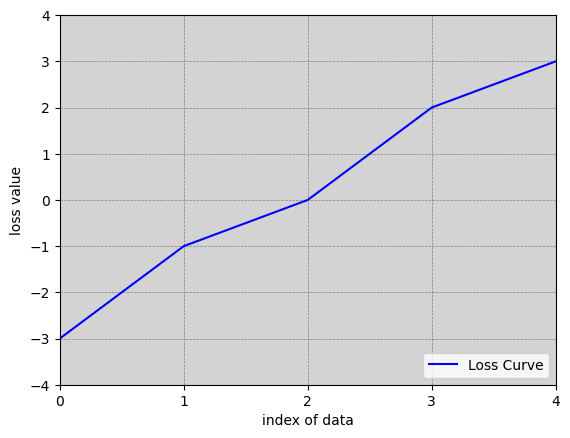

In [495]:
plt.cla()  # Clear the current axes

# Set figure and axis properties
# plt.figure()
plt.xlim(0, 4)  # Set x-axis limits
plt.xticks(range(5))  # Set x-ticks to show 0, 1, 2, 3, 4
plt.ylim(-4, 4)  # Set y-axis limits

# Add labels
plt.xlabel("index of data")  # Label for x-axis
plt.ylabel("loss value")      # Label for y-axis

# Plotting data (assuming you have your data ready)
# plt.plot(data_x, data_y)  # Replace with your actual plot command

# Example data (replace these with your actual data)
data_x = [0, 1, 2, 3, 4]  # x-axis values
data_y = [-3, -1, 0, 2, 3]  # y-axis values

# Plotting the data
plt.plot(data_x, data_y, label='Loss Curve', color='blue')  # Replace with your actual plot command


# Set background color to gray
plt.gca().set_facecolor('lightgray')

# Add grid lines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.legend(loc="lower right")



# Save the plot
plt.savefig('loss_e_maml/loss_plot.png')  # Save as PNG
plt.savefig('loss_e_maml/loss_plot.pdf')  # Save as PDF

plt.pause(0.01)



In [455]:
import argparse
import numpy as np
import torch
from torch import nn, autograd as ag
import matplotlib.pyplot as plt
from copy import deepcopy
import pytz
from datetime import datetime

# declare params
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

def experiment(run, plot=True):
    print('Type of Meta-Learning:', run)
    seed = 0
    inner_step_size = 0.02  # stepsize in inner SGD
    inner_epochs = 1  # number of epochs of each inner SGD
    outer_stepsize_reptile = 0.1  # stepsize of outer optimization, i.e., meta-optimization
    outer_stepsize_maml = 0.01
    # n_iterations = 30000  # number of outer updates; each iteration we sample one task and update on it
    n_iterations = 10  # number of outer updates; each iteration we sample one task and update on it

    rng = np.random.RandomState(seed)
    torch.manual_seed(seed)

    # Define task distribution
    n_data_all = 5
    n_sample = n_data_all # minimum 1, maks = n_data_all
    idx_x_all = np.arange(0,n_data_all)[:,None]
    
    # All of the x points data, dengan fitur input pepanjang n_input = 14
    x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])
    # n_train = 10  # Size of training minibatches
    n_train = 3  # Size of training minibatches, harus < n_data_all
       
    def get_mse_or_loss_val(get_idx_x_all_in):
        x = to_torch(np.array([x_all[i] for i in get_idx_x_all_in]))
        y = to_torch(np.array([y_all[i] for i in get_idx_x_all_in]))

        # cara 1
        model.zero_grad()
        y_pred = model(x)
        individual_losses = (y_pred - y).pow(2).mean(dim=1)  # Loss for each sample along feature dimension
        # print("Individual losses:", individual_losses)

        return individual_losses.data.numpy()
    
#     def get_idx_x_all(x_all_in, x_all_to_search):
#         # Data utama yang akan dicari indeksnya
#         # x_all = [
#         #     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#         #     [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
#         #     [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
#         #     [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#         #     [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
#         # ]

#         # List untuk menyimpan indeks hasil
#         idx_result = []

#         # Cari indeks dari setiap elemen di x_all_in dalam x_all
#         for x_in in x_all_in:
#             if x_in in x_all_to_search:
#                 idx_result.append(x_all_to_search.index(x_in))

#         return idx_result
    
    def get_idx_x_all(x_all_in, x_all_to_search):
        idx_result = []

        # Iterate through each element in x_all_in
        for x_in in x_all_in:
            # Iterate through x_all_to_search to find a matching element
            for i, x in enumerate(x_all_to_search):
                # Use np.array_equal to compare arrays element-wise
                if np.array_equal(x_in, x):
                    idx_result.append(i)
                    break  # Stop after the first match is found

        return idx_result

    def gen_task_eg_maml_base_idx_data():
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda idx_x: np.array(
            [test_single_data_return_pred(elm_model, get_data_test(idx_x_single[0]))
             for idx_x_single in idx_x]
        )

        return f_randoms_eg_maml
    
    def gen_task_eg_maml_base_val_data():
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml
    
    def gen_task(): # sama dengan gen_task_eg_maml_base_val_data()
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml

    # Define model. Reptile paper uses ReLU, but Tanh gives slightly better results
    #     model = nn.Sequential(
    #         nn.Linear(1, 64),
    #         nn.Tanh(),
    #         nn.Linear(64, 64),
    #         nn.Tanh(),
    #         nn.Linear(64, 1),
    #     )
    
    # Define sintesis model. Reptile dengan ELMRegressionForReptile
    model = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        
    def save_model_reptile_checkpoint(model, filename):
        # Dapatkan state_dict dari model
        model_state = model.state_dict()

        # Konversi tensor menjadi list untuk serialisasi JSON
        model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

        # Simpan model ke file JSON
        with open(filename, 'w') as f:
            json.dump(model_state_serializable, f)

    def load_model_reptile_checkpoint(model, filename):
        # Muat model dari file JSON
        with open(filename, 'r') as f:
            model_state_serializable = json.load(f)

        # Konversi kembali dari list ke tensor
        model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

        # Memuat state_dict ke model
        model.load_state_dict(model_state)
        model.eval()  # Set model ke mode evaluasi

    def to_torch(x):
        return ag.Variable(torch.Tensor(x))

    # def train_on_batch(x, y):
    #     x = to_torch(x)
    #     y = to_torch(y)
    #     model.zero_grad()
    #     ypred = model(x)
    #     loss = (ypred - y).pow(2).mean()
    #     loss.backward()
    #     for param in model.parameters():
    #         param.data -= inner_step_size * param.grad.data
    
               
    # using ELMRegressionForReptile support param.data dan param.grad.data
    def train_on_batch_eg_maml(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
            
    def train_on_batch(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
        
    # Cara Memuat model dari checkpoint
    #     try:
    #         load_model_reptile_checkpoint(model, filename_ckpt)
    #         print("Model berhasil dimuat dari:", filename_ckpt)
    #     except Exception as e:
    #         print("Terjadi kesalahan saat memuat model:", e)

    #     # Sekarang Anda bisa menggunakan model untuk melakukan prediksi atau melanjutkan pelatihan
    #     # Contoh prediksi
    #     x_test = to_torch([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])  # Ganti dengan data yang sesuai
    #     model.eval()  # Set model ke mode evaluasi
    #     with torch.no_grad():
    #         prediction = model(x_test)
    #         print("Hasil prediksi:", prediction.numpy())

    def predict(x):
        x = to_torch(x)
        return model(x).data.numpy()

    # Choose a fixed task and minibatch for visualization
    f_plot = gen_task()
    # xtrain_plot = x_all[rng.choice(len(x_all), size=n_train)]
    xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

    # Training loop
    for iteration in range(n_iterations):
        weights_before = deepcopy(model.state_dict())

        # Generate task
        f = gen_task()
        y_all = f(x_all)

        # Do SGD on this task
        inds = rng.permutation(len(x_all))
        train_ind = inds[:-1 * n_train]
        val_ind = inds[-1 * n_train:]       # Val contains 1/5th of the gt model (com. model)

        for _ in range(inner_epochs):
            for start in range(0, len(train_ind), n_train):
                mbinds = train_ind[start:start + n_train]
                print('mbinds =', mbinds)
                print()
                # print('x_all[mbinds] =', x_all[mbinds])
                # print()
                # print('y_all[mbinds] =', y_all[mbinds])
                x_all_mbinds = np.array([x_all[i] for i in mbinds])
                y_all_mbinds = np.array([y_all[i] for i in mbinds])
                # train_on_batch(x_all[mbinds], y_all[mbinds])
                train_on_batch(x_all_mbinds, y_all_mbinds)
                
                print('=======================')

        if run == 'E-MAML':
            outer_step_size = outer_stepsize_maml * (1 - iteration / n_iterations)  # linear schedule
            for start in range(0, len(val_ind), n_train):
                dpinds = val_ind[start:start + n_train]
                print('dpinds =', dpinds)
                print()
                
                # x = to_torch(x_all[dpinds])
                x = to_torch(np.array([x_all[i] for i in dpinds]))
                
                # y = to_torch(y_all[dpinds])
                y = to_torch(np.array([y_all[i] for i in dpinds]))

                # Compute the grads
                model.zero_grad()
                y_pred = model(x)
                loss = (y_pred - y).pow(2).mean()
                loss.backward()
                

                # Reload the model
                model.load_state_dict(weights_before)

                # SGD on the params
                for param in model.parameters():
                    param.data -= outer_step_size * param.grad.data
            # print(weights_before)
        else:
            # Interpolate between current weights and trained weights from this task
            # I.e. (weights_before - weights_after) is the meta-gradient
            weights_after = model.state_dict()
            outerstepsize = outer_stepsize_reptile * (1 - iteration / n_iterations)  # linear schedule
            model.load_state_dict({name: weights_before[name] + (weights_after[name] - weights_before[name]) * outerstepsize
                                   for name in weights_before})

        # Periodically plot the results on a particular task and minibatch
        # if (plot and ((iteration == 0) or ((iteration + 1) % 1000 == 0))):
        if (plot and ((iteration == 0) or ((iteration + 1) % n_iterations == 0))):
            plt.cla()
            f = f_plot
            weights_before = deepcopy(model.state_dict())  # save snapshot before evaluation
            
            # plt.plot(x_all, predict(x_all), label="pred after 0", color=(0, 0, 1))
            get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after 0", color=(0, 0, 1))
            
            for inneriter in range(32):
                train_on_batch(xtrain_plot, f(xtrain_plot))
                if (inneriter + 1) % 8 == 0:
                    frac = (inneriter + 1) / 32
                    # plt.plot(x_all, predict(x_all), label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
                    
                    get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
                    get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
                    plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
            
            # plt.plot(x_all, f(x_all), label="true", color=(0, 1, 0))
            # plt.plot(x_all, f(x_all), label="ground truth from sin(x)", color=(0, 1, 0))
            
            get_idx_x_all_to_2d_plot = get_idx_x_all(x_all, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all(x_all, x_all))
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, label="ground truth from comb. model", color=(0, 1, 0))
            
            
            lossval = np.square(predict(x_all) - f(x_all)).mean()
            # plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
            
            print("xtrain_plot: ",xtrain_plot)
            
            get_idx_x_all_to_2d_plot = get_idx_x_all(xtrain_plot, x_all) # agar dapat diplot pd 2D
            get_mse_or_loss_val_to_2d_plot = get_mse_or_loss_val(get_idx_x_all_to_2d_plot)
            
            print("idx xtrain_plot: ",get_idx_x_all_to_2d_plot)
        
            
            plt.plot(get_idx_x_all_to_2d_plot, get_mse_or_loss_val_to_2d_plot, "x", label="train", color="k")
            
            plt.ylim(-4, 4)
            plt.legend(loc="lower right")
            plt.pause(0.01)
            model.load_state_dict(weights_before)  # restore from snapshot
            print(f"-----------------------------")
            print(f"iteration               {iteration + 1}")
            print(f"loss on plotted curve   {lossval:.3f}")  # would be better to average loss over a set of examples, but this is optimized for brevity


# experiment('E-MAML', False)
# experiment('E-MAML', True)
# experiment('Synthetic_E-Reptile', False)
experiment('Synthetic_E-Reptile', True)

Type of Meta-Learning: Synthetic_E-Reptile


TypeError: __init__() takes 4 positional arguments but 5 were given

## Ubah gen_task dengan fungsi y_test_dengan sheet combine

In [264]:
n_sample = 5
n_data_all = 5
x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])

In [354]:
x_all

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]]

## Debug MAML to EG-MAML

In [294]:
# # Parameters
# n_input = 14
# n_hidden1 = 100
# n_hidden2 = 50
# n_hidden3 = 25
# n_output = 44

# # ubah define Reptile dengan ELMRegression model
# # elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
# # load_model_elm_reptile_from_json(f'model_reg/model_reptile_Comb-KMT-Tiny-Reg.json')  # Ganti dengan nama sheet yang sesuai
# # hasil_pred = test_single_data_return_pred(elm_model, test_data)

# # Example usage
# # elm_model_reptile = ELMRegressionForReptile(n_input=14, n_hidden1=100, n_hidden2=50, n_hidden3=25, n_output=44)
# elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(elm_model_reptile.parameters(), lr=0.01)

# # Dummy data for demonstration
# X_dummy = torch.randn(10, 14)
# y_dummy = torch.randn(10, 44)

# # Forward and backward pass
# elm_model_reptile.train()
# optimizer.zero_grad()
# hasil_pred = elm_model_reptile(X_dummy)
# loss = criterion(hasil_pred, y_dummy)
# loss.backward()
# optimizer.step()

In [ ]:
# for param in elm_model_reptile.parameters():
#     print(param.data)
#     print(param.grad.data)

In [338]:
x_try = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])
print(x_try)

[[0 1 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0]]


In [339]:
to_torch(x_try)

tensor([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [334]:
def to_torch(x):
    return ag.Variable(torch.Tensor(x))

# y_gt = y
# using ELMRegressionForReptile support param.data dan param.grad.data
# def train_on_batch_eg_maml(x, y):
#     x = to_torch(x)
#     y = to_torch(y)
    
#     elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(elm_model_reptile.parameters(), lr=0.01)
    
#     # elm_model_reptile.zero_grad()
#     # ypred = test_single_data_return_pred(elm_model_reptile,x)
#     # loss = (ypred - y).pow(2).mean()
#     # loss.backward()
    
#     # Forward and backward pass
#     elm_model_reptile.train()
#     optimizer.zero_grad()
#     ypred = elm_model_reptile(x)
#     loss = criterion(ypred, y)
#     loss.backward()
#     optimizer.step()
    
#     for param in elm_model_reptile.parameters():
#         param.data -= inner_step_size * param.grad.data

# using ELMRegressionForReptile support param.data dan param.grad.data
def train_on_batch_eg_maml(x, y):
    x = to_torch(x)
    y = to_torch(y)

    model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # elm_model_reptile.zero_grad()
    # ypred = test_single_data_return_pred(elm_model_reptile,x)
    # loss = (ypred - y).pow(2).mean()
    # loss.backward()

    # Forward and backward pass
    model.train()
    optimizer.zero_grad()
    ypred = model(x)
    loss = criterion(ypred, y)
    loss.backward()
    optimizer.step()

    for param in model.parameters():
        param.data -= inner_step_size * param.grad.data

    # Save model checkpoint
    filename_ckpt = f'model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
    save_model_reptile_checkpoint(model, filename_ckpt)

    # return loss.item()  # Optionally return the loss for monitoring

In [ ]:
inner_step_size = 0.02  # stepsize in inner SGD
train_on_batch_eg_maml()

In [347]:
# Ref: https://github.com/JosephKJ/PyTorch-MAML-and-Reptile
# python main.py --run=MAML
# python main.py --run=Reptile

import argparse
import numpy as np
import torch
from torch import nn, autograd as ag
import matplotlib.pyplot as plt
from copy import deepcopy
import pytz
from datetime import datetime

# declare params
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

def experiment(run, plot=True):
    seed = 0
    inner_step_size = 0.02  # stepsize in inner SGD
    inner_epochs = 1  # number of epochs of each inner SGD
    outer_stepsize_reptile = 0.1  # stepsize of outer optimization, i.e., meta-optimization
    outer_stepsize_maml = 0.01
    # n_iterations = 30000  # number of outer updates; each iteration we sample one task and update on it
    n_iterations = 10  # number of outer updates; each iteration we sample one task and update on it

    rng = np.random.RandomState(seed)
    torch.manual_seed(seed)

    # Define task distribution
    n_data_all = 5
    n_sample = n_data_all # minimum 1, maks = n_data_all
    idx_x_all = np.arange(0,n_data_all)[:,None]
    
    # All of the x points data, dengan fitur input pepanjang n_input = 14
    x_all = get_data_test(np.linspace(0, n_data_all-1, np.amin((n_sample, n_data_all), axis=0))[:, None])
    # n_train = 10  # Size of training minibatches
    n_train = 3  # Size of training minibatches, harus < n_data_all

    # def gen_task(): # ubah dengan fungsi y_test_dengan sheet combine
    #     "Generate classification problem"
    #     # "dfsfsds"
    #     phase = rng.uniform(low=0, high=2 * np.pi)
    #     ampl = rng.uniform(0.1, 5)
    #     f_randomsine = lambda x: np.sin(x + phase) * ampl
    #     return f_randomsine
    
    def gen_task_eg_maml_base_idx_data():
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda idx_x: np.array(
            [test_single_data_return_pred(elm_model, get_data_test(idx_x_single[0]))
             for idx_x_single in idx_x]
        )

        return f_randoms_eg_maml
    
    def gen_task_eg_maml_base_val_data():
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml
    
    def gen_task(): # sama dengan gen_task_eg_maml_base_val_data()
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai

        # f_randoms_eg_maml akan memproses semua data dalam idx_x_all
        f_randoms_eg_maml = lambda x: np.array(
            [test_single_data_return_pred(elm_model, x_single) for x_single in x]
        )

        return f_randoms_eg_maml

    # Define model. Reptile paper uses ReLU, but Tanh gives slightly better results
#     model = nn.Sequential(
#         nn.Linear(1, 64),
#         nn.Tanh(),
#         nn.Linear(64, 64),
#         nn.Tanh(),
#         nn.Linear(64, 1),
#     )
    
    # # ubah define Reptile dengan ELMRegression model
    # elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
    # load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
    # hasil_pred = test_single_data_return_pred(elm_model, test_data)
    
    # Define model. Reptile dengan ELMRegressionForReptile
    model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
#     # Forward and backward pass
#     model.train()
#     optimizer.zero_grad()
#     ypred = model(x)
#     loss = criterion(ypred, y)
#     loss.backward()
#     optimizer.step()

    # def save_model_reptile_checkpoint(model, filename):
    #     model_state = model.state_dict()
    #     with open(filename, 'w') as f:
    #         json.dump(model_state, f)

    # def load_model_reptile_checkpoint(model, filename):
    #     with open(filename, 'r') as f:
    #         model_state = json.load(f)
    #     model.load_state_dict(model_state)
        
    def save_model_reptile_checkpoint(model, filename):
        # Dapatkan state_dict dari model
        model_state = model.state_dict()

        # Konversi tensor menjadi list untuk serialisasi JSON
        model_state_serializable = {k: v.numpy().tolist() for k, v in model_state.items()}

        # Simpan model ke file JSON
        with open(filename, 'w') as f:
            json.dump(model_state_serializable, f)

    def load_model_reptile_checkpoint(model, filename):
        # Muat model dari file JSON
        with open(filename, 'r') as f:
            model_state_serializable = json.load(f)

        # Konversi kembali dari list ke tensor
        model_state = {k: torch.tensor(np.array(v)) for k, v in model_state_serializable.items()}

        # Memuat state_dict ke model
        model.load_state_dict(model_state)
        model.eval()  # Set model ke mode evaluasi

    def to_torch(x):
        return ag.Variable(torch.Tensor(x))

    # def train_on_batch(x, y):
    #     x = to_torch(x)
    #     y = to_torch(y)
    #     model.zero_grad()
    #     ypred = model(x)
    #     loss = (ypred - y).pow(2).mean()
    #     loss.backward()
    #     for param in model.parameters():
    #         param.data -= inner_step_size * param.grad.data
    
               
    # using ELMRegressionForReptile support param.data dan param.grad.data
    def train_on_batch_eg_maml(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
            
    def train_on_batch(x, y):
        x = to_torch(x)
        y = to_torch(y)

        model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        # elm_model_reptile.zero_grad()
        # ypred = test_single_data_return_pred(elm_model_reptile,x)
        # loss = (ypred - y).pow(2).mean()
        # loss.backward()

        # Forward and backward pass
        model.train()
        optimizer.zero_grad()
        ypred = model(x)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()

        for param in model.parameters():
            param.data -= inner_step_size * param.grad.data
            
        # Save model checkpoint
        filename_ckpt = f'model_reg_ckpt/model_reptile_checkpoint_{datetime.today().astimezone(pytz.timezone("Asia/Jakarta")).strftime("%d-%m-%Y-%H-%M-%S")}.json'
        save_model_reptile_checkpoint(model, filename_ckpt)
        
        # return loss.item()  # Optionally return the loss for monitoring
        
    # Cara Memuat model dari checkpoint
    #     try:
    #         load_model_reptile_checkpoint(model, filename_ckpt)
    #         print("Model berhasil dimuat dari:", filename_ckpt)
    #     except Exception as e:
    #         print("Terjadi kesalahan saat memuat model:", e)

    #     # Sekarang Anda bisa menggunakan model untuk melakukan prediksi atau melanjutkan pelatihan
    #     # Contoh prediksi
    #     x_test = to_torch([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])  # Ganti dengan data yang sesuai
    #     model.eval()  # Set model ke mode evaluasi
    #     with torch.no_grad():
    #         prediction = model(x_test)
    #         print("Hasil prediksi:", prediction.numpy())

    def predict(x):
        x = to_torch(x)
        return model(x).data.numpy()

    # Choose a fixed task and minibatch for visualization
    f_plot = gen_task()
    # xtrain_plot = x_all[rng.choice(len(x_all), size=n_train)]
    xtrain_plot = np.array([x_all[i] for i in rng.choice(len(x_all), size=n_train)])

    # Training loop
    for iteration in range(n_iterations):
        weights_before = deepcopy(model.state_dict())

        # Generate task
        f = gen_task()
        y_all = f(x_all)

        # Do SGD on this task
        inds = rng.permutation(len(x_all))
        train_ind = inds[:-1 * n_train]
        val_ind = inds[-1 * n_train:]       # Val contains 1/5th of the sine wave

        for _ in range(inner_epochs):
            for start in range(0, len(train_ind), n_train):
                mbinds = train_ind[start:start + n_train]
                print('mbinds =', mbinds)
                print()
                # print('x_all[mbinds] =', x_all[mbinds])
                # print()
                # print('y_all[mbinds] =', y_all[mbinds])
                x_all_mbinds = np.array([x_all[i] for i in mbinds])
                y_all_mbinds = np.array([y_all[i] for i in mbinds])
                # train_on_batch(x_all[mbinds], y_all[mbinds])
                train_on_batch(x_all_mbinds, y_all_mbinds)
                
                print('=======================')

        if run == 'MAML':
            outer_step_size = outer_stepsize_maml * (1 - iteration / n_iterations)  # linear schedule
            for start in range(0, len(val_ind), n_train):
                dpinds = val_ind[start:start + n_train]
                print('dpinds =', dpinds)
                print()
                
                # x = to_torch(x_all[dpinds])
                x = to_torch(np.array([x_all[i] for i in dpinds]))
                
                # y = to_torch(y_all[dpinds])
                y = to_torch(np.array([y_all[i] for i in dpinds]))

                # Compute the grads
                model.zero_grad()
                y_pred = model(x)
                loss = (y_pred - y).pow(2).mean()
                loss.backward()
                

                # Reload the model
                model.load_state_dict(weights_before)

                # SGD on the params
                for param in model.parameters():
                    param.data -= outer_step_size * param.grad.data
            # print(weights_before)
        else:
            # Interpolate between current weights and trained weights from this task
            # I.e. (weights_before - weights_after) is the meta-gradient
            weights_after = model.state_dict()
            outerstepsize = outer_stepsize_reptile * (1 - iteration / n_iterations)  # linear schedule
            model.load_state_dict({name: weights_before[name] + (weights_after[name] - weights_before[name]) * outerstepsize
                                   for name in weights_before})

        # Periodically plot the results on a particular task and minibatch
        # if (plot and ((iteration == 0) or ((iteration + 1) % 1000 == 0))):
#         if (plot and ((iteration == 0) or ((iteration + 1) % n_iterations == 0))):
#             plt.cla()
#             f = f_plot
#             weights_before = deepcopy(model.state_dict())  # save snapshot before evaluation
            
#             plt.plot(x_all, predict(x_all), label="pred after 0", color=(0, 0, 1))
#             for inneriter in range(32):
#                 train_on_batch(xtrain_plot, f(xtrain_plot))
#                 if (inneriter + 1) % 8 == 0:
#                     frac = (inneriter + 1) / 32
#                     plt.plot(x_all, predict(x_all), label="pred after %i" % (inneriter + 1), color=(frac, 0, 1 - frac))
#             # plt.plot(x_all, f(x_all), label="true", color=(0, 1, 0))
#             plt.plot(x_all, f(x_all), label="ground truth from sin(x)", color=(0, 1, 0))
#             lossval = np.square(predict(x_all) - f(x_all)).mean()
#             plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
#             plt.ylim(-4, 4)
#             plt.legend(loc="lower right")
#             plt.pause(0.01)
#             model.load_state_dict(weights_before)  # restore from snapshot
#             print(f"-----------------------------")
#             print(f"iteration               {iteration + 1}")
#             print(f"loss on plotted curve   {lossval:.3f}")  # would be better to average loss over a set of examples, but this is optimized for brevity


def main():
    parser = argparse.ArgumentParser(description='MAML and Reptile Sine wave regression example.')
    parser.add_argument('--run', dest='run', default='Reptile') # MAML, Reptile
    args = parser.parse_args()

    experiment(args.run)

# experiment('MAML', False)
experiment('MAML', True)
# experiment('Reptile', False)

# if __name__ == '__main__':
#     main()

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [0 2]

dpinds = [1 4 3]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [1 3]

dpinds = [4 0 2]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [3 1]

dpinds = [2 4 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [4 2]

dpinds = [3 1 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [2 3]

dpinds = [4 1 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [2 4]

dpinds = [1 3 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [3 1]

dpinds = [4 2 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [0 4]

dpinds = [2 1 3]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [4 2]

dpinds = [3 1 0]

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
mbinds = [1 4]

dpinds = [2 3 0]



In [67]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from copy import deepcopy

# Definisi model ELM dengan 2 hidden layers untuk regresi
class ELMRegression(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(ELMRegression, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)  # Lapisan hidden pertama
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)  # Lapisan hidden kedua
        self.output = nn.Linear(n_hidden2, n_output)  # Lapisan output

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))  # Aktivasi sigmoid pada hidden layer 1
        x = torch.sigmoid(self.hidden2(x))  # Aktivasi sigmoid pada hidden layer 2
        return self.output(x)  # Output lapisan terakhir tanpa aktivasi untuk regresi

# Fungsi untuk menyimpan model dalam format JSON
def save_model_json(model, file_path):
    model_params = {
        "hidden1_weights": model.hidden1.weight.detach().numpy().tolist(),
        "hidden1_bias": model.hidden1.bias.detach().numpy().tolist(),
        "hidden2_weights": model.hidden2.weight.detach().numpy().tolist(),
        "hidden2_bias": model.hidden2.bias.detach().numpy().tolist(),
        "output_weights": model.output.weight.detach().numpy().tolist(),
        "output_bias": model.output.bias.detach().numpy().tolist()
    }
    with open(file_path, 'w') as json_file:
        json.dump(model_params, json_file)
    print(f"Model saved as JSON at {file_path}")

# Fungsi untuk mencatat dan menyimpan loss dalam format JSON berdasarkan epoch
def save_loss_json(loss_per_epoch, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(loss_per_epoch, json_file)
    print(f"Loss per epoch saved as JSON at {file_path}")

# Fungsi untuk mem-plot dan menyimpan hasil training (loss per epoch)
def plot_loss(loss_per_epoch, sheet_name):
    epochs = list(range(1, len(loss_per_epoch) + 1))
    plt.figure()
    plt.plot(epochs, loss_per_epoch, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss per Epoch for {sheet_name}')
    plt.legend()

    # Menyimpan plot dalam format PNG dan PDF
    plt.savefig(f'loss/loss_plot_{sheet_name}.png')
    plt.savefig(f'loss/loss_plot_{sheet_name}.pdf')
    print(f"Loss plot saved as PNG and PDF for {sheet_name}")

    plt.close()  # Menutup plot setelah selesai

# Fungsi untuk memuat data dan melakukan ELM regresi
def perform_elm_regression(file_path, sheets, epochs=100):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :15].values  # 15 fitur input
        y = df.iloc[:, 15:].values  # 10 target output

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)

        n_input = 15
        n_hidden1 = 100  # Ukuran hidden layer pertama
        n_hidden2 = 50   # Ukuran hidden layer kedua
        n_output = 10
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)

        criterion = nn.MSELoss()  # Loss untuk regresi
        optimizer = torch.optim.Adam(elm_model.parameters(), lr=0.01)

        # List untuk menyimpan loss di setiap epoch
        loss_per_epoch = []

        # Training model dengan data yang ada
        elm_model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            # Simpan loss untuk setiap epoch
            loss_per_epoch.append(loss.item())

            # print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

        # Menyimpan model dan loss
        save_model_json(elm_model, f'model_reg/model_{sheet_name}.json')
        save_loss_json(loss_per_epoch, f'loss/loss_{sheet_name}.json')

        # Plot loss dan simpan dalam format PNG dan PDF
        plot_loss(loss_per_epoch, sheet_name)

        print(f"Final Loss for {sheet_name}: {loss_per_epoch[-1]}")

# Fungsi untuk menggabungkan semua sheet menjadi satu
def create_combined_sheet(file_path, sheets, combined_sheet_name="CombinedSheet"):
    excel_file = pd.ExcelFile(file_path)
    combined_df = pd.DataFrame()

    for sheet_name in sheets:
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        combined_df.to_excel(writer, sheet_name=combined_sheet_name, index=False)
    
    print(f"Combined sheet '{combined_sheet_name}' created/overwritten in {file_path}")

# Fungsi untuk meload model dari file JSON
def load_model_json(file_path, model):
    with open(file_path, 'r') as json_file:
        model_params = json.load(json_file)
    
    # Set parameter model dari file JSON
    model.hidden1.weight.data = torch.FloatTensor(model_params['hidden1_weights'])
    model.hidden1.bias.data = torch.FloatTensor(model_params['hidden1_bias'])
    model.hidden2.weight.data = torch.FloatTensor(model_params['hidden2_weights'])
    model.hidden2.bias.data = torch.FloatTensor(model_params['hidden2_bias'])
    model.output.weight.data = torch.FloatTensor(model_params['output_weights'])
    model.output.bias.data = torch.FloatTensor(model_params['output_bias'])
    print(f"Model loaded from {file_path}")
    
# Fungsi untuk meload model MAML dari file JSON
def load_model_maml_json(file_path, model):
    with open(file_path, 'r') as json_file:
        model_params = json.load(json_file)
    
    # Set parameter model dari file JSON
    model.hidden1.weight.data = torch.FloatTensor(model_params['hidden1_weights'])
    model.hidden1.bias.data = torch.FloatTensor(model_params['hidden1_bias'])
    model.hidden2.weight.data = torch.FloatTensor(model_params['hidden2_weights'])
    model.hidden2.bias.data = torch.FloatTensor(model_params['hidden2_bias'])
    model.output.weight.data = torch.FloatTensor(model_params['output_weights'])
    model.output.bias.data = torch.FloatTensor(model_params['output_bias'])
    print(f"MAML Model loaded from {file_path}")

# Fungsi untuk menguji model
def test_model(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        print(f'Testing Loss: {mse_loss.item()}')
        

# Fungsi untuk meload model dari semua sheet dan lakukan testing
def load_and_test_all_models(file_path, sheets):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Testing model for sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :15].values  # 15 fitur input
        y = df.iloc[:, 15:].values  # 10 target output

        X_tensor = torch.FloatTensor(X)

        n_input = 15
        n_hidden1 = 100
        n_hidden2 = 50
        n_output = 10
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)

        # Memuat model dari file JSON
        load_model_json(f'model_reg/model_{sheet_name}.json', elm_model)

        # Melakukan testing dan menghitung loss
        test_model(elm_model, X_tensor, y)
        

# Fungsi untuk MAML
def maml_training(file_path, sheets, inner_epochs=5, outer_epochs=10, inner_lr=0.01, outer_lr=0.001):
    excel_file = pd.ExcelFile(file_path)
    n_input = 15
    n_hidden1 = 100
    n_hidden2 = 50
    n_output = 10

    models = {}
    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :15].values  # 15 fitur input
        y = df.iloc[:, 15:].values  # 10 target output

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)

        # Inisialisasi model
        model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
        optimizer = optim.Adam(model.parameters(), lr=inner_lr)

        for outer_epoch in range(outer_epochs):
            # Salin model untuk setiap tugas (sheet)
            model_copy = deepcopy(model)

            # Inner loop: pelatihan pada satu tugas
            for inner_epoch in range(inner_epochs):
                optimizer.zero_grad()
                outputs = model_copy(X_tensor)
                loss = nn.MSELoss()(outputs, y_tensor)
                loss.backward()
                optimizer.step()

            # Simpan model untuk tugas saat ini
            models[sheet_name] = deepcopy(model_copy)

            # Menghitung gradien untuk update outer model
            for param in model.parameters():
                param.grad = None  # Reset gradien
            outputs = model(X_tensor)
            outer_loss = nn.MSELoss()(outputs, y_tensor)
            outer_loss.backward()

            # Update parameter model utama
            optimizer.step()
        
        # Simpan model akhir
        save_model_json(model, f'model_reg/model_maml_{sheet_name}.json')
        
# Fungsi untuk meload model dari semua sheet dan lakukan testing
def load_and_test_all_maml_models(file_path, sheets):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Testing model for sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :15].values  # 15 fitur input
        y = df.iloc[:, 15:].values  # 10 target output

        X_tensor = torch.FloatTensor(X)

        n_input = 15
        n_hidden1 = 100
        n_hidden2 = 50
        n_output = 10
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)

        # Memuat model MAML dari file JSON
        load_model_maml_json(f'model_reg/model_maml_{sheet_name}.json', elm_model)

        # Melakukan testing dan menghitung loss
        test_model(elm_model, X_tensor, y)

# Tentukan path ke file Excel dan nama sheet
file_path = 'dataset/regression_data2.xlsx'
sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan regresi pada dataset di file Excel
perform_elm_regression(file_path, sheets + ['CombinedSheet'], epochs=400)

print()

# Lakukan MAML pada dataset di file Excel
maml_training(file_path, sheets + ['CombinedSheet'], inner_epochs=5, outer_epochs=10, inner_lr=0.01, outer_lr=0.001)

print()

# Lakukan testing setelah meload model dari file JSON untuk semua sheet
load_and_test_all_models(file_path, sheets + ['CombinedSheet'])

print()

# Lakukan testing setelah meload maml model dari file JSON untuk semua sheet
load_and_test_all_maml_models(file_path, sheets + ['CombinedSheet'])


Combined sheet 'CombinedSheet' created/overwritten in dataset/regression_data2.xlsx
Processing sheet: Sheet1
Model saved as JSON at model_reg/model_Sheet1.json
Loss per epoch saved as JSON at loss/loss_Sheet1.json
Loss plot saved as PNG and PDF for Sheet1
Final Loss for Sheet1: 0.32231268286705017
Processing sheet: Sheet2
Model saved as JSON at model_reg/model_Sheet2.json
Loss per epoch saved as JSON at loss/loss_Sheet2.json
Loss plot saved as PNG and PDF for Sheet2
Final Loss for Sheet2: 0.30444157123565674
Processing sheet: Sheet3
Model saved as JSON at model_reg/model_Sheet3.json
Loss per epoch saved as JSON at loss/loss_Sheet3.json
Loss plot saved as PNG and PDF for Sheet3
Final Loss for Sheet3: 0.3324933648109436
Processing sheet: Sheet4
Model saved as JSON at model_reg/model_Sheet4.json
Loss per epoch saved as JSON at loss/loss_Sheet4.json
Loss plot saved as PNG and PDF for Sheet4
Final Loss for Sheet4: 0.34479546546936035
Processing sheet: CombinedSheet
Model saved as JSON at mo

# Generate data sample --

## data gen reg. multi target

In [67]:
import pandas as pd
import numpy as np

# Fungsi untuk mengenerate dataset dengan 15 fitur input dan 10 target output untuk beberapa sheet
def generate_datasets_for_sheets(n_samples=1000, n_features=15, n_targets=10, sheets=['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'], file_path='dataset/regression_data2.xlsx'):
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        for sheet in sheets:
            # Menghasilkan 15 fitur input acak dengan distribusi normal
            X = np.random.randn(n_samples, n_features)
    
            # Menghasilkan 10 target output acak dengan distribusi normal
            y = np.random.randn(n_samples, n_targets)
    
            # Menggabungkan fitur input dan target output menjadi satu DataFrame
            columns = [f'Feature_{i+1}' for i in range(n_features)] + [f'Target_{i+1}' for i in range(n_targets)]
            data = np.hstack((X, y))  # Menggabungkan input dan output
    
            df = pd.DataFrame(data, columns=columns)
    
            # Menyimpan dataset ke sheet yang berbeda dalam file Excel
            df.to_excel(writer, index=False, sheet_name=sheet)
    
    print(f"Datasets generated and saved to {file_path} with sheets: {', '.join(sheets)}")

# Mengenerate dataset untuk beberapa sheet dengan 1000 sampel per sheet
generate_datasets_for_sheets(n_samples=1000, n_features=15, n_targets=10, sheets=['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'], file_path='dataset/regression_data2.xlsx')

Datasets generated and saved to dataset/regression_data2.xlsx with sheets: Sheet1, Sheet2, Sheet3, Sheet4


## data gen. for classification

In [44]:
import pandas as pd
import numpy as np

# Fungsi untuk menghasilkan data acak dengan 15 fitur dan 5 kelas target
def generate_random_data(num_samples=100):
    # 15 fitur acak
    X = np.random.rand(num_samples, 15)
    # Target kelas acak dengan 5 kelas (0-4)
    y = np.random.randint(0, 5, num_samples)
    # Gabungkan fitur dan target ke DataFrame
    df = pd.DataFrame(X, columns=[f'Feature{i+1}' for i in range(15)])
    df['Target'] = y
    return df

# Buat file Excel dengan 4 sheet yang berisi data acak
with pd.ExcelWriter('classification_data2.xlsx') as writer:
    for i in range(1, 5):
        df = generate_random_data(100)  # Misal 100 sampel per sheet
        df.to_excel(writer, sheet_name=f'Sheet{i}', index=False)

In [ ]:
# import pandas as pd
# import torch
# import torch.nn as nn
# import numpy as np
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Define the ELM model for classification
# class ELM(nn.Module):
#     def __init__(self, n_input, n_hidden, n_classes):
#         super(ELM, self).__init__()
#         self.hidden = nn.Linear(n_input, n_hidden)
#         self.output = nn.Linear(n_hidden, n_classes)

#     def forward(self, x):
#         # Activation function
#         x = torch.sigmoid(self.hidden(x))
#         return self.output(x)

# # Function to load data and perform ELM classification
# def perform_elm_classification(file_path, sheets):
#     # Load the Excel file
#     excel_file = pd.ExcelFile(file_path)

#     # Iterate through each specified sheet
#     for sheet_name in sheets:
#         print(f"Processing sheet: {sheet_name}")
        
#         # Load dataset from the current sheet
#         df = pd.read_excel(excel_file, sheet_name=sheet_name)

#         # Assuming the last column is the target variable (class labels) and others are features
#         X = df.iloc[:, :-1].values  # Features
#         y = df.iloc[:, -1].values    # Class labels

#         # Convert to tensor
#         X_tensor = torch.FloatTensor(X)
#         y_tensor = torch.LongTensor(y)  # Use LongTensor for class labels

#         # Initialize ELM model
#         n_input = X.shape[1]
#         n_classes = len(np.unique(y))  # Number of classes
#         n_hidden = 100  # Number of neurons in hidden layer
#         elm_model = ELM(n_input, n_hidden, n_classes)

#         # Loss function and optimizer
#         criterion = nn.CrossEntropyLoss()
#         optimizer = torch.optim.Adam(elm_model.parameters(), lr=0.01)

#         # Train the model
#         elm_model.train()
#         for epoch in range(100):  # Change the number of epochs as needed
#             optimizer.zero_grad()
#             outputs = elm_model(X_tensor)
#             loss = criterion(outputs, y_tensor)
#             loss.backward()
#             optimizer.step()

#         # Make predictions
#         elm_model.eval()
#         with torch.no_grad():
#             logits = elm_model(X_tensor)
#             predictions = torch.argmax(logits, dim=1)  # Get predicted class labels

#         # Calculate and print performance metrics
#         accuracy = (predictions.numpy() == y_tensor.numpy()).mean()
#         precision = precision_score(y_tensor.numpy(), predictions.numpy(), average='weighted')
#         recall = recall_score(y_tensor.numpy(), predictions.numpy(), average='weighted')
#         f1 = f1_score(y_tensor.numpy(), predictions.numpy(), average='weighted')

#         print(f"Metrics for {sheet_name}:")
#         print(f"  Accuracy: {accuracy:.4f}")
#         print(f"  Precision: {precision:.4f}")
#         print(f"  Recall: {recall:.4f}")
#         print(f"  F1 Score: {f1:.4f}")

# # Specify the path to your Excel file and sheet names
# file_path = 'dataset/data_regression.xlsx'  # Change to your actual Excel file name
# sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']  # Change to your sheet names

# # Perform classification on the datasets in the Excel file
# perform_elm_classification(file_path, sheets)


# Regresi Deep ELM dgn one hot encoder n save + load model

## n_hidden = k (dinamis)

In [536]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from datetime import datetime

# set var global
n_input = 14
# n_hidden1 = 100
# n_hidden2 = 50
# hidden_layers = 
hidden_layers = [100, 50, 25, 12, 6, 3] 
n_output = 44


# Define ELM Model with dynamic hidden layers for regression
class ELMRegression(nn.Module):
    def __init__(self, n_input, hidden_layers, n_output):
        super().__init__()
        self.layers = nn.ModuleList()
        prev_layer_size = n_input

        # Dynamically create hidden layers
        for hidden_size in hidden_layers:
            self.layers.append(nn.Linear(prev_layer_size, hidden_size))
            prev_layer_size = hidden_size

        # Output layer
        self.output = nn.Linear(prev_layer_size, n_output)

    def forward(self, x):
        for layer in self.layers:
            x = torch.sigmoid(layer(x))  # Sigmoid activation for each hidden layer
        return self.output(x)  # Linear output layer for regression

# Function to save model parameters in JSON format
def save_model_json(model, file_path):
    model_params = {
        f"layer_{i}": layer.weight.detach().numpy().tolist()
        for i, layer in enumerate(model.layers)
    }
    model_params.update({
        f"layer_{i}_bias": layer.bias.detach().numpy().tolist()
        for i, layer in enumerate(model.layers)
    })
    model_params["output_weights"] = model.output.weight.detach().numpy().tolist()
    model_params["output_bias"] = model.output.bias.detach().numpy().tolist()

    with open(file_path, 'w') as json_file:
        json.dump(model_params, json_file)
    print(f"Model saved as JSON at {file_path}")
    
# Fungsi untuk mencatat dan menyimpan loss dalam format JSON berdasarkan epoch
def save_loss_json(loss_per_epoch, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(loss_per_epoch, json_file)
    print(f"Loss per epoch saved as JSON at {file_path}")

# Fungsi untuk mem-plot dan menyimpan hasil training (loss per epoch)
def plot_loss(loss_per_epoch, sheet_name, name_unik):
    epochs = list(range(1, len(loss_per_epoch) + 1))
    plt.figure()
    plt.plot(epochs, loss_per_epoch, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss per Epoch for {sheet_name}')
    plt.legend()

    # Menyimpan plot dalam format PNG dan PDF
    plt.savefig(f'loss/loss_plot_{sheet_name}_{name_unik}.png')
    plt.savefig(f'loss/loss_plot_{sheet_name}_{name_unik}.pdf')
    print(f"Loss plot saved as PNG and PDF for {sheet_name}")

    plt.close()  # Menutup plot setelah selesai
    
# Function to plot loss for all sheets in a single file
# def plot_loss_all(loss_per_epoch_dict, sheets, gen_name_unik):
#     plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
    
#     # Plot the loss for each sheet
#     for sheet_name in sheets:
#         plt.plot(loss_per_epoch_dict[sheet_name], label=f'Loss for {sheet_name}')
    
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title('Training Loss per Epoch for All Sheets')
#     plt.legend()
    
#     # Save the combined plot in both PNG and PDF formats
#     file_name = f"loss/loss_plot_all_{gen_name_unik}"
#     plt.savefig(f"{file_name}.png")
#     plt.savefig(f"{file_name}.pdf")
#     print(f"Loss plot all saved as PNG and PDF with unique name: {gen_name_unik}")

#     plt.close()  # Close the plot after saving
    
# Define plot_loss_all to plot loss for all sheets in one file
def plot_loss_all(loss_per_epoch_dict, sheets, gen_name_unik):
    plt.figure(figsize=(10, 6))
    
    #     for sheet_name, loss_per_epoch in zip(sheets, loss_per_epoch_dict):
    #         epochs = list(range(1, len(loss_per_epoch) + 1))
    #         # Adding legend with sheet name and final loss value formatted to 6 decimal places
    #         # plt.plot(epochs, loss_per_epoch, label=f"{sheet_name}+{loss_per_epoch[-1]:.6f}")
    #         # plt.plot(epochs, loss_per_epoch, label=f"{sheet_name} - {loss_per_epoch[-1]:.6f}")

    #         print(loss_per_epoch[-1])

    #         final_loss = float(loss_per_epoch[-1])  # Ensure this is a float
    #         # Adding legend with sheet name and final loss value formatted to 6 decimal places
    #         plt.plot(epochs, loss_per_epoch, label=f"{sheet_name} - {final_loss:.6f}")
        
    for sheet_name, loss_per_epoch in loss_per_epoch_dict.items():
        epochs = list(range(1, len(loss_per_epoch) + 1))
        final_loss = float(loss_per_epoch[-1])  # Ensure this is a float
        # Adding legend with sheet name and final loss value formatted to 6 decimal places
        plt.plot(epochs, loss_per_epoch, label=f"{sheet_name} - {final_loss:.16f}")
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch for All Sheets')
    plt.legend()
    
    # Save the combined plot in both PNG and PDF formats
    plt.savefig(f'loss/loss_plot_all_{gen_name_unik}.png')
    plt.savefig(f'loss/loss_plot_all_{gen_name_unik}.pdf')
    print(f"Loss plot all saved as PNG and PDF with identifier {gen_name_unik}")

    plt.close()  # Close the plot after saving


# Function to perform ELM regression for each sheet with dynamic hidden layers
def perform_elm_regression(file_path, sheets, hidden_layers, epochs=100):
    excel_file = pd.ExcelFile(file_path)
    
    gen_name_unik = datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S')

    # untuk plot loss all
    # Collect loss data for all sheets
    loss_per_epoch_dict = {}
    
    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :n_input].values
        y = df.iloc[:, n_input:].values

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)
        elm_model = ELMRegression(n_input, hidden_layers, n_output)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(elm_model.parameters(), lr=0.01)
        loss_per_epoch = []

        elm_model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()
            loss_per_epoch.append(loss.item())

        
        save_model_json(elm_model, f"model_reg/model_{sheet_name}_{loss_per_epoch[-1]:.6f}_{len(hidden_layers)}_hidden_layers_{'_'.join(map(str, hidden_layers))}_{gen_name_unik}.json")
        save_loss_json(loss_per_epoch, f"loss/loss_{sheet_name}_{loss_per_epoch[-1]:.6f}_{len(hidden_layers)}_hidden_layers_{'_'.join(map(str, hidden_layers))}_{gen_name_unik}.json")
        
        plot_loss(loss_per_epoch, sheet_name, f"{loss_per_epoch[-1]:.6f}_{gen_name_unik}")
        print(f"Final Loss for {sheet_name}: {loss_per_epoch[-1]}")
        
        # existing code to train the model and get `loss_per_epoch`
        loss_per_epoch_dict[sheet_name] = loss_per_epoch  # Add to dictionary
        
    # untuk plot loss all
    # Collect loss data for all sheets
    #     loss_per_epoch_dict = {}

    #     for sheet_name in sheets:
    #         # existing code to train the model and get `loss_per_epoch`
    #         loss_per_epoch_dict[sheet_name] = loss_per_epoch  # Add to dictionary
        
    # After processing all sheets, call plot_loss_all
    plot_loss_all(loss_per_epoch_dict, sheets, gen_name_unik)
        
    
        
# Fungsi untuk meload model dari file JSON dengan support hidden layers yang dinamis
# def load_model_json(file_path, model, hidden_layers):
#     with open(file_path, 'r') as json_file:
#         model_params = json.load(json_file)

#     # Set parameter model dari file JSON untuk setiap hidden layer
#     for i, layer_size in enumerate(hidden_layers):
#         weight_key = f"hidden{i+1}_weights"
#         bias_key = f"hidden{i+1}_bias"
#         getattr(model, f"hidden{i+1}").weight.data = torch.FloatTensor(model_params[weight_key])
#         getattr(model, f"hidden{i+1}").bias.data = torch.FloatTensor(model_params[bias_key])
    
#     # Set parameter untuk output layer
#     model.output.weight.data = torch.FloatTensor(model_params['output_weights'])
#     model.output.bias.data = torch.FloatTensor(model_params['output_bias'])
    
#     print(f"Model loaded from {file_path}")
    
# Fungsi untuk meload model dari file JSON secara dinamis tanpa perlu hidden_layers sebagai parameter
def load_model_json(file_path, model):
    with open(file_path, 'r') as json_file:
        model_params = json.load(json_file)
    
    # Set parameter untuk setiap hidden layer
    i = 1
    while hasattr(model, f"hidden{i}"):
        weight_key = f"hidden{i}_weights"
        bias_key = f"hidden{i}_bias"
        getattr(model, f"hidden{i}").weight.data = torch.FloatTensor(model_params[weight_key])
        getattr(model, f"hidden{i}").bias.data = torch.FloatTensor(model_params[bias_key])
        i += 1
    
    # Set parameter untuk output layer
    model.output.weight.data = torch.FloatTensor(model_params['output_weights'])
    model.output.bias.data = torch.FloatTensor(model_params['output_bias'])
    
    # print(f"Model loaded from {file_path}")
        
# Fungsi untuk menggabungkan semua sheet menjadi satu
def create_combined_sheet(file_path, sheets, combined_sheet_name="CombinedSheet"):
    excel_file = pd.ExcelFile(file_path)
    combined_df = pd.DataFrame()

    for sheet_name in sheets:
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        combined_df.to_excel(writer, sheet_name=combined_sheet_name, index=False)
    
    print(f"Combined sheet '{combined_sheet_name}' created/overwritten in {file_path}")
    
# Fungsi untuk menguji model
def test_model(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        print(f'Testing Loss: {mse_loss.item()}')

# Usage example
file_path = 'dataset/dataset_v4.xlsx'
sheets = ['Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg']

# name_CombinedSheet = 'x'.join(sheets)
name_CombinedSheet = 'KMT-Tiny-Reg'

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan regresi pada dataset di file Excel
# perform_elm_regression(file_path, sheets + ['CombinedSheet'], epochs=400)
# perform_elm_regression(file_path, sheets + ['Comb-'+name_CombinedSheet], epochs=400)

perform_elm_regression(file_path, sheets + ['Comb-'+name_CombinedSheet], hidden_layers, epochs=1000)

Combined sheet 'CombinedSheet' created/overwritten in dataset/dataset_v4.xlsx
Processing sheet: Sheet1-KM-SAR-Tiny-Reg
Model saved as JSON at model_reg/model_Sheet1-KM-SAR-Tiny-Reg_0.000244_6_hidden_layers_100_50_25_12_6_3_31-10-2024-22-03-12.json
Loss per epoch saved as JSON at loss/loss_Sheet1-KM-SAR-Tiny-Reg_0.000244_6_hidden_layers_100_50_25_12_6_3_31-10-2024-22-03-12.json
Loss plot saved as PNG and PDF for Sheet1-KM-SAR-Tiny-Reg
Final Loss for Sheet1-KM-SAR-Tiny-Reg: 0.00024402352573815733
Processing sheet: Sheet2-M-SAK-T-Tiny-Reg
Model saved as JSON at model_reg/model_Sheet2-M-SAK-T-Tiny-Reg_0.000000_6_hidden_layers_100_50_25_12_6_3_31-10-2024-22-03-12.json
Loss per epoch saved as JSON at loss/loss_Sheet2-M-SAK-T-Tiny-Reg_0.000000_6_hidden_layers_100_50_25_12_6_3_31-10-2024-22-03-12.json
Loss plot saved as PNG and PDF for Sheet2-M-SAK-T-Tiny-Reg
Final Loss for Sheet2-M-SAK-T-Tiny-Reg: 2.8543223082951215e-15
Processing sheet: Comb-KMT-Tiny-Reg
Model saved as JSON at model_reg/mode

## n_hidden = 2

In [284]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

# set var global
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_output = 44

# n_input = 15
# n_hidden1 = 100
# n_hidden2 = 50
# n_output = 10

# Definisi model ELM dengan 2 hidden layers untuk regresi
class ELMRegression(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(ELMRegression, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)  # Lapisan hidden pertama
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)  # Lapisan hidden kedua
        self.output = nn.Linear(n_hidden2, n_output)  # Lapisan output

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))  # Aktivasi sigmoid pada hidden layer 1
        x = torch.sigmoid(self.hidden2(x))  # Aktivasi sigmoid pada hidden layer 2
        return self.output(x)  # Output lapisan terakhir tanpa aktivasi untuk regresi

# Fungsi untuk menyimpan model dalam format JSON
def save_model_json(model, file_path):
    model_params = {
        "hidden1_weights": model.hidden1.weight.detach().numpy().tolist(),
        "hidden1_bias": model.hidden1.bias.detach().numpy().tolist(),
        "hidden2_weights": model.hidden2.weight.detach().numpy().tolist(),
        "hidden2_bias": model.hidden2.bias.detach().numpy().tolist(),
        "output_weights": model.output.weight.detach().numpy().tolist(),
        "output_bias": model.output.bias.detach().numpy().tolist()
    }
    with open(file_path, 'w') as json_file:
        json.dump(model_params, json_file)
    print(f"Model saved as JSON at {file_path}")

# Fungsi untuk mencatat dan menyimpan loss dalam format JSON berdasarkan epoch
def save_loss_json(loss_per_epoch, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(loss_per_epoch, json_file)
    print(f"Loss per epoch saved as JSON at {file_path}")

# Fungsi untuk mem-plot dan menyimpan hasil training (loss per epoch)
def plot_loss(loss_per_epoch, sheet_name):
    epochs = list(range(1, len(loss_per_epoch) + 1))
    plt.figure()
    plt.plot(epochs, loss_per_epoch, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss per Epoch for {sheet_name}')
    plt.legend()

    # Menyimpan plot dalam format PNG dan PDF
    plt.savefig(f'loss/loss_plot_{sheet_name}.png')
    plt.savefig(f'loss/loss_plot_{sheet_name}.pdf')
    print(f"Loss plot saved as PNG and PDF for {sheet_name}")

    plt.close()  # Menutup plot setelah selesai

# Fungsi untuk memuat data dan melakukan ELM regresi
def perform_elm_regression(file_path, sheets, epochs=100):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        # X = df.iloc[:, :15].values  # 15 fitur input
        # y = df.iloc[:, 15:].values  # 10 target output
        X = df.iloc[:, :n_input].values  # 15 fitur input
        y = df.iloc[:, n_input:].values  # 10 target output

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)

        # n_input = 15
        # n_hidden1 = 100  # Ukuran hidden layer pertama
        # n_hidden2 = 50   # Ukuran hidden layer kedua
        # n_output = 10
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)

        criterion = nn.MSELoss()  # Loss untuk regresi
        optimizer = torch.optim.Adam(elm_model.parameters(), lr=0.01)

        # List untuk menyimpan loss di setiap epoch
        loss_per_epoch = []

        # Training model dengan data yang ada
        elm_model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            # Simpan loss untuk setiap epoch
            loss_per_epoch.append(loss.item())

            # print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

        # Menyimpan model dan loss
        save_model_json(elm_model, f'model_reg/model_{sheet_name}.json')
        save_loss_json(loss_per_epoch, f'loss/loss_{sheet_name}.json')

        # Plot loss dan simpan dalam format PNG dan PDF
        plot_loss(loss_per_epoch, sheet_name)

        print(f"Final Loss for {sheet_name}: {loss_per_epoch[-1]}")

# Fungsi untuk menggabungkan semua sheet menjadi satu
def create_combined_sheet(file_path, sheets, combined_sheet_name="CombinedSheet"):
    excel_file = pd.ExcelFile(file_path)
    combined_df = pd.DataFrame()

    for sheet_name in sheets:
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        combined_df.to_excel(writer, sheet_name=combined_sheet_name, index=False)
    
    print(f"Combined sheet '{combined_sheet_name}' created/overwritten in {file_path}")

# Fungsi untuk meload model dari file JSON
def load_model_json(file_path, model):
    with open(file_path, 'r') as json_file:
        model_params = json.load(json_file)
    
    # Set parameter model dari file JSON
    model.hidden1.weight.data = torch.FloatTensor(model_params['hidden1_weights'])
    model.hidden1.bias.data = torch.FloatTensor(model_params['hidden1_bias'])
    model.hidden2.weight.data = torch.FloatTensor(model_params['hidden2_weights'])
    model.hidden2.bias.data = torch.FloatTensor(model_params['hidden2_bias'])
    model.output.weight.data = torch.FloatTensor(model_params['output_weights'])
    model.output.bias.data = torch.FloatTensor(model_params['output_bias'])
    print(f"Model loaded from {file_path}")

# Fungsi untuk menguji model
def test_model(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        print(f'Testing Loss: {mse_loss.item()}')

# Fungsi untuk meload model dari semua sheet dan lakukan testing
def load_and_test_all_models(file_path, sheets):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Testing model for sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        # X = df.iloc[:, :15].values  # 15 fitur input
        # y = df.iloc[:, 15:].values  # 10 target output
        X = df.iloc[:, :n_input].values  # 
        y = df.iloc[:, n_input:].values  # 

        X_tensor = torch.FloatTensor(X)

        # n_input = 15
        # n_hidden1 = 100
        # n_hidden2 = 50
        # n_output = 10
        elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)

        # Memuat model dari file JSON
        load_model_json(f'model_reg/model_{sheet_name}.json', elm_model)

        # Melakukan testing dan menghitung loss
        test_model(elm_model, X_tensor, y)

# Tentukan path ke file Excel dan nama sheet
# file_path = 'dataset/regression_data2.xlsx'
file_path = 'dataset/dataset_v4.xlsx'

# sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
sheets = ['Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg']

#generate kode unik

# name_CombinedSheet = 'x'.join(sheets)
name_CombinedSheet = 'KMT-Tiny-Reg'

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan regresi pada dataset di file Excel
# perform_elm_regression(file_path, sheets + ['CombinedSheet'], epochs=400)
perform_elm_regression(file_path, sheets + ['Comb-'+name_CombinedSheet], epochs=400)

Combined sheet 'CombinedSheet' created/overwritten in dataset/dataset_v4.xlsx
Processing sheet: Sheet1-KM-SAR-Tiny-Reg
Model saved as JSON at model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json
Loss per epoch saved as JSON at loss/loss_Sheet1-KM-SAR-Tiny-Reg.json
Loss plot saved as PNG and PDF for Sheet1-KM-SAR-Tiny-Reg
Final Loss for Sheet1-KM-SAR-Tiny-Reg: 7.897994074643601e-16
Processing sheet: Sheet2-M-SAK-T-Tiny-Reg
Model saved as JSON at model_reg/model_Sheet2-M-SAK-T-Tiny-Reg.json
Loss per epoch saved as JSON at loss/loss_Sheet2-M-SAK-T-Tiny-Reg.json
Loss plot saved as PNG and PDF for Sheet2-M-SAK-T-Tiny-Reg
Final Loss for Sheet2-M-SAK-T-Tiny-Reg: 2.4784266092977593e-16
Processing sheet: Comb-KMT-Tiny-Reg
Model saved as JSON at model_reg/model_Comb-KMT-Tiny-Reg.json
Loss per epoch saved as JSON at loss/loss_Comb-KMT-Tiny-Reg.json
Loss plot saved as PNG and PDF for Comb-KMT-Tiny-Reg
Final Loss for Comb-KMT-Tiny-Reg: 6.022079206084567e-16


## Contoh pengujian data test tunggal

### n_hidden = k (dinamis)

In [461]:
n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44
hidden_layers = [100, 50, 25, 12, 6, 3] 
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# Fungsi utama untuk memuat dan memproses data berdasarkan parameter yang diberikan
def get_data_test(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    # data_test_row = df.iloc[id_test_data, :n_input]  # Indeks dimulai dari 0, jadi kurangi 1
    # data_test = data_test_row.tolist()  # Mengonversi ke dalam bentuk list
    
    # Konversi menjadi list
    # data_test = data_test_row.values.tolist() if isinstance(data_test_row, pd.DataFrame) else data_test_row.tolist()
    
    # # Ambil data dari indeks tertentu atau banyak indeks (jika id_test_data berupa array)
    # if isinstance(id_test_data, (list, np.ndarray)):
    #     data_test_rows = df.iloc[id_test_data, :n_input]
    #     data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    # else:
    #     data_test_row = df.iloc[id_test_data, :n_input]
    #     data_test = data_test_row.tolist()  # Mengembalikan sebagai list
    
    # Pastikan id_test_data adalah array 1 dimensi dari indeks
    if isinstance(id_test_data, (list, np.ndarray)):
        id_test_data = np.array(id_test_data).flatten()  # Konversi ke array 1D

    # Ambil data dari indeks tertentu atau banyak indeks (jika id_test_data berupa array)
    data_test_rows = df.iloc[id_test_data, :n_input]
    data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    
    return data_test

def get_y_gt(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    y_gt_row = df.iloc[id_test_data, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
    y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

    return y_gt

def test_single_data_return_loss(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X_tensor))
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        # print(f'Testing Loss: {mse_loss.item()}')
        
    return mse_loss.item()
        
def test_single_data_return_pred(model, single_data_test):
    model.eval()  # Set model ke mode evaluasi
    with torch.no_grad():  # Matikan gradient calculation
        input_tensor = torch.FloatTensor(single_data_test).unsqueeze(0)  # Tambahkan dimensi batch
        prediction = model(input_tensor)  # Lakukan prediksi
        # print(f"Data Uji: {single_data}")  # Tampilkan data uji
        # print(f"Hasil Regresi: {prediction.numpy().flatten()}")  # Tampilkan hasil regresi

    return prediction.numpy().flatten()

def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

def get_top_k_columns(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names

id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

y_true_test_data = get_y_gt(id_test_data)

# Uji model dengan satu data uji tunggal
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model_n_hidden_layers = ELMRegression(n_input, hidden_layers, n_output)
# load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
# load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers, hidden_layers)  # Ganti dengan nama sheet yang sesuai
load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json', elm_model_n_hidden_layers)  # Ganti dengan nama sheet yang sesuai
hasil_pred = test_single_data_return_pred(elm_model_n_hidden_layers, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(elm_model_n_hidden_layers, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 

Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg_6_hidden_layers_100_50_25_12_6_3_31-10-2024-10-09-13.json
Hasil Regresi: [ 0.1073793   0.26509696 -0.1784997   0.5654343   0.60516614  0.32936832
  0.18486352  0.21288307  0.09744537 -0.09417725  0.29688022 -0.18494943
  0.22081739  0.25770527  0.19827545 -0.04199389  0.23522541  0.04537347
 -0.17349482  0.0087724   0.25121891 -0.18447196  0.21870555  0.13491783
  0.29832458 -0.05456029 -0.17469424  0.17618102  0.15832575 -0.06701343
  0.03177232  0.6486465  -0.00766893 -0.11467499  0.01232845  0.06094086
  0.27129242 -0.23931825  0.93241143  0.24489582  0.66373444 -0.08085257
  0.34670475 -0.03250673]
Panjang dim Hasil Regresi: 44

Top Values: [0.93241143 0.66373444]
Top Indices: [38 40]
Top Column Names: ['telur', 'tuna']

Hasil nilai loss: 0.06408128887414932


### n_hidden = 2

In [285]:
# def get_y_gt(input_no_surah):
#     # Memuat file Excel
#     df = pd.read_excel(input_file_path, sheet_name=sheet_name)

#     # Menghapus kolom "Unnamed: 0" jika ada
#     df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

#     # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
#     y_gt_row = df.iloc[input_no_surah - 1, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
#     y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

#     return y_gt

n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# Fungsi utama untuk memuat dan memproses data berdasarkan parameter yang diberikan
def get_data_test(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    # data_test_row = df.iloc[id_test_data, :n_input]  # Indeks dimulai dari 0, jadi kurangi 1
    # data_test = data_test_row.tolist()  # Mengonversi ke dalam bentuk list
    
    # Konversi menjadi list
    # data_test = data_test_row.values.tolist() if isinstance(data_test_row, pd.DataFrame) else data_test_row.tolist()
    
    # # Ambil data dari indeks tertentu atau banyak indeks (jika id_test_data berupa array)
    # if isinstance(id_test_data, (list, np.ndarray)):
    #     data_test_rows = df.iloc[id_test_data, :n_input]
    #     data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    # else:
    #     data_test_row = df.iloc[id_test_data, :n_input]
    #     data_test = data_test_row.tolist()  # Mengembalikan sebagai list
    
    # Pastikan id_test_data adalah array 1 dimensi dari indeks
    if isinstance(id_test_data, (list, np.ndarray)):
        id_test_data = np.array(id_test_data).flatten()  # Konversi ke array 1D

    # Ambil data dari indeks tertentu atau banyak indeks (jika id_test_data berupa array)
    data_test_rows = df.iloc[id_test_data, :n_input]
    data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    
    return data_test

def get_y_gt(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    y_gt_row = df.iloc[id_test_data, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
    y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

    return y_gt

def test_single_data_return_loss(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X_tensor))
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        # print(f'Testing Loss: {mse_loss.item()}')
        
    return mse_loss.item()
        
def test_single_data_return_pred(model, single_data_test):
    model.eval()  # Set model ke mode evaluasi
    with torch.no_grad():  # Matikan gradient calculation
        input_tensor = torch.FloatTensor(single_data_test).unsqueeze(0)  # Tambahkan dimensi batch
        prediction = model(input_tensor)  # Lakukan prediksi
        # print(f"Data Uji: {single_data}")  # Tampilkan data uji
        # print(f"Hasil Regresi: {prediction.numpy().flatten()}")  # Tampilkan hasil regresi

    return prediction.numpy().flatten()

def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

def get_top_k_columns(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names

id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

# y_true_test_data = [-5.0489027e-03, -5.2880775e-03, -9.3119070e-03,  9.9426097e-01,
#        -1.1416838e-02, -1.7818958e-03, -1.5794784e-03, -6.5919980e-03,
#         1.4290400e-03, -2.1043243e-02, -6.3767806e-03, -2.2926459e-02,
#        -2.2397846e-02, -2.0889074e-02,  9.8889613e-01, -7.4259415e-03,
#        -1.5015602e-03,  2.1077983e-02,  9.3125552e-03,  7.7149123e-03,
#         6.8175085e-03, -1.6389485e-02, -7.5197443e-03,  4.2867437e-03,
#         9.8920465e-01,  5.5645481e-03, -1.9291833e-02, -6.0817376e-03,
#         3.3459663e-03, -3.7721694e-03,  6.6576460e-03, -1.7112121e-02,
#         2.5550649e-03,  2.9437169e-03, -5.9491619e-03, -1.1914853e-02,
#        -2.5991499e-03, -6.0369158e-03, -3.2470629e-02, -2.7662516e-04,
#         9.8775882e-01,  5.0603524e-03, -3.6268830e-03, -7.5169578e-03]

y_true_test_data = get_y_gt(id_test_data)

# Uji model dengan satu data uji tunggal
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
# load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
hasil_pred = test_single_data_return_pred(elm_model, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(elm_model, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 


Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
Hasil Regresi: [-3.72529030e-09  0.00000000e+00  7.45058060e-09 -2.98023224e-08
  1.00000000e+00  1.49011612e-08 -3.72529030e-08  0.00000000e+00
 -3.72529030e-08  1.49011612e-08  1.00000000e+00  3.72529030e-09
  2.98023224e-08 -1.30385160e-08  4.47034836e-08  3.72529030e-08
  7.91624188e-09  4.47034836e-08 -2.98023224e-08 -2.98023224e-08
 -2.98023224e-08 -1.67638063e-08 -2.98023224e-08  2.60770321e-08
  0.00000000e+00 -6.98491931e-09  2.23517418e-08  0.00000000e+00
 -2.23517418e-08  0.00000000e+00 -1.49011612e-08  1.00000000e+00
  0.00000000e+00 -5.96046448e-08  7.45058060e-09 -3.11993062e-08
  0.00000000e+00 -1.49011612e-08  1.00000024e+00  1.21071935e-08
  1.49011612e-08  1.11758709e-08  1.16415322e-08  1.49011612e-08]
Panjang dim Hasil Regresi: 44

Top Values: [1.0000002 1.       ]
Top Indices: [38 10]
Top Column Names: ['telur', 'daging merah seg

# Regresi Deep ELM utk Model Reptile Adoption di EG-MAML - nn.Sequential dgn hidden layer = k (dinamis)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Custom activation function NRReLU
def NRReLU(x):
    return 1 / (torch.exp(-x) - torch.exp(x))

# Define a function to create the model with configurable layers and activation functions
def create_model(n_input, n_hidden_layers, n_output, activations=None):
    layers = []
    input_dim = n_input
    
    # Ensure activations list matches the number of hidden layers, or use ReLU as default
    if activations is None:
        activations = [F.relu] * len(n_hidden_layers)  # Default to ReLU for all layers
    elif len(activations) != len(n_hidden_layers):
        raise ValueError("Length of activations must match number of hidden layers")

    # Add each hidden layer with the specified number of neurons and activation
    for hidden_units, activation in zip(n_hidden_layers, activations):
        layers.append(nn.Linear(input_dim, hidden_units))
        input_dim = hidden_units  # Update input_dim for the next layer

        # Add the activation layer as a callable function
        layers.append(activation)  # Add the activation function directly

    # Add the final output layer without activation
    layers.append(nn.Linear(input_dim, n_output))
    
    # Create the model with nn.Sequential
    model = nn.Sequential(*layers)
    return model

# Example usage
n_input = 14
n_hidden_layers = [64, 64, 32]  # Define hidden layers
n_output = 44
activations = [NRReLU, nn.Sigmoid(), nn.Tanh()]  # Custom activations, including NRReLU

# Create the model with custom activations
model = create_model(n_input, n_hidden_layers, n_output, activations)
print(model)


In [ ]:
import torch
import torch.nn as nn

# Custom activation function NRReLU
class NRReLU(nn.Module):
    def forward(self, x):
        return 1 / (torch.exp(-x) - torch.exp(x))

# Define a function to create the model with configurable layers and activation functions
def create_model(n_input, n_hidden_layers, n_output, activations=None):
    layers = []
    input_dim = n_input
    
    # Ensure activations list matches the number of hidden layers, or use ReLU as default
    if activations is None:
        activations = [nn.ReLU()] * len(n_hidden_layers)  # Default to ReLU for all layers
    elif len(activations) != len(n_hidden_layers):
        raise ValueError("Length of activations must match number of hidden layers")

    # Add each hidden layer with the specified number of neurons and activation
    for hidden_units, activation in zip(n_hidden_layers, activations):
        layers.append(nn.Linear(input_dim, hidden_units))
        layers.append(activation)
        input_dim = hidden_units  # Update input_dim for the next layer
    
    # Add the final output layer without activation
    layers.append(nn.Linear(input_dim, n_output))
    
    # Create the model with nn.Sequential
    model = nn.Sequential(*layers)
    return model

# Example usage
n_input = 14
n_hidden_layers = [64, 64, 32]  # Define hidden layers
n_output = 44
activations = [NRReLU(), nn.Sigmoid(), nn.Tanh()]  # Custom activations, including NRReLU

# Create the model with custom activations
model = create_model(n_input, n_hidden_layers, n_output, activations)
print(model)

In [ ]:
import torch
import torch.nn as nn

# Define a function to create the model with configurable input, hidden layers, and output layers
def create_model(n_input, n_hidden_layers, n_output):
    layers = []
    input_dim = n_input
    
    # Add each hidden layer with alternating activation functions
    for i, hidden_units in enumerate(n_hidden_layers):
        layers.append(nn.Linear(input_dim, hidden_units))
        
        # Use ReLU for the first layer, Tanh for others
        if i % 2 == 0:
            layers.append(nn.ReLU())
        else:
            layers.append(nn.Tanh())
        
        input_dim = hidden_units  # Update input_dim for the next layer
    
    # Add the final output layer
    layers.append(nn.Linear(input_dim, n_output))
    
    # Create the model with nn.Sequential
    model = nn.Sequential(*layers)
    return model

# Example usage
n_input = 14
n_hidden_layers = [64, 64, 32]  # Define your hidden layers
n_output = 44
model = create_model(n_input, n_hidden_layers, n_output)
print(model)


In [ ]:
import torch
import torch.nn as nn

# Define a function to create the model with configurable input, hidden layers, and output layers
def create_model(n_input, n_hidden_layers, n_output):
    layers = []
    input_dim = n_input
    
    # Add each hidden layer with the specified number of neurons
    for hidden_units in n_hidden_layers:
        layers.append(nn.Linear(input_dim, hidden_units))
        layers.append(nn.Tanh())
        input_dim = hidden_units  # Update input_dim for the next layer
    
    # Add the final output layer
    layers.append(nn.Linear(input_dim, n_output))
    
    # Create the model with nn.Sequential
    model = nn.Sequential(*layers)
    return model

# Example usage
n_input = 14
n_hidden_layers = [64, 64, 32]  # Define your hidden layers
n_output = 44
model = create_model(n_input, n_hidden_layers, n_output)
print(model)


# Regresi Deep ELM utk Model Reptile Adoption di EG-MAML - nn.Sequential dgn hidden layer = 1

In [ ]:
import torch
import torch.nn as nn

# Define a function to create the model with configurable input and output layers
def create_model(n_input, n_output):
    model = nn.Sequential(
        nn.Linear(n_input, 64),   # Input layer
        nn.Tanh(),
        nn.Linear(64, 64),        # Hidden layer 1
        nn.Tanh(),
        nn.Linear(64, n_output)   # Output layer
    )
    return model

# Example usage
n_input = 14
n_output = 44
model = create_model(n_input, n_output)
print(model)


# Regresi Deep ELM utk Model Reptile Adoption di EG-MAML - nn.Linear

In [20]:
import json
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

   
# untuk support 
# for param in elm_model_reptile.parameters():
#     print(param.data)
#     print(param.grad.data)

class ModelForSyntheticReptile(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ModelForSyntheticReptile, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        # Remove the following lines if you need gradients for hidden layers
        # for param in self.hidden1.parameters():
        #     param.requires_grad = False
        # for param in self.hidden2.parameters():
        #     param.requires_grad = False
        # for param in self.hidden3.parameters():
        #     param.requires_grad = False

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x

def save_model_elm_reptile_to_json(model, file_path):
    model_dict = {
        "architecture": {
            "n_input": model.hidden1.in_features,
            "n_hidden1": model.hidden1.out_features,
            "n_hidden2": model.hidden2.out_features,
            "n_hidden3": model.hidden3.out_features,
            "n_output": model.output.out_features,
        },
        "state_dict": {k: v.tolist() for k, v in model.state_dict().items()}
    }
    with open(file_path, 'w') as f:
        json.dump(model_dict, f)
    print(f"Model saved to {file_path}")

def load_model_elm_reptile_from_json(file_path):
    with open(file_path, 'r') as f:
        model_dict = json.load(f)

    arch = model_dict["architecture"]
    model = ELMRegressionForReptile(
        n_input=arch["n_input"],
        n_hidden1=arch["n_hidden1"],
        n_hidden2=arch["n_hidden2"],
        n_hidden3=arch["n_hidden3"],
        n_output=arch["n_output"]
    )

    state_dict = OrderedDict({k: torch.tensor(v) for k, v in model_dict["state_dict"].items()})
    model.load_state_dict(state_dict)
    print(f"Model loaded from {file_path}")
    
    return model

# Helper function to save loss to a JSON file
def save_loss_model_elm_reptile_to_json(loss_per_epoch, file_path):
    with open(file_path, 'w') as f:
        json.dump(loss_per_epoch, f)
    print(f"Loss saved to {file_path}")

# Helper function to plot loss and save as PNG and PDF
def plot_loss_model_elm_reptile(loss_per_epoch, sheet_name):
    plt.plot(loss_per_epoch)
    plt.title(f'Loss per Epoch for {sheet_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    
    png_path = f'loss/loss_plot_reptile_{sheet_name}.png'
    pdf_path = f'loss/loss_plot_reptile_{sheet_name}.pdf'
    plt.savefig(png_path)
    plt.savefig(pdf_path)
    plt.close()
    print(f"Loss plot saved to {png_path} and {pdf_path}")

# Main function to perform ELM regression using Reptile
def perform_elm_regression_reptile(file_path, sheets, epochs=100):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :n_input].values  
        y = df.iloc[:, n_input:].values  

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)

        elm_model_reptile = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(elm_model_reptile.parameters(), lr=0.01)

        # List to store loss per epoch
        loss_per_epoch = []

        # Training model with data
        elm_model_reptile.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model_reptile(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            loss_per_epoch.append(loss.item())

        # Save model and loss
        save_model_elm_reptile_to_json(elm_model_reptile, f'model_reg/model_reptile_{sheet_name}.json')
        save_loss_model_elm_reptile_to_json(loss_per_epoch, f'loss/loss_reptile_{sheet_name}.json')

        # Plot and save loss plot
        plot_loss_model_elm_reptile(loss_per_epoch, sheet_name)

        print(f"Final Loss for {sheet_name}: {loss_per_epoch[-1]}")

# Parameters
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44

# Example usage
# file_path = 'dataset/dataset_v4.xlsx'
# sheets = ['Sheet1', 'Sheet2']  # List of sheet names to process
# perform_elm_regression_reptile(file_path, sheets, epochs=100)

file_path = 'dataset/dataset_v4.xlsx'

# sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
sheets = ['Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg']

#generate kode unik

# name_CombinedSheet = 'x'.join(sheets)
name_CombinedSheet = 'KMT-Tiny-Reg'

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan regresi pada dataset di file Excel
# perform_elm_regression(file_path, sheets + ['CombinedSheet'], epochs=400)
perform_elm_regression_reptile(file_path, sheets + ['Comb-'+name_CombinedSheet], epochs=1000)

NameError: name 'create_combined_sheet' is not defined

In [291]:
# Example usage
elm_model_reptile = ELMRegressionForReptile(n_input=14, n_hidden1=100, n_hidden2=50, n_hidden3=25, n_output=44)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(elm_model_reptile.parameters(), lr=0.01)

# Dummy data for demonstration
X_dummy = torch.randn(10, 14)
y_dummy = torch.randn(10, 44)

# Forward and backward pass
elm_model_reptile.train()
optimizer.zero_grad()
outputs = elm_model_reptile(X_dummy)
loss = criterion(outputs, y_dummy)
loss.backward()
optimizer.step()

# Print parameter data and gradients
for param in elm_model_reptile.parameters():
    print("Parameter data:", param.data)
    if param.grad is not None:
        print("Gradient data:", param.grad.data)
    else:
        print("No gradient computed for this parameter.")

Parameter data: tensor([[ 0.0013,  0.1339,  0.1422,  ..., -0.1968, -0.2744,  0.1805],
        [ 0.0457,  0.2202,  0.1676,  ..., -0.0113, -0.0954,  0.0327],
        [ 0.0985, -0.1751,  0.2561,  ...,  0.0146, -0.1956,  0.2069],
        ...,
        [ 0.1906,  0.0475,  0.2151,  ...,  0.0829,  0.2090, -0.2170],
        [ 0.0549,  0.1472, -0.2568,  ..., -0.2081,  0.2251,  0.0528],
        [ 0.0294, -0.0088, -0.1388,  ...,  0.1956, -0.1646, -0.1462]])
Gradient data: tensor([[-1.1015e-04, -2.6513e-04,  1.3624e-03,  ..., -8.1812e-04,
          1.3827e-03, -6.8681e-04],
        [-1.4396e-03, -7.4219e-04, -3.1177e-03,  ...,  1.3130e-03,
         -2.7446e-03,  7.8270e-04],
        [-1.4069e-03,  2.4611e-05,  2.7217e-03,  ..., -2.2257e-03,
          2.1891e-03, -1.4023e-03],
        ...,
        [-2.3830e-03, -7.1504e-04,  3.4413e-03,  ...,  8.7713e-05,
          6.6853e-04,  1.2421e-03],
        [ 5.1256e-04, -1.2806e-03, -2.1708e-03,  ..., -1.4421e-04,
         -1.7908e-03,  6.3003e-04],
       

In [23]:
import json
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

class ELMRegressionForReptile(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ELMRegressionForReptile, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        for param in self.hidden1.parameters():
            param.requires_grad = False
        for param in self.hidden2.parameters():
            param.requires_grad = False
        for param in self.hidden3.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x
    
# Fungsi untuk menggabungkan semua sheet menjadi satu
def create_combined_sheet(file_path, sheets, combined_sheet_name="CombinedSheet"):
    excel_file = pd.ExcelFile(file_path)
    combined_df = pd.DataFrame()

    for sheet_name in sheets:
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        combined_df.to_excel(writer, sheet_name=combined_sheet_name, index=False)
    
    print(f"Combined sheet '{combined_sheet_name}' created/overwritten in {file_path}")

def save_model_elm_reptile_to_json(model, file_path):
    model_dict = {
        "architecture": {
            "n_input": model.hidden1.in_features,
            "n_hidden1": model.hidden1.out_features,
            "n_hidden2": model.hidden2.out_features,
            "n_hidden3": model.hidden3.out_features,
            "n_output": model.output.out_features,
        },
        "state_dict": {k: v.tolist() for k, v in model.state_dict().items()}
    }
    with open(file_path, 'w') as f:
        json.dump(model_dict, f)
    print(f"Model saved to {file_path}")

def load_model_elm_reptile_from_json(file_path):
    with open(file_path, 'r') as f:
        model_dict = json.load(f)

    arch = model_dict["architecture"]
    model = ELMRegressionForReptile(
        n_input=arch["n_input"],
        n_hidden1=arch["n_hidden1"],
        n_hidden2=arch["n_hidden2"],
        n_hidden3=arch["n_hidden3"],
        n_output=arch["n_output"]
    )

    state_dict = OrderedDict({k: torch.tensor(v) for k, v in model_dict["state_dict"].items()})
    model.load_state_dict(state_dict)
    print(f"Model loaded from {file_path}")
    
    return model

# Helper function to save loss to a JSON file
def save_loss_model_elm_reptile_to_json(loss_per_epoch, file_path):
    with open(file_path, 'w') as f:
        json.dump(loss_per_epoch, f)
    print(f"Loss saved to {file_path}")

# Helper function to plot loss and save as PNG and PDF
def plot_loss_model_elm_reptile(loss_per_epoch, sheet_name):
    plt.plot(loss_per_epoch)
    plt.title(f'Loss per Epoch for {sheet_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    
    png_path = f'loss/loss_plot_reptile_{sheet_name}.png'
    pdf_path = f'loss/loss_plot_reptile_{sheet_name}.pdf'
    plt.savefig(png_path)
    plt.savefig(pdf_path)
    plt.close()
    print(f"Loss plot saved to {png_path} and {pdf_path}")

# Main function to perform ELM regression using Reptile
def perform_elm_regression_reptile(file_path, sheets, epochs=100):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :n_input].values  
        y = df.iloc[:, n_input:].values  

        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y)

        elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(elm_model_reptile.parameters(), lr=0.01)

        # List to store loss per epoch
        loss_per_epoch = []

        # Training model with data
        elm_model_reptile.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model_reptile(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

            loss_per_epoch.append(loss.item())

        # Save model and loss
        save_model_elm_reptile_to_json(elm_model_reptile, f'model_reg/model_reptile_{sheet_name}.json')
        save_loss_model_elm_reptile_to_json(loss_per_epoch, f'loss/loss_reptile_{sheet_name}.json')

        # Plot and save loss plot
        plot_loss_model_elm_reptile(loss_per_epoch, sheet_name)

        print(f"Final Loss for {sheet_name}: {loss_per_epoch[-1]}")

# Parameters
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44

# Example usage
# file_path = 'dataset/dataset_v4.xlsx'
# sheets = ['Sheet1', 'Sheet2']  # List of sheet names to process
# perform_elm_regression_reptile(file_path, sheets, epochs=100)

file_path = 'dataset/dataset_v4.xlsx'

# sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
sheets = ['Sheet1-KM-SAR-Tiny-Reg', 'Sheet2-M-SAK-T-Tiny-Reg']

#generate kode unik

# name_CombinedSheet = 'x'.join(sheets)
name_CombinedSheet = 'KMT-Tiny-Reg'

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan regresi pada dataset di file Excel
# perform_elm_regression(file_path, sheets + ['CombinedSheet'], epochs=400)
perform_elm_regression_reptile(file_path, sheets + ['Comb-'+name_CombinedSheet], epochs=400)

Combined sheet 'CombinedSheet' created/overwritten in dataset/dataset_v4.xlsx
Processing sheet: Sheet1-KM-SAR-Tiny-Reg


RuntimeError: This version of jaxlib was built using AVX instructions, which your CPU and/or operating system do not support. This error is frequently encountered on macOS when running an x86 Python installation on ARM hardware. In this case, try installing an ARM build of Python. Otherwise, you may be able work around this issue by building jaxlib from source.

## Contoh pengujian data test tunggal - ELM-Reptile

In [25]:
# def get_y_gt(input_no_surah):
#     # Memuat file Excel
#     df = pd.read_excel(input_file_path, sheet_name=sheet_name)

#     # Menghapus kolom "Unnamed: 0" jika ada
#     df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

#     # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
#     y_gt_row = df.iloc[input_no_surah - 1, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
#     y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

#     return y_gt

import pandas as pd
import numpy as np

n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# Fungsi utama untuk memuat dan memproses data berdasarkan parameter yang diberikan
def get_data_test(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Pastikan id_test_data adalah array 1 dimensi dari indeks
    if isinstance(id_test_data, (list, np.ndarray)):
        id_test_data = np.array(id_test_data).flatten()  # Konversi ke array 1D

    # Ambil data dari indeks tertentu atau banyak indeks (jika id_test_data berupa array)
    data_test_rows = df.iloc[id_test_data, :n_input]
    data_test = data_test_rows.values.tolist()  # Mengembalikan sebagai list of lists
    
    return data_test

def get_y_gt(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    y_gt_row = df.iloc[id_test_data, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
    y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

    return y_gt

def test_single_data_return_loss(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X_tensor))
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        # print(f'Testing Loss: {mse_loss.item()}')
        
    return mse_loss.item()
        
def test_single_data_return_pred(model, single_data_test):
    model.eval()  # Set model ke mode evaluasi
    with torch.no_grad():  # Matikan gradient calculation
        input_tensor = torch.FloatTensor(single_data_test).unsqueeze(0)  # Tambahkan dimensi batch
        prediction = model(input_tensor)  # Lakukan prediksi
        # print(f"Data Uji: {single_data}")  # Tampilkan data uji
        # print(f"Hasil Regresi: {prediction.numpy().flatten()}")  # Tampilkan hasil regresi

    return prediction.numpy().flatten()

def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

def get_top_k_columns(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names

def get_top_k_columns_v2(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names, output_column_names

id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

y_true_test_data = get_y_gt(id_test_data)

# Uji model dengan satu data uji tunggal
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3,n_output)
# load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
# load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
# load_model_elm_reptile_from_json(f'model_reg/model_reptile_Comb-KMT-Tiny-Reg.json', elm_model_reptile)  # Ganti dengan nama sheet yang sesuai
load_model_elm_reptile_from_json(f'model_reg/model_reptile_Comb-KMT-Tiny-Reg.json')  # Ganti dengan nama sheet yang sesuai
hasil_pred = test_single_data_return_pred(elm_model_reptile, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
top_values, top_indices, top_column_names, output_column_names = get_top_k_columns_v2(hasil_pred, topk)

print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(elm_model_reptile, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 

Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Model loaded from model_reg/model_reptile_Comb-KMT-Tiny-Reg.json
Hasil Regresi: [-0.12000075 -0.06730618  0.07733716 -0.00994795  0.17467918 -0.16946383
 -0.22453593  0.03837297 -0.1567327   0.0053056   0.06305625 -0.10158335
 -0.21477349 -0.11649307  0.03974448 -0.21568018 -0.04273707  0.00049671
 -0.08075786  0.09297433  0.17740344 -0.09865375  0.0430309   0.08588327
  0.14685765  0.02808246  0.2399827  -0.09006182 -0.0190486   0.1477305
 -0.0920798   0.10542276  0.12202488  0.0201454  -0.02017644  0.06110288
  0.21422617 -0.08086558 -0.05691163  0.11137296  0.0174914  -0.25031805
 -0.24775949  0.08578105]
Panjang dim Hasil Regresi: 44

Top Values: [0.2399827  0.21422617]
Top Indices: [26 36]
Top Column Names: ['labu', 'susu kedelai']

Hasil nilai loss: 0.09379100799560547


In [26]:
output_column_names

Index(['air kelapa', 'air putih', 'bawang putih', 'bayam',
       'biji-bijian utuh dan kacang-kacangan', 'brokoli', 'bubur',
       'bubur gandum dari biji food grade (oatmeal)', 'bubur kacang hijau',
       'daging (sapi)', 'daging merah segar', 'delima', 'hati ayam', 'ikan',
       'jahe', 'jeruk', 'jus blewah', 'jus delima', 'jus melon', 'jus pisang',
       'jus tomat', 'kalkun', 'kentang', 'kubis', 'kuning telur', 'kunyit',
       'labu', 'madu', 'pasta', 'peppermint', 'pisang', 'sayuan berdaun gelap',
       'sikat kayu siwak', 'smoothie bowl (mix jus bus buah dan chia seed)',
       'sup ayam', 'sup hangat', 'susu kedelai', 'teh chamomile', 'telur',
       'tiram', 'tuna', 'wijen', 'wortel', 'yoghurt'],
      dtype='object')

In [ ]:
import json
import torch
import torch.nn as nn
from collections import OrderedDict

class ELMRegressionForReptile(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ELMRegressionForReptile, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        # Disable gradient tracking for hidden layers to simulate ELM
        for param in self.hidden1.parameters():
            param.requires_grad = False
        for param in self.hidden2.parameters():
            param.requires_grad = False
        for param in self.hidden3.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x

# Standalone function to save model
def save_model_elm_reptile_to_json(model, file_path):
    model_dict = {
        "architecture": {
            "n_input": model.hidden1.in_features,
            "n_hidden1": model.hidden1.out_features,
            "n_hidden2": model.hidden2.out_features,
            "n_hidden3": model.hidden3.out_features,
            "n_output": model.output.out_features,
        },
        "state_dict": {k: v.tolist() for k, v in model.state_dict().items()}
    }
    with open(file_path, 'w') as f:
        json.dump(model_dict, f)
    print(f"Model saved to {file_path}")

# Standalone function to load model
def load_model_elm_reptile_from_json(file_path):
    with open(file_path, 'r') as f:
        model_dict = json.load(f)

    arch = model_dict["architecture"]
    model = ELMRegressionForReptile(
        n_input=arch["n_input"],
        n_hidden1=arch["n_hidden1"],
        n_hidden2=arch["n_hidden2"],
        n_hidden3=arch["n_hidden3"],
        n_output=arch["n_output"]
    )

    state_dict = OrderedDict({k: torch.tensor(v) for k, v in model_dict["state_dict"].items()})
    model.load_state_dict(state_dict)
    print(f"Model loaded from {file_path}")
    
    return model

# Example usage
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44

# Initialize and save model
elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
save_model_elm_reptile_to_json(elm_model_reptile, 'elm_model.json')

# Load model from JSON
loaded_model = load_model_elm_reptile_from_json('elm_model.json')

In [ ]:
import json
import torch
import torch.nn as nn
from collections import OrderedDict

class ELMRegressionForReptile(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ELMRegressionForReptile, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        # Disable gradient tracking for hidden layers to simulate ELM
        for param in self.hidden1.parameters():
            param.requires_grad = False
        for param in self.hidden2.parameters():
            param.requires_grad = False
        for param in self.hidden3.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x

    def save_model_to_json(self, file_path):
        # Save architecture and state dict to JSON
        model_dict = {
            "architecture": {
                "n_input": self.hidden1.in_features,
                "n_hidden1": self.hidden1.out_features,
                "n_hidden2": self.hidden2.out_features,
                "n_hidden3": self.hidden3.out_features,
                "n_output": self.output.out_features,
            },
            "state_dict": {k: v.tolist() for k, v in self.state_dict().items()}
        }
        with open(file_path, 'w') as f:
            json.dump(model_dict, f)
        print(f"Model saved to {file_path}")

    @classmethod
    def load_model_from_json(cls, file_path):
        # Load architecture and state dict from JSON
        with open(file_path, 'r') as f:
            model_dict = json.load(f)

        # Create model instance with saved architecture
        arch = model_dict["architecture"]
        model = cls(
            n_input=arch["n_input"],
            n_hidden1=arch["n_hidden1"],
            n_hidden2=arch["n_hidden2"],
            n_hidden3=arch["n_hidden3"],
            n_output=arch["n_output"]
        )

        # Load state dict
        state_dict = OrderedDict({k: torch.tensor(v) for k, v in model_dict["state_dict"].items()})
        model.load_state_dict(state_dict)
        print(f"Model loaded from {file_path}")
        
        return model

# Example usage
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44

# Initialize and save model
elm_model = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)
elm_model.save_model_to_json('model_reg/elm_model_reptile.json')

# Load model from JSON
loaded_model = ELMRegressionForReptile.load_model_from_json('model_reg/elm_model_reptile.json')

In [269]:
import torch
import torch.nn as nn

class ELMRegressionForReptile(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ELMRegression, self).__init__()
        # Define the layers of the ELM model with random hidden weights
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        # Disable gradient tracking for hidden layers to keep weights fixed (ELM-specific)
        for param in self.hidden1.parameters():
            param.requires_grad = False
        for param in self.hidden2.parameters():
            param.requires_grad = False
        for param in self.hidden3.parameters():
            param.requires_grad = False

    def forward(self, x):
        # Pass data through each layer with activation
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x

# Model instantiation with the specified input and output dimensions
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25  # Added a third hidden layer for the ELM
n_output = 44

# Initialize the model
elm_model_reptile = ELMRegressionForReptile(n_input, n_hidden1, n_hidden2, n_hidden3, n_output)

# Example forward pass with random input
example_input = torch.randn(1, n_input)  # Batch size of 1, 14 features
output = elm_model_reptile(example_input)
print("Output shape:", output.shape)

Output shape: torch.Size([1, 44])


In [271]:
output

tensor([[ 0.2210, -0.0718,  0.1818,  0.0075, -0.0854,  0.1013,  0.2019,  0.0561,
          0.0176, -0.0577, -0.1210,  0.3363, -0.0656, -0.0212,  0.1698,  0.0729,
          0.0779,  0.0274, -0.1658, -0.2579, -0.0038,  0.2030,  0.1225,  0.1449,
          0.0284,  0.1010,  0.0237, -0.0899,  0.0022,  0.2620, -0.0162,  0.1857,
          0.0706, -0.1056, -0.0265,  0.0436, -0.0579,  0.1187,  0.2341,  0.1552,
          0.1329, -0.1142, -0.2220, -0.3136]], grad_fn=<AddmmBackward0>)

In [270]:
example_input

tensor([[ 1.7522,  0.3102, -1.0597,  0.4890,  0.4937, -0.7710,  0.5863, -0.3485,
         -1.3217, -0.8827,  0.5210,  0.0093, -1.1410, -1.5055]])

In [172]:
get_data_test([1])

[[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]]

In [7]:
# print()

# Lakukan testing setelah meload model dari file JSON untuk semua sheet
# load_and_test_all_models(file_path, sheets + ['CombinedSheet'])
load_and_test_all_models(file_path, sheets + ['Comb-'+name_CombinedSheet])

# Uji model dengan satu data uji tunggal
test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
test_single_data_return_pred(elm_model, test_data)

Testing model for sheet: Sheet1-KM-SAR-Tiny-Reg
Model loaded from model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json
Testing Loss: 7.72236126363483e-16
Testing model for sheet: Sheet2-M-SAK-T-Tiny-Reg
Model loaded from model_reg/model_Sheet2-M-SAK-T-Tiny-Reg.json
Testing Loss: 2.9147173985606884e-16
Testing model for sheet: Comb-KMT-Tiny-Reg
Model loaded from model_reg/model_Comb-KMT-Tiny-Reg.json
Testing Loss: 5.346309438622389e-16
Model loaded from model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json


array([ 1.17992610e-03,  1.86512396e-02,  3.41992080e-03,  9.78489041e-01,
        4.23134379e-02, -8.18528235e-04, -1.89460553e-02, -2.60318816e-03,
       -4.43200767e-03, -1.28457621e-02,  3.82138267e-02,  1.02469474e-02,
       -1.12136602e-02, -3.92608717e-03,  9.85177875e-01,  9.13687423e-03,
        1.04745328e-02, -7.02193379e-03, -2.95397229e-02,  1.24486275e-02,
        1.32074654e-02,  1.40234530e-02, -3.53866536e-03,  4.15021181e-03,
        9.72698569e-01,  1.92141272e-02, -6.37222081e-03, -1.37380064e-02,
       -5.66426665e-04, -1.14237815e-02, -8.11080635e-03,  2.65404638e-02,
       -1.55364657e-02, -2.30008364e-03,  4.97524347e-03,  1.25560537e-02,
       -8.48747045e-03, -1.77480914e-02,  4.21260372e-02, -1.23365968e-03,
        9.67248440e-01, -2.08507478e-03, -9.84110311e-03,  1.28555074e-02],
      dtype=float32)

In [9]:
n_input

14

In [8]:
n_output

44

In [64]:
# def get_y_gt(input_no_surah):
#     # Memuat file Excel
#     df = pd.read_excel(input_file_path, sheet_name=sheet_name)

#     # Menghapus kolom "Unnamed: 0" jika ada
#     df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

#     # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
#     y_gt_row = df.iloc[input_no_surah - 1, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
#     y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

#     return y_gt

n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# Fungsi utama untuk memuat dan memproses data berdasarkan parameter yang diberikan
def get_data_test(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    data_test_row = df.iloc[id_test_data, :n_input]  # Indeks dimulai dari 0, jadi kurangi 1
    data_test = data_test_row.tolist()  # Mengonversi ke dalam bentuk list
    
    return data_test

def get_y_gt(id_test_data):
    # Memuat file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Menghapus kolom "Unnamed: 0" jika ada
    # df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Hapus semua kolom yang namanya mengandung 'Unnamed'

    # Ambil baris sesuai input_no_surah, dan 114 kolom terakhir
    y_gt_row = df.iloc[id_test_data, -n_output:]  # Indeks dimulai dari 0, jadi kurangi 1
    y_gt = y_gt_row.tolist()  # Mengonversi ke dalam bentuk list

    return y_gt

def test_single_data_return_loss(model, X_tensor, y_true):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X_tensor))
        mse_loss = nn.MSELoss()(predictions, torch.FloatTensor(y_true))
        # print(f'Testing Loss: {mse_loss.item()}')
        
    return mse_loss.item()
        
def test_single_data_return_pred(model, single_data_test):
    model.eval()  # Set model ke mode evaluasi
    with torch.no_grad():  # Matikan gradient calculation
        input_tensor = torch.FloatTensor(single_data_test).unsqueeze(0)  # Tambahkan dimensi batch
        prediction = model(input_tensor)  # Lakukan prediksi
        # print(f"Data Uji: {single_data}")  # Tampilkan data uji
        # print(f"Hasil Regresi: {prediction.numpy().flatten()}")  # Tampilkan hasil regresi

    return prediction.numpy().flatten()

def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

def get_top_k_columns(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names

id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

# y_true_test_data = [-5.0489027e-03, -5.2880775e-03, -9.3119070e-03,  9.9426097e-01,
#        -1.1416838e-02, -1.7818958e-03, -1.5794784e-03, -6.5919980e-03,
#         1.4290400e-03, -2.1043243e-02, -6.3767806e-03, -2.2926459e-02,
#        -2.2397846e-02, -2.0889074e-02,  9.8889613e-01, -7.4259415e-03,
#        -1.5015602e-03,  2.1077983e-02,  9.3125552e-03,  7.7149123e-03,
#         6.8175085e-03, -1.6389485e-02, -7.5197443e-03,  4.2867437e-03,
#         9.8920465e-01,  5.5645481e-03, -1.9291833e-02, -6.0817376e-03,
#         3.3459663e-03, -3.7721694e-03,  6.6576460e-03, -1.7112121e-02,
#         2.5550649e-03,  2.9437169e-03, -5.9491619e-03, -1.1914853e-02,
#        -2.5991499e-03, -6.0369158e-03, -3.2470629e-02, -2.7662516e-04,
#         9.8775882e-01,  5.0603524e-03, -3.6268830e-03, -7.5169578e-03]

y_true_test_data = get_y_gt(id_test_data)

# Uji model dengan satu data uji tunggal
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
hasil_pred = test_single_data_return_pred(elm_model, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(elm_model, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 


Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Model loaded from model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json
Hasil Regresi: [-7.4505806e-09 -1.4901161e-08 -1.4901161e-08  0.0000000e+00
  1.0000002e+00 -2.2351742e-08 -1.4901161e-08  1.4901161e-08
 -3.7252903e-09 -2.7939677e-08  1.0000001e+00 -2.2351742e-08
  1.4901161e-08 -1.1175871e-08 -7.4505806e-09 -2.6077032e-08
  0.0000000e+00 -2.2351742e-08  7.4505806e-09  1.4901161e-08
  0.0000000e+00 -2.2351742e-08 -1.9557774e-08  0.0000000e+00
  0.0000000e+00 -2.9802322e-08 -5.2154064e-08 -1.4901161e-08
  5.5879354e-09  1.4901161e-08 -1.4901161e-08  1.0000001e+00
  4.6566129e-09 -4.4703484e-08 -9.3132257e-10  7.4505806e-09
 -1.4901161e-08  3.7252903e-09  1.0000001e+00  7.4505806e-09
 -7.4505806e-08 -1.4901161e-08 -2.6077032e-08  7.4505806e-09]
Panjang dim Hasil Regresi: 44

Top Values: [1.0000002 1.0000001]
Top Indices: [ 4 31]
Top Column Names: ['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap']



In [62]:
get_data_test(-1)

[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [13]:
# get_y_gt(0)

In [63]:
id_test_data = 0
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
test_data = get_data_test(id_test_data)
print("Data Uji: ")  # Tampilkan data uji
print(test_data)
print('panjang fitur input = ',len(test_data))
print()

# y_true_test_data = [-5.0489027e-03, -5.2880775e-03, -9.3119070e-03,  9.9426097e-01,
#        -1.1416838e-02, -1.7818958e-03, -1.5794784e-03, -6.5919980e-03,
#         1.4290400e-03, -2.1043243e-02, -6.3767806e-03, -2.2926459e-02,
#        -2.2397846e-02, -2.0889074e-02,  9.8889613e-01, -7.4259415e-03,
#        -1.5015602e-03,  2.1077983e-02,  9.3125552e-03,  7.7149123e-03,
#         6.8175085e-03, -1.6389485e-02, -7.5197443e-03,  4.2867437e-03,
#         9.8920465e-01,  5.5645481e-03, -1.9291833e-02, -6.0817376e-03,
#         3.3459663e-03, -3.7721694e-03,  6.6576460e-03, -1.7112121e-02,
#         2.5550649e-03,  2.9437169e-03, -5.9491619e-03, -1.1914853e-02,
#        -2.5991499e-03, -6.0369158e-03, -3.2470629e-02, -2.7662516e-04,
#         9.8775882e-01,  5.0603524e-03, -3.6268830e-03, -7.5169578e-03]

y_true_test_data = get_y_gt(id_test_data)

# Uji model dengan satu data uji tunggal
# test_data = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]  # Contoh data uji
elm_model = ELMRegression(n_input, n_hidden1, n_hidden2, n_output)
load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
hasil_pred = test_single_data_return_pred(elm_model, test_data)
print(f"Hasil Regresi: {hasil_pred}") 
print(f"Panjang dim Hasil Regresi: {len(hasil_pred)}") 

print()
topk = 2
top_values, top_indices, top_column_names = get_top_k_columns(hasil_pred, topk)
print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)

print()

# test_single_data_return_loss(elm_model, test_data, y)
# X_tensor = torch.FloatTensor(X)
# nilai_loss = test_single_data_return_loss(elm_model, torch.FloatTensor(test_data), np.array(y_true_test_data))
nilai_loss = test_single_data_return_loss(elm_model, test_data, y_true_test_data)
print(f"Hasil nilai loss: {nilai_loss}") 


Data Uji: 
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
panjang fitur input =  14

Model loaded from model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json
Hasil Regresi: [-7.4505806e-09 -1.4901161e-08 -1.4901161e-08  0.0000000e+00
  1.0000002e+00 -2.2351742e-08 -1.4901161e-08  1.4901161e-08
 -3.7252903e-09 -2.7939677e-08  1.0000001e+00 -2.2351742e-08
  1.4901161e-08 -1.1175871e-08 -7.4505806e-09 -2.6077032e-08
  0.0000000e+00 -2.2351742e-08  7.4505806e-09  1.4901161e-08
  0.0000000e+00 -2.2351742e-08 -1.9557774e-08  0.0000000e+00
  0.0000000e+00 -2.9802322e-08 -5.2154064e-08 -1.4901161e-08
  5.5879354e-09  1.4901161e-08 -1.4901161e-08  1.0000001e+00
  4.6566129e-09 -4.4703484e-08 -9.3132257e-10  7.4505806e-09
 -1.4901161e-08  3.7252903e-09  1.0000001e+00  7.4505806e-09
 -7.4505806e-08 -1.4901161e-08 -2.6077032e-08  7.4505806e-09]
Panjang dim Hasil Regresi: 44

Top Values: [1.0000002 1.0000001]
Top Indices: [ 4 31]
Top Column Names: ['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap']



In [24]:
# Fungsi untuk mendapatkan nilai dan indeks tertinggi dari hasil prediksi
n_top = 1 
def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

In [25]:
get_topk_values_and_indices(hasil_pred, n_top)

(array([1.0000002], dtype=float32), array([4]))

In [56]:
import pandas as pd
import torch

def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

def get_top_k_columns(predictions, topk, n_input = 14, n_output = 44, input_file_path = "dataset/dataset_v4.xlsx", sheet_name = 'CombinedSheet'):
    # Baca file Excel
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Ambil nama-nama kolom terakhir (n_output)
    output_column_names = df.iloc[0:0, -n_output:].columns

    # Dapatkan nilai dan indeks top-k
    top_values, top_indices = get_topk_values_and_indices(predictions, topk)

    # Ambil nama kolom berdasarkan indeks top-k dan konversi menjadi daftar string
    top_column_names = output_column_names[top_indices].tolist()

    # Return top values, indices, dan nama kolom
    return top_values, top_indices, top_column_names

# Contoh penggunaan fungsi
predictions = hasil_pred  # Prediksi contoh
topk = 2  # Jumlah nilai top-k yang akan diambil
n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44  # Kolom terakhir yang akan diambil
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

top_values, top_indices, top_column_names = get_top_k_columns(predictions, topk, n_input, n_output, input_file_path, sheet_name)

print("Top Values:", top_values)
print("Top Indices:", top_indices)
print("Top Column Names:", top_column_names)


Top Values: [1.0000002 1.0000001]
Top Indices: [ 4 31]
Top Column Names: ['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap']


In [ ]:
Top Column Names: ['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap', 'telur', 'daging merah segar']



In [49]:
# Fungsi yang diberikan
def get_topk_values_and_indices(predictions, topk):
    top_values, top_indices = torch.topk(torch.FloatTensor(predictions), topk)
    return top_values.numpy(), top_indices.numpy()

# Konfigurasi
n_input = 14   # Jumlah kolom yang akan diambil
n_output = 44  # Kolom terakhir yang akan diambil
input_file_path = "dataset/dataset_v4.xlsx"
sheet_name = 'CombinedSheet'

# Baca file Excel
df = pd.read_excel(input_file_path, sheet_name=sheet_name)

# Pastikan kolom terakhir adalah n_output
assert df.shape[1] >= n_output, "Jumlah kolom di dataset tidak cukup untuk mengambil kolom ke-44."
# output_column = df.iloc[:, n_output - 1]  # Mengambil kolom terakhir

output_column_names = df.iloc[0:0, -n_output:].columns


# Contoh prediksi dan top_k
# predictions = [0.1, 0.9, 0.7, 0.3, 0.2]  # Prediksi contoh
predictions = hasil_pred  # Prediksi contoh
# topk = 3  # Jumlah nilai top-k yang akan diambil
topk = 3  # Jumlah nilai top-k yang akan diambil

# Dapatkan nilai dan indeks top-k
_, top_indices = get_topk_values_and_indices(predictions, topk)

print('top_indices =', top_indices)

# Dapatkan nama-nama berdasarkan indeks top-k
# top_names = output_column.iloc[top_indices].values
top_column_names = output_column_names[top_indices].tolist()
# top_column_names = output_column_names[top_indices].values

# Output nama-nama top-k
print("Nama-nama dari kolom terakhir berdasarkan top_k indeks:", top_column_names)


top_indices = [ 4 31 38]
Nama-nama dari kolom terakhir berdasarkan top_k indeks: ['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap', 'telur']


In [50]:
top_column_names

['biji-bijian utuh dan kacang-kacangan', 'sayuan berdaun gelap', 'telur']

In [38]:
df.iloc[0:0, -n_output:].columns

Index(['air kelapa', 'air putih', 'bawang putih', 'bayam',
       'biji-bijian utuh dan kacang-kacangan', 'brokoli', 'bubur',
       'bubur gandum dari biji food grade (oatmeal)', 'bubur kacang hijau',
       'daging (sapi)', 'daging merah segar', 'delima', 'hati ayam', 'ikan',
       'jahe', 'jeruk', 'jus blewah', 'jus delima', 'jus melon', 'jus pisang',
       'jus tomat', 'kalkun', 'kentang', 'kubis', 'kuning telur', 'kunyit',
       'labu', 'madu', 'pasta', 'peppermint', 'pisang', 'sayuan berdaun gelap',
       'sikat kayu siwak', 'smoothie bowl (mix jus bus buah dan chia seed)',
       'sup ayam', 'sup hangat', 'susu kedelai', 'teh chamomile', 'telur',
       'tiram', 'tuna', 'wijen', 'wortel', 'yoghurt'],
      dtype='object')

In [37]:
df.iloc[0:0, -n_output:].columns[4]

'biji-bijian utuh dan kacang-kacangan'

In [30]:
output_column

,air kelapa,air putih,bawang putih,bayam,biji-bijian utuh dan kacang-kacangan,brokoli,bubur,bubur gandum dari biji food grade (oatmeal),bubur kacang hijau,daging (sapi),...,sup ayam,sup hangat,susu kedelai,teh chamomile,telur,tiram,tuna,wijen,wortel,yoghurt
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1,1,0,1,0,1
3,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [29]:
df

,batuk,kehilangan keseimbangan,luka kecil pada mulut/lidah,migraine,nyeri di gigi atau gusi,nyeri di sekitar mulut/lidah/pipi/kepala,nyeri tenggorokan,pusing berputar,radang tenggorokan,sakit gigi,...,sup ayam,sup hangat,susu kedelai,teh chamomile,telur,tiram,tuna,wijen,wortel,yoghurt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [173]:
y_true = [-5.0489027e-03, -5.2880775e-03, -9.3119070e-03,  9.9426097e-01,
       -1.1416838e-02, -1.7818958e-03, -1.5794784e-03, -6.5919980e-03,
        1.4290400e-03, -2.1043243e-02, -6.3767806e-03, -2.2926459e-02,
       -2.2397846e-02, -2.0889074e-02,  9.8889613e-01, -7.4259415e-03,
       -1.5015602e-03,  2.1077983e-02,  9.3125552e-03,  7.7149123e-03,
        6.8175085e-03, -1.6389485e-02, -7.5197443e-03,  4.2867437e-03,
        9.8920465e-01,  5.5645481e-03, -1.9291833e-02, -6.0817376e-03,
        3.3459663e-03, -3.7721694e-03,  6.6576460e-03, -1.7112121e-02,
        2.5550649e-03,  2.9437169e-03, -5.9491619e-03, -1.1914853e-02,
       -2.5991499e-03, -6.0369158e-03, -3.2470629e-02, -2.7662516e-04,
        9.8775882e-01,  5.0603524e-03, -3.6268830e-03, -7.5169578e-03]

In [175]:
len(y_true)

44

# Klasifikasi Deep ELM dgn one hot encoder n save + load model

In [64]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Definisi model ELM menggunakan PyTorch untuk klasifikasi dengan lebih dari 1 hidden layer
class ELMClassification(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(ELMClassification, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)  # Lapisan hidden pertama
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)  # Lapisan hidden kedua
        self.output = nn.Linear(n_hidden2, n_output)  # Lapisan output

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))  # Aktivasi sigmoid pada hidden layer 1
        x = torch.sigmoid(self.hidden2(x))  # Aktivasi sigmoid pada hidden layer 2
        return self.output(x)  # Output lapisan terakhir, tanpa softmax karena digunakan oleh loss function

# Fungsi untuk menyimpan model dalam format JSON
def save_model_json(model, file_path):
    model_params = {
        "hidden1_weights": model.hidden1.weight.detach().numpy().tolist(),
        "hidden1_bias": model.hidden1.bias.detach().numpy().tolist(),
        "hidden2_weights": model.hidden2.weight.detach().numpy().tolist(),
        "hidden2_bias": model.hidden2.bias.detach().numpy().tolist(),
        "output_weights": model.output.weight.detach().numpy().tolist(),
        "output_bias": model.output.bias.detach().numpy().tolist()
    }
    with open(file_path, 'w') as json_file:
        json.dump(model_params, json_file)
    print(f"Model saved as JSON at {file_path}")

# Fungsi untuk mencatat dan menyimpan akurasi dalam format JSON berdasarkan epoch
def save_accuracy_json(accuracy_per_epoch, file_path):
    with open(file_path, 'w') as json_file:
        json.dump(accuracy_per_epoch, json_file)
    print(f"Accuracy per epoch saved as JSON at {file_path}")

# Fungsi untuk mem-plot dan menyimpan hasil training (akurasi per epoch)
def plot_accuracy(accuracy_per_epoch, sheet_name):
    epochs = list(range(1, len(accuracy_per_epoch) + 1))
    plt.figure()
    plt.plot(epochs, accuracy_per_epoch, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training Accuracy per Epoch for {sheet_name}')
    plt.legend()

    # Menyimpan plot dalam format PNG dan PDF
    plt.savefig(f'acc/accuracy_plot_{sheet_name}.png')
    plt.savefig(f'acc/accuracy_plot_{sheet_name}.pdf')
    print(f"Accuracy plot saved as PNG and PDF for {sheet_name}")

    plt.close()  # Menutup plot setelah selesai

# Fungsi untuk memuat data dan melakukan ELM klasifikasi dengan multi hidden layers
def perform_elm_classification(file_path, sheets, epochs=100):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Processing sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :-1].values  # Fitur
        y = df.iloc[:, -1].values   # Target (kelas)

        X_tensor = torch.FloatTensor(X)
        
        encoder = OneHotEncoder(sparse=False)
        y_one_hot = encoder.fit_transform(y.reshape(-1, 1))
        y_tensor = torch.FloatTensor(y_one_hot)

        n_input = X.shape[1]
        n_hidden1 = 100  # Ukuran hidden layer pertama
        n_hidden2 = 50   # Ukuran hidden layer kedua
        n_output = 5
        elm_model = ELMClassification(n_input, n_hidden1, n_hidden2, n_output)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(elm_model.parameters(), lr=0.01)

        # List untuk menyimpan akurasi di setiap epoch
        accuracy_per_epoch = []

        # Training model dengan data yang ada
        elm_model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = elm_model(X_tensor)
            loss = criterion(outputs, torch.argmax(y_tensor, dim=1))
            loss.backward()
            optimizer.step()

            # Kalkulasi akurasi setiap epoch
            with torch.no_grad():
                predictions = elm_model(X_tensor)
                predicted_classes = torch.argmax(predictions, dim=1)
                accuracy = (predicted_classes.numpy() == torch.argmax(y_tensor, dim=1).numpy()).mean()
                accuracy_per_epoch.append(accuracy)

            # print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Accuracy: {accuracy:.4f}')

        # Menyimpan model dan akurasi
        save_model_json(elm_model, f'model/model_{sheet_name}.json')
        save_accuracy_json(accuracy_per_epoch, f'acc/accuracy_{sheet_name}.json')

        # Plot akurasi dan simpan dalam format PNG dan PDF
        plot_accuracy(accuracy_per_epoch, sheet_name)

        print(f"Final Accuracy for {sheet_name}: {accuracy_per_epoch[-1]:.4f}")

# Fungsi untuk menggabungkan semua sheet menjadi satu
def create_combined_sheet(file_path, sheets, combined_sheet_name="CombinedSheet"):
    # Muat semua data dari sheet
    excel_file = pd.ExcelFile(file_path)
    combined_df = pd.DataFrame()

    for sheet_name in sheets:
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Memeriksa apakah sheet sudah ada, lalu menimpa atau mengganti
    with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
        combined_df.to_excel(writer, sheet_name=combined_sheet_name, index=False)
    
    print(f"Combined sheet '{combined_sheet_name}' created/overwritten in {file_path}")

# Fungsi untuk meload model dari semua sheet dan lakukan testing
def load_and_test_all_models(file_path, sheets):
    excel_file = pd.ExcelFile(file_path)

    for sheet_name in sheets:
        print(f"Testing model for sheet: {sheet_name}")
        
        df = pd.read_excel(excel_file, sheet_name=sheet_name)
        X = df.iloc[:, :-1].values  # Fitur
        y = df.iloc[:, -1].values   # Target (kelas)

        X_tensor = torch.FloatTensor(X)

        n_input = X.shape[1]
        n_hidden1 = 100
        n_hidden2 = 50
        n_output = 5
        elm_model = ELMClassification(n_input, n_hidden1, n_hidden2, n_output)

        # Memuat model dari file JSON
        load_model_json(f'model/model_{sheet_name}.json', elm_model)

        # Melakukan testing dan menghitung akurasi
        test_model(elm_model, X_tensor, y)

# Tentukan path ke file Excel dan nama sheet
file_path = 'dataset/classification_data2.xlsx'
sheets = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']

# Buat sheet gabungan yang menggabungkan semua data dari sheet yang ada
create_combined_sheet(file_path, sheets)

# Lakukan klasifikasi pada dataset di file Excel dengan multi hidden layers dan simpan akurasi tiap epoch
perform_elm_classification(file_path, sheets + ['CombinedSheet'], epochs=400)

print()

# Lakukan testing setelah meload model dari file JSON untuk semua sheet
load_and_test_all_models(file_path, sheets + ['CombinedSheet'])

Combined sheet 'CombinedSheet' created/overwritten in dataset/classification_data2.xlsx
Processing sheet: Sheet1
Model saved as JSON at model/model_Sheet1.json
Accuracy for Sheet1: 1.0000
Processing sheet: Sheet2
Model saved as JSON at model/model_Sheet2.json
Accuracy for Sheet2: 1.0000
Processing sheet: Sheet3
Model saved as JSON at model/model_Sheet3.json
Accuracy for Sheet3: 1.0000
Processing sheet: Sheet4
Model saved as JSON at model/model_Sheet4.json
Accuracy for Sheet4: 1.0000
Processing sheet: CombinedSheet
Model saved as JSON at model/model_CombinedSheet.json
Accuracy for CombinedSheet: 1.0000

Testing model for sheet: Sheet1
Model loaded from JSON from model/model_Sheet1.json
Test Accuracy: 1.0000
Testing model for sheet: Sheet2
Model loaded from JSON from model/model_Sheet2.json
Test Accuracy: 1.0000
Testing model for sheet: Sheet3
Model loaded from JSON from model/model_Sheet3.json
Test Accuracy: 1.0000
Testing model for sheet: Sheet4
Model loaded from JSON from model/model_

# Flowchart EG-MAML

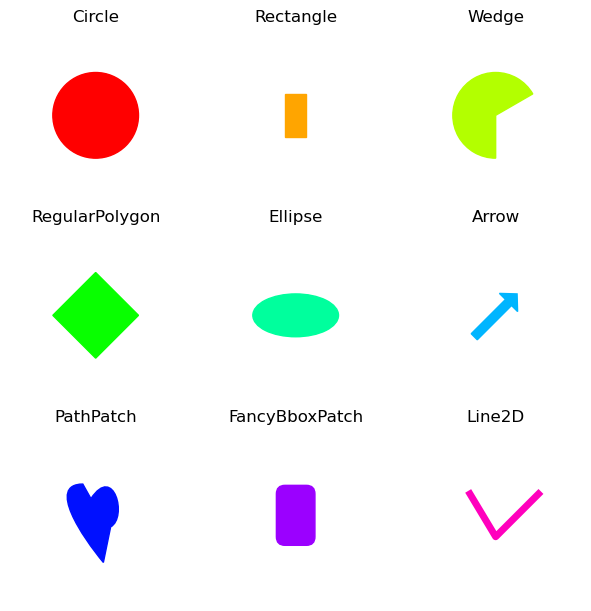

In [17]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath

# Prepare the data for the PathPatch below.
Path = mpath.Path
codes, verts = zip(*[
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])])

artists = [
    mpatches.Circle((0, 0), 0.1, ec="none"),
    mpatches.Rectangle((-0.025, -0.05), 0.05, 0.1, ec="none"),
    mpatches.Wedge((0, 0), 0.1, 30, 270, ec="none"),
    mpatches.RegularPolygon((0, 0), 4, radius=0.1),
    mpatches.Ellipse((0, 0), 0.2, 0.1),
    mpatches.Arrow(-0.05, -0.05, 0.1, 0.1, width=0.1),
    mpatches.PathPatch(mpath.Path(verts, codes), ec="none"),
    mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",
                            boxstyle=mpatches.BoxStyle("Round", pad=0.02)),
    mlines.Line2D([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05], lw=5),
]

axs = plt.figure(figsize=(6, 6), layout="constrained").subplots(3, 3)
for i, (ax, artist) in enumerate(zip(axs.flat, artists)):
    artist.set(color=mpl.colormaps["hsv"](i / len(artists)))
    ax.add_artist(artist)
    ax.set(title=type(artist).__name__,
           aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
    ax.set_axis_off()
plt.show()

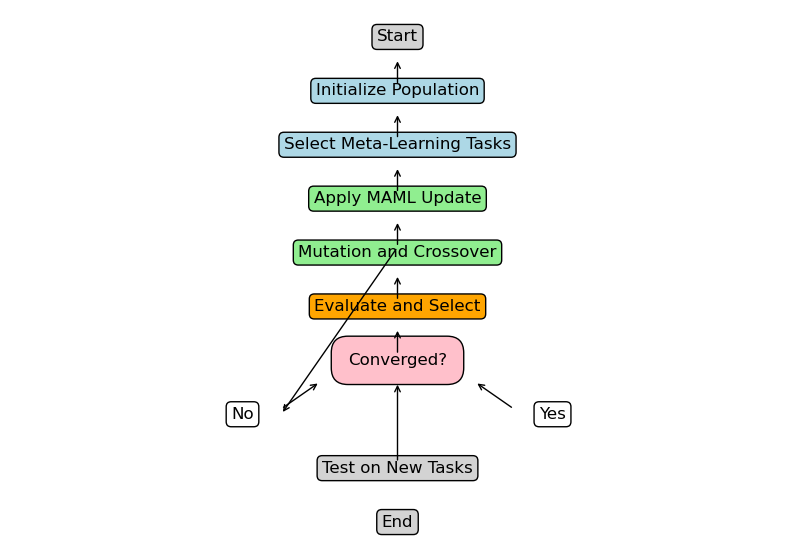

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Membuat flowchart EG-MAML menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 7))

# Tambah kotak untuk setiap langkah di flowchart
ax.text(0.5, 0.95, 'Start', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))

ax.text(0.5, 0.85, 'Initialize Population', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"))

ax.text(0.5, 0.75, 'Select Meta-Learning Tasks', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"))

ax.text(0.5, 0.65, 'Apply MAML Update', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen"))

ax.text(0.5, 0.55, 'Mutation and Crossover', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen"))

ax.text(0.5, 0.45, 'Evaluate and Select', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="orange"))

ax.text(0.5, 0.35, 'Converged?', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=1", edgecolor="black", facecolor="pink"))

ax.text(0.3, 0.25, 'No', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.7, 0.25, 'Yes', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

ax.text(0.5, 0.15, 'Test on New Tasks', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))

ax.text(0.5, 0.05, 'End', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))

# Garis penghubung antar langkah
ax.annotate("", xy=(0.5, 0.91), xytext=(0.5, 0.86), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.5, 0.81), xytext=(0.5, 0.76), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.5, 0.71), xytext=(0.5, 0.66), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.5, 0.61), xytext=(0.5, 0.56), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.5, 0.51), xytext=(0.5, 0.46), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.5, 0.41), xytext=(0.5, 0.36), arrowprops=dict(arrowstyle="->"))

# Garis percabangan Yes/No
ax.annotate("", xy=(0.4, 0.31), xytext=(0.35, 0.26), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.6, 0.31), xytext=(0.65, 0.26), arrowprops=dict(arrowstyle="->"))

# Garis penghubung dari Yes ke Test on New Tasks
ax.annotate("", xy=(0.5, 0.31), xytext=(0.5, 0.16), arrowprops=dict(arrowstyle="->"))

# Garis penghubung dari No ke Mutasi dan Crossover (mengulang siklus)
ax.annotate("", xy=(0.35, 0.25), xytext=(0.5, 0.56), arrowprops=dict(arrowstyle="->"))

# Hapus sumbu
ax.set_axis_off()

# Tampilkan flowchart
plt.show()


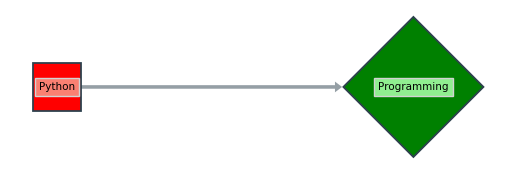

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph # pip install netgraph

graph_data = nx.DiGraph([(0, 1)]) # edge lists or igraph Graph objects are also supported

g = Graph(graph_data,
          node_layout = {0: (0, 0), 1: (1, 0)},
          node_size = {0 : 10, 1 : 20},
          node_color = {0 : "red", 1 : "green"},
          node_labels = {0:"Python", 1:"Programming"},
          node_label_fontdict = {'backgroundcolor' : 'lightgray'},
          node_shape = {0 : "s", 1 : "d"},
          arrows=True,
)

# Netgraph currently does not support multiple values for label backgroundcolors.
# However, all artists are exposed in simple to query dictionaries.
# As node label artists are matplotlib text objects,
# we can vary the node label background colors by using matplotlib.text.Text methods:
g.node_label_artists[0].set_backgroundcolor('salmon')
g.node_label_artists[1].set_backgroundcolor('lightgreen')

# Netgraph assumes circular node shapes when computing fontsizes.
# We hence have to manually adjust the node label fontsizes
# by the ratio of the diagonal to the width in a square.
for node, label in g.node_label_artists.items():
    fontsize = label.get_fontsize()
    label.set_fontsize(fontsize * 1./np.sqrt(2))

plt.show()

# Bypass Cross-Origin Resource Sharing (CORS) utk PyTorch Model di Static Web

In [33]:
%%file static_web/index.html


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Data Test and Model Evaluation</title>
  <style>
    /* Basic styling for layout */
    body {
      font-family: Arial, sans-serif;
      padding: 10px;
      margin: 0;
    }
    h1 {
      text-align: center;
    }
    .checkbox-container {
      display: flex;
      flex-wrap: wrap;
      gap: 10px;
    }
    .checkbox-group {
      flex: 1 1 200px;
      min-width: 200px;
      background-color: #f9f9f9;
      padding: 10px;
      border-radius: 5px;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }
    .checkbox-group label {
      display: block;
      margin: 5px 0;
    }

    /* Container and output styling */
    /* Container and output styling */
    .output-container {
      display: flex;
      flex-wrap: wrap; /* Enables wrapping */
      gap: 15px;
      margin-top: 20px;
      padding: 10px;
      border-radius: 8px;
      box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
      background-color: #f7f9fc;
    }
    .output-container pre {
      flex: 1 1 250px; /* Allows elements to grow and shrink while maintaining a minimum width */
      min-width: 200px;
      padding: 15px;
      background-color: #ffffff;
      border: 1px solid #ddd;
      border-radius: 5px;
      overflow: auto;
    }

    /* Responsive styles */
    @media (max-width: 768px) {
      .output-container {
        flex-direction: column;
      }
    }
  </style>
</head>

<body>
  <h1>Data Test (Select Symptoms) and Model Evaluation</h1>

  <!-- Symptom Checklist Container -->
  <div class="checkbox-container">
    <div class="checkbox-group">
      <label><input type="checkbox" id="checkbox1" onclick="updateDataTest()"> Migraine</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox1_1" onclick="updateDataTest()"> Sakit kepala berdenyut di satu sisi</label>
    </div>
    <div class="checkbox-group">
      <label><input type="checkbox" id="checkbox2" onclick="updateDataTest()"> Vertigo</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox2_1" onclick="updateDataTest()"> Pusing berputar</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox2_2" onclick="updateDataTest()"> Kehilangan keseimbangan</label>
    </div>
    <div class="checkbox-group">
      <label><input type="checkbox" id="checkbox3" onclick="updateDataTest()"> Sariawan (di mulut/lidah)</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox3_1" onclick="updateDataTest()"> Luka kecil pada mulut/lidah</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox3_2" onclick="updateDataTest()"> Nyeri di sekitar mulut/lidah/pipi/kepala</label>
    </div>
    <div class="checkbox-group">
      <label><input type="checkbox" id="checkbox4" onclick="updateDataTest()"> Sakit Gigi</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox4_1" onclick="updateDataTest()"> Nyeri di gigi atau gusi</label>
    </div>
    <div class="checkbox-group">
      <label><input type="checkbox" id="checkbox5" onclick="updateDataTest()"> Radang Tenggorokan</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox5_1" onclick="updateDataTest()"> Nyeri tenggorokan</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox5_2" onclick="updateDataTest()"> Batuk</label>
      <label style="margin-left: 20px;"><input type="checkbox" id="checkbox5_3" onclick="updateDataTest()"> Suara serak</label>
    </div>
  </div>

  <button id="runTestButton" onclick="runTestData(data_test)" disabled>Run Test Data</button>

  <!-- Output Containers -->
  <div class="output-container">
    <pre id="input_data_test"></pre>
    <pre id="output"></pre>
    <pre id="final_output"></pre>
  </div>

  <script>
    const n_input = 14;
    let data_test = new Array(n_input).fill(0);
    let topk = 0;  // Initialize topk

    function updateDataTest() {
      data_test[0] = document.getElementById('checkbox1').checked ? 1 : 0;
      data_test[1] = document.getElementById('checkbox1_1').checked ? 1 : 0;
      data_test[2] = document.getElementById('checkbox2').checked ? 1 : 0;
      data_test[3] = document.getElementById('checkbox2_1').checked ? 1 : 0;
      data_test[4] = document.getElementById('checkbox2_2').checked ? 1 : 0;
      data_test[5] = document.getElementById('checkbox3').checked ? 1 : 0;
      data_test[6] = document.getElementById('checkbox3_1').checked ? 1 : 0;
      data_test[7] = document.getElementById('checkbox3_2').checked ? 1 : 0;
      data_test[8] = document.getElementById('checkbox4').checked ? 1 : 0;
      data_test[9] = document.getElementById('checkbox4_1').checked ? 1 : 0;
      data_test[10] = document.getElementById('checkbox5').checked ? 1 : 0;
      data_test[11] = document.getElementById('checkbox5_1').checked ? 1 : 0;
      data_test[12] = document.getElementById('checkbox5_2').checked ? 1 : 0;
      data_test[13] = document.getElementById('checkbox5_3').checked ? 1 : 0;

      document.getElementById('input_data_test').innerText = `data_test: ${JSON.stringify(data_test)}`;

      // Enable or disable the button based on checked checkboxes
      const hasCheckedCheckboxes = Array.from(document.querySelectorAll('input[type="checkbox"]')).some(checkbox => checkbox.checked);
      document.getElementById('runTestButton').disabled = !hasCheckedCheckboxes;

      // Clear output if no checkboxes are checked
      if (!hasCheckedCheckboxes) {
        document.getElementById('input_data_test').innerText = '';
        document.getElementById('output').innerText = '';
        document.getElementById('final_output').innerText = '';
      }

      // Calculate topk based on checked groups
      topk = 10;
      if (document.getElementById('checkbox1').checked || document.getElementById('checkbox1_1').checked) topk += 1;
      if (document.getElementById('checkbox2').checked || document.getElementById('checkbox2_1').checked || document.getElementById('checkbox2_2').checked) topk += 1;
      if (document.getElementById('checkbox3').checked || document.getElementById('checkbox3_1').checked || document.getElementById('checkbox3_2').checked) topk += 1;
      if (document.getElementById('checkbox4').checked || document.getElementById('checkbox4_1').checked) topk += 1;
      if (document.getElementById('checkbox5').checked || document.getElementById('checkbox5_1').checked || document.getElementById('checkbox5_2').checked || document.getElementById('checkbox5_3').checked) topk += 1;

    }
  </script>

  <script>

    // Tiny dataset untuk Output column names
    const output_column_names = [
      'air kelapa', 'air putih', 'bawang putih', 'bayam',
      'biji-bijian utuh dan kacang-kacangan', 'brokoli', 'bubur',
      'bubur gandum dari biji food grade (oatmeal)', 'bubur kacang hijau',
      'daging (sapi)', 'daging merah segar', 'delima', 'hati ayam', 'ikan',
      'jahe', 'jeruk', 'jus blewah', 'jus delima', 'jus melon', 'jus pisang',
      'jus tomat', 'kalkun', 'kentang', 'kubis', 'kuning telur', 'kunyit',
      'labu', 'madu', 'pasta', 'peppermint', 'pisang', 'sayuran berdaun gelap',
      'sikat kayu siwak', 'smoothie bowl (mix jus buah dan chia seed)',
      'sup ayam', 'sup hangat', 'susu kedelai', 'teh chamomile', 'telur',
      'tiram', 'tuna', 'wijen', 'wortel', 'yoghurt'
    ];

    // Model data
    //const model_json = {
    //  "architecture": { "n_input": 14, "n_hidden1": 100, "n_hidden2": 50, "n_hidden3": 25, "n_output": 44 },
    //  "state_dict": {
    //    "hidden1.weight": [[-0.271908700466156, -0.019576219841837883, /*...*/]],
    //    "hidden1.bias": [/*...*/],
    //    "hidden2.weight": [[0.08144842833280563, 0.07619614899158478, /*...*/]],
    //    "hidden2.bias": [/*...*/],
    //    "hidden3.weight": [[0.023470161482691765, 0.04224829375743866, /*...*/]],
    //    "hidden3.bias": [/*...*/],
    //    "output.weight": [[-0.018862934783101082, 0.12144787609577179, /*...*/]],
    //    "output.bias": [/*...*/]
    //  }
    // };*/

    const model_json = {
      "architecture": { "n_input": 14, "n_hidden1": 100, "n_hidden2": 50, "n_hidden3": 25, "n_output": 44 },
      "state_dict": {"hidden1.weight": [[0.13837428390979767, -0.11767198145389557, -0.05219254642724991, 0.12516281008720398, -0.2519550025463104, 0.15990032255649567, -0.05431799963116646, 0.13625885546207428, 0.03781823441386223, -0.03306996449828148, 0.0738464966416359, 0.012803610414266586, 0.09827572107315063, -0.10386066138744354], [-0.01934213563799858, -0.023282228037714958, 0.039258237928152084, -0.0012667762348428369, 0.23317408561706543, 0.08368942141532898, -0.09938620775938034, -0.16063685715198517, -0.044653624296188354, -0.1157374233007431, -0.0858425721526146, 0.013317259959876537, 0.15946538746356964, 0.14604489505290985], [-0.2608841359615326, 0.16643750667572021, 0.07522296160459518, 0.2537623643875122, 0.17661507427692413, -0.24295197427272797, -0.2537369132041931, -0.12815187871456146, 0.23506249487400055, -0.044310785830020905, 0.11462719738483429, -0.12363951653242111, 0.2626188397407532, -0.11232098937034607], [0.19992280006408691, 0.002855234546586871, -0.14137127995491028, 0.13695316016674042, -0.14293894171714783, 0.07802940160036087, -0.07767662405967712, -0.02961062267422676, -0.2574447989463806, -0.12849657237529755, 0.1446019560098648, -0.06553851813077927, 0.26570236682891846, 0.21392391622066498], [-0.012835195288062096, -0.17846471071243286, 0.16198164224624634, 0.08280233293771744, -0.1728040874004364, 0.17282775044441223, 0.1619337499141693, 0.2369602620601654, -0.15013688802719116, -0.044033948332071304, -0.005321442149579525, 0.0382651649415493, -0.20315048098564148, -0.18972691893577576], [0.14532572031021118, -0.06243293732404709, 0.13076724112033844, 0.015149110928177834, 0.08713795989751816, 0.05898497253656387, 0.09711040556430817, 0.1327219009399414, -0.24757948517799377, 0.13391046226024628, -0.18800503015518188, -0.20143376290798187, 0.016187692061066628, -0.045305561274290085], [0.1579645723104477, -0.154678076505661, -0.23854383826255798, 0.1941879540681839, -0.03980054333806038, 0.14936958253383636, 0.0869160071015358, -0.20031017065048218, 0.05468796566128731, 0.06402468681335449, -0.17926348745822906, -0.12776146829128265, 0.09212521463632584, 0.04797493666410446], [-0.1137857437133789, -0.08060578256845474, 0.24487324059009552, -0.049431364983320236, 0.150590181350708, 0.11581826955080032, -0.17285968363285065, -0.22698840498924255, 0.2564409077167511, 0.01386602595448494, 0.18321402370929718, 0.055478211492300034, 0.08585715293884277, 0.1999315321445465], [0.25303205847740173, -0.1769549548625946, 0.03304180130362511, 0.19924409687519073, 0.19351938366889954, 0.1656593382358551, -0.19381095468997955, -0.1920614242553711, -0.1620209515094757, 0.033481549471616745, 0.26616835594177246, -0.16919603943824768, 0.14202946424484253, -0.1475313901901245], [-0.2513220012187958, -0.05674433335661888, 0.15366168320178986, 0.24813008308410645, -0.16592662036418915, 0.05767221003770828, 0.23057028651237488, 0.17716090381145477, 0.16652455925941467, 0.1899775117635727, 0.16905859112739563, 0.06870613247156143, -0.1827974170446396, -0.22437560558319092], [-0.12148527055978775, -0.03095163218677044, -0.16439957916736603, 0.0971941277384758, 0.08186719566583633, -0.061098601669073105, 0.1036987230181694, 0.08654461055994034, 0.16415275633335114, 0.17913848161697388, -0.09109311550855637, 0.26053982973098755, -0.029918139800429344, -0.009012192487716675], [-0.25229352712631226, -0.172495037317276, -0.15600568056106567, -0.11396471410989761, 0.19087989628314972, -0.08720661699771881, -0.19975019991397858, 0.10234736651182175, 0.08553799986839294, 0.17396791279315948, -0.13795119524002075, 0.05807551369071007, -0.09732753038406372, -0.06052820757031441], [-0.21256691217422485, -0.1219879686832428, -0.08247718214988708, 0.11405505985021591, 0.04911072552204132, 0.06539155542850494, 0.26717332005500793, 0.2602993845939636, 0.18270325660705566, 0.008795451372861862, -0.18512432277202606, 0.20824088156223297, -0.0664137676358223, -0.021787572652101517], [-0.22999058663845062, -0.05332902818918228, -0.1723218858242035, 0.24560502171516418, -0.23085547983646393, -0.20826716721057892, -0.008820493705570698, -0.1450495719909668, 0.09588389843702316, -0.10267821699380875, -0.1255122423171997, 0.015195395797491074, 0.19372454285621643, -0.1885351985692978], [0.1250935047864914, 0.17169339954853058, 0.26177018880844116, -0.18700791895389557, 0.06474549323320389, -0.19728411734104156, 0.22776027023792267, -0.10367856174707413, 0.16057147085666656, 0.007974271662533283, -0.020758522674441338, -0.008191708475351334, 0.04501885548233986, 0.12597961723804474], [0.043013691902160645, 0.08198274672031403, -0.2405625283718109, 0.19477128982543945, 0.23319168388843536, 0.22076524794101715, 0.1977159082889557, -0.19241072237491608, -0.09892337769269943, 0.2358272224664688, -0.20350033044815063, 0.24231059849262238, -0.2100495547056198, -0.18780770897865295], [0.13092836737632751, -0.19227342307567596, -0.06071873754262924, 0.19458281993865967, 0.21136322617530823, 0.2532748579978943, -0.053961750119924545, -0.20798082649707794, 0.263418585062027, -0.05726504698395729, -0.10980824381113052, 0.06566229462623596, -0.18663211166858673, 0.17541638016700745], [0.16837772727012634, -0.21155902743339539, -0.21947355568408966, -0.02364501543343067, 0.11234655231237411, -0.0076930224895477295, -0.13464581966400146, 0.006617977283895016, -0.2503310441970825, -0.18879978358745575, -0.1781468242406845, 0.22014516592025757, 0.23646870255470276, -0.09027203172445297], [0.012597125954926014, 0.11843187361955643, 0.03165009245276451, -0.13438312709331512, 0.1532757431268692, 0.16392222046852112, -0.014878886751830578, -0.03366125747561455, 0.24348273873329163, 0.23275665938854218, -0.1520826816558838, 0.26111263036727905, 0.0667501837015152, -0.1782919019460678], [0.14726249873638153, -0.19853360950946808, 0.24659249186515808, -0.17170581221580505, 0.07607471197843552, 0.0810432955622673, 0.06453058123588562, 0.22266922891139984, -0.11004643142223358, -0.11234397441148758, -0.2314900904893875, -0.011306141503155231, -0.12564677000045776, 0.011705761775374413], [-0.05463156849145889, 0.08930034935474396, 0.2320549339056015, 0.07912332564592361, -0.08623412251472473, -0.13029049336910248, -0.23293611407279968, 0.2255108654499054, -0.0504734143614769, 0.05380949005484581, 0.010146666318178177, -0.16946321725845337, 0.15067315101623535, 0.15040293335914612], [0.013617308810353279, -0.15182319283485413, -0.11415719985961914, 0.0035764279309660196, -0.15268002450466156, -0.14971676468849182, -0.03970852494239807, -0.07689958810806274, 0.06576554477214813, -0.07023218274116516, -0.03553302586078644, -0.10260482132434845, -0.24408148229122162, 0.2331441342830658], [0.05044421926140785, 0.2394186109304428, -0.043605171144008636, -0.0668550655245781, -0.2507559359073639, -0.10198826342821121, 0.17471793293952942, -0.2613407075405121, -0.09402322769165039, 0.1633293479681015, 0.15434588491916656, 0.09815191477537155, -0.05344754084944725, -0.019808776676654816], [-0.05009331554174423, -0.09803665429353714, 0.11229581385850906, -0.09112653881311417, -0.15045931935310364, 0.06139213219285011, -0.19251659512519836, -0.05655085667967796, 0.13723555207252502, 0.09956622868776321, 0.22743308544158936, -0.18152360618114471, 0.00298514636233449, -0.07843633741140366], [-0.14950041472911835, -0.1504518836736679, 0.0676816999912262, 0.027667367830872536, -0.13660353422164917, -0.18803265690803528, -0.22145019471645355, 0.26183021068573, -0.045570217072963715, -0.061980679631233215, -0.09857150912284851, -0.1333259791135788, -0.24443037807941437, -0.15700124204158783], [0.16325116157531738, 0.05878037214279175, -0.0942402109503746, -0.10070231556892395, 0.1711234450340271, 0.1926923394203186, 0.2573821246623993, 0.07816476374864578, 0.1290103793144226, -0.02108071930706501, -0.1559513956308365, -0.26179245114326477, 0.16268077492713928, -0.03864242136478424], [0.11138704419136047, 0.013325328007340431, -0.24954478442668915, -0.13127119839191437, 0.07521285861730576, -0.05419804900884628, -0.2565002739429474, 0.09388795495033264, 0.011833807453513145, -0.08586893230676651, 0.10781171172857285, 0.05631982535123825, -0.09698288142681122, 0.2402639389038086], [0.1338856965303421, 0.03340783715248108, -0.05108371376991272, -0.22682182490825653, 0.20609226822853088, -0.06871995329856873, -0.172904834151268, 0.1712048500776291, 0.09472431242465973, 0.06588472425937653, -0.05343358963727951, -0.08316010236740112, 0.04516002535820007, 0.2066696435213089], [0.03821934014558792, -0.12595978379249573, 0.2654314637184143, 0.006101564504206181, 0.21169202029705048, 0.06507419049739838, 0.239507794380188, 0.15461687743663788, -0.13631059229373932, 0.1881563812494278, 0.0021049538627266884, -0.2145978808403015, -0.05605708807706833, -0.2408190816640854], [-0.13802674412727356, -0.18827933073043823, 0.18238922953605652, -0.05581328272819519, -0.04587600752711296, 0.12767115235328674, 0.10920937359333038, -0.17532570660114288, 0.09893693029880524, 0.11383916437625885, -0.21216678619384766, 0.23196226358413696, -0.16218149662017822, -0.1034545823931694], [-0.22069132328033447, 0.24417757987976074, 0.05025670304894447, 0.22523222863674164, 0.01798652857542038, 0.14463365077972412, -0.08588472753763199, -0.21330781280994415, 0.04235072061419487, -0.02329983562231064, -0.02679615281522274, -0.13189049065113068, 0.004980695899575949, 0.07665976881980896], [0.09599696099758148, -0.21601954102516174, 0.12937100231647491, 0.027285592630505562, 0.1834818720817566, 0.18912892043590546, -0.21088913083076477, 0.25593286752700806, -0.26325523853302, 0.15278643369674683, 0.018613295629620552, 0.126722052693367, -0.14494286477565765, 0.1599530726671219], [-0.13181762397289276, -0.23571118712425232, 0.0896243080496788, 0.1463063806295395, 0.2647385001182556, -0.027849266305565834, 0.2575315833091736, 0.1722186654806137, -0.13211998343467712, -0.20633728802204132, 0.14991553127765656, -0.14634306728839874, 0.12302332371473312, -0.2283724546432495], [0.19481144845485687, 0.07984109967947006, -0.030810385942459106, 0.12245678156614304, -0.19061027467250824, -0.0585104338824749, 0.002445748308673501, -0.15469254553318024, -0.06846548616886139, -0.11559225618839264, 0.2545928955078125, 0.22696265578269958, 0.23033328354358673, 0.21818046271800995], [-0.2566881775856018, 0.08906914293766022, 0.09839114546775818, -0.19573283195495605, 0.10811521857976913, -0.14513874053955078, 0.04176880419254303, 0.08819438517093658, 0.2298882156610489, -0.14042583107948303, -0.20997685194015503, 0.24716737866401672, 0.11145748943090439, 0.12957119941711426], [0.09646586328744888, -0.09403588622808456, 0.1605851948261261, -0.233408585190773, 0.03719001263380051, 0.1206272542476654, 0.18286612629890442, -0.13289834558963776, -0.1803777813911438, 0.10017415881156921, -0.2123296558856964, -0.22229638695716858, -0.24009162187576294, -0.12904013693332672], [-0.05136646702885628, -0.158919557929039, -0.11310310661792755, -0.2369067519903183, 0.1642056256532669, -0.061282142996788025, -0.1689794957637787, 0.06893359869718552, -0.2001855969429016, 0.18701548874378204, 0.15342895686626434, -0.26273879408836365, -0.21013790369033813, -0.1768750101327896], [-0.14582189917564392, 0.03395693749189377, -0.26428502798080444, -0.19809506833553314, 0.12233159691095352, -0.08753335475921631, -0.1074943020939827, -0.22051401436328888, 0.10717897862195969, 0.019150326028466225, -0.10326097905635834, -0.16366839408874512, 0.055694010108709335, 0.07330577820539474], [0.1180337518453598, 0.07963873445987701, -0.04120350629091263, -0.20677949488162994, 0.17024187743663788, -0.0027250375133007765, -0.1782114952802658, 0.23069743812084198, 0.14841784536838531, -0.20994733273983002, -0.13336507976055145, -0.09138420224189758, -0.15487851202487946, 0.1250215619802475], [-0.19062259793281555, 0.24807105958461761, -0.11100666970014572, 0.15759512782096863, 0.00889289565384388, -0.11807752400636673, 0.17851249873638153, -0.20424257218837738, -0.14136305451393127, 0.03182539716362953, 0.21184897422790527, -0.11504792422056198, -0.16270355880260468, -0.17093707621097565], [-0.1174788624048233, -0.09234325587749481, -0.06209945306181908, -0.1524871438741684, 0.0829446092247963, 0.002321934560313821, -0.17426949739456177, -0.15264536440372467, 0.0569436140358448, -0.004404502455145121, 0.18870753049850464, -0.040364380925893784, -0.21615828573703766, -0.1976916790008545], [-0.07874840497970581, -0.0590222030878067, 0.03036634810268879, -0.05968165025115013, 0.0990876853466034, -0.0890209749341011, 0.19585691392421722, 0.06155657768249512, -0.08246621489524841, 0.23865805566310883, 0.06848733872175217, -0.18176227807998657, -0.14904306828975677, 0.16774681210517883], [0.12184279412031174, 0.2083667814731598, -0.02105102129280567, 0.18698067963123322, 0.13323339819908142, 0.0821312889456749, -0.06207755580544472, 0.25732752680778503, 0.05386294052004814, -0.06860020756721497, -0.003747170092537999, 0.26220962405204773, 0.1792852133512497, -0.02011493779718876], [0.26221150159835815, 0.1175607219338417, -0.1428755521774292, -0.24337054789066315, 0.15480011701583862, 0.25006523728370667, -0.15551529824733734, 0.10996714979410172, 0.011575418524444103, -0.05766080319881439, -0.07281547784805298, 0.07377137988805771, 0.0591171570122242, 0.1807073950767517], [0.09784217178821564, 0.12070856243371964, 0.23562082648277283, 0.08289963752031326, 0.03915800526738167, -0.09744586050510406, 0.19601131975650787, 0.03855888172984123, 0.17227290570735931, 0.2575649321079254, -0.06009535491466522, 0.1880333125591278, -0.05427083745598793, 0.24027390778064728], [0.21073448657989502, -0.09591058641672134, 0.009389938786625862, -0.11685489118099213, -0.10865552723407745, -0.054306790232658386, -0.0014477050863206387, -0.09328006953001022, -0.2519197165966034, -0.1622094213962555, -0.02297833189368248, -0.08551297336816788, 0.19888409972190857, 0.21713048219680786], [0.1710047572851181, 0.11861943453550339, -0.2121943235397339, 0.2525218725204468, -0.23518900573253632, -0.08818333595991135, -0.18735995888710022, 0.09644170850515366, -0.22164960205554962, -0.13143400847911835, -0.16974444687366486, -0.16460105776786804, -0.12401985377073288, 0.2630572021007538], [-0.020850611850619316, 0.0827794075012207, -0.2653738260269165, 0.23770225048065186, -0.05802381411194801, -0.24534521996974945, 0.18516437709331512, -0.07095520198345184, 0.24368725717067719, -0.18135841190814972, -0.2480577826499939, -0.20084887742996216, 0.116750568151474, -0.02866191789507866], [-0.2491232305765152, 0.04999842122197151, -0.017423199489712715, 0.0972556322813034, -0.13525834679603577, -0.1911822110414505, 0.1806335747241974, -0.12816263735294342, 0.18647357821464539, 0.2173890471458435, -0.186202272772789, -0.12360566854476929, 0.03064577281475067, -0.2515478730201721], [0.08283493667840958, -0.11094198375940323, -0.1180860847234726, -0.20642957091331482, 0.12551330029964447, -0.1698998361825943, -0.21286547183990479, -0.0698675587773323, -0.1480279117822647, -0.2593472898006439, 0.10789132118225098, -0.10127215087413788, 0.18796421587467194, 0.1885453760623932], [-0.17044316232204437, -0.15550319850444794, -0.09507827460765839, 0.15640169382095337, -0.010050272569060326, -0.09568969905376434, 0.1655714064836502, 0.2537589371204376, 0.1975938230752945, -0.20522649586200714, -0.05565791204571724, -0.05147597938776016, 0.22808967530727386, -0.13792698085308075], [-0.1546432226896286, 0.002616616664454341, -0.0626169741153717, 0.10107421875, 0.03212343528866768, -0.16010171175003052, 0.19287095963954926, 0.16479948163032532, 0.057058874517679214, -0.24226731061935425, 0.12550236284732819, 0.1770525574684143, 0.07293808460235596, -0.10487291216850281], [0.01833547279238701, -0.10270956158638, 0.251414954662323, 0.2578361928462982, -0.031665053218603134, -0.18001185357570648, 0.15762825310230255, 0.13636672496795654, 0.14207996428012848, -0.201621413230896, 0.09038910269737244, -0.11425301432609558, -0.23449882864952087, -0.1866610050201416], [0.1134970411658287, 0.10047261416912079, -0.2350732535123825, 0.1516246348619461, 0.20494914054870605, 0.20237858593463898, 0.15111033618450165, -0.041538700461387634, 0.17928583920001984, 0.20939630270004272, 0.13938535749912262, -0.19273464381694794, -0.09307283908128738, 0.21214500069618225], [0.20463012158870697, 0.17160426080226898, -0.11202835291624069, -0.05295285955071449, -0.19925595819950104, -0.15263622999191284, 0.20603527128696442, -0.21829186379909515, -0.065170519053936, 0.056587450206279755, -0.16038228571414948, 0.06197499856352806, -0.042086947709321976, 0.10795458406209946], [-0.20457524061203003, 0.03747781738638878, -0.24371720850467682, 0.1660812348127365, 0.2598147988319397, -0.0954398438334465, 0.04003659263253212, -0.13710106909275055, -0.17044641077518463, -0.13515080511569977, -0.127048060297966, 0.05068368837237358, -0.030118755996227264, 0.01933404430747032], [-0.20486201345920563, -0.16795134544372559, -0.23154890537261963, -0.19235946238040924, 0.2233504354953766, 0.09911878407001495, -0.25493818521499634, -0.044648315757513046, 0.02139783464372158, 0.14231890439987183, 0.2476058155298233, 0.06436173617839813, 0.1882166713476181, -0.0951446071267128], [-0.008594447746872902, -0.16162733733654022, 0.062345873564481735, 0.24630768597126007, 0.16665303707122803, 0.2667234539985657, -0.12028685957193375, -0.033731091767549515, 0.055266983807086945, 0.21368935704231262, -0.24606679379940033, -0.1304781138896942, 0.03890714794397354, -0.1547686755657196], [0.09922618418931961, -0.018821651116013527, -0.0690435841679573, 0.14331278204917908, 0.19093111157417297, 0.2601732313632965, 0.12041480094194412, -0.007909993641078472, 0.21790248155593872, 0.21262499690055847, -0.13396671414375305, 0.12194813042879105, 0.03070482611656189, -0.11610396206378937], [-0.06363027542829514, -0.06265918910503387, -0.18648789823055267, -0.08182375878095627, 0.0892506018280983, 0.19673559069633484, 0.02031821943819523, -0.2583661377429962, 0.1415618658065796, -0.08155397325754166, 0.23841048777103424, -0.25771474838256836, -0.06251326948404312, 0.20771703124046326], [0.11501974612474442, -0.1328951120376587, -0.2315734177827835, -0.002627095440402627, 0.10353974252939224, -0.22202949225902557, -0.22424279153347015, -0.0029206660110503435, -0.05540968105196953, 0.1720735877752304, -0.2587151825428009, -0.042659223079681396, -0.20770610868930817, -0.0384826622903347], [-0.13634851574897766, 0.0842759981751442, -0.2233446091413498, -0.21007318794727325, -0.1511831283569336, -0.23384316265583038, 0.16891473531723022, -0.03808462992310524, -0.1482853889465332, 0.18776275217533112, -0.0604645311832428, 0.13845910131931305, -0.08264681696891785, -0.22344055771827698], [0.05861813947558403, 0.16587336361408234, -0.26124823093414307, 0.02783520705997944, 0.05346909910440445, 0.0300150066614151, -0.006693356204777956, -0.0836247056722641, -0.20756421983242035, 0.04379267245531082, -0.1794823855161667, -0.2214839607477188, -0.08588474988937378, -0.18350322544574738], [0.0805453509092331, 0.1907535344362259, 0.20789547264575958, -0.16511847078800201, 0.1459328830242157, 0.19010750949382782, 0.001627763151191175, 0.11313743144273758, 0.14985716342926025, 0.20471736788749695, 0.14354021847248077, 0.1142672747373581, -0.10280907154083252, -0.14862532913684845], [-0.1269625425338745, 0.22058793902397156, -0.06485792249441147, 0.009561756625771523, -0.24890463054180145, -0.01199719961732626, -0.0756256952881813, -0.17175734043121338, 0.20675264298915863, -0.2160385698080063, -0.0382021889090538, -0.019075309857726097, -0.24218393862247467, 0.16227972507476807], [-0.085239939391613, 0.11941149830818176, 0.14939217269420624, 0.23581770062446594, 0.06609802693128586, 0.20087118446826935, 0.24662767350673676, 0.05231471359729767, -0.054656241089105606, -0.07318504899740219, 0.043448492884635925, 0.09640823304653168, -0.25233009457588196, 0.19959205389022827], [0.041690222918987274, -0.249274343252182, 0.08526064455509186, 0.16969098150730133, 0.09966272115707397, 0.21781271696090698, 0.00507019367069006, -0.22203554213047028, -0.0010613066842779517, 0.19405747950077057, -0.1284652203321457, 0.11364968121051788, 0.06115248054265976, -0.04367577284574509], [0.001464412547647953, 0.11415834724903107, -0.1827627271413803, 0.16876371204853058, 0.1808491051197052, 0.15009863674640656, 0.26663196086883545, -0.011218409985303879, -0.18915846943855286, 0.012116732075810432, -0.07751858979463577, 0.09447264671325684, 0.22563868761062622, -0.14582912623882294], [0.011349901556968689, 0.2603473961353302, -0.21204844117164612, -0.04589080065488815, 0.25972986221313477, 0.18805082142353058, 0.07772822678089142, -0.11487054824829102, -0.0247555673122406, -0.23945631086826324, -0.25138941407203674, -0.24910087883472443, 0.25685518980026245, 0.2117844671010971], [0.10617343336343765, -0.06749019026756287, 0.22945737838745117, -0.07086296379566193, 0.18481245636940002, -0.009350834414362907, -0.12556369602680206, -0.07495282590389252, -0.05690915882587433, -0.24536196887493134, 0.0796540379524231, -0.08208158612251282, 0.12294826656579971, 0.17004060745239258], [-0.043306466192007065, 0.1296357810497284, 0.05440928786993027, 0.17976368963718414, -0.17271272838115692, -0.02245270647108555, -0.08987411111593246, 0.2342023253440857, -0.24070636928081512, -0.15057404339313507, 0.030450407415628433, 0.23826898634433746, 0.18001693487167358, -0.2500723898410797], [-0.18794555962085724, 0.2595219016075134, 0.03957781568169594, -0.22869627177715302, -0.0844726487994194, 0.11747105419635773, -0.05592983961105347, -0.2049080729484558, -0.16505490243434906, -0.1387225091457367, -0.010253839194774628, 0.10536570847034454, 0.12827618420124054, -0.12945032119750977], [-0.04424373805522919, -0.2060202807188034, 0.20271508395671844, 0.26666948199272156, 0.2600924074649811, 0.10982359200716019, -0.056390970945358276, -0.006334042642265558, 0.09702260047197342, -0.2313428819179535, 0.016545670107007027, -0.2166440337896347, -0.2666160464286804, -0.008604475297033787], [-0.08476318418979645, -0.1696121096611023, 0.04370628297328949, 0.010493765585124493, 0.040620625019073486, -0.1501815766096115, -0.2614595890045166, 0.005536437965929508, -0.10871067643165588, -0.09026703983545303, 0.19636058807373047, 0.04304985702037811, 0.12238197028636932, -0.07500476390123367], [-0.21197813749313354, 0.05277884006500244, -0.17684172093868256, 0.033263783901929855, -0.20761261880397797, 0.20163707435131073, -0.18197205662727356, 0.23151281476020813, 0.1888841986656189, 0.20299822092056274, 0.16051742434501648, 0.06201133131980896, -0.012935902923345566, -0.004778233356773853], [-0.10645243525505066, -0.24597959220409393, 0.2441612035036087, 0.013405406847596169, 0.12477018684148788, 0.010368676856160164, 0.07664649188518524, -0.16498184204101562, -0.20791657269001007, 0.2028968632221222, 0.10090773552656174, 0.13252313435077667, -0.2654285728931427, 0.01775498501956463], [-0.24956132471561432, -0.030457595363259315, -0.013649718835949898, -0.18794994056224823, -0.26455816626548767, 0.0022378989960998297, 0.24007540941238403, 0.24098943173885345, -0.16298678517341614, -0.0473860464990139, -0.22342173755168915, -0.20823979377746582, -0.07355181872844696, 0.2595999240875244], [-0.06995625048875809, 0.014137170277535915, 0.2514630854129791, 0.04746066406369209, 0.21544253826141357, 0.1776258796453476, 0.2503819167613983, 0.04450659453868866, -0.21636123955249786, -0.23007163405418396, -0.13825517892837524, 0.2206241637468338, 0.153452068567276, 0.07689496129751205], [-0.20386359095573425, -0.19635185599327087, 0.21805982291698456, -0.02776849828660488, -0.26631975173950195, -0.03302440792322159, -0.06449902057647705, 0.004518701694905758, 0.11151474714279175, 0.10262306779623032, -0.20452837646007538, -0.002914326498284936, -0.1327837109565735, 0.18127036094665527], [0.13188879191875458, 0.14628008008003235, 0.2432814985513687, 0.13131392002105713, -0.2668580412864685, 0.06774070113897324, -0.1838451325893402, 0.03527563065290451, 0.0024023824371397495, 0.265289306640625, -0.18256434798240662, -0.2615495026111603, -0.07210148125886917, 0.042652957141399384], [0.1954904943704605, 0.2169020026922226, 0.20700842142105103, 0.08464974164962769, -0.07589025050401688, -0.05533229187130928, -0.1464480608701706, 0.05246920883655548, -0.18615446984767914, 0.09237385541200638, 0.17288269102573395, 0.22796735167503357, -0.2637194097042084, 0.21948592364788055], [-0.16797614097595215, -0.021890318021178246, 0.24431629478931427, 0.1449994444847107, -0.08488411456346512, 0.1581123024225235, -0.26003268361091614, 0.20887112617492676, 0.2593507766723633, -0.012244882993400097, 0.04415486007928848, -0.06237227842211723, -0.16927507519721985, -0.12095411866903305], [-0.01838676817715168, -0.21857163310050964, -0.21541482210159302, 0.029303161427378654, -0.1740717589855194, -0.14478619396686554, -0.002949346788227558, -0.14076882600784302, 0.24675197899341583, -0.09665283560752869, -0.14863333106040955, -0.07061071693897247, -0.21868941187858582, 0.13776041567325592], [0.2295423299074173, -0.15390649437904358, -0.09959827363491058, 0.24948343634605408, -0.19315624237060547, 0.0721394270658493, -0.21784242987632751, -0.23764856159687042, 0.00031707179732620716, -0.1523570567369461, 0.1448020339012146, -0.08291091024875641, 0.002545957686379552, -0.1393052041530609], [0.10957113653421402, 0.24740929901599884, -0.03992270678281784, -0.16467100381851196, -0.260184645652771, 0.2563612461090088, 0.11238855868577957, 0.11016087234020233, 0.045246534049510956, 0.13458925485610962, 0.09519263356924057, 0.13075177371501923, 0.16689351201057434, 0.03768331557512283], [0.22886909544467926, 0.1654987633228302, -0.007691753096878529, -0.11938679963350296, 0.018220236524939537, 0.20863574743270874, 0.16797105967998505, -0.10899046063423157, -0.057129692286252975, 0.10661681741476059, 0.10068362206220627, 0.2549866735935211, 0.12844540178775787, 0.08445601165294647], [0.061967991292476654, -0.2521235942840576, -0.09907267987728119, 0.028215935453772545, -0.18611250817775726, -0.2347746193408966, 0.1805422604084015, 0.08994525671005249, -0.2154717594385147, 0.01567358523607254, 0.15732626616954803, 0.1533534973859787, 0.24426418542861938, -0.10662776231765747], [0.11906851083040237, -0.2175125777721405, -0.03296700865030289, -0.17013536393642426, -0.05056113749742508, 0.15214698016643524, 0.1333010196685791, -0.1412983387708664, -0.06620769947767258, -0.0531373992562294, -0.10183172672986984, -0.1464046835899353, 0.19631412625312805, 0.18402381241321564], [0.2234560251235962, -0.14645375311374664, 0.19541680812835693, -0.08031302690505981, -0.06160438433289528, -0.07225075364112854, -0.012656616978347301, -0.11673082411289215, 0.036889031529426575, -0.17107383906841278, 0.11065022647380829, -0.2244262993335724, -0.09654948860406876, -0.18636763095855713], [0.18046873807907104, 0.1844581961631775, -0.21234619617462158, -0.14566251635551453, 0.2391851842403412, 0.07809914648532867, 0.1842121183872223, -0.2040608525276184, 0.12080413848161697, 0.17011329531669617, -0.06183576211333275, -0.012094087898731232, 0.1950637400150299, 0.07371355593204498], [0.07684957981109619, 0.0016147169517353177, -0.11094506829977036, -0.16363105177879333, 0.2666237950325012, -0.020480234175920486, 0.23733919858932495, 0.21947452425956726, -0.13959014415740967, 0.01808367297053337, -0.06840803474187851, -0.00421978859230876, 0.17630502581596375, 0.14796969294548035], [-0.15134643018245697, -0.1318134367465973, -0.19065023958683014, -0.2267654687166214, 0.17173057794570923, -0.16593267023563385, 0.003947873134166002, 6.721652607666329e-05, 0.04617633298039436, -0.01535299327224493, 0.13884136080741882, 0.03591690957546234, 0.1921047568321228, 0.05812109634280205], [-0.003431125544011593, 0.0375642366707325, 0.17848306894302368, 0.04022570326924324, 0.188442200422287, -0.024991163983941078, 0.0022196630015969276, 0.22423085570335388, -0.25241658091545105, 0.026824457570910454, 0.24399486184120178, -0.13376262784004211, -0.04939615726470947, -0.01640911214053631], [0.0888606384396553, 0.10093337297439575, 0.06110768765211105, 0.10516058653593063, -0.11475401371717453, 0.11300157755613327, -0.08393155783414841, 0.16784785687923431, -0.07762516289949417, -0.22765924036502838, 0.018819892778992653, 0.13963131606578827, -0.009662294760346413, 0.0033870816696435213], [0.0018762403633445501, 0.14213933050632477, 0.021088236942887306, -0.23842361569404602, -0.18980014324188232, 0.015974367037415504, -0.0205311868339777, 0.2557585537433624, -0.06189775839447975, 0.20533831417560577, -0.2250678837299347, -0.25383248925209045, -0.023656049743294716, -0.1689290553331375], [-0.07796116173267365, 0.030413061380386353, -0.231207475066185, 0.18408840894699097, -0.16200487315654755, 0.205683171749115, 0.08734022080898285, -0.04981284588575363, -0.23391486704349518, 0.04442930966615677, -0.14887362718582153, 0.23160460591316223, -0.2248552143573761, -0.07028890401124954], [-0.14750027656555176, -0.1715186983346939, -0.13914623856544495, -0.026100028306245804, 0.0184926800429821, 0.04552163556218147, 0.13636288046836853, -0.10879281908273697, -0.16603127121925354, -0.05589907243847847, 0.25225311517715454, -0.03240283951163292, -0.22520452737808228, 0.2100813239812851], [0.06519221514463425, 0.04659537598490715, 0.04603096470236778, 0.186180979013443, -0.12234362959861755, 0.19494055211544037, 0.2571607232093811, -0.0687040463089943, 0.16883987188339233, 0.14680498838424683, 0.24999934434890747, -0.06204601004719734, -0.1588214933872223, -0.09899773448705673], [-0.18164868652820587, 0.009081460535526276, 0.2580607831478119, 0.2593230605125427, 0.20223817229270935, 0.026828713715076447, 0.005983863957226276, 0.17687174677848816, 0.1588774174451828, -0.02616054192185402, -0.0675516352057457, 0.10606124252080917, -0.009091580286622047, -0.18784868717193604], [-0.12540902197360992, 0.21596074104309082, 0.22249314188957214, -0.10421513020992279, -0.05790175497531891, -0.1325429528951645, -0.0869544968008995, 0.2428390383720398, -0.23740385472774506, 0.12698517739772797, -0.2402849644422531, -0.12759053707122803, -0.05412478372454643, 0.017733873799443245]], "hidden1.bias": [-0.04345453903079033, -0.12138228863477707, -0.11705727875232697, -0.16543805599212646, -0.18789876997470856, -0.16682355105876923, 0.2559424936771393, -0.1257060170173645, -0.2229149043560028, 0.18344783782958984, 0.10282304883003235, 0.18467095494270325, -0.2661823630332947, -0.25441089272499084, -0.1896979808807373, -0.1401071399450302, -0.00023545532894786447, 0.11689375340938568, 0.15453298389911652, -0.22765664756298065, 0.10834365338087082, -0.15502691268920898, 0.061591316014528275, 0.08540670573711395, 0.042524151504039764, 0.09538580477237701, -0.01182554941624403, 0.1756477952003479, 0.0568414144217968, 0.23587645590305328, 0.057377103716135025, -0.14342090487480164, 0.17250119149684906, 0.013506308197975159, 0.2571939527988434, -0.029000209644436836, 0.2630174458026886, -0.1562567800283432, 0.13371846079826355, -0.2005610466003418, 0.18293119966983795, 0.048981014639139175, 0.1510927528142929, -0.23100613057613373, -0.2677466869354248, 0.1281389445066452, -0.1088496521115303, 0.10831867903470993, -0.1586397886276245, -0.08037099987268448, 0.00029802406788803637, 0.15692955255508423, 0.1503448188304901, -0.023531535640358925, -0.0741378515958786, -0.0030924531165510416, 0.13675321638584137, -0.2274690866470337, -0.08276180922985077, -0.257589727640152, 0.038811299949884415, -0.030357662588357925, 0.15032976865768433, 0.21346676349639893, -0.2278423011302948, -0.11876591295003891, -0.04419587552547455, -0.002588742645457387, -0.05871197208762169, -0.16988995671272278, -0.10312739759683609, -0.005972260143607855, 0.21672986447811127, -0.06926105171442032, 0.17733952403068542, -0.21732203662395477, 0.012449472211301327, -0.21041159331798553, -0.2508644163608551, 0.026168348267674446, -0.12051168084144592, 0.1970100700855255, 0.21092945337295532, -0.2658819854259491, -0.01807413063943386, -0.046703778207302094, -0.1539531797170639, -0.18706609308719635, -0.11083727329969406, 0.11940329521894455, 0.06501533836126328, 0.16138477623462677, -0.01594259776175022, 0.13975079357624054, 0.05421541631221771, -0.056741274893283844, -0.014401172287762165, -0.24347734451293945, -0.005255670752376318, -0.08898942172527313], "hidden2.weight": [[-0.033772461116313934, -0.04003506898880005, -0.02156350389122963, -0.07434678077697754, 0.006326985079795122, -0.004108967259526253, -0.026624692603945732, 0.08736813813447952, 0.06795837730169296, 0.029033862054347992, -0.03669539839029312, 0.013615734875202179, -0.06913203746080399, 0.06929218769073486, 0.09224060922861099, -0.014026009477674961, 0.077492855489254, 0.09382019191980362, -0.0059025222435593605, -0.037335142493247986, 0.005080911796540022, 0.016241634264588356, -0.09267819672822952, -0.005788397043943405, -0.03563755750656128, 0.06556740403175354, -0.002993106609210372, 0.06529045104980469, 0.08949724584817886, -0.0305853933095932, 0.02210969291627407, -0.007323909550905228, -0.043201811611652374, -0.0559854656457901, 0.0017787476535886526, 0.03064516931772232, -0.01640724577009678, 0.016665825620293617, 0.061896517872810364, 0.04227994382381439, 0.042396899312734604, 0.028341177850961685, -0.07705084979534149, -0.06120838597416878, -0.07463882118463516, 0.06499230861663818, -0.08855700492858887, -0.07609393447637558, 0.06552958488464355, 0.0586896575987339, -0.09545397758483887, 0.057496074587106705, -0.022738153114914894, 0.02131291665136814, -0.06370214372873306, -0.014616589993238449, 0.023269038647413254, 0.07697762548923492, 0.06066257879137993, -0.05449237674474716, -0.06520860642194748, -0.006115598138421774, 0.03151477128267288, 0.055258411914110184, -0.10007897019386292, -0.007676522713154554, 0.004364269319921732, -0.04680153355002403, 0.07761698961257935, -0.02666197344660759, -0.09508709609508514, -0.05947358161211014, 0.0042417533695697784, -0.07368065416812897, 0.02331182360649109, 0.09883122146129608, 0.0032775599975138903, -0.0246211439371109, 0.09428350627422333, 0.07384944707155228, 0.06716734170913696, 0.008467203937470913, 0.004086323082447052, -0.07740672677755356, 0.009294266812503338, 0.09688489139080048, 0.00484022032469511, -0.09016925096511841, 0.0546087808907032, 0.08897025883197784, 0.08304158598184586, 0.004532188177108765, 0.0195718165487051, 0.016173051670193672, -0.041540756821632385, -0.013824893161654472, 0.08230514824390411, 0.010228510946035385, 0.09495659172534943, -0.06635337322950363], [-0.014472760260105133, 0.0010148731525987387, -0.05899537354707718, 0.07763199508190155, 0.06928391009569168, -0.05389206483960152, 0.08864355832338333, 0.09282592684030533, -0.05851307883858681, -0.003822915256023407, 0.09963903576135635, -0.06524158269166946, -0.015689143911004066, -0.06791751086711884, 0.07259827107191086, 0.015924375504255295, 0.04147440940141678, 0.07174374908208847, -0.016305506229400635, -0.10040374845266342, 0.004701540805399418, -0.00738142104819417, 0.036413371562957764, 0.046635501086711884, -0.04995458573102951, -0.03874639794230461, 0.0630943775177002, 0.028603389859199524, 0.02281980961561203, 0.04375339299440384, 0.04616173356771469, -0.07327854633331299, 0.00824720785021782, 0.009766836650669575, -0.09700945019721985, 0.020976584404706955, -0.0014191679656505585, 0.07811947166919708, -0.0955457091331482, 0.09443177282810211, -0.04921770095825195, 0.05906350538134575, 0.0736035481095314, -0.01253960095345974, -0.05119631066918373, -0.01636016182601452, -0.06210269033908844, 0.013677146285772324, 0.04271251708269119, 0.021111879497766495, -0.05682215839624405, 0.05483318492770195, 0.09195131063461304, -0.029788730666041374, 0.05247194319963455, -0.006509477738291025, 0.04015181586146355, -0.07147891819477081, -0.08535056561231613, -0.002320315456017852, -0.08400516211986542, 0.036254119127988815, 0.09391462802886963, -0.020233938470482826, 0.0009740468231029809, 0.014506938867270947, -0.0486820787191391, -0.004899223335087299, 0.026324689388275146, 0.08079993724822998, -0.08342165499925613, -0.002629219787195325, -0.08196637779474258, -0.00893102865666151, -0.0030551173258572817, -0.04244847595691681, 0.061240941286087036, 0.0678931251168251, -0.039200302213430405, -0.01419686060398817, -0.03149685636162758, 0.001893616747111082, 0.03350498899817467, 0.09293275326490402, -0.09188234806060791, 0.040407564491033554, -0.05954146757721901, -0.08119267225265503, 0.07745246589183807, -0.029205551370978355, -0.055743083357810974, 0.02787020057439804, -0.0211038775742054, -0.09208467602729797, -0.05213794484734535, -0.04286530241370201, -0.007905655540525913, -0.06570518016815186, -0.09682512283325195, 0.055110298097133636], [-0.08589719235897064, -0.01277785561978817, 0.08563434332609177, -0.03686487302184105, -0.06775153428316116, 0.026041502133011818, 0.08856958895921707, -0.011650464497506618, -0.007046096958220005, 0.047476135194301605, 0.013417642563581467, 0.01902296207845211, 0.05213884636759758, 0.043915919959545135, -0.07127287983894348, -0.04051800072193146, 0.06825283169746399, 0.015274702571332455, 0.0241556316614151, 0.09462752193212509, 0.06283188611268997, 0.03886401653289795, 0.09606660902500153, -0.08809978514909744, 0.014491652138531208, 0.027711430564522743, -0.017192766070365906, -0.04535131901502609, 0.01868760585784912, -0.08293645828962326, -0.04250510782003403, 0.07491125911474228, -0.035998787730932236, -0.027832280844449997, 0.046242378652095795, -0.026531582698225975, 0.014613280072808266, -0.10091225057840347, 0.057861898094415665, -0.0901162177324295, 0.012698842212557793, -0.09859281033277512, -0.08395818620920181, 0.08020938187837601, -0.05476268753409386, -0.0027780234813690186, 0.00419933907687664, 0.09341233968734741, 0.031093621626496315, 0.04829857870936394, -0.04207612946629524, -0.033126212656497955, 0.07340966910123825, 0.03820003569126129, 0.025224296376109123, -0.07596836984157562, -0.07989394664764404, 0.018763326108455658, -0.07471834123134613, 0.06907840073108673, 0.08272796869277954, -0.04225274920463562, -0.06424316018819809, 0.09820812195539474, -0.054607365280389786, -0.07983803749084473, -0.07335028052330017, 0.017985204234719276, 0.020238006487488747, 0.06385660171508789, 0.07977758347988129, 0.04155630245804787, 0.014537479728460312, 0.08920060098171234, -0.04033549129962921, -0.019680196419358253, 0.08465635031461716, -0.03450029343366623, 0.051709748804569244, 0.021664446219801903, 0.03496305271983147, -0.02254571206867695, -0.08466790616512299, 0.07002776861190796, 0.08336975425481796, -0.0786934569478035, -0.04730726033449173, 0.003574433270841837, 0.04855147376656532, -0.012405098415911198, -0.04230690374970436, 0.07873735576868057, -0.0500413253903389, 0.09151896834373474, 0.0018955800915136933, 0.0512007474899292, 0.02283838763833046, 0.01719512790441513, 0.07359828799962997, -0.005601809825748205], [0.07120832800865173, 0.032943885773420334, -0.056716322898864746, 0.0655737817287445, -0.07076290994882584, 0.051667969673871994, -0.02112036943435669, 0.031252626329660416, -0.012699637562036514, 0.020077230408787727, -0.03020676225423813, 0.04048478230834007, 0.04684143140912056, -0.09187297523021698, 0.08875883370637894, -0.08120376616716385, -0.04435303062200546, 0.03965237736701965, 0.09294357895851135, 0.032885659486055374, -0.05594742298126221, 0.016992829740047455, -0.05984213203191757, 0.046957582235336304, 0.004315381404012442, 0.01031146664172411, -0.07728156447410583, 0.053273629397153854, 0.09482701867818832, -0.06865856051445007, 0.03378095477819443, -0.04461805149912834, -0.02683638222515583, 0.08942968398332596, -0.09263736754655838, -0.019056331366300583, 0.03447295352816582, 0.04443690925836563, -0.03893402963876724, -0.05584730580449104, 0.019464557990431786, -0.09185799956321716, 0.014120440930128098, -0.06295177340507507, -0.017904693260788918, 0.09058284014463425, -0.08370474725961685, -0.04938012734055519, -0.07746460288763046, 0.05909395590424538, 0.08298661559820175, -0.06415943801403046, 0.06343699246644974, 0.0635494813323021, -0.08561625331640244, 0.03306989371776581, 0.04468487948179245, -0.01840493083000183, 0.06766558438539505, -0.006861827801913023, -0.014329942874610424, 0.05542030185461044, -0.09227310121059418, -0.09758419543504715, 0.018460145220160484, 0.011275879107415676, 0.007274061907082796, -0.06109943613409996, 0.07981108874082565, -0.061693791300058365, -0.04388650879263878, -0.08401090651750565, -0.09975965321063995, 0.023549247533082962, -0.04028990864753723, 0.06046261638402939, 0.09657976776361465, 0.033368516713380814, 0.08736918121576309, -0.06959328800439835, 0.05255782976746559, 0.05462443456053734, -0.040028493851423264, -0.007400670554488897, -0.05875243991613388, 0.010652651078999043, -0.0955236554145813, -0.05925707146525383, -0.08607456088066101, -0.01236256118863821, 0.010306605137884617, -0.0807267427444458, -0.03747255355119705, 0.060935284942388535, 0.00468252319842577, 0.017339903861284256, -0.04491569846868515, -0.029262710362672806, -0.08847425132989883, 0.09256796538829803], [0.01112113706767559, 0.046185772866010666, 0.058606602251529694, 0.08755714446306229, -0.06878537684679031, 0.028092768043279648, -0.08703908324241638, 0.03731173649430275, -0.05108971148729324, 0.03885096311569214, -0.07369828969240189, 0.05331486463546753, 0.07164531201124191, 0.05503489449620247, -0.08427903056144714, 0.06287264078855515, -0.06350496411323547, -0.09360328316688538, 0.06490214169025421, 0.01717497408390045, -0.03480438143014908, -0.08721689879894257, 0.02557835355401039, -0.043191734701395035, -0.07889579236507416, -0.01301636639982462, -0.08500175178050995, 0.04914076253771782, -0.06583631038665771, -0.03404165804386139, -0.0987836942076683, -0.013384559191763401, -0.031024914234876633, 0.054745983332395554, -0.02291981689631939, 0.06755577772855759, 0.08779335021972656, 0.02065887674689293, -0.0343509167432785, -0.08200471848249435, -0.06963855773210526, -0.03352051228284836, -0.0630250945687294, 0.05294099077582359, -0.03240078687667847, -0.003954949788749218, 0.00433213310316205, -0.08689844608306885, 0.08344720304012299, -0.03812512382864952, -0.08133166283369064, -0.0019033519783988595, -0.08813369274139404, 0.012331177480518818, -0.06494492292404175, -0.021578431129455566, -0.02913789451122284, 0.0727044865489006, 0.07701089978218079, 0.0992865115404129, 0.011431016959249973, 0.0640210434794426, -0.08189616352319717, -0.06723730266094208, 0.05397086963057518, 0.02207845263183117, 0.02776431106030941, 0.056996725499629974, 0.06317513436079025, 0.047034189105033875, -0.0369742214679718, -0.03152694180607796, 0.021165117621421814, 0.08260342478752136, -0.007558309938758612, -0.029163051396608353, 0.055292196571826935, 0.06628799438476562, -0.0015524900518357754, -0.029518771916627884, -0.09933743625879288, 0.006227153353393078, 0.03046504408121109, -0.07332664728164673, -0.07467049360275269, -0.10029549151659012, 0.07798764109611511, 0.09355175495147705, 0.09888731688261032, 0.08890219777822495, -0.010776453651487827, 0.04438672214746475, 0.05947365239262581, -0.02690795436501503, -0.05755868926644325, 0.08356685191392899, -0.010171052068471909, 0.036762505769729614, -0.04669700190424919, -0.05118803307414055], [-0.01839122176170349, 0.003912206273525953, 0.05973709747195244, 0.06554136425256729, -0.010795483365654945, 0.09897936135530472, -0.05486483499407768, 0.007101427763700485, -0.06135931983590126, 0.015334873460233212, 0.08991866558790207, -0.08281345665454865, 0.02437460608780384, -0.08971620351076126, -0.02280593290925026, -0.0462738499045372, -0.00011541754065547138, -0.0694584995508194, 0.023634811863303185, -0.09298260509967804, 0.021112879738211632, -0.03691725432872772, -0.06020865961909294, 0.08489502966403961, 0.012262610718607903, -0.06816763430833817, -0.056225694715976715, -0.04650924354791641, -0.05985148251056671, 0.011880059726536274, 0.0013857027515769005, 0.08807296305894852, 0.0020054469350725412, -0.05419537052512169, 0.08405640721321106, 0.02612246945500374, -0.021531904116272926, 0.07146137207746506, 0.08099722862243652, -0.08239857107400894, -0.08194750547409058, -0.06641130149364471, -0.08825471252202988, -0.029773974791169167, 0.036127880215644836, -0.0918814018368721, -0.09660793840885162, -0.08718854188919067, -0.05114062875509262, 0.06364704668521881, 0.0881413072347641, 0.09818974137306213, 0.0004797130241058767, -0.08627067506313324, 0.09751511365175247, -0.06640616804361343, 0.03757514804601669, 0.051253654062747955, 0.030026022344827652, 0.03450655937194824, -0.0925586074590683, -0.03268183767795563, -0.06443210691213608, 0.06690166890621185, -0.05489082634449005, -0.0022055080626159906, 0.08912158012390137, 0.07493530213832855, -0.07267310470342636, -0.08258138597011566, 0.08018121123313904, 0.02983328327536583, -0.07711037248373032, 0.08788678050041199, -0.07319319993257523, 0.08860840648412704, 0.07212872803211212, 0.07185719162225723, -0.01701500453054905, 0.008474733680486679, -0.08299064636230469, 0.055834703147411346, 0.005408556666225195, 0.0763479620218277, -0.04343719035387039, 0.0954006090760231, 0.06748566776514053, -0.027307972311973572, 0.028519850224256516, -0.07523123919963837, -0.06840388476848602, -0.06956524401903152, -0.05747982859611511, 0.027114512398838997, -0.04329004883766174, -0.033101268112659454, 0.07096997648477554, 0.01707591488957405, -0.049042489379644394, -0.026329021900892258], [-0.026385534554719925, 0.04649564251303673, 0.07009467482566833, 0.0797535628080368, -0.06815320253372192, -0.010939527302980423, 0.02318575605750084, -0.03926567733287811, 0.06497397273778915, -0.010881973430514336, 0.010760409757494926, -0.0854647159576416, 0.07207348197698593, -0.06699752807617188, -0.002606702269986272, -0.08210448920726776, 0.07579756528139114, 0.005513906478881836, 0.04499800130724907, -0.07875195145606995, 0.009227429516613483, 0.040799375623464584, 0.07062968611717224, 0.07336024940013885, -0.017693012952804565, -0.010266531258821487, 0.03364459052681923, -0.03550482913851738, -0.040986377745866776, -0.0922727957367897, -0.09770943969488144, -0.05233068764209747, 0.012270184233784676, 0.008320542983710766, 0.00861943420022726, 0.014469371177256107, -0.01851601153612137, -0.09932245314121246, 0.08988051861524582, -0.07351010292768478, -0.0014071534387767315, 0.03988390788435936, 0.026329481974244118, -0.04325038939714432, -0.08680737763643265, 0.08020367473363876, 0.003399715991690755, 0.09097331762313843, 0.045891549438238144, 0.042559798806905746, 0.021431084722280502, -0.02227083593606949, -0.05855976790189743, 0.012204012833535671, 0.09590855240821838, 0.05984533205628395, 0.09060657024383545, 0.093112513422966, 0.07770054042339325, -0.05662506818771362, -0.054783087223768234, -0.0037813002709299326, -0.05178433656692505, -0.026684554293751717, -0.034113265573978424, 0.08809009939432144, -0.007345783989876509, 0.09661587327718735, -0.0774177834391594, -0.09875597804784775, 0.014595616608858109, 0.02002997323870659, -0.0402219295501709, -0.05084571987390518, 0.029155908152461052, 0.004541691392660141, -0.012789526954293251, 0.05086047947406769, -0.042675215750932693, 0.07903029024600983, -0.06742933392524719, -0.05144848674535751, 0.034497153013944626, 0.060723818838596344, -0.0007675801170989871, -0.07841862738132477, -0.0045778341591358185, -0.034349922090768814, -0.03262826427817345, -0.01865646429359913, 0.024304140359163284, -0.023377375677227974, -0.06972774118185043, -0.049201760441064835, -0.08352303504943848, -0.09981215745210648, 0.048358380794525146, 0.055453889071941376, 0.07568351924419403, 0.008486529812216759], [-0.04132004454731941, -0.05970059707760811, 0.05018843337893486, -0.06095554679632187, 0.07524072378873825, -0.05375707149505615, -0.09328712522983551, -0.07141878455877304, 0.08277799189090729, 0.07540053129196167, 0.024334952235221863, 0.002898073522374034, 0.08594491332769394, 0.06102565675973892, 0.05892179533839226, -0.06671423465013504, 0.016546182334423065, 0.09096261858940125, -0.0702102854847908, 0.10002720355987549, -0.06646876037120819, -0.029280677437782288, -0.0048934160731732845, 0.026333153247833252, 0.03088132105767727, -0.05771784484386444, 0.045195337384939194, 0.025668030604720116, -0.010439572855830193, -0.09872821718454361, 0.09877380728721619, -0.03648857772350311, -0.05306153744459152, 0.09813820570707321, -0.0516262985765934, 0.06787172704935074, 0.061743494123220444, -0.06441953033208847, -0.08160930871963501, -0.05370135232806206, 0.032214753329753876, 0.09426871687173843, -0.006681948900222778, -0.030242303386330605, -0.029041893780231476, -0.07027412205934525, 0.09893948584794998, -0.0018392258789390326, -0.07829637080430984, -0.06831226497888565, 0.06177899241447449, 0.04761269688606262, 0.0642201229929924, -0.01093303132802248, -0.020067701116204262, 0.033227480947971344, -0.00010821862088050693, -0.030767854303121567, 0.024451743811368942, -0.05643216893076897, -0.06847188621759415, -0.02153274416923523, -0.07112710177898407, 0.002200634451583028, 0.015415344387292862, 0.097445547580719, 0.03013470396399498, -0.00047984093544073403, -0.07344689965248108, -0.04004015773534775, -0.016565537080168724, -0.07181636244058609, 0.019713636487722397, 0.07264530658721924, 0.056505315005779266, -0.039820075035095215, -0.02548898011445999, 0.0997866690158844, -0.015515085309743881, -0.09021993726491928, -0.0014119772240519524, 0.004743034485727549, -0.037370942533016205, -0.009988904930651188, -0.08260736614465714, 0.030509335920214653, -0.0690324530005455, 0.03477338328957558, 0.0760132297873497, -0.06479143351316452, -0.03985714167356491, 0.009572294540703297, 0.00011342312791384757, 0.05759970471262932, -0.0064046867191791534, 0.016596321016550064, -0.027345679700374603, 0.03337819501757622, 0.030441956594586372, -0.08091682195663452], [0.052841491997241974, -0.02159767784178257, 0.08844663202762604, -0.1000029668211937, -0.012676529586315155, 0.043909043073654175, 0.07117236405611038, 0.0005677785375155509, -0.05666985735297203, -0.0754745826125145, -0.07381594926118851, 0.08063491433858871, -0.08855874091386795, -0.043485209345817566, 0.05286224186420441, 0.05307832360267639, -0.08729084581136703, 0.019671140238642693, 0.014658338390290737, 0.08952105790376663, -0.0016740740975365043, 0.039841122925281525, -0.008063849993050098, 0.08899157494306564, -0.012269115075469017, -0.05592915043234825, 0.01859654113650322, -0.04973657429218292, 0.025747349485754967, 0.0700400173664093, -0.07740486413240433, -0.07384195923805237, 0.0025944733060896397, -0.004262841772288084, -0.02772940695285797, 0.08172677457332611, 0.0447000153362751, -0.03560500964522362, 0.01644706539809704, -0.01800183579325676, -0.06501650810241699, 0.04197372868657112, -0.06193595007061958, 0.011859836056828499, 0.06865322589874268, -0.09072260558605194, 0.0031922271009534597, 0.09379646927118301, 0.04290430620312691, -0.041018079966306686, 0.016366589814424515, -0.09185638278722763, 0.017087487503886223, 0.08937419950962067, 0.08672012388706207, -0.002921178238466382, 0.03630363568663597, -0.019130850210785866, -0.027143046259880066, -0.0007694863015785813, -0.05968455970287323, 0.03838594630360603, 0.049113426357507706, -0.02347155287861824, -0.025515997782349586, -0.06941977143287659, 0.01186863798648119, 0.040906064212322235, 0.09609293192625046, -0.09559038281440735, -0.08555680513381958, 0.0013172089820727706, 0.09324163943529129, 0.004114673472940922, 0.02988957054913044, 0.010695010423660278, -0.012039314955472946, 0.0705348327755928, 0.06997940689325333, -0.05701005458831787, -0.05996061861515045, -0.07644384354352951, -0.02388632483780384, -0.006294215098023415, 0.08603116869926453, -0.09491875767707825, 0.0692458227276802, -0.05747139826416969, 0.005758553743362427, -0.0014417953789234161, 0.05939355492591858, -0.08218055963516235, -0.06941287219524384, 0.004018726292997599, 0.0508645623922348, -0.050199445337057114, 0.02952669933438301, -0.027593975886702538, -0.09267707169055939, 0.010638044215738773], [-0.02133626863360405, 0.05886150524020195, 0.06595517694950104, 0.06577097624540329, 0.06193099170923233, -0.0775105208158493, -0.09565821290016174, 0.010612668469548225, 0.028437169268727303, -0.07709825783967972, 0.08186917006969452, -0.01079931017011404, -0.058771420270204544, 0.06841904670000076, 0.08791778236627579, 0.014631693251430988, -0.03227506950497627, 0.01063147746026516, -0.07395476847887039, 0.06114659458398819, 0.06326396018266678, -0.018643304705619812, -0.07915546745061874, 0.07401449978351593, -0.08196573704481125, -0.05185438320040703, 0.060073256492614746, -0.048998232930898666, 0.01875358633697033, 0.08139291405677795, -0.01268264651298523, -0.02325766161084175, 0.09269256889820099, 0.01744711399078369, 0.035235319286584854, -0.0334760881960392, -0.08641638606786728, 0.01569223217666149, -0.05854969471693039, -0.05187789723277092, -0.08256880939006805, 0.08598389476537704, -0.06665517389774323, 0.029087381437420845, 0.02072773315012455, 0.06944490224123001, 0.05524458363652229, -0.06901369988918304, 0.04422752186655998, -0.050577107816934586, 0.004157555289566517, -0.03581986576318741, -0.08549023419618607, 0.030597563832998276, -0.06634748727083206, 0.09776455163955688, 0.039928752928972244, -0.03535384684801102, -0.05881892889738083, -0.09224820137023926, -0.05046440660953522, -0.06534487754106522, 0.010976537130773067, 0.023915598168969154, 0.08676145225763321, 0.013290396891534328, -0.021189343184232712, -0.044510744512081146, -0.013323734514415264, 0.05266935005784035, -0.09667409211397171, -0.09205782413482666, 0.03915617614984512, -0.03127271309494972, -0.029376329854130745, -0.0656275600194931, -0.06606429070234299, -0.07540902495384216, -0.06140410527586937, -0.09130312502384186, -0.04712925851345062, 0.07999657094478607, -0.054980430752038956, 0.07555696368217468, -0.08381186425685883, 0.011591571383178234, -0.008290297351777554, -0.07557928562164307, 0.0021378875244408846, 0.08386045694351196, -0.04448423907160759, 0.09220005571842194, -0.010479673743247986, -0.03148205578327179, 0.04971396550536156, 0.07759177684783936, 0.08611845225095749, 0.05899256095290184, -0.08974884450435638, -0.020254336297512054], [0.011317012831568718, -0.04552852734923363, 0.04679923504590988, -0.0220046304166317, -0.0855846107006073, -0.044454727321863174, -0.06435251981019974, 0.03875211253762245, -0.07207268476486206, -0.02468472719192505, 0.01015500258654356, 0.042802777141332626, -0.07693883776664734, 0.06931085884571075, -0.06448964774608612, -0.07635675370693207, 0.04128541424870491, -0.058476563543081284, 0.07258982211351395, 0.04311090335249901, -0.048967394977808, -0.022125598043203354, -0.04561229795217514, -0.00914375577121973, -0.00034805064206011593, -0.0029032158199697733, -0.06590516120195389, -0.08423908799886703, -0.06379149854183197, 0.017482714727520943, 0.010317975655198097, -0.05032293498516083, -0.015812654048204422, -0.002196590881794691, 0.07113336771726608, -0.08978520333766937, -0.04478607326745987, -0.014656264334917068, -0.017160464078187943, -0.05267268791794777, 0.0501614548265934, -0.038084834814071655, 0.010168434120714664, -0.057396553456783295, 0.09882242232561111, -0.05914578214287758, -0.02158167213201523, 0.07973148673772812, 0.05432291701436043, -0.09042519330978394, 0.06357058882713318, -0.05325760692358017, -0.011843043379485607, 0.04041352868080139, 0.00616298895329237, 0.07680507004261017, -0.03754369914531708, -0.06951260566711426, 0.00657335901632905, 0.034468453377485275, 0.07482770085334778, -0.05104503035545349, -0.011577114462852478, -0.057781241834163666, -0.07268388569355011, -0.07805247604846954, -0.07007083296775818, -0.06028195843100548, 0.032123930752277374, -0.013612573966383934, 0.0632108747959137, 0.07684917747974396, -0.07703908532857895, 0.01970420777797699, 0.054603707045316696, -0.08031336218118668, -0.02964625135064125, 0.07294541597366333, -0.0737973228096962, 0.08911155164241791, 0.008547864854335785, 0.018500395119190216, 0.0833999365568161, -0.09264970570802689, 0.08516667038202286, -0.08915373682975769, 0.04783738777041435, -0.004353290423750877, 0.0789526104927063, -0.0017381375655531883, -0.0989033579826355, 0.012635973282158375, 0.06667302548885345, -0.01961458846926689, -0.09520760178565979, -0.01378039363771677, 0.00803905725479126, 0.025213979184627533, 0.03235618770122528, -0.014066577889025211], [-0.005131452344357967, -0.02121785841882229, 0.03791842609643936, 0.022573010995984077, 0.040457550436258316, -0.009657736867666245, -0.009078189730644226, 0.07374728471040726, 0.012103065848350525, -0.09044305980205536, 0.02058381959795952, 0.09253453463315964, -0.019804684445261955, 0.058988310396671295, -0.0724194198846817, -0.01549609936773777, 0.06712480634450912, -0.05001886188983917, -0.024819958955049515, 0.000445137353381142, -0.014637570828199387, -0.028950344771146774, 0.06912305951118469, -0.018095482140779495, -0.027365176007151604, 0.07491115480661392, 0.022107891738414764, -0.04701963812112808, 0.06021905317902565, -0.04838142916560173, 0.10009074956178665, 0.08338572084903717, 0.009901381097733974, 0.028179911896586418, -0.03962027654051781, -0.07776099443435669, -0.07118453830480576, 0.030557570978999138, 0.04907757788896561, -0.0019235197687521577, -0.03257550671696663, -0.03259302303195, -0.05423416197299957, -0.0607064925134182, 0.06596469134092331, -0.08625036478042603, 0.07250948250293732, 0.05462973564863205, -0.028285255655646324, -0.013695570640265942, -0.03382069990038872, -0.08352743089199066, 0.00849310401827097, -0.07646598666906357, 0.002306475304067135, -0.035172238945961, -0.07720015943050385, -0.09295281022787094, 0.08923190832138062, 0.07683373987674713, 0.0907314270734787, 0.03662717342376709, 0.04429033398628235, 0.04981227591633797, 0.07299396395683289, 0.016270993277430534, 0.01050201803445816, 0.07305504381656647, 0.0444892942905426, -0.06099814921617508, 0.06750179082155228, 0.09662768244743347, -0.03719489276409149, -0.09523055702447891, -0.016637317836284637, -0.06546776741743088, 0.09896403551101685, -0.020924421027302742, -0.05154968798160553, 0.0641217976808548, 0.03889641910791397, 0.030477501451969147, 0.08970030397176743, -0.09949733316898346, 0.04888424649834633, -0.04639827460050583, 0.033057790249586105, -0.03669748082756996, 0.09071317315101624, -0.019149668514728546, 0.009754159487783909, -0.0787009596824646, 0.06102042272686958, -0.09807086735963821, 0.05470516160130501, 0.07073818892240524, 0.07944901287555695, 0.0607743114233017, -0.03126850351691246, 0.020233692601323128], [0.025289010256528854, -0.09585019201040268, 0.053662896156311035, -0.08050714433193207, 0.035302042961120605, 0.09632933884859085, -0.027520494535565376, 0.013181522488594055, 0.09155970811843872, 0.0824279710650444, 0.08367494493722916, -0.06942789256572723, 0.01952522248029709, -0.08430109173059464, 0.018773868680000305, -0.09548821300268173, 0.01121185626834631, 0.05046888068318367, -0.08885987848043442, -0.01557741779834032, -0.04070409759879112, 0.08188072592020035, -0.009795061312615871, 0.06188990920782089, -0.07411345839500427, 0.014789865352213383, 0.07285565882921219, 0.0064973714761435986, -0.03530875965952873, -0.04138955473899841, 0.0682530477643013, 0.03894880786538124, 0.006601099390536547, 0.05958270654082298, -0.051098402589559555, -0.07657331973314285, -0.022973690181970596, 0.07290800660848618, -0.09587199985980988, -0.05038564279675484, 0.02353254146873951, 0.03791321814060211, 0.0509645938873291, 0.030620839446783066, -0.0879056379199028, -0.03205358237028122, 0.06190042197704315, 0.017977358773350716, 0.0543847419321537, 0.0748831182718277, 0.057550959289073944, -0.04105311632156372, -0.047846246510744095, -0.016938891261816025, -0.0027388576418161392, -0.009078641422092915, -0.01964569091796875, 0.012432345189154148, 0.06278620660305023, -0.06926790624856949, 0.050401270389556885, -0.09923870861530304, 0.006794454529881477, -0.09062092006206512, 0.09642889350652695, -0.08495277911424637, -0.05673673376441002, 0.06616281718015671, 0.053703371435403824, 0.07842455059289932, 0.027202114462852478, -0.09022790938615799, -0.07038919627666473, 0.0677393227815628, -0.09694357216358185, 0.08868422359228134, -0.016257738694548607, 0.018081605434417725, -0.004889401141554117, -0.02493317238986492, -0.024467697367072105, 0.029857536777853966, -0.01734582707285881, 0.015908939763903618, 0.08462657034397125, 0.009368136525154114, -0.07886476814746857, -0.07586637884378433, 0.06299556791782379, 0.035682350397109985, 0.020096998661756516, -0.04959917441010475, -0.08190326392650604, 0.08653465658426285, -0.09349850565195084, -0.050413843244314194, 0.03863609954714775, 0.08600743114948273, -0.034790217876434326, -0.0968436449766159], [0.02336982823908329, -0.002435822505503893, -0.016373397782444954, -0.08981844037771225, 0.06976599991321564, 0.013996079564094543, 0.0297223050147295, 0.06048236042261124, 0.08587387949228287, -0.024188155308365822, 0.009567064233124256, -0.06313538551330566, -0.07588788866996765, -0.052364617586135864, 0.01507735438644886, -0.0634504035115242, 0.05732245743274689, 0.035176146775484085, -0.030919617041945457, 0.04909038916230202, 0.07513424009084702, -0.03492865338921547, 0.05580776184797287, 0.06238250434398651, 0.09265392273664474, -0.07253584265708923, 0.07935679703950882, 0.0008399668149650097, 0.007281466852873564, 0.0012333678314462304, -0.06446300446987152, -0.03641977161169052, -0.08092078566551208, -0.01238457765430212, 0.026647239923477173, -0.07129774242639542, 0.0380442813038826, -0.09970512241125107, 0.048749133944511414, -0.10003817081451416, -0.003366695949807763, 0.07349152863025665, -0.08894989639520645, -0.07885099947452545, -0.04782024025917053, -0.03949977084994316, -0.05579700693488121, 0.08709939569234848, -0.07319176197052002, 0.04403284564614296, -0.07192182540893555, -0.0316968597471714, -0.07974281907081604, -0.09547833353281021, -0.05457116290926933, 0.002357891295105219, 0.05396879464387894, 0.038555748760700226, 0.04083051532506943, 0.08321350067853928, -0.00537895318120718, 0.09681794047355652, -0.08780532330274582, -0.0447302907705307, -0.0817708820104599, -0.06846992671489716, -0.07379263639450073, -0.0942419022321701, 0.09377752244472504, 0.018796861171722412, 0.050149694085121155, -0.032313406467437744, 0.02342774160206318, -0.05457775667309761, -0.09824643284082413, 0.008497612550854683, 0.06083226948976517, -0.015241804532706738, 0.030636882409453392, 0.04232332110404968, 0.07288089394569397, -0.0934855192899704, -0.04157712310552597, 0.004922045394778252, 0.09754946827888489, 0.09795860201120377, -0.06870660930871964, -0.0664074644446373, 0.09400088340044022, -0.006393805146217346, -0.057498060166835785, -0.05114312097430229, 0.05799577012658119, 0.06315566599369049, 0.08402767032384872, -0.020694827660918236, -0.03091123327612877, -0.005069434642791748, 0.0886150449514389, -0.08951472491025925], [0.05037738010287285, -0.06923165172338486, -0.010042750276625156, 0.08456676453351974, -0.035059940069913864, -0.040543332695961, -0.00441695423796773, 0.04402592033147812, 0.08153770118951797, -0.0964745581150055, 0.07805294543504715, -0.03384573385119438, 0.014678304083645344, -0.05367015674710274, 0.025175491347908974, -0.09694758802652359, -0.06439211964607239, -0.0454925000667572, 0.06168083846569061, 0.026910895481705666, -0.07119434326887131, 0.015718311071395874, 0.09690757095813751, -0.09663350880146027, 0.08824077248573303, 0.0770856961607933, 0.005800541955977678, -0.05156366154551506, 0.045203644782304764, 0.04663766920566559, -0.039083972573280334, -0.05625995621085167, -0.06665545701980591, -0.038960590958595276, 0.019432496279478073, 0.04367484897375107, -0.0014804668026044965, 0.08784401416778564, 0.02819909155368805, 0.030717164278030396, -0.049245402216911316, -0.029154065996408463, 0.06495004147291183, 0.051375359296798706, -0.012024463154375553, -0.06759460270404816, -0.09282831847667694, 0.0050425161607563496, -0.06290369480848312, -0.0148417167365551, -0.016886187717318535, -0.09463340789079666, 0.06852708756923676, -0.019046682864427567, -0.09824541211128235, -0.09044118970632553, -0.07958538085222244, -0.03823614493012428, -0.006700530648231506, 0.04247099906206131, -0.0022152697201818228, -0.09465616941452026, -0.07940454035997391, -0.052757155150175095, 0.07961130887269974, -0.004928493872284889, -0.09241732209920883, -0.04232281073927879, -0.0729827806353569, 0.014114480465650558, -0.008390545845031738, -0.01550535298883915, 0.07704395055770874, -0.05964435636997223, 0.009701545350253582, -0.03514567017555237, 0.017784733325242996, -0.07945311814546585, -0.03751588612794876, 0.047052644193172455, -0.06680040061473846, -0.04652571678161621, -0.013244962319731712, -0.07682507485151291, -0.06558668613433838, -0.03343964368104935, -0.011122935451567173, -0.02091851457953453, 0.006403010338544846, -0.09257347136735916, -0.016916612163186073, -0.08808460831642151, 0.05260433629155159, 0.08997832238674164, -0.0787958949804306, -0.07142853736877441, 0.0976053774356842, 0.07790400832891464, 0.045511726289987564, -0.06249857321381569], [0.03135871887207031, -0.0035644271411001682, 0.07492408156394958, 0.061926208436489105, -0.011700047180056572, 0.03828335925936699, -0.0869855135679245, 0.0172883328050375, -0.061526838690042496, 0.08062797784805298, -0.07204986363649368, -0.08682914823293686, -0.08580535650253296, -0.030074574053287506, 0.004873183090239763, -0.011881471611559391, 0.041241299360990524, -0.08890688419342041, -0.058053381741046906, -0.0146712651476264, -0.002373139141127467, -0.02270410768687725, 0.04610570892691612, 0.051943711936473846, -0.01832457259297371, -0.004799446556717157, -0.015618633478879929, 0.0103346211835742, -0.04168925806879997, -0.015048992820084095, -0.07280685007572174, 0.08392317593097687, 0.06890653073787689, -0.06726063787937164, 0.00834826659411192, -0.05959990993142128, -0.020019974559545517, -0.09010838717222214, -0.0062988330610096455, -0.046295907348394394, -0.08974229544401169, 0.09835071861743927, 0.027021760120987892, 0.06815096735954285, 0.016406670212745667, 0.0052816192619502544, -0.046079959720373154, 0.03953420743346214, 0.06287047266960144, -0.00666387565433979, -0.05174481123685837, 0.08090478181838989, -0.008150017820298672, -0.06527761369943619, 0.056174587458372116, 0.09792156517505646, 0.09445646405220032, 0.08140932768583298, 0.09077959507703781, -0.10009808093309402, 0.03354956582188606, 0.08578820526599884, -0.06500058621168137, 0.02795288898050785, -0.03247452527284622, -0.0065138270147144794, 0.04630286619067192, 0.0076048350892961025, -0.036210231482982635, -0.019271105527877808, 0.03805136680603027, -0.05075880512595177, 0.06736735254526138, -0.09325049817562103, -0.06711643189191818, 0.027156895026564598, 0.0021751222666352987, 0.056830838322639465, 0.041782405227422714, 0.005198576021939516, 0.015976937487721443, 0.0743064135313034, -0.09418074786663055, -0.03535202518105507, 0.0651436597108841, -0.07765398174524307, 0.04697249084711075, 0.06531254947185516, 0.03118322603404522, -0.06525573134422302, -0.0557204969227314, 0.023231999948620796, -0.044058095663785934, 0.04042002186179161, 0.02840353175997734, 0.017999663949012756, 0.09046659618616104, -0.09672284126281738, -0.0953531563282013, 0.06637559831142426], [-0.032812315970659256, -0.09481751918792725, -0.03281053900718689, 0.07720315456390381, -0.012523041106760502, 0.04952073469758034, 0.057304032146930695, -0.030543498694896698, 0.053278598934412, 0.029211608693003654, -0.0653606727719307, -0.021326029673218727, 0.06186356395483017, 0.04212183877825737, 0.014582246541976929, -0.012035670690238476, -0.07069598883390427, -0.035933636128902435, 0.06294921785593033, -0.0039019600953906775, -0.0614280067384243, 0.015218251384794712, -0.08259596675634384, -0.012384414672851562, -0.0033355290070176125, -0.0954698920249939, -0.0675153061747551, -0.06984218955039978, -0.0704878717660904, 0.08064381778240204, 0.03815170004963875, -0.07138678431510925, -0.043474890291690826, 0.073207788169384, 0.08526573330163956, 0.010727832093834877, 0.0001428250689059496, -0.07444290071725845, 0.05809321254491806, -0.026540065184235573, 0.00914037600159645, -0.021535232663154602, 0.032073114067316055, 0.023786231875419617, -0.023287268355488777, -0.016104264184832573, 0.0006876116967760026, -0.07877304404973984, -0.004067846108227968, -0.07352986931800842, 0.07805962860584259, 0.04998166859149933, -0.010989190079271793, 0.06756167113780975, 0.00986035168170929, 0.09163166582584381, 0.019107243046164513, 0.048193953931331635, 0.014759141020476818, -0.0546574704349041, -0.09349490702152252, -0.038629114627838135, 0.07788803428411484, 0.04823886603116989, -0.0305299274623394, -0.06285972148180008, 0.09858475625514984, 0.010272392071783543, -0.08613529056310654, -0.03433030843734741, 0.007609924301505089, -0.008819990791380405, -0.03995819762349129, 0.03065713308751583, -0.06977581232786179, 0.04285050183534622, -0.0671287402510643, 0.08116227388381958, 0.0823216438293457, 0.09850036352872849, -0.09880519658327103, -0.03829386830329895, -0.019784975796937943, -0.08932274580001831, 0.0441412627696991, -0.041389793157577515, 3.799166006501764e-05, 0.04984784498810768, -0.07593216001987457, 0.012193357571959496, -0.04536742717027664, 0.06928956508636475, 0.08632268756628036, -0.024519057944417, -0.06464468687772751, 0.05921585112810135, -0.07078810036182404, 0.09604807198047638, 0.07894426584243774, 0.0427781417965889], [-0.04739295318722725, 0.07475843280553818, 0.07664009183645248, -0.01902160793542862, -0.05910612642765045, 0.0036783076357096434, 0.07768949121236801, 0.08718712627887726, -0.091187484562397, 0.08887382596731186, -0.06516005098819733, 0.018890919163823128, -0.0439925454556942, -0.05463641509413719, -0.015560001134872437, 0.004296636208891869, -0.08125081658363342, -0.03461911901831627, 0.07102111726999283, -0.0035884063690900803, -0.05268843099474907, 0.08681222051382065, -0.0937604159116745, -0.026038099080324173, 0.08348896354436874, 0.009244878776371479, -0.036190878599882126, -0.05488322675228119, -0.02499200589954853, -0.055864118039608, -0.007254233118146658, 0.09340846538543701, 0.054359447211027145, -0.03342531993985176, 0.06053610518574715, -0.09194126725196838, 0.001752619631588459, 0.08620892465114594, 0.02179606631398201, -0.07979749888181686, 0.018538394942879677, 0.061757687479257584, -0.009795955382287502, 0.058892250061035156, -0.08486083894968033, 0.06768426299095154, -0.09716115891933441, 0.043793968856334686, -0.08426705002784729, -0.0295881237834692, -0.009528042748570442, -0.016145991161465645, -0.011764392256736755, -0.07668551802635193, -0.07129542529582977, 0.06402222067117691, 0.024276692420244217, 0.011746486648917198, -0.017445793375372887, 0.02734479494392872, 0.023165976628661156, -0.02039359137415886, 0.007779115345329046, 0.006170438602566719, 0.088802769780159, -0.09219866245985031, -0.06532878428697586, -0.04511762410402298, 0.043352264910936356, -0.06768789887428284, -0.04863715544342995, -0.04394371062517166, -0.009055051021277905, -0.09259109199047089, 0.016861416399478912, 0.0767994076013565, 0.062358736991882324, -0.07839620113372803, -0.029176201671361923, 0.05185826122760773, 0.03515196964144707, 0.043446991592645645, 0.04192538186907768, -0.022598842158913612, 0.0646904855966568, 0.09263036400079727, 0.03783596679568291, -0.015695519745349884, 0.04447478801012039, 0.06885895878076553, -0.07975531369447708, 0.02757413685321808, -0.04787590354681015, 0.0035489555448293686, -0.06627582758665085, -0.018155580386519432, 0.0009362703422084451, -0.06157146021723747, -0.07280600070953369, 0.04685040935873985], [-0.04900791123509407, 0.06937769800424576, -0.04725194349884987, 0.0833359807729721, 0.004148625303059816, -0.05831050127744675, -0.005103097762912512, -0.033796098083257675, 0.017798254266381264, 0.04243715852499008, -0.09171552211046219, 0.015293467789888382, 0.05321121960878372, -0.045645833015441895, 0.0014477120712399483, 0.05386946722865105, -0.07748577743768692, 0.0744505450129509, -0.08347483724355698, -0.029716182500123978, 0.031620439141988754, -0.01686326041817665, -0.09737450629472733, -0.06803014874458313, -0.004930463153868914, -0.03809409216046333, -0.0179353766143322, 0.06622681021690369, -0.04406870901584625, 0.010239680297672749, -0.08591866493225098, -0.041915711015462875, 0.0805179700255394, 0.041604720056056976, -0.001539950375445187, -0.04023481532931328, -0.07695715129375458, 0.04956674575805664, -0.04434667155146599, -0.0036413129419088364, -0.05957873538136482, -0.03687725588679314, 0.004165444523096085, -0.015084551647305489, -0.007173802703619003, -0.019461536779999733, 0.03869336470961571, 0.017977267503738403, 0.08924277126789093, 0.00648531736806035, -0.09064358472824097, -0.0052436827681958675, 0.0815063863992691, -0.03960137814283371, 0.0025255768559873104, 0.005214812234044075, -0.06964371353387833, 0.0954122394323349, -0.02416468784213066, -0.07466916739940643, -0.0714990645647049, -0.060576874762773514, -0.09691774100065231, 0.07721798121929169, 0.08960144221782684, -0.08164441585540771, -0.05587446317076683, 0.04823950678110123, -0.02748790755867958, 0.09756220877170563, -0.05031405761837959, -0.038174666464328766, -0.0817246213555336, -0.030833911150693893, 0.06809879094362259, -0.015076401643455029, -0.09182340651750565, 0.056103575974702835, -0.05526310205459595, 0.029862919822335243, 0.09844817221164703, 0.04695190116763115, 0.08286377787590027, -0.07500603795051575, -0.07511556893587112, -0.09721692651510239, 0.06646478921175003, -0.01851624622941017, 0.038182295858860016, -0.06541560590267181, 0.0067605385556817055, 0.09181400388479233, 0.004377966281026602, 0.08503331989049911, -0.06831064075231552, 0.010588168166577816, -0.02204318344593048, -0.09124165773391724, -0.05046640709042549, -0.009467233903706074], [-0.09549979865550995, 0.07125547528266907, -0.05680921673774719, -0.004911480005830526, -0.00020875116751994938, -0.09624771028757095, -0.04600559547543526, 0.016193130984902382, -0.029003940522670746, 0.05872895196080208, 0.027997111901640892, 0.037099581211805344, 0.05675673112273216, 0.017190445214509964, -0.08784093707799911, 0.04315541684627533, -0.028252603486180305, 0.020464615896344185, 0.033242154866456985, 0.029318474233150482, 0.07251899689435959, 0.09309817850589752, -0.07354283332824707, -0.04667918384075165, 0.04298632964491844, -0.00278604868799448, 0.02269730344414711, -0.08980493992567062, -0.04136016592383385, -0.0017054426716640592, 0.08166391402482986, -0.07320643216371536, 0.022210456430912018, 0.012699081562459469, -0.04330664873123169, 0.043192412704229355, 0.08725832402706146, 0.08272600919008255, -0.022702446207404137, -0.0046533807180821896, -0.00454371003434062, 0.057935748249292374, -0.05409922078251839, 0.025332359597086906, 0.057573623955249786, 0.05729852616786957, -0.03959532454609871, 0.056624170392751694, -0.08526049554347992, -0.030734937638044357, 0.08050617575645447, -0.0464995838701725, 0.0036576255224645138, 0.0935620367527008, 0.012297814711928368, -0.0008965484448708594, 0.02350737899541855, -0.07142478227615356, -0.0991232767701149, 0.04731795936822891, -0.01135617308318615, 0.045243389904499054, -0.005665624048560858, 0.07200577110052109, -0.06966422498226166, -0.05065904185175896, -0.08880442380905151, -0.08298686146736145, 0.07726228982210159, -0.020986076444387436, -0.04946499690413475, -0.03107656165957451, -0.008608119562268257, -0.030252190306782722, -0.09511366486549377, 0.06832713633775711, -0.0049288030713796616, -0.07119344919919968, 0.029478097334504128, -0.031159240752458572, -0.02634076587855816, -0.0792062059044838, -0.09797129034996033, 0.030339647084474564, -0.08880462497472763, 0.064915731549263, -0.09061124175786972, -0.012581144459545612, -0.07741805166006088, -0.07066386193037033, -0.08369956165552139, -0.057250455021858215, 0.006145431660115719, 0.01231456734240055, -0.045705970376729965, 0.0604722797870636, -0.0377974808216095, -0.008887283504009247, 0.05246362462639809, 0.09233567118644714], [0.08535357564687729, -0.09441862255334854, -0.07012207806110382, 0.0174602922052145, -0.0025714498478919268, 0.07613667845726013, 0.05639459565281868, -0.07365160435438156, 0.09174071252346039, 0.029428783804178238, 0.0515662245452404, -0.01938197761774063, 0.0729551836848259, -0.06796950101852417, 0.04565111920237541, 0.09809957444667816, 0.029061388224363327, -0.03461834043264389, 0.0038355898577719927, 0.0718422457575798, -0.0582682341337204, -0.050228819251060486, 0.016360322013497353, -0.043747544288635254, -0.028706340119242668, -0.03353945165872574, 0.05444355681538582, -0.08502110093832016, -0.08576857298612595, 0.07727281749248505, -0.014854968525469303, -0.09017407894134521, 0.04832012206315994, -0.06285367906093597, -0.004831344820559025, 0.06012231484055519, -0.05743812024593353, -0.07674556970596313, 0.014463729225099087, -0.05003146454691887, -0.024601241573691368, 0.0728963315486908, 0.021748270839452744, 0.02879001572728157, -0.08978740125894547, -0.060819175094366074, -0.06963767856359482, 0.10016903281211853, -0.03699049353599548, 0.09652526676654816, 0.1001405417919159, -0.060330670326948166, 0.04306711629033089, -0.038304638117551804, 0.09743403643369675, 0.07134762406349182, 0.027491370216012, 0.05110780522227287, -0.012991499155759811, -0.01292941439896822, -0.013935255818068981, -0.04614010080695152, -0.08394715189933777, -0.013100337237119675, -0.031008100137114525, 0.08045442402362823, 0.09077070653438568, -0.08841288089752197, -0.07776830345392227, -0.04944874346256256, -0.09876637160778046, -0.00845350231975317, 0.025398854166269302, -0.011804595589637756, 0.023712795227766037, -0.019346510991454124, -0.09686245024204254, -0.05731065198779106, -0.09828461706638336, -0.05712875723838806, -0.06011548265814781, 0.0718226507306099, -0.033735089004039764, -0.02071494609117508, -0.07646679878234863, -0.032175108790397644, 0.014219081960618496, 0.022988252341747284, 0.09102135896682739, 0.04356779158115387, -0.007016243878751993, 0.07480262219905853, -0.05773935094475746, -0.00997839868068695, 0.020389048382639885, 0.026611370965838432, -0.03458132967352867, 0.011464005336165428, 0.03975386172533035, -0.007273698225617409], [-0.032680705189704895, -0.09145396947860718, -0.06083613261580467, -0.10037927329540253, -0.020848562940955162, -0.08012731373310089, -0.04316496104001999, 0.07851149141788483, -0.0946357250213623, 0.06767352670431137, -0.0013238906394690275, -0.05368833616375923, 0.09250857681035995, 0.08125560730695724, -0.05575735494494438, 0.003645758144557476, -0.040771905332803726, -0.09291131049394608, 0.053763486444950104, 0.05298067629337311, 0.08590471744537354, -0.062062669545412064, -0.026500649750232697, 0.052721764892339706, -0.05737227573990822, 0.08915634453296661, 0.0016888719983398914, 0.019248640164732933, 0.03716254234313965, 0.06065287068486214, 0.02583002857863903, -0.05952296406030655, 0.09080538153648376, -0.04352286458015442, 0.014080465771257877, -0.10023228824138641, -0.042604461312294006, 0.07164561748504639, 0.012629247270524502, 0.007421779911965132, -0.03860592097043991, -0.08063776791095734, 0.07698497921228409, -0.06878315657377243, 0.0726931169629097, -0.056887704879045486, 0.08047272264957428, 0.00463695265352726, -0.06474456936120987, 0.09729690104722977, 0.08098623901605606, -0.052201300859451294, -0.0574386790394783, -0.026434866711497307, -0.002040314022451639, 0.06830476224422455, -0.060599491000175476, 0.047578416764736176, 0.08993455767631531, 0.033150412142276764, -0.03815888240933418, 0.09357080608606339, -0.03707285597920418, 0.018542412668466568, -0.07139816880226135, 0.0406394861638546, -0.0978342667222023, 0.03697258234024048, -0.07203174382448196, -0.09555842727422714, -0.039395708590745926, 0.07234223932027817, 0.047013059258461, -0.08347510546445847, 0.05343674495816231, -0.027040520682930946, -0.04814408719539642, -0.09561063349246979, -0.05184930935502052, 0.09401790052652359, -0.062412310391664505, 0.07016090303659439, -0.03457507863640785, -0.09446780383586884, -0.05838504061102867, 0.03586457297205925, 0.04392196610569954, 0.020111210644245148, 0.026682788506150246, -0.03135326877236366, -0.00192674167919904, 0.027183623984456062, -0.012939087115228176, 0.07961848378181458, 0.0870487317442894, 0.08755826950073242, 0.08917897939682007, -0.09741799533367157, -0.0309019535779953, 0.06496728956699371], [0.06535333395004272, 0.009749866090714931, 0.03049609065055847, 0.012981077656149864, 0.015285707078874111, -0.03470858186483383, -0.009477701038122177, 0.051067959517240524, 0.09391039609909058, -0.023076539859175682, 0.06648354232311249, 0.0966905951499939, 0.02427823841571808, 0.08140915632247925, 0.05219991132616997, -0.08726925402879715, -0.060754671692848206, 0.039248351007699966, -0.038596801459789276, -0.030382540076971054, -0.027956973761320114, -0.08227546513080597, -0.0052200439386069775, 0.017812754958868027, -0.01649640128016472, -0.06453592330217361, -0.06882375478744507, 0.0838443785905838, 0.08612389862537384, -0.04749206081032753, -0.06840278953313828, -0.020861834287643433, -0.05790610611438751, -0.09769133478403091, -0.07267192751169205, 0.08589700609445572, -0.025059498846530914, 0.07555538415908813, 0.0399179682135582, -0.007843158207833767, -0.03670467436313629, 0.06854500621557236, -0.024386154487729073, -0.0661168172955513, 0.03878087177872658, -0.04605260491371155, 0.04701307788491249, 0.026278575882315636, -0.0874646008014679, -0.04837331175804138, 0.016162456944584846, 0.003142606932669878, 0.01854107901453972, -0.005807777401059866, -0.02292069047689438, -0.015347429551184177, 0.04817993938922882, -0.03998540714383125, -0.0330313965678215, 0.09056561440229416, 0.09284643083810806, 0.07284042984247208, 0.08587730675935745, -0.0650319755077362, -0.027494968846440315, -0.07315871864557266, -0.04293786361813545, 0.05224665254354477, 0.09339926391839981, -0.09516241401433945, 0.06902794539928436, -0.0397038571536541, 0.07998895645141602, 0.020951110869646072, -0.0631452426314354, 0.06583452224731445, -0.06193232536315918, -0.041099969297647476, -0.050545405596494675, 0.044613081961870193, 0.03726325184106827, -0.052502624690532684, -0.059866469353437424, 0.01594093255698681, 0.046297021210193634, 0.04873959720134735, -0.08173023164272308, 0.03386515751481056, -0.090669184923172, -0.019588056951761246, -0.00764176482334733, -0.09070941805839539, 0.058268602937459946, -0.07283855229616165, 0.018930893391370773, -0.05052534118294716, 0.047857776284217834, 0.02809855528175831, 0.04661962017416954, -0.009998222813010216], [-0.045067429542541504, -0.03864786773920059, 0.07284770905971527, 0.023115649819374084, -0.04535984992980957, -0.05057733505964279, -0.022169847041368484, -0.03748728707432747, -0.03673875704407692, 0.09433424472808838, -0.0520905926823616, 0.09993968158960342, 0.08263454586267471, -0.0598563514649868, 0.0434710793197155, -0.0899014100432396, 0.010698994621634483, -0.06532526016235352, -0.0645398199558258, 0.029290108010172844, 0.042750611901283264, -0.02581091597676277, -0.012527459301054478, 0.03597584366798401, -0.09558020532131195, 0.003186049172654748, -0.09698469191789627, -0.033763181418180466, 0.08757352083921432, -0.03479716181755066, -0.043692149221897125, -0.09260011464357376, 0.09756674617528915, 0.03542822599411011, -0.07753441482782364, -0.023051824420690536, 0.08162205666303635, -0.0964476689696312, 0.008358454331755638, -0.07340829074382782, -0.07442314922809601, -0.021252179518342018, 0.03937297686934471, -0.09961262345314026, -0.05558183416724205, -0.0805342048406601, -0.021502617746591568, -0.0476878322660923, 0.053919579833745956, -0.0002135655377060175, -0.013694699853658676, -0.0876225009560585, 0.0029878157656639814, -0.09708189964294434, -0.09051191806793213, 0.041239965707063675, -0.0984853059053421, 0.005395860876888037, 0.024333219975233078, -0.006267124321311712, 0.06743158400058746, -0.021872736513614655, 0.06961245834827423, -0.05619924142956734, -0.0799906924366951, -0.06556020677089691, 0.05553990975022316, 0.009114439599215984, -0.013263572007417679, -0.01105442177504301, -0.04053213447332382, 0.02045394852757454, -0.0055782487615942955, -0.010016222484409809, -0.042497776448726654, -0.0643266811966896, 0.011936603114008904, 0.005932436790317297, -0.08832208812236786, 0.08680988848209381, 0.04562602564692497, 0.062173906713724136, 0.029131125658750534, -0.02679898962378502, 0.033437639474868774, 0.04626516252756119, 0.038918960839509964, -0.03310416638851166, -0.05249491333961487, -0.003981874790042639, 0.07845472544431686, -0.0546155720949173, -0.0397004596889019, -0.04955726116895676, -0.08413413166999817, 0.039067357778549194, -0.01393053401261568, 0.01004714984446764, 0.09818863868713379, 0.01564645953476429], [0.07814926654100418, 0.016513274982571602, -0.00991060957312584, 0.06148378923535347, 0.031520552933216095, -0.011175669729709625, 0.002656706841662526, -0.048498548567295074, -0.006700202357023954, 0.06551657617092133, 0.08391247689723969, 0.09181850403547287, -0.07239743322134018, -0.0006904799956828356, 0.04002414643764496, 0.06844332814216614, -0.05531396344304085, -0.07968635857105255, 0.032603051513433456, -0.05682619288563728, 0.09900592267513275, -0.06131206080317497, 0.04908450320363045, -0.030662845820188522, -0.08139500021934509, -0.09851343184709549, 0.04338866472244263, -0.0318615585565567, -0.0647255927324295, 0.09811972826719284, 0.05840813368558884, 0.06586993485689163, -0.04527836665511131, -0.0054661426693201065, 0.02046005055308342, -0.010864032432436943, 0.04806441813707352, -0.02315095067024231, -0.023268084973096848, -0.009004470892250538, -0.039017677307128906, -0.06896867603063583, -0.013006451539695263, -0.03582145273685455, -0.03199758380651474, -0.04409118369221687, 0.046955619007349014, -0.016318775713443756, 0.07821518927812576, 0.030140336602926254, -0.03321221098303795, 0.09878754615783691, -0.0315062440931797, -0.08509163558483124, 0.06744783371686935, -0.05636024847626686, 0.06820708513259888, 0.07759618759155273, -0.032487932592630386, -0.03819775581359863, 0.035661015659570694, 0.05082894116640091, 0.0781012624502182, 0.023800354450941086, 0.00886264443397522, 0.08717655390501022, 0.023349596187472343, -0.08151236921548843, -0.026566846296191216, -0.0053244056180119514, 0.03442564234137535, -0.0956096351146698, -0.09985583275556564, -0.05596357583999634, 0.011785540729761124, 0.06901630014181137, -0.08336000889539719, 0.04146962985396385, 0.006461971439421177, 0.08789088577032089, -0.05608491972088814, -0.031973931938409805, 0.03247829154133797, -0.09326790273189545, 0.062387000769376755, -0.041749853640794754, 0.02063852734863758, -0.061584681272506714, 0.08144117146730423, 0.02930998057126999, 0.011241302825510502, -0.048912666738033295, -0.07292140275239944, 0.007046436425298452, -0.06914163380861282, -0.0035336895380169153, 0.08773165941238403, 0.02880670316517353, -0.027937596663832664, -0.03622715175151825], [0.040984224528074265, -0.0795585885643959, -0.07899405062198639, -0.00829857774078846, 0.05974055826663971, -0.05541721358895302, -0.015842033550143242, -0.04464667662978172, 0.06411852687597275, -0.049432165920734406, -0.014992712065577507, 0.0473516620695591, -0.04120142385363579, 0.09763910621404648, -0.054717350751161575, -0.03256477788090706, 0.007077571004629135, -0.04690396413207054, -0.09908702969551086, -0.07517310976982117, -0.09119920432567596, 0.09055955708026886, 0.006423350889235735, -0.04881035163998604, 0.038638677448034286, 0.003381283488124609, -0.04917173832654953, 0.06380703300237656, -0.0646333321928978, -0.06985675543546677, 0.07081249356269836, 0.05060954391956329, 0.0469011515378952, 0.03186730667948723, -0.0442834235727787, -0.09502719342708588, 0.0032183912117034197, 0.05503831431269646, 0.06390276551246643, -0.01514863409101963, -0.039266496896743774, -0.002635320881381631, 0.07601162791252136, -0.0057243406772613525, 0.08782412856817245, -0.036683209240436554, 0.02340952679514885, -0.06532230973243713, 0.0057295323349535465, 0.07699960470199585, -0.08368507027626038, 0.0862792581319809, 0.07521555572748184, 0.07563531398773193, -0.041326649487018585, 0.06981454789638519, 0.01563846506178379, -0.06088878959417343, 0.09560612589120865, -0.0982411727309227, 0.09000643342733383, 0.03030424378812313, 0.06568099558353424, 0.03024156019091606, -0.09132188558578491, 0.04062563180923462, -0.07063423097133636, -0.03893064707517624, -0.02470177412033081, -0.05459956079721451, -0.016278672963380814, 0.0698668360710144, 0.05193612352013588, -0.06570016592741013, 0.06409908086061478, 0.023160306736826897, 0.01092587597668171, 0.008550616912543774, -0.04809119552373886, -0.08341491222381592, 0.022809235379099846, 0.08604387938976288, -0.08243974298238754, 0.09107168763875961, 0.0499509796500206, 0.06444244831800461, 0.06183053180575371, 0.07586358487606049, 0.013920832425355911, -0.04960259050130844, -0.05938282608985901, -0.08163183927536011, 0.004979750607162714, 0.011565103195607662, 0.018733149394392967, -0.06418241560459137, 0.07051350176334381, -0.05380326136946678, -0.08759739995002747, 0.09838294982910156], [0.0231296569108963, 0.08039736747741699, 0.005925668403506279, 0.0910862386226654, -0.0028906292282044888, -0.04007462412118912, 0.047950081527233124, 0.019139863550662994, -0.039108697324991226, -0.02176845259964466, 0.045604076236486435, 0.06925494968891144, -0.07835234701633453, -0.0702589601278305, 0.06249774247407913, 0.07183000445365906, -0.013622255064547062, -0.03719871863722801, 0.034958090633153915, 0.0809568539261818, -0.06477773934602737, 0.02320302277803421, 0.05544266104698181, 0.028038110584020615, 0.09390860795974731, -0.09368224442005157, 0.057580042630434036, -0.008894581347703934, -0.04931940510869026, 0.024234741926193237, -0.022201744839549065, 0.08915642648935318, -0.0706888735294342, 0.013349253684282303, -0.035997577011585236, 0.0540548637509346, 0.07619895786046982, 0.06708872318267822, 0.03267654776573181, -0.0927128717303276, 0.013766704127192497, -0.056272849440574646, 0.03209121525287628, 0.014035928063094616, -0.08416320383548737, -0.07141675055027008, -0.050522249191999435, -0.08979441970586777, -0.040073733776807785, -0.03843297064304352, 0.055266864597797394, 0.048033423721790314, -0.07506453990936279, -0.013828457333147526, 0.023007413372397423, -0.025601264089345932, 0.024353882297873497, -0.009156263433396816, -0.08863116055727005, 0.08217553049325943, -0.07244855165481567, -0.044878847897052765, 0.010469579137861729, 0.03165300935506821, 0.032239723950624466, 0.028116796165704727, -0.08034653216600418, -0.08159541338682175, 0.08397466689348221, -0.08327355235815048, -0.02926805056631565, 0.059391506016254425, 0.07672600448131561, 0.06837662309408188, -0.03561174124479294, 0.03960553929209709, 0.04322812706232071, -0.06815154105424881, -0.06832294166088104, 0.007921945303678513, 0.08996688574552536, -0.031625960022211075, 0.030617589130997658, 0.07323909550905228, 0.05750422924757004, 0.0400027334690094, -0.031678762286901474, 0.0569039061665535, -0.09619403630495071, 0.006658895406872034, 0.013237755745649338, -0.02331823669373989, 0.09351154416799545, -0.09345507621765137, -0.06337544322013855, 0.08451162278652191, -0.027411920949816704, 0.016726989299058914, 0.010598546825349331, 0.08272814005613327], [0.0015009265625849366, -0.03050103224813938, -0.03786815330386162, -0.03238939493894577, -0.06982384622097015, 0.03462284430861473, -0.006134438794106245, -0.06311730295419693, -0.027729222550988197, -0.02016204595565796, 0.033769749104976654, -0.06888478994369507, 0.09654345363378525, -0.09339967370033264, 0.0968436598777771, 0.00048236866132356226, 0.038102567195892334, 0.033795468509197235, -0.08515188843011856, -0.09016961604356766, 0.016377246007323265, -0.023247750476002693, -0.044663168489933014, -0.04335642233490944, -0.06706288456916809, 0.042823269963264465, -0.0812012255191803, -0.04991304501891136, 0.052701547741889954, 0.04283110052347183, -0.03597639501094818, -0.09530120342969894, 0.04854642227292061, 0.08280909806489944, -0.04734225198626518, 0.08719637244939804, -0.05022084340453148, 0.06811729073524475, 0.044329896569252014, -0.08063489198684692, 0.025768056511878967, -0.05153462290763855, -0.02625504694879055, 0.0030485480092465878, -0.07205873727798462, 0.03827394172549248, 0.06995408236980438, -0.021773144602775574, 0.04476575553417206, -0.08871759474277496, 0.009468999691307545, -0.05169475078582764, 0.0033912535291165113, -0.03300611674785614, -0.05482160300016403, -0.025395384058356285, -0.09203320741653442, -0.045453980565071106, -0.04587356001138687, 0.09602829813957214, -0.050895754247903824, -0.0033632474951446056, -0.02899998240172863, -0.07760533690452576, 0.02794996090233326, -0.07285517454147339, 0.038079530000686646, -0.040531035512685776, 0.043791525065898895, 0.0655437484383583, 0.07724306732416153, 0.09426894783973694, -0.020793918520212173, -0.09943538159132004, -0.031694576144218445, -0.096768818795681, 0.016551639884710312, -0.08992819488048553, -0.016734762117266655, 0.0826583281159401, -0.0027674830053001642, 0.002763621974736452, 0.09253497421741486, -0.050401248037815094, -0.09201116859912872, 0.05360062047839165, 0.06729928404092789, -0.009120745584368706, -0.07974877953529358, 0.021485690027475357, 0.030682312324643135, -0.06954490393400192, -0.044919487088918686, 0.0016362646128982306, 0.059019170701503754, -0.0003818619588855654, 0.09445025771856308, 0.09368012100458145, 0.025833675637841225, -0.06119229272007942], [-0.04768699035048485, -0.02607719786465168, 0.0075124939903616905, -0.062259625643491745, -0.09456443786621094, -0.030180780217051506, -0.07174520939588547, 0.03421953320503235, -0.05326957628130913, -0.029171118512749672, 0.04281047731637955, 0.020075548440217972, 0.0012837676331400871, 0.05612429231405258, -0.07047969847917557, 0.026640601456165314, 0.00858303438872099, -0.09474647045135498, 0.031576745212078094, -0.06640271097421646, -0.026742687448859215, -0.04847532883286476, -0.0937243327498436, 0.06490106135606766, 0.05776049569249153, 0.012357029132544994, -0.0665593296289444, 0.08908406645059586, -0.03497151657938957, -0.06657785922288895, -0.07369488477706909, 0.013942726887762547, -0.05715800076723099, -0.013730884529650211, -0.09606640785932541, -0.025578245520591736, -0.0950666069984436, -0.07278534770011902, -0.08212229609489441, -0.06538373231887817, 0.08066606521606445, -0.03233594819903374, -0.06629861891269684, 0.09517553448677063, 0.008993344381451607, -0.08146857470273972, -0.08025434613227844, 0.009992595762014389, -0.07101912796497345, 0.03978146240115166, -0.08526456356048584, -0.08927757292985916, 0.05685318261384964, -0.003629157319664955, 0.031730443239212036, -0.02929353155195713, -0.07015936076641083, 0.06682910025119781, -0.015317483805119991, 0.07384253293275833, -0.028910933062434196, -0.02200467698276043, -0.023981057107448578, -0.055950380861759186, 0.01840192824602127, 0.02528493106365204, -0.0382414236664772, -0.060683295130729675, 0.07827985286712646, -0.004365575034171343, 0.01586531102657318, -0.05757136270403862, 0.07182207703590393, 0.0818137675523758, 0.02136223018169403, 0.0891219973564148, 0.05698579177260399, 0.08208610117435455, -0.05077343061566353, -0.03653331473469734, -0.01671760343015194, -0.04995911568403244, 0.051148299127817154, -0.05545011907815933, 0.03519075736403465, 0.056266121566295624, -0.01856532320380211, 0.09163331240415573, -0.046516209840774536, 0.044496964663267136, 0.067629873752594, -0.06077485531568527, -0.002363185165449977, 0.0781092569231987, -0.0802788957953453, -0.051797498017549515, -0.09955111891031265, 0.07004078477621078, 0.0683579072356224, 0.015260778367519379], [0.016901792958378792, -0.09672506898641586, 0.04574338719248772, -0.04840461164712906, 0.05268021300435066, -0.06453561782836914, -0.06799504905939102, 0.06978312134742737, 0.027791431173682213, -0.028402861207723618, -0.06401768326759338, -0.08633696287870407, 0.06956727057695389, -0.03556772321462631, 0.02053852379322052, 0.05935877561569214, -0.025161180645227432, -0.04764643311500549, -0.05596723407506943, 0.007345930673182011, -0.009240073151886463, 0.00036203773925080895, 0.02567044459283352, -0.08961134403944016, 0.05123184621334076, -0.016176801174879074, -0.08516406267881393, -0.03498775139451027, 0.0018104733899235725, 0.08661521226167679, 0.09814097732305527, -0.03652705252170563, -0.06794171035289764, 0.0776219516992569, 0.0813341736793518, 0.05711420252919197, -0.09059952199459076, 0.016545850783586502, 0.023395825177431107, 0.030356518924236298, -0.06837616115808487, 0.009592995047569275, -0.0386129692196846, 0.062145788222551346, -0.06600971519947052, 0.08423828333616257, 0.029028628021478653, 0.023838473483920097, -0.04636035114526749, -0.006028331350535154, 0.024136655032634735, -0.0756801962852478, 0.013476907275617123, 0.05510608106851578, 0.039040833711624146, 0.08460264652967453, -0.04970835521817207, -0.10014355182647705, -0.03981510177254677, -0.05723132565617561, 0.05798465758562088, 0.030385171994566917, -0.09436721354722977, -0.06972156465053558, -0.09050748497247696, 0.033380523324012756, 0.02427566982805729, 0.007421739399433136, -0.028420010581612587, 0.08669628202915192, 0.07645895332098007, -0.09097062051296234, -0.06222885102033615, 0.026741331443190575, -0.06667552888393402, 0.014795779250562191, 0.02211245521903038, -0.07421332597732544, 0.06829959154129028, -0.06474310904741287, -0.06122211366891861, -0.015525027178227901, -0.045066796243190765, 0.006714859511703253, -0.06281398981809616, 0.062300052493810654, -0.09573372453451157, -0.033822719007730484, 0.024322014302015305, 0.030271470546722412, 0.05035166069865227, -0.026588844135403633, 0.019963867962360382, -0.08274737000465393, -0.0323934406042099, 0.0034878032747656107, -0.08942299336194992, -0.056081708520650864, 0.026931120082736015, -0.08660572022199631], [0.07272027432918549, -0.04804461449384689, -0.039814744144678116, 0.05894693359732628, -0.028247445821762085, 0.02601723186671734, 0.0865946114063263, 0.07710470259189606, 0.08076964318752289, -0.08599793910980225, 0.09340788424015045, 0.034415584057569504, 0.031785998493433, -0.027127670124173164, -0.058962490409612656, -0.07214771956205368, 0.006385765504091978, -0.07748716324567795, -0.09635357558727264, 0.07189153134822845, -0.03639264777302742, -0.08639299124479294, -0.09676356613636017, 0.02113671414554119, -0.06456245481967926, -0.03160553053021431, -0.06284581869840622, -0.04710032418370247, 0.0546514093875885, 0.1002410426735878, 0.05336654931306839, 0.00795599166303873, 0.008713087998330593, -0.07812127470970154, -0.029551642015576363, 0.05600866675376892, -0.06713878363370895, 0.05405891686677933, -0.058668430894613266, -0.09082897007465363, 0.03572317957878113, 0.0942748412489891, 0.09372968971729279, -0.0675925686955452, -0.08466921001672745, 0.06630146503448486, -0.08245150744915009, 0.06528762727975845, 0.09861330687999725, -0.001352236489765346, 0.08645067363977432, -0.08146276324987411, 0.07752107828855515, 0.07694832980632782, 0.09701415151357651, 0.026812361553311348, 0.061326757073402405, -0.06237601488828659, 0.01336886640638113, 0.03301656246185303, 0.012288009747862816, 0.03493909537792206, 0.037963565438985825, 0.08241390436887741, -0.07920756936073303, 0.03219907730817795, -0.0725589320063591, 0.021918877959251404, 0.06912187486886978, -0.06209903955459595, -0.041387856006622314, -0.06651192158460617, 0.0871686115860939, -0.010435950942337513, -0.036500465124845505, -0.009548229165375233, 0.0022105504758656025, -0.053900718688964844, -0.025461861863732338, -0.06131903454661369, 0.09505777806043625, 0.08345639705657959, 0.053618140518665314, -0.026907119899988174, -0.0512971505522728, 0.09762802720069885, -0.06342840194702148, -0.08827998489141464, 0.0506659559905529, 0.06987887620925903, 0.0725930705666542, 0.0196632482111454, -0.007306782528758049, -0.09856217354536057, -0.02091752365231514, 0.049183811992406845, -0.04165145754814148, -0.03632931783795357, 0.053573187440633774, -0.031197750940918922], [0.004324428271502256, -0.09682100266218185, -0.01868392340838909, 0.03054109215736389, 0.05436934530735016, 0.017821932211518288, 0.042905014008283615, 0.07864009588956833, 0.05268540233373642, 0.04850786179304123, 0.09832537919282913, 0.02516576647758484, 0.07374797761440277, 0.060214072465896606, -0.08225879073143005, -0.06676167249679565, 0.07088620215654373, 0.09582344442605972, -0.03938464820384979, 0.038673825562000275, 0.08192485570907593, -0.08087224513292313, -0.0361449234187603, 0.08719054609537125, -0.01760450378060341, 0.03357823193073273, 0.032892562448978424, 0.02162308432161808, 0.09253232926130295, 0.08720343559980392, -0.0834694653749466, 0.025363920256495476, 0.02767249010503292, 0.015054193325340748, -0.03237824887037277, 0.04070548713207245, -0.03181322291493416, 0.048358719795942307, 0.025996118783950806, 0.06358235329389572, -0.008805337361991405, -0.027338044717907906, 0.07752079516649246, 0.06393168121576309, 0.03570401668548584, -0.09529510140419006, 0.041419439017772675, 0.008958272635936737, -0.09909094125032425, -0.09792494028806686, 0.015331385657191277, -0.018369527533650398, 0.07678571343421936, 0.006674605421721935, -0.0791822075843811, -0.016992835327982903, 0.05337938293814659, 0.02282225899398327, 0.08945207297801971, 0.07433171570301056, 0.030595077201724052, 0.09142597764730453, -0.061106689274311066, 0.00800321064889431, -0.032844219356775284, -0.024558067321777344, 0.013062621466815472, 0.06831048429012299, -0.019428759813308716, 0.039885181933641434, 0.0778142437338829, 0.014074056409299374, -0.013285517692565918, -0.0739877000451088, -0.05575023218989372, 0.0020831215661019087, 0.020332973450422287, -0.013209890574216843, -0.0899495854973793, -0.05934066325426102, 0.0584370382130146, -0.005320136435329914, -0.0989646390080452, -0.09114917367696762, -0.045473627746105194, -0.08966941386461258, 0.07536554336547852, 0.07617110759019852, -0.010513868182897568, 0.0666564479470253, 0.01784486323595047, -0.039132095873355865, -0.006853331811726093, -0.03401318937540054, -0.03232010081410408, 0.06152019649744034, -0.004514445085078478, 0.045285116881132126, 0.05178919807076454, 0.060589347034692764], [0.00678460206836462, 0.005529251415282488, 0.05815313011407852, -0.05354558303952217, 0.0024894289672374725, 0.027713855728507042, -0.007821536622941494, -0.01743193157017231, 0.050251614302396774, 0.04230073094367981, -0.07193800061941147, -0.024344490841031075, -0.05986439064145088, 0.05327158421278, 0.0153561532497406, 0.010893349535763264, 0.048583779484033585, -0.007200506515800953, 0.0655256062746048, -0.016326382756233215, 0.05505811423063278, 0.04439844191074371, 0.08753437548875809, -0.014334840700030327, 0.014155499637126923, -0.09937858581542969, 0.08319015055894852, 0.006480310577899218, 0.03330422565340996, -0.09015732258558273, -0.015232550911605358, 0.084562748670578, -0.048169177025556564, 0.028176791965961456, 0.05763239413499832, 0.05466726794838905, 0.09255298972129822, -0.050244517624378204, -0.07099845260381699, 0.02946179173886776, -0.01459699496626854, -0.0714259147644043, -0.09401065856218338, 0.08133391290903091, -0.054435644298791885, 0.08649058640003204, -0.06951094418764114, 0.04932470619678497, -0.038173701614141464, 0.07211232930421829, 0.09584386646747589, 0.08434279263019562, -0.050577469170093536, -0.028862662613391876, -0.06401152908802032, -0.016376737505197525, 0.03026541881263256, 0.06909625977277756, -0.04824409633874893, 0.06474003940820694, -0.02105621248483658, 0.0022215028293430805, -0.06613156199455261, 0.022825611755251884, 0.013414467684924603, 0.0657387375831604, 0.07209204882383347, 0.08106379210948944, 0.057209499180316925, -0.0016931022983044386, 0.06079254671931267, 0.07536935061216354, 0.07136673480272293, 0.06473661959171295, -0.03268778696656227, 0.00537059735506773, -0.040757957845926285, 0.051038239151239395, -0.022198263555765152, -0.09877981245517731, -0.04262138158082962, -0.07603742927312851, 0.020865680649876595, 0.0736427903175354, -0.005353517830371857, -0.0409451425075531, -0.030872192233800888, -0.0801386758685112, 0.04538166895508766, 0.05721042677760124, -0.07241817563772202, 0.07083867490291595, 0.03442497178912163, -0.08745580911636353, 0.06015302240848541, -0.0057941400445997715, -0.05147041007876396, 0.04936232417821884, -0.052001841366291046, 0.019219418987631798], [0.095851369202137, 0.05590936914086342, 0.06490029394626617, -0.053967200219631195, -0.05804683268070221, 0.03319256752729416, 0.0003290523309260607, 0.07285889238119125, 0.08800103515386581, 0.07874763756990433, 0.028964489698410034, -0.06528683006763458, 0.007618416100740433, 0.01382466685026884, -0.06096900254487991, -0.012492485344409943, 0.012293683364987373, -0.07068052142858505, 0.010002736002206802, -0.08956557512283325, 0.05230424553155899, -0.05190766602754593, 0.036740660667419434, -0.013916611671447754, -0.05899234488606453, 0.025017408654093742, -0.07408997416496277, 0.061748962849378586, 0.006244197487831116, 0.02046847902238369, 0.06320922076702118, 0.06708680838346481, 0.07960203289985657, 0.06620775163173676, -0.01561584323644638, -0.0007767100469209254, -0.08542633801698685, 0.02342809922993183, 0.002365012187510729, 0.07382867485284805, 0.07236208766698837, -0.015172312036156654, -0.05254778638482094, 0.06805102527141571, 0.02126803807914257, -0.05232558399438858, -0.06340572983026505, -0.09853576868772507, 0.04589638486504555, 0.03824446722865105, 0.028091654181480408, 0.051521990448236465, -0.058269232511520386, 0.09543066471815109, 0.05015823245048523, 0.03284742310643196, -0.02057681977748871, -0.08727815002202988, 0.02091352641582489, 0.020426718518137932, 0.01685534417629242, 0.04939897358417511, -0.04680498689413071, 0.0923396497964859, 0.004271280020475388, -0.09111324697732925, -0.04629082232713699, 0.023916129022836685, 0.06994204968214035, -0.04218105599284172, -0.04527237266302109, -0.003966993652284145, -0.09575843811035156, -0.03567250818014145, -0.06257794797420502, 0.08650460839271545, -0.061861440539360046, -0.008596336469054222, 0.07674966752529144, -0.01921207457780838, 0.08302602916955948, -0.052177220582962036, -0.008636882528662682, 0.0054758572950959206, -0.07063024491071701, 0.0584881417453289, -0.002629090566188097, -0.09917856007814407, 0.04085826873779297, -0.04044612869620323, -0.05377473682165146, 0.038975585252046585, 0.02543453499674797, -0.061563897877931595, 0.03666393831372261, 0.012892673723399639, -0.03211260586977005, 0.06688550114631653, 0.0024695878382772207, 0.04585284739732742], [-0.021592609584331512, 0.033395301550626755, 0.02447386458516121, 0.07726138830184937, -0.08839794248342514, -0.02279679849743843, 0.05491684004664421, -0.04611869528889656, -0.073055699467659, 0.06543834507465363, 0.05222076177597046, 0.09291216731071472, 0.037896864116191864, -0.028084952384233475, -0.07766594737768173, -0.0645291656255722, 0.029991386458277702, -0.018990397453308105, 0.09561055153608322, 0.06458304822444916, 0.009020674973726273, 0.09549764543771744, 0.011337067931890488, 0.021633125841617584, 0.09697604924440384, -0.010983461514115334, 0.030675936490297318, -0.004900273401290178, 0.09368746727705002, 0.04434480890631676, -0.032992638647556305, -0.08921148627996445, 0.013691565953195095, 1.3479486369760707e-05, 0.043842364102602005, 0.04163478687405586, -0.09059940278530121, -0.08316732943058014, -0.027133144438266754, -0.08645361661911011, 0.005200806073844433, 0.060412656515836716, 0.0975036472082138, -0.00603722408413887, -0.07665248215198517, 0.06855083256959915, -0.06932788342237473, 0.0708751454949379, -0.03574301674962044, -0.04832207038998604, 0.06339116394519806, 0.02933076210319996, -0.02718067169189453, 0.06259912997484207, -0.08833541721105576, -0.028065042570233345, -0.05362474545836449, -0.07406605780124664, -0.08690352737903595, -0.06353618204593658, 0.03449965640902519, -0.05484875291585922, 0.09094072878360748, -0.01819460839033127, 0.02172108367085457, 0.07260967046022415, 0.02314266934990883, -0.06390471756458282, -0.01416191179305315, -0.017457690089941025, -0.046298619359731674, 0.013813162222504616, -0.07534205913543701, 0.02028643898665905, -0.0677221342921257, 0.07783058285713196, -0.012775924056768417, -0.08959941565990448, -0.07753587514162064, -0.08882120996713638, 0.00766062643378973, 0.005692467559129, -0.050048403441905975, -0.04980983957648277, -0.0756908431649208, -0.0581178292632103, -0.037843313068151474, -0.06014450639486313, 0.03378000482916832, 0.040645524859428406, -0.04372953996062279, 0.0036377154756337404, -0.03020736388862133, -0.028727611526846886, -0.011439415626227856, -0.02644871175289154, 0.0827445313334465, 0.005484047345817089, 0.051890306174755096, 0.081091970205307], [0.007224689703434706, 0.012618095614016056, 0.029796823859214783, 0.08925417810678482, -0.08005309104919434, 0.016827771440148354, 0.02592914178967476, 0.04226652532815933, 0.0065958560444414616, 0.08317597210407257, 0.08883786201477051, -0.09145203977823257, -0.06696692109107971, 0.05008740723133087, 0.03648439794778824, 0.054070133715867996, 0.0740978941321373, 0.09652967751026154, 0.04521661251783371, 0.012113635428249836, 0.08989369869232178, -0.010528644546866417, -0.018949422985315323, -0.06985490024089813, 0.09131374210119247, -0.05713777244091034, -0.0166688933968544, 0.09755107015371323, -0.08909514546394348, 0.05018928647041321, -0.001216729637235403, 0.03695470094680786, 0.07240860164165497, 0.07883661240339279, 0.061662137508392334, -0.0007623296114616096, -0.04874108359217644, 0.06919616460800171, 0.04948259890079498, -0.0006351890624500811, 0.014149635098874569, 0.03288045525550842, -0.06938385963439941, -0.07633243501186371, -0.08436048775911331, 0.012898488901555538, -0.05739867314696312, 0.0072072958573699, -0.07957164198160172, 0.06762062013149261, 0.06418634206056595, -0.02331402152776718, 0.018183009698987007, -0.007984834723174572, -0.01877657137811184, 0.07374940067529678, 0.08879829943180084, 0.07094250619411469, -0.08113548904657364, 0.07183635979890823, 0.05884202569723129, -0.021217752248048782, 0.04642537981271744, 0.012054510414600372, -0.06863314658403397, -0.0612778402864933, -0.029289603233337402, 0.05582836642861366, -0.0036368027795106173, -0.04408102482557297, 0.09359858185052872, 0.06851091235876083, 0.03418414667248726, -0.09151370823383331, 0.04094664752483368, 0.09603702276945114, -0.027435049414634705, -0.04575062170624733, -0.0001605172292329371, -0.02237687073647976, 0.07850584387779236, 0.09432156383991241, 0.08327075093984604, -0.040481291711330414, -0.07014888525009155, 0.005277266260236502, -0.07662330567836761, -0.005561717785894871, -0.05160246044397354, 0.04624606668949127, 0.09189918637275696, 0.05756495147943497, 0.09548312425613403, 0.06277602165937424, -0.09577880799770355, 0.019265618175268173, 0.07931914180517197, 0.05438225716352463, -0.07858792692422867, -0.09843306988477707], [0.0018877586117014289, 0.0959576815366745, -0.0025857638102024794, -0.0407363697886467, -0.0765644982457161, 0.025223709642887115, 0.08294593542814255, -0.04258287698030472, 0.0900532454252243, 0.0615801140666008, 0.09846208989620209, 0.057146307080984116, -0.0198193471878767, 0.08220649510622025, -0.06928975135087967, 0.07270747423171997, 0.02592107281088829, 0.08434589207172394, -0.05290352553129196, -0.0812772735953331, -0.01587752066552639, -0.011669213883578777, -0.06926409900188446, -0.09852784126996994, -0.05764481797814369, 0.09610668569803238, 0.09635292738676071, -0.09500625729560852, -0.04519054666161537, 0.044089287519454956, 0.06911293417215347, 0.0768873542547226, -0.08479435741901398, 0.06014849990606308, -0.044579554349184036, -0.05230201408267021, 0.08752213418483734, 0.04461704194545746, 0.09394312649965286, -0.0007727564661763608, 0.018568752333521843, -0.05216458812355995, -0.019293861463665962, 0.09845812618732452, -0.02104528434574604, 0.03474537655711174, -0.02105705253779888, -0.08377517759799957, -0.0816057026386261, 0.09843485057353973, -0.039116647094488144, -0.06919600069522858, -0.08011525869369507, 0.07723015546798706, 0.00627829460427165, 0.008231700398027897, -0.07744219154119492, -0.058765094727277756, -0.08037696033716202, 0.02414250560104847, -0.04184054583311081, -0.02270539291203022, 0.0021581859327852726, -0.0013631746405735612, 0.01332238968461752, -0.03467731550335884, -0.05707313492894173, -0.026676559820771217, 0.03183966130018234, -0.07552268356084824, -0.020255642011761665, -0.052032921463251114, 0.0270835030823946, -0.07034727185964584, 0.08053850382566452, 0.08230613172054291, -0.0827002078294754, 0.020210398361086845, -0.09893116354942322, 0.028621012344956398, 0.07528568804264069, -0.008694607764482498, 0.058885157108306885, -0.03714236617088318, -0.04725208505988121, 0.028481099754571915, -0.06867751479148865, -0.039557404816150665, 0.07132497429847717, 0.049243323504924774, 0.07399071753025055, -0.01497010700404644, 0.09071391820907593, 0.06959083676338196, 0.04938562959432602, 0.056645408272743225, -0.08629774302244186, -0.054299063980579376, 0.0011742498027160764, 0.01710635982453823], [0.09741917997598648, 0.08703528344631195, -0.04324432834982872, 0.06507685780525208, 0.03760513663291931, -0.049565188586711884, -0.09907656162977219, 0.040816742926836014, 0.014556539244949818, 0.024066371843218803, 0.07027462124824524, -0.031839605420827866, -0.03916967660188675, 0.016288114711642265, -0.03856447711586952, -0.05959968641400337, -0.10022605210542679, -0.08356636017560959, -0.008258078247308731, 0.07959260791540146, -0.06242479756474495, 0.019486885517835617, 0.051934078335762024, 0.01479706447571516, -0.003173588076606393, 0.07321412116289139, -0.09465380012989044, 0.08401330560445786, 0.0824110358953476, 0.08542602509260178, 0.07435658574104309, -0.007076827809214592, -0.07984547317028046, -0.06277557462453842, -0.08519760519266129, -0.06267358362674713, -0.08912976086139679, 0.06901172548532486, 0.04421420395374298, -0.043458305299282074, -0.00112421833910048, 0.01015718188136816, 0.002361179795116186, 0.06988351792097092, 0.04389383643865585, -0.0763787180185318, 0.09533198922872543, -0.03869183361530304, -0.04210823401808739, 0.100166916847229, -0.06175153702497482, -0.0243762768805027, 0.00893987063318491, -0.08947279304265976, 0.07363971322774887, 0.07840614765882492, -0.09580036997795105, -0.015943994745612144, 0.017370285466313362, 0.05994104966521263, 0.041205234825611115, -0.009359592571854591, 0.08774774521589279, -0.021425247192382812, 0.005244363099336624, -0.06388179957866669, -0.058433402329683304, -0.02891436032950878, -0.09077980369329453, -0.013580395840108395, 0.020850373432040215, -0.06942787021398544, -0.08373775333166122, 0.08825604617595673, -0.043239105492830276, -0.07478713244199753, -0.024532245472073555, -0.04754406958818436, -0.0959678441286087, -0.013153363950550556, -0.04545905813574791, -0.03096710331737995, 0.04487638548016548, 0.004211893305182457, 0.08386188745498657, -0.09972111880779266, 0.0874168872833252, 0.05465669184923172, -0.027955900877714157, 0.06961534172296524, 0.09430103003978729, 0.010249606333673, 0.027968328446149826, -0.028048662468791008, -0.007051981519907713, -0.0052816737443208694, -0.05076202377676964, 0.017009342089295387, -0.042962074279785156, 0.051292963325977325], [0.01590673252940178, -0.0774172991514206, 0.08977143466472626, 0.02978230081498623, 0.047049302607774734, -0.09887665510177612, 0.0874946266412735, 0.030318500474095345, -0.007164661306887865, -0.0657503753900528, 0.019754981622099876, 0.03738940879702568, 0.030573775991797447, 0.07346431910991669, -0.08979448676109314, -0.07753537595272064, 0.09740302711725235, 0.08519434928894043, -0.007959658280014992, 0.055406730622053146, 0.07007922977209091, 0.07175936549901962, -0.04727498069405556, -0.03683188557624817, -0.05376822128891945, -0.02558956667780876, 0.09284862130880356, -0.0021162668708711863, -0.07925494015216827, 0.07617900520563126, 0.03822324797511101, 0.014278474263846874, -0.051671918481588364, 0.07263100892305374, -0.08144641667604446, 0.05019442364573479, -0.01297791674733162, -0.035951681435108185, -0.0906970426440239, 0.01307530328631401, -0.04752334579825401, -0.04012909159064293, 0.05622196942567825, -0.06433486938476562, 0.09490107744932175, 0.08157030493021011, 0.07103566825389862, 0.012084431014955044, -0.07521287351846695, -0.02304520085453987, -0.04702722653746605, -0.013881204649806023, -0.09291590750217438, -0.044422440230846405, -0.016297722235322, -0.0007026299135759473, -0.025866976007819176, 0.02145667001605034, -0.05299462750554085, -0.06775407493114471, -0.07305869460105896, 0.09264924377202988, 0.05916810780763626, -0.08836633712053299, -0.0855574756860733, -0.0055601210333406925, -0.05258580669760704, 0.034808509051799774, -0.03503711521625519, 0.009655534289777279, -0.026450039818882942, -0.07839886844158173, -0.009983810596168041, 0.09051752090454102, 0.07648565620183945, -0.06894311308860779, 0.028442680835723877, 0.08664669096469879, 0.005252826027572155, -0.010476965457201004, 0.08313142508268356, -1.4493712114926893e-05, -0.017381824553012848, 0.09292455017566681, 0.042355407029390335, -0.06259371340274811, 0.0750286653637886, 0.08411646634340286, 0.08128747344017029, -0.04550980031490326, -0.03718595579266548, 0.06479388475418091, 0.07304629683494568, -0.08315352350473404, 0.08298082649707794, 0.04864529147744179, 0.02888493239879608, -0.028144074603915215, -0.013473241589963436, 0.05900534614920616], [0.016394900158047676, 0.07935519516468048, -0.061681587249040604, -0.03544366732239723, -0.011888403445482254, 0.040683723986148834, 0.03556734696030617, 0.053100019693374634, -0.05490358546376228, -0.017885567620396614, 0.03911374509334564, -0.04422152042388916, 0.07150941342115402, 0.07084747403860092, 0.05584292113780975, 0.05372892692685127, 0.06069459393620491, -0.08440038561820984, -0.030103081837296486, 0.07479041069746017, -0.04211904853582382, 0.008234325796365738, -0.03392978385090828, -0.003892278764396906, -0.01775483973324299, -0.02800806425511837, 0.017286915332078934, 0.09186211973428726, 0.0023700434248894453, -0.028488419950008392, 0.08130336552858353, -0.04631159082055092, 0.026340266689658165, 0.0017438055947422981, 0.029184989631175995, 0.05886159464716911, 0.026494359597563744, -0.00669466657564044, 0.04251384362578392, 0.014462236315011978, -0.01715766452252865, 0.021586617454886436, -0.050997503101825714, 0.008764601312577724, -0.059309400618076324, 0.045087601989507675, 0.09624480456113815, -0.031902335584163666, -0.08878150582313538, 0.08239356428384781, -0.05116055905818939, 0.06616094708442688, 0.06935855746269226, -0.03483041003346443, 0.002843329682946205, -0.042424846440553665, 0.08387647569179535, -0.0715750977396965, 0.011827892623841763, -0.05598444119095802, 0.07902897149324417, 0.048773881047964096, 0.08654677122831345, -0.04595889151096344, 0.03323250263929367, -0.086044542491436, 0.059970058500766754, -0.03278026729822159, 0.033510442823171616, 0.048502061516046524, -0.0633588433265686, 0.055771131068468094, -0.0410439632833004, 0.03843920677900314, -0.03472808375954628, 0.004333463031798601, 0.009471096098423004, 0.08589727431535721, 0.028207719326019287, 0.017025338485836983, -0.019549712538719177, -0.10027705132961273, -0.04415629059076309, -0.03377177566289902, 0.037272389978170395, -0.007071889471262693, 0.031829655170440674, -0.05129915103316307, -0.09904985874891281, 0.03746683895587921, 0.05423520505428314, 0.05325482413172722, 0.08242519199848175, -0.09825417399406433, 0.029596181586384773, 0.07890129834413528, -0.051409702748060226, 0.0560692735016346, 0.05155372992157936, 0.02048271894454956], [-0.09563762694597244, 0.046586766839027405, 0.08905413746833801, -0.013982700183987617, 0.03977125138044357, 0.07557957619428635, -0.07471973448991776, -0.09295084327459335, 0.037882205098867416, -0.0032192766666412354, -0.04662047326564789, -0.09340553730726242, -0.06248761713504791, 0.02537267468869686, -0.018831424415111542, -0.08748907595872879, -0.010090826079249382, -0.005240416154265404, -0.0926131159067154, 0.05962171033024788, 0.1008668914437294, 0.07004690170288086, -0.08979728072881699, -0.061526354402303696, -0.07834048569202423, 0.0841655507683754, -0.04725019633769989, 0.07510486245155334, -0.041657306253910065, 0.03983747214078903, 0.07127577066421509, -0.04815114289522171, 0.04404139518737793, 0.049592528492212296, 0.024209918454289436, -0.03850032016634941, -0.07715365290641785, 0.019406097009778023, -0.0898183137178421, -0.03400968015193939, 0.0160300862044096, 0.06170833855867386, 0.07793167233467102, -0.08388005942106247, -0.04414273425936699, -0.008791429921984673, -0.0020490973256528378, -0.024724118411540985, -0.0648953765630722, -0.02299933321774006, -0.021240992471575737, -0.06002487242221832, 0.03273167461156845, -0.07176888734102249, -0.08629767596721649, 0.01763136126101017, -0.049613337963819504, 0.0871177613735199, -0.06565254926681519, -0.06930453330278397, 0.09231215715408325, 0.01732618547976017, 0.0953790470957756, 0.08969783782958984, 0.0988135039806366, 0.07779863476753235, 0.05865435302257538, -0.06040696054697037, -0.028492173179984093, -0.010666445828974247, 0.000351661816239357, 0.07841836661100388, 0.03094526380300522, -0.0933460220694542, 0.026475301012396812, 0.0052114264108240604, 0.045538198202848434, -0.04228977486491203, 0.08333100378513336, -0.07014570385217667, 0.0793212503194809, 0.09116584807634354, -0.081495001912117, -0.06893090903759003, 0.06668515503406525, -0.07904715090990067, -0.007272894028574228, -0.05837761610746384, 0.0514216385781765, 0.09478221833705902, 0.08183172345161438, 0.08606532961130142, 0.05521804466843605, -0.08427047729492188, 0.02709447592496872, 0.09163550287485123, 0.05614681541919708, -0.06308864802122116, 0.04360516741871834, 0.022598177194595337], [-0.06353740394115448, -0.08785943686962128, -0.05598687753081322, -0.07920140773057938, -0.03428253158926964, 0.009201547130942345, -0.050054170191287994, -0.02637377753853798, -0.033505216240882874, 0.04678061977028847, -0.07800956815481186, 0.09737404435873032, 0.09650442749261856, 0.08301956206560135, 0.07489552348852158, -0.010258590802550316, -0.05011839047074318, 0.09391424804925919, -0.09487882256507874, -0.09707310050725937, 0.08278714120388031, -0.040200840681791306, 0.06615102291107178, -0.05698009580373764, -0.0677911639213562, -0.07166929543018341, -0.0027623772621154785, -0.00031278133974410594, -0.035424042493104935, 0.021590998396277428, 0.0599755235016346, -0.04408775269985199, 0.05855449289083481, -0.03845851495862007, 0.03019816242158413, -0.03294379264116287, -0.05077236145734787, 0.0959092378616333, -0.0654062032699585, 0.023984380066394806, -0.09333101660013199, 0.054551638662815094, 0.06731712073087692, -0.0961541086435318, -0.06641552597284317, -0.09703386574983597, 0.023472964763641357, -0.09274324774742126, 0.03905421122908592, 0.09394266456365585, -0.01342227216809988, 0.04907815158367157, -0.07928239554166794, 0.03264296427369118, -0.013838554732501507, 0.05856311321258545, 0.10171209275722504, -0.07221804559230804, -0.01413587387651205, -0.06141665205359459, 0.041287861764431, 0.08935727924108505, -0.01432710513472557, 0.09167389571666718, 0.06674670428037643, -0.012789096683263779, 0.055340442806482315, 0.08437314629554749, 0.00595930777490139, -0.0850154235959053, 0.026444176211953163, -0.090115025639534, 0.007369281258434057, -0.06666088849306107, 0.09443377703428268, -0.05681699141860008, -0.04768859222531319, 0.06496630609035492, -0.06615202128887177, 0.09817522019147873, 0.016775254160165787, 0.05401504412293434, -0.060207709670066833, -0.005476594902575016, 0.045093290507793427, 0.050051551312208176, -0.009424654766917229, 0.08545780926942825, 0.04172726720571518, -0.02785797230899334, -0.09670887887477875, 0.08185507357120514, 0.07656164467334747, -0.05435793474316597, 0.004518709145486355, 0.04677915945649147, 0.07640792429447174, -0.039874546229839325, 0.04552662745118141, -0.05672557279467583], [0.007710050791501999, -0.02149171382188797, 0.020158667117357254, 0.055940818041563034, -0.0041097369976341724, 0.07613009959459305, -0.038120441138744354, -0.05758862942457199, 0.08121944218873978, 0.002863440429791808, -0.027007266879081726, 0.025951754301786423, 0.023249156773090363, -0.017421063035726547, -0.051807206124067307, -0.05127554014325142, -0.018840381875634193, 0.011107205413281918, -0.0914921909570694, 0.07639271765947342, 0.0010684854350984097, -0.0007834466523490846, 0.023110130801796913, 0.015259171836078167, 0.02389078214764595, 0.0007838443270884454, -0.010805127210915089, -0.0647088885307312, 0.04745558276772499, 0.09163502603769302, 0.0654468834400177, -0.09361398965120316, 0.06774809956550598, 0.03300224989652634, -0.08925875276327133, 0.09228859841823578, 0.08209403604269028, 0.08863990008831024, -0.08677750825881958, -0.030159451067447662, 0.007434810046106577, -0.05308162048459053, -0.0022778629790991545, -0.019116556271910667, 0.03202815726399422, -0.06578442454338074, -0.009834052063524723, 0.08428172767162323, 0.06516461074352264, 0.022763382643461227, -0.05322776734828949, -0.0582987405359745, 0.08838709443807602, 0.012610825709998608, -0.007340670097619295, -0.08283508569002151, -0.03305886685848236, -0.09691701829433441, 0.04532584920525551, 0.010054836980998516, -0.01936100423336029, 0.03206709399819374, 0.017745092511177063, 0.023133788257837296, 0.07524020224809647, -0.05493992939591408, -0.009617429226636887, 0.0850607305765152, -0.007393734995275736, 0.0019715840462595224, 0.06081244349479675, 0.008019620552659035, -0.007506201975047588, 0.05287474766373634, 0.03594818711280823, -0.09848044067621231, 0.03912992775440216, -0.019874688237905502, 0.015977097675204277, 0.006937019992619753, 0.06647239625453949, -0.08656121045351028, 0.04162813723087311, 0.05065140500664711, -0.07320967316627502, -0.010715903714299202, 0.051734331995248795, 0.014642789959907532, 0.06428561359643936, 0.08196894079446793, 0.08757317811250687, 0.09953243285417557, 0.09702447056770325, -0.01406361535191536, -0.020984100177884102, -0.07330026477575302, -0.022162852808833122, 0.02749982662498951, 0.051680441945791245, 0.007915082387626171], [0.06127256527543068, 0.08802073448896408, 0.06493102759122849, 0.0215745959430933, -0.005621304735541344, -0.06646627187728882, 0.05876074731349945, -0.04372374713420868, -0.004012503195554018, 0.07773816585540771, 0.09980221837759018, -0.011446944437921047, 0.07075528800487518, 0.07934490591287613, -0.06223173066973686, -0.01555316336452961, 0.033927787095308304, 0.06471086293458939, -0.0734718069434166, -0.03730878233909607, 0.07436832040548325, 0.07653241604566574, -0.04273715987801552, 0.058988723903894424, 0.007813266478478909, -0.04286756366491318, 0.045912791043519974, 0.07907415181398392, -0.07328126579523087, -0.06696531921625137, 0.0751902312040329, 0.004241587594151497, 0.05194472894072533, -0.08008694648742676, -0.07693018019199371, 0.0705476850271225, 0.001447727787308395, 0.005465710069984198, -0.03907795250415802, 0.05787133798003197, 0.022695599123835564, -0.0967278927564621, 0.05194684863090515, 0.012804880738258362, -0.03880992904305458, 0.0729471892118454, 0.03801541030406952, 0.042434610426425934, -0.07656025886535645, 0.054649896919727325, -0.08453134447336197, -0.039623960852622986, 0.03065337985754013, -0.051737938076257706, 0.05893606320023537, 0.05509798228740692, 0.017162293195724487, 0.07080201059579849, -0.003910146653652191, -0.0328872948884964, 0.06622910499572754, -0.0008955582743510604, -0.059226103127002716, -0.04003891348838806, 0.03048977069556713, -0.009007064625620842, -0.01960761845111847, 0.03646338731050491, -0.09301675856113434, -0.03682498261332512, -0.09598773717880249, 0.004334073048084974, 0.028632648289203644, 0.015757283195853233, 0.010951400734484196, 0.025146393105387688, 0.018893221393227577, 0.02336982451379299, -0.03741932287812233, 0.08722662925720215, -0.032298628240823746, 0.04864693433046341, 0.09570945054292679, 0.011881285347044468, -0.053945206105709076, -0.023371148854494095, -0.09109941869974136, -0.06920793652534485, 0.009295940399169922, 0.08557368069887161, -0.01546145137399435, -0.005070225335657597, 0.007141736336052418, -0.05154823884367943, -0.04763380438089371, -0.07637401670217514, -0.006943627260625362, 0.02800070494413376, 0.07124516367912292, -0.09822209179401398], [0.050280891358852386, -0.083330437541008, 0.04832984879612923, -0.06984551250934601, -0.06567125022411346, -0.08288033306598663, 0.08547890931367874, -0.0836232528090477, 0.06729397177696228, 0.0864792987704277, -0.06414510309696198, 0.07325111329555511, 0.09108569473028183, -0.09781192988157272, -0.06479969620704651, 0.07520155608654022, -0.06102577969431877, 0.06547434628009796, -0.0571417473256588, -0.016651371493935585, -0.0632508248090744, 0.014437676407396793, -0.060788843780756, -0.05616319924592972, 0.017978401854634285, -0.002316064201295376, -0.005918240174651146, -0.04702376574277878, 0.058439627289772034, 0.09137512743473053, 0.05983320623636246, -0.07821206748485565, -0.0816582441329956, -0.06363921612501144, 0.006200768984854221, -0.007285411935299635, 0.015005523338913918, 0.03236958384513855, 0.06128447875380516, 0.04900530353188515, 0.02552361972630024, -0.03041294403374195, -0.00777876190841198, -0.03254827857017517, -0.07209248095750809, -0.011981932446360588, -0.09310195595026016, 0.075812928378582, 0.0700087696313858, 0.005691728554666042, -0.06639480590820312, -0.029382716864347458, 0.024459710344672203, 0.08150360733270645, 0.08310145884752274, 0.03124035894870758, 0.045472100377082825, -0.026156412437558174, -0.06701286882162094, -0.051496658474206924, -0.03526049479842186, 0.012836847454309464, 0.0018997332081198692, 0.06735803186893463, 0.08654402196407318, -0.07078251242637634, 0.04144233465194702, -0.03524143993854523, 0.049260810017585754, -0.09502378851175308, -0.031604018062353134, 0.05506236478686333, -0.0215813796967268, -0.05111498758196831, 0.07439766079187393, -0.06427550315856934, -0.06713231652975082, -0.00687453243881464, 0.05050411447882652, -0.0651048943400383, 0.067341648042202, -0.09661109745502472, 0.07742587476968765, -0.07608350366353989, 0.005696064792573452, -0.06700052320957184, -0.08489914983510971, 0.09749336540699005, 0.04038292542099953, -0.08246522396802902, -0.0862923115491867, -0.004356116522103548, 0.06488821655511856, 0.05566708371043205, 0.004914106335490942, 0.011990039609372616, -0.07428368180990219, 0.06024634465575218, -0.010736244730651379, -0.08037728816270828], [-0.07457470148801804, -0.020433122292160988, -0.06232934445142746, -0.03213242441415787, 0.09780332446098328, 0.0048251673579216, -0.05579930171370506, 0.077641062438488, 0.09291709959506989, 0.00909638311713934, -0.0028327354229986668, 0.013129494152963161, -0.020143667235970497, 0.01871950551867485, 0.03015243634581566, 0.07581157237291336, 0.04623628780245781, 0.018973466008901596, -0.00893647875636816, 0.07654237002134323, 0.04138732701539993, 0.03276757895946503, 0.06807175278663635, 0.02050536498427391, -0.02622823230922222, 0.024043690413236618, -0.04838266596198082, 0.06144202500581741, -0.0322970412671566, 0.02165919356048107, 0.028708741068840027, -0.07327363640069962, -0.08432000130414963, 0.06746308505535126, -0.09955807775259018, -0.034867752343416214, 0.05879693850874901, 0.025893110781908035, 0.09622263163328171, -0.09661010652780533, 0.035387538373470306, -0.03701312839984894, 0.04078175127506256, 0.07347458600997925, 0.06738828122615814, -0.09990067034959793, -0.03351762890815735, 0.06896040588617325, 0.03739209845662117, -0.08056311309337616, 0.060372818261384964, 0.0686706006526947, -0.04937450587749481, -0.02990783378481865, -0.07261165231466293, -0.07433168590068817, -0.045728880912065506, -0.023042339831590652, 0.0010917712934315205, 0.06135440617799759, 0.09116416424512863, 0.011750482022762299, 0.0601535364985466, 0.05875576287508011, 0.0206577368080616, -0.046780120581388474, 0.03925079107284546, 0.014781974256038666, -0.07949704676866531, -0.03141878917813301, -0.0388609878718853, 0.03527987003326416, -0.04622270166873932, 0.04281260445713997, -0.005093131214380264, -0.01594645343720913, 0.03969908133149147, 0.06061301752924919, 0.03165625035762787, 0.017557306215167046, -0.00471471669152379, -0.017613345757126808, 0.048409271985292435, -0.020448949187994003, 0.0745420753955841, 0.06170284003019333, -0.09736088663339615, 0.017790140584111214, -0.01735028252005577, 0.030549976974725723, 0.07763536274433136, 0.004354090429842472, -0.04896910488605499, -0.016692571341991425, -0.04237477108836174, 0.05591031536459923, 0.05517689883708954, 0.0025124254170805216, -0.08358210325241089, 0.0024125545751303434], [0.0981292873620987, -0.004666758701205254, 0.03128742426633835, -0.07500754296779633, 0.025160569697618484, 0.06958119571208954, 0.006370167247951031, -0.014382037334144115, 0.028800223022699356, -0.09028585255146027, -0.0005782188381999731, -0.030756724998354912, 0.09588532894849777, -0.014987527392804623, 0.07971678674221039, -0.032046593725681305, -0.048230331391096115, 0.04083814471960068, 0.030749384313821793, -0.09185627102851868, -0.050513237714767456, -0.01815778948366642, 0.05678708478808403, 0.05552008002996445, -0.05399595946073532, -0.08934260159730911, 0.08734588325023651, -0.03752705454826355, 0.04552553966641426, -0.0872248113155365, -0.011640502139925957, 0.02376461774110794, 0.07770740240812302, -0.06174950674176216, -0.07268902659416199, -0.042186979204416275, 0.0678652822971344, -0.04907500371336937, -0.09780904650688171, -0.03887438401579857, 0.08648320287466049, -0.09567166119813919, 0.026106862351298332, 0.083737812936306, 0.06119164824485779, 0.09062696248292923, -0.03130212053656578, 0.06904520839452744, -0.08405248820781708, 0.0516950748860836, 0.04481842741370201, 0.059057775884866714, 0.06444184482097626, 0.07120378315448761, 0.07212857902050018, -0.0841229185461998, 0.019932497292757034, -0.08800344914197922, 0.03263960778713226, -0.039986662566661835, -0.047373976558446884, -0.0006808951147831976, 0.01317203976213932, -0.06338899582624435, -0.09083656966686249, 0.08573471754789352, 0.025248289108276367, 0.09667045623064041, 0.028522206470370293, 0.06341306865215302, -0.0884370505809784, 0.000432374159572646, 0.09329235553741455, -0.002028397750109434, -0.041539695113897324, 0.017239555716514587, -0.07124385237693787, -0.06392615288496017, -0.055096615105867386, 0.021117914468050003, -0.08515191823244095, 0.05129656940698624, -0.048415809869766235, -0.08459504693746567, -0.06619201600551605, 0.007222810760140419, 0.051807623356580734, -0.01433700229972601, -0.09500490874052048, -7.929546700324863e-05, 0.09268051385879517, -0.054716914892196655, 0.01343089435249567, 0.02708367630839348, -0.05913649871945381, -0.07569817453622818, 0.04751301929354668, -0.050827883183956146, 0.0073677715845406055, 0.08570798486471176], [0.041319817304611206, 0.05598174035549164, 0.07282745838165283, -0.048651885241270065, 0.03127962350845337, 0.07717975974082947, -0.07238274812698364, 0.029466399922966957, -0.036675117909908295, -0.08341160416603088, -0.0805075615644455, 0.014716217294335365, -0.06986192613840103, 0.05240122601389885, -0.011964172124862671, -0.022151703014969826, -0.0768146961927414, 0.04415125772356987, -0.05588213726878166, 0.07147706300020218, -0.002849986543878913, -0.07341014593839645, 0.07631510496139526, 0.07667645812034607, -0.08741489797830582, -0.05786464363336563, -0.044122107326984406, -0.06904944777488708, 0.010995650663971901, -0.07168516516685486, 0.05311652272939682, -0.08148904889822006, -0.08897276222705841, 0.0029564378783106804, -0.0007308179046958685, 0.021210381761193275, -0.08209916204214096, 0.08731010556221008, -0.08084427565336227, 0.07489144057035446, 0.091524139046669, 0.026086822152137756, 0.02408081665635109, -0.05508750304579735, 0.030922794714570045, 0.082550048828125, -0.08680063486099243, 0.0843660980463028, -0.047304291278123856, 0.022022144868969917, 0.048340220004320145, 0.00533968536183238, -0.05890214070677757, -0.05932939052581787, 0.004046841058880091, -0.05542295053601265, -0.07554149627685547, -0.09431598335504532, 0.09896028786897659, -0.09246492385864258, -0.0702357068657875, 0.04005492106080055, 0.06417059898376465, 0.0978773757815361, 0.038890570402145386, 0.08991973102092743, -0.05525778979063034, 0.03515113890171051, 0.013738637790083885, -0.09104476124048233, 0.08877253532409668, 0.033679261803627014, 0.05099457874894142, 0.0546007938683033, 0.03295265883207321, -0.05174567177891731, 0.060301829129457474, 0.007950704544782639, -0.05015460401773453, 0.05719292163848877, -0.002789056394249201, 0.01927974261343479, 0.06561397016048431, 0.07513423264026642, -0.007208417169749737, 0.0039995876140892506, 0.005587045568972826, 0.04704466462135315, 0.03684108704328537, 0.06323406100273132, -0.030103718861937523, -0.04677003249526024, -0.022751616314053535, 0.05923091992735863, 0.08065612614154816, -0.04246518388390541, 0.0511305145919323, 0.0962381511926651, 0.07190621644258499, 0.008294221945106983], [-0.018825970590114594, 0.09708653390407562, 0.03248117119073868, -0.03831164911389351, 0.020624753087759018, -0.05703331530094147, -0.052449677139520645, 0.08474404364824295, 0.05134308710694313, -0.0677807405591011, -0.01589370332658291, -0.010051751509308815, -0.05078212171792984, -0.058640457689762115, 0.05931690335273743, 0.06410148739814758, -0.034894611686468124, -0.09633108228445053, 0.0763891190290451, -0.06331310421228409, -0.00591755798086524, -0.05345959588885307, -0.03919532522559166, 0.06545253098011017, 0.07988240569829941, -0.0467732809484005, 0.07464599609375, -0.05787551775574684, -0.08166404068470001, 0.027939973399043083, -0.005969277583062649, 0.05145882070064545, 0.07284276932477951, -0.035868704319000244, 0.022899925708770752, 0.034179944545030594, 0.0036121248267591, -0.01793520152568817, 0.028901100158691406, -0.0866175964474678, -0.007919319905340672, -0.06125088408589363, -0.09105215221643448, 0.08300740271806717, -0.06519341468811035, -0.040498193353414536, 0.0827251523733139, -0.06078660488128662, -0.01680782623589039, 0.08154165744781494, 0.04401083663105965, 0.05435602366924286, 0.03297022730112076, -0.008776242844760418, 0.07653540372848511, 0.08351276814937592, -0.009755930863320827, -0.03522416204214096, -0.041946325451135635, 0.008280600421130657, -0.07868903130292892, -0.08930737525224686, -0.09852354973554611, 0.048767607659101486, 0.01677149534225464, 0.04426245018839836, -0.0053550065495073795, -0.05877212807536125, 0.012371726334095001, -0.012715347111225128, -0.03035377897322178, 0.06188676133751869, -0.03792084380984306, 0.009878898970782757, -0.04714994505047798, -0.004780432675033808, 0.004546396434307098, -0.059502843767404556, 0.04256509244441986, -0.018025638535618782, -0.07005923986434937, 0.0681469514966011, -0.04663345590233803, 0.0887337401509285, -0.019065024331212044, 0.0912666991353035, -0.07084517180919647, -0.033128876239061356, 0.09277807921171188, -0.012969198636710644, -0.04127063229680061, 0.03716373071074486, -0.06918155401945114, 0.06299415230751038, -0.03447739779949188, 0.08432266861200333, 0.06843526661396027, 0.08427315950393677, -0.01717201992869377, -0.016999557614326477], [-0.009045732207596302, 0.04831991717219353, -0.09920044243335724, 0.05534501373767853, 0.08056417852640152, -0.04388010501861572, 0.07395859062671661, 0.07309380918741226, 0.047448527067899704, 0.00531108770519495, 0.07727761566638947, 0.04084722697734833, -0.012934095226228237, 0.0796528160572052, -0.08214391767978668, -0.03991939499974251, -0.09354159235954285, 0.06006867066025734, 0.06620228290557861, 0.09538466483354568, -0.09773118048906326, 0.02890923246741295, -0.05087662115693092, -0.049867283552885056, -0.06357870995998383, -0.09631796181201935, -0.029296524822711945, 0.056299347430467606, 0.0011481995461508632, -0.04818792641162872, -0.016311591491103172, -0.05587988346815109, -0.040625039488077164, 0.08457402884960175, -0.07617617398500443, 0.03883206844329834, -0.08820820599794388, 0.0017798047047108412, 0.03428281471133232, -0.00552331143990159, 0.0793113186955452, 0.024981077760457993, -0.01903473772108555, -0.08578914403915405, -0.06426989287137985, 0.05055158957839012, 0.06651756912469864, 0.07274524867534637, -0.02360466867685318, -0.06909912824630737, 0.09047551453113556, -0.08408330380916595, 0.03743723779916763, 0.05303093418478966, 0.04079342633485794, 0.08387283980846405, 0.004807915072888136, -0.08137726783752441, -0.012672300450503826, 0.008321299217641354, -0.01849028281867504, 0.03934644162654877, 0.04977621138095856, -0.044209934771060944, -0.023889953270554543, -0.0321684256196022, -0.04211583361029625, -0.08553148806095123, -0.0346648171544075, -0.013076809234917164, -0.08221328258514404, -0.07956629991531372, 0.08310890197753906, 0.06475961208343506, -0.08066193014383316, -0.06599629670381546, 0.0377403125166893, 0.02414192445576191, -0.06724336743354797, -0.012318981811404228, -0.07565934211015701, -0.005451300647109747, -0.06779775023460388, -0.0153520992025733, -0.005211416631937027, -0.05987042561173439, 0.08349728584289551, -0.018055034801363945, 0.051503315567970276, 0.01604050025343895, -0.042580656707286835, 0.05554663762450218, -0.00945936981588602, -0.04717949777841568, -0.01185492891818285, -0.08013104647397995, -0.018075071275234222, 0.024637306109070778, 0.06707873195409775, -0.045720309019088745]], "hidden2.bias": [-0.09351526200771332, -0.05297594144940376, -0.04371781274676323, 0.003650747239589691, -0.03801266849040985, 0.0820767879486084, -0.03067031130194664, -0.024479668587446213, -0.07546201348304749, 0.07856253534555435, 0.06936778873205185, -0.0878499373793602, -0.005094331689178944, 0.04999241977930069, 0.04591991752386093, -0.051493074744939804, -0.0043536643497645855, 0.011125397868454456, -0.07700252532958984, -0.09525056183338165, 0.034014828503131866, -0.07471874356269836, 0.029220355674624443, -0.02301073633134365, -0.0006836246466264129, 0.007746845483779907, -0.007644721306860447, -0.02419303171336651, -0.012683600187301636, -0.02104530669748783, 0.01141173392534256, 0.09261228144168854, 0.07262105494737625, -0.020042138174176216, 0.07122689485549927, 0.049766283482313156, 0.05970446765422821, -0.02104288525879383, -0.05489785224199295, 0.0573359839618206, 0.03702117130160332, -0.08568082004785538, 0.04837251827120781, -0.03562052175402641, -0.01022083219140768, 0.017377279698848724, 0.04586125165224075, 0.030024241656064987, -0.048897694796323776, -0.028859548270702362], "hidden3.weight": [[-0.012202915735542774, 0.1087258830666542, 0.04090534895658493, 0.13542558252811432, 0.09529127925634384, -0.04507996514439583, -0.03842322155833244, -0.04395956173539162, 0.12013717740774155, 0.008878513239324093, 0.13339509069919586, 0.06495973467826843, 0.0827830508351326, 0.0645948201417923, -0.06621458381414413, 0.050077248364686966, -0.06345570087432861, -0.07942532002925873, 0.1156446635723114, -0.11520452797412872, 0.0766884982585907, 0.07515180110931396, -0.017793959006667137, -0.0013215519720688462, 0.0493912436068058, -0.021463938057422638, -0.13005784153938293, 0.09084601700305939, 0.0324985533952713, 0.05799718201160431, 0.08242124319076538, 0.1004662811756134, 0.036429595202207565, -0.09701289981603622, 0.14156989753246307, -0.10506367683410645, 0.021479148417711258, -0.045109041035175323, 0.1099737137556076, 0.08670624345541, -0.06298496574163437, 0.12000343948602676, 0.09129001200199127, -0.13526767492294312, 0.0813777893781662, -0.02459699660539627, -0.08602610975503922, 0.13892260193824768, 0.13662531971931458, 0.00487400870770216], [-0.12745334208011627, 0.0024653058499097824, 0.0749085322022438, 0.02420767769217491, -0.13842236995697021, 0.1335042417049408, 0.015141049399971962, -0.040915243327617645, -0.12050378322601318, 0.0750461146235466, 0.06423891335725784, 0.08465639501810074, 0.09451072663068771, 0.039980676025152206, -0.10989325493574142, -0.10002852231264114, 0.13341188430786133, 0.0567765086889267, -0.1261511743068695, -0.0981132909655571, 0.11720467358827591, -0.06689389795064926, 0.04771508276462555, -0.0310203917324543, 0.05553090199828148, -0.03253931924700737, 0.037406813353300095, -0.08010881394147873, 0.09933263808488846, -0.06393889337778091, -0.1378442943096161, 0.03436201065778732, 0.04971754550933838, -0.08130554109811783, -0.04202166199684143, 0.11461615562438965, -0.025845356285572052, 0.08220452070236206, 0.12852901220321655, 0.06645751744508743, 0.0852765217423439, -0.10454972833395004, -0.08661726117134094, -0.029394280165433884, -0.03604399785399437, -0.0068069021217525005, 0.09040365368127823, -0.13563063740730286, 0.08651767671108246, 0.12869234383106232], [0.08905047923326492, 0.10146614164113998, 0.11641637235879898, -0.024350835010409355, -0.04324745759367943, -0.11677426844835281, 0.10126648843288422, 0.030613793060183525, 0.002119588665664196, -0.07730872929096222, 0.018167831003665924, -0.0881858840584755, -0.13772258162498474, -0.04988745599985123, 0.035060685127973557, -0.12287317961454391, 0.12536273896694183, 0.038369908928871155, -0.06714224815368652, 0.0071150618605315685, -0.04894738644361496, 0.09887634962797165, -0.1063588559627533, 0.1177455484867096, -0.07627017050981522, 0.12400476634502411, -0.09071552753448486, -0.11163164675235748, -0.058376964181661606, -0.011365605518221855, -0.05481061711907387, -0.12883232533931732, -0.11892346292734146, 0.13058604300022125, -0.13429920375347137, 0.023603565990924835, -0.12475576251745224, 0.12972168624401093, -0.08978276699781418, 0.12974175810813904, 0.10914134234189987, -0.12493274360895157, -0.06422234326601028, -0.05596838891506195, 0.07766305655241013, -0.026761196553707123, 0.017346568405628204, -0.06744232028722763, -0.036345914006233215, 0.10193526744842529], [-0.11394517123699188, 0.006344923283904791, 0.058574751019477844, -0.01595255732536316, 0.04695623740553856, -0.06506512314081192, -0.07211831957101822, 0.09977980703115463, 0.002989098895341158, 0.06795943528413773, -0.09282352030277252, -0.143673375248909, -0.06142016872763634, 0.1315912902355194, 0.1025131419301033, 0.11871467530727386, -0.13398467004299164, 0.0904429629445076, -0.0871184691786766, 0.09241396188735962, -0.028647148981690407, 0.13027988374233246, -0.08578122407197952, -0.0901670828461647, -0.059787530452013016, 0.00348120485432446, -0.020384350791573524, 0.10042644292116165, 0.09893259406089783, -0.03892574831843376, 0.04858365282416344, 0.06760282814502716, 0.04857989400625229, -0.008798089809715748, -0.07914482057094574, 0.096597820520401, 0.13396760821342468, -0.0745735764503479, 0.11462699621915817, -0.011522767134010792, 0.02342441864311695, -0.026691649109125137, 0.002411280758678913, 0.01609034463763237, -0.0772901326417923, 0.04358230158686638, 0.06341831386089325, 0.10575307905673981, 0.08124428987503052, -0.05591481551527977], [-0.1426709145307541, 0.021791357547044754, -0.021760324016213417, 0.12170568853616714, 0.12804970145225525, 0.10855581611394882, 0.1296338438987732, 0.030024761334061623, 0.01750616915524006, -0.10745669901371002, -0.01970258727669716, 0.04136187583208084, -0.13646212220191956, 0.08128868043422699, 0.07405687868595123, -0.11444460600614548, 0.026019785553216934, 0.07150515168905258, 0.13165166974067688, 0.03955549746751785, -0.05790426954627037, 0.09326323866844177, -0.10587673634290695, -0.06838330626487732, 0.030456149950623512, -0.06927222013473511, 0.08527113497257233, 0.0638175681233406, -0.05459153652191162, -0.12867124378681183, -0.11997087299823761, 0.009058810770511627, 0.01134142093360424, 0.01927647925913334, -0.12229039520025253, 0.0548962727189064, -0.11498899757862091, 0.02748219296336174, -0.026266228407621384, -0.07566451281309128, -0.057171013206243515, -0.03704341873526573, -0.031056227162480354, -0.07238999009132385, -0.12825722992420197, -0.09239748120307922, 0.050822075456380844, 0.08922558277845383, -0.10164789855480194, -0.08666419982910156], [-0.05194033309817314, -0.0458926297724247, 0.006798946764320135, 0.04813118651509285, 0.09586978703737259, -0.020750436931848526, -0.09310971200466156, -0.09304388612508774, 0.035786084830760956, 0.022857263684272766, -0.06563582271337509, 0.0007388731464743614, 0.11842776834964752, 0.1276557445526123, -0.018028942868113518, 0.09878940135240555, -0.003666284028440714, -0.10089690238237381, 0.027610352262854576, -0.0029808294493705034, 0.018071170896291733, -0.09403592348098755, 0.0024188596289604902, -0.09519070386886597, 0.1345890909433365, -0.10027693957090378, -0.12402621656656265, 0.05681991204619408, 0.0063729919493198395, -0.028342803940176964, 0.07081039994955063, 0.10828693956136703, 0.121441550552845, -0.008229636587202549, -0.0077606369741261005, 0.08496151864528656, 0.1390472799539566, -0.02364896424114704, -0.025816502049565315, -0.009043663740158081, 0.02376558631658554, -0.08787345141172409, 0.13362832367420197, -0.01451095100492239, 0.05809460207819939, 0.12850257754325867, 0.06157122552394867, -0.0470576174557209, 0.12039132416248322, 0.035881757736206055], [-0.05602081120014191, 0.1208963394165039, -0.12494026124477386, 0.07216930389404297, -0.09656896442174911, 0.11148063093423843, -0.123501256108284, -0.04669828712940216, 0.10773851722478867, 0.03560943529009819, -0.14046010375022888, -0.12731608748435974, -0.10545140504837036, 0.0802188515663147, -0.11596071720123291, -0.006045527756214142, -0.08253111690282822, 0.10924161225557327, 0.08604533970355988, -0.051160238683223724, -0.054758843034505844, -0.07697033137083054, -0.06585383415222168, -0.06321042031049728, -0.020174801349639893, 0.09570516645908356, -0.118387371301651, 0.048350390046834946, -0.13990984857082367, -0.05096793547272682, -0.07033351063728333, 0.07352443784475327, 0.04802267998456955, -0.04420933127403259, -0.12233332544565201, -0.08796460926532745, -0.1416490375995636, 0.006345334462821484, 0.08305594325065613, -0.019377851858735085, 0.0756264328956604, -0.047820352017879486, 0.03809212148189545, -0.07763544470071793, -0.04332619532942772, 0.0971512421965599, 0.11789920181035995, 0.04236455634236336, -0.0208718404173851, -0.017506757751107216], [-0.12161663919687271, -0.017342541366815567, -0.049248483031988144, 0.07379699498414993, -0.11434237658977509, 0.05292874202132225, 0.022492187097668648, -0.1364646703004837, -0.054727040231227875, 0.09177524596452713, -0.03338728845119476, 0.0805070549249649, 0.12448333203792572, -0.09577876329421997, 0.0480368435382843, 0.08759485185146332, -0.07040238380432129, -0.08828002959489822, 0.06634914875030518, -0.03452715650200844, -0.018434720113873482, -0.03861306607723236, -0.1298617124557495, 0.028584962710738182, 0.02792227640748024, 0.09013617783784866, -0.031450361013412476, 0.1311357468366623, -0.11029116064310074, 0.05344788730144501, 0.12874098122119904, 0.060555070638656616, 0.02238290011882782, -0.04080462083220482, -0.008519246242940426, 0.13381746411323547, -0.03666206821799278, 0.10150719434022903, -0.10247385501861572, 0.04641122743487358, -0.07714550942182541, -0.11096332222223282, 0.12647311389446259, -0.034760043025016785, -0.022485772147774696, -0.00800224207341671, 0.0990348532795906, -0.08290655165910721, -0.050889987498521805, 0.005382310599088669], [0.014528313651680946, -0.11061076819896698, 0.06263915449380875, -0.12784041464328766, 0.13999922573566437, 0.10076432675123215, 0.02474803291261196, 0.1093723401427269, -0.13102099299430847, 0.07628034055233002, -0.12483729422092438, 0.1224593073129654, -0.06199943646788597, 0.08463193476200104, 0.012154805473983288, -0.0781608521938324, -0.05055166780948639, 0.12525574862957, -0.06997330486774445, 0.0501156784594059, 0.11100608855485916, -0.02549593709409237, -0.004309834446758032, 0.03984267637133598, 0.09155697375535965, 0.03962108492851257, 0.008503674529492855, -0.10733580589294434, -0.10608592629432678, -0.041718997061252594, -0.09169749915599823, -0.030481526628136635, 0.08453642576932907, -0.06781815737485886, 0.09396997094154358, -0.11493577063083649, 0.09029547870159149, -0.06563986092805862, 0.13365261256694794, -0.10325158387422562, -0.11090162396430969, 0.12089803814888, 0.0696236714720726, -0.12137054651975632, -0.10994801670312881, 0.13731242716312408, 0.06922942399978638, -0.14253783226013184, -0.042883288115262985, -0.015032200142741203], [-0.07199222594499588, 0.015371326357126236, -0.06803151965141296, -0.023535942658782005, 0.02561044879257679, 0.1277611404657364, -0.0736631378531456, 0.023248907178640366, -0.13113825023174286, -0.031544145196676254, 0.014800990000367165, -0.054640792310237885, 0.0065912241116166115, 0.09574532508850098, 0.09158056974411011, -0.046917349100112915, -0.08078223466873169, 0.09841594845056534, 0.006605681963264942, -0.1258350908756256, -0.07762793451547623, 0.050513871014118195, 0.07422119379043579, -0.004659619648009539, 0.08334008604288101, 0.12980622053146362, 0.015134111978113651, 0.101113460958004, 0.13348396122455597, 0.12054794281721115, 0.13797667622566223, -0.10454077273607254, -0.07226225733757019, -0.05788272246718407, 0.03814245015382767, 0.006428323220461607, -0.0025250855833292007, 0.0404338464140892, -0.07446365058422089, 0.14152240753173828, -0.13196706771850586, 0.0832865759730339, 0.10564526170492172, 0.047931354492902756, 0.12352434545755386, 0.11616389453411102, 0.011553335003554821, 0.06304074823856354, -0.042863328009843826, 0.05577409267425537], [0.07922250777482986, 0.09410665929317474, -0.09684683382511139, 0.09996818751096725, -0.014600581489503384, 0.10106625407934189, 0.12013231962919235, -0.0036397031508386135, -0.07180419564247131, -0.024532947689294815, 0.06488126516342163, 0.09200315922498703, -0.09065528213977814, -0.12288972735404968, -0.11754678934812546, 0.05513929948210716, 0.08611633628606796, 0.11924786120653152, -0.019011590629816055, 0.04715839773416519, 0.022008787840604782, -0.023395661264657974, -0.10845497250556946, 0.015125073492527008, -0.05209359899163246, 0.11328397691249847, 0.10708015412092209, 0.09920182079076767, 0.10463347285985947, -0.011081084609031677, -0.00798888225108385, 0.09018587321043015, -0.11853620409965515, 0.06868372857570648, 0.09241969883441925, -0.009515113197267056, 0.0328056663274765, -0.11022502183914185, 0.12395252287387848, -0.025859754532575607, -0.11099811643362045, -0.09446974843740463, -0.025649122893810272, -0.007665388751775026, -0.08229704201221466, -0.0593208447098732, 0.09150009602308273, -0.04782935976982117, -0.11150512099266052, 0.06892365962266922], [0.0030869462061673403, 0.024635018780827522, -0.10386179387569427, -0.11932281404733658, 0.005566989537328482, -0.0018063628813251853, -0.1118704080581665, -0.09191641211509705, 0.021269360557198524, 0.033849913626909256, 0.011303046718239784, 0.04220268875360489, -0.1356106698513031, -0.018102599307894707, 0.11043153703212738, -0.07674387842416763, 0.03162867948412895, 0.0366649404168129, -0.08695409446954727, 0.09124016761779785, 0.0875212773680687, 0.1364423632621765, 0.1155085414648056, 0.0028133706655353308, 0.13090433180332184, 0.025428270921111107, -0.08935101330280304, -0.06482700258493423, -0.06347924470901489, -0.014001837000250816, -0.13915038108825684, -0.05884405970573425, -0.13916079699993134, 0.06485525518655777, -0.13787181675434113, 0.010142386890947819, -0.07138459384441376, -0.004897237289696932, 0.07915353775024414, 0.03742062300443649, -0.14413289725780487, -0.10186876356601715, -0.07668343931436539, 0.04049224033951759, -0.0098018329590559, -0.0046560936607420444, 0.10235808789730072, -0.08225935697555542, -0.07717736810445786, 0.09905043989419937], [0.1121767982840538, 0.10787693411111832, 0.1251874566078186, -0.07076246291399002, -0.009988966397941113, 0.13786599040031433, 0.10390132665634155, -0.07423742860555649, -0.10926636308431625, 0.08738181740045547, 0.07880208641290665, -0.11133366078138351, -0.09341532737016678, 0.0900503471493721, -0.13347946107387543, 0.022447500377893448, 0.07567249983549118, 0.007285254076123238, 0.0033419833052903414, 0.07249514013528824, 0.05620769411325455, -0.012935531325638294, -0.0562497079372406, -0.07045723497867584, 0.06628969311714172, 0.06679078191518784, 0.08945026248693466, 0.040931884199380875, -0.08763884752988815, 0.052811216562986374, -0.03457295522093773, -0.05093659088015556, 0.0991578921675682, 0.004290258511900902, -0.001066292985342443, 0.059052474796772, -0.11237666755914688, 0.04550960659980774, -0.06326683610677719, 0.07313231378793716, 0.11900888383388519, 0.007068280130624771, -0.09681832045316696, -0.014549666084349155, -0.10304921120405197, 0.04883366823196411, 0.06935928761959076, 0.03935442864894867, -0.13233834505081177, -0.06690923124551773], [-0.014137838035821915, 0.09754002839326859, 0.0003677210188470781, 0.06245112046599388, -0.009959235787391663, -0.02279786206781864, -0.042258065193891525, 0.07188697904348373, -0.1240021139383316, 0.0025926220696419477, 0.12206408381462097, -0.12808455526828766, 0.08826571702957153, -0.122225321829319, 0.1045946553349495, -0.11406862735748291, 0.10608268529176712, 0.11032278835773468, -0.12087906897068024, -0.13645322620868683, 0.054972611367702484, -0.06043331325054169, 0.075675368309021, -0.07590118795633316, 0.02842334657907486, 0.0234816987067461, -0.061427488923072815, 0.001391681027598679, 0.08470112085342407, 0.03952101245522499, -0.08093686401844025, -0.13961690664291382, 0.0263076052069664, 0.10668715834617615, 0.06949702650308609, -0.11353456974029541, -0.02950197272002697, -0.08678467571735382, -0.008318870328366756, 0.07879529893398285, -0.10552248358726501, -0.006877034902572632, -0.006985621061176062, 0.040080729871988297, -0.0230901837348938, -0.056633614003658295, 0.10998132079839706, -0.06341277062892914, -0.07806314527988434, -0.02139534056186676], [0.06868070363998413, -0.07884392142295837, 0.12009672820568085, -0.030562419444322586, 0.06608621031045914, 0.11127249151468277, -0.1260901689529419, 0.11321142315864563, -0.035535555332899094, 0.08585274964570999, 0.039293862879276276, -0.02585192583501339, -0.07761433720588684, 0.022456839680671692, 0.07436079531908035, 0.09500721096992493, 0.10934915393590927, 0.10523135960102081, -0.13320766389369965, 0.13722896575927734, 0.029425397515296936, -0.0898250862956047, -0.11978541314601898, 0.13923422992229462, -0.0677776113152504, 0.037910427898168564, -0.07285469025373459, -0.14032968878746033, 0.0806514322757721, -0.11041975766420364, 0.014307599514722824, 0.13948273658752441, 0.11925952136516571, 0.037313465029001236, -0.0680549219250679, -0.12766964733600616, -0.06740440428256989, -0.05903211236000061, 0.13782835006713867, -0.05076945573091507, -0.13901850581169128, -0.004587831441313028, -0.11233166605234146, -0.012634444050490856, -0.0802060216665268, 0.10904189944267273, -0.05783042311668396, -0.057453304529190063, 0.13976946473121643, 0.1015416607260704], [-0.002576671075075865, -0.12068156898021698, 0.04370531067252159, 0.10931707173585892, 0.10279778391122818, -0.0751727968454361, -0.1338617503643036, -0.0776313990354538, -0.12416528165340424, 0.08840188384056091, -0.08673298358917236, 0.018959682434797287, 0.12365865707397461, 0.04468598961830139, -0.11529971659183502, -0.0017152727814391255, 0.13128440082073212, 0.019704829901456833, -0.01665942743420601, 0.11522737145423889, -0.12517349421977997, -0.06716182082891464, 0.019487569108605385, 0.1080823540687561, -0.04698619619011879, -0.08473146706819534, -0.13313868641853333, -0.1305094212293625, 0.07351672649383545, -0.07995106279850006, 0.015567193739116192, 0.04549393057823181, 0.055359844118356705, -0.13749784231185913, 0.061238303780555725, -0.047485318034887314, -0.05269891023635864, -0.0267595537006855, -0.1316332221031189, -0.022186296060681343, 0.03661521524190903, -0.13777890801429749, -0.0687313973903656, -0.09909815341234207, -0.09208108484745026, -0.07877478003501892, 0.10622087121009827, 0.03819863125681877, 0.06681123375892639, -0.1155417412519455], [-0.06546124815940857, -0.11247820407152176, 0.08445972949266434, -0.13904637098312378, -0.12886759638786316, -0.005485424306243658, 0.03397474065423012, 0.04695815220475197, -0.023799724876880646, 0.01723143458366394, 0.02076609805226326, 0.030914949253201485, -0.04155638813972473, 0.09505053609609604, 0.005779871251434088, 0.07291952520608902, 0.03976903110742569, -0.08246679604053497, -0.06773290783166885, -0.08753998577594757, -0.018761100247502327, 0.009707021526992321, -0.006479100324213505, 0.1184312105178833, 0.12486647814512253, 0.030960090458393097, 0.0029427213594317436, -0.08865833282470703, 0.0907944068312645, -0.06669410318136215, -0.11584556102752686, 0.07054805010557175, 0.08605867624282837, 0.06911903619766235, 0.014780926518142223, -0.07036541402339935, 0.08797794580459595, 0.12817269563674927, 0.06349464505910873, 0.07900048792362213, -0.06494622677564621, 0.05626338720321655, -0.06162504106760025, -0.03747602552175522, 0.056015949696302414, 0.05023099109530449, 0.08212835341691971, -0.015270416624844074, -0.034934643656015396, 0.0321737602353096], [0.07370418310165405, 0.025882737711071968, -0.10405679792165756, 0.1284416764974594, 0.06474053859710693, 0.05107010155916214, -0.02948787808418274, 0.1298217922449112, 0.0030523631721735, -0.0035596820525825024, 0.06035338342189789, -0.010336245410144329, 0.025012461468577385, 0.000484364660223946, 0.03308999910950661, 0.0034441547468304634, -0.0883539617061615, -0.04237627610564232, 0.12305141985416412, 0.09220243990421295, -0.013202488422393799, 0.010478048585355282, -0.09246689081192017, 0.103279247879982, -0.13523821532726288, 0.06899742782115936, 0.10167131572961807, 0.03142372518777847, 0.06396695226430893, -0.12845256924629211, -0.045686494559049606, -0.06549422442913055, 0.059737443923950195, -0.12318874150514603, -0.08918708562850952, 0.054915107786655426, 0.03352685272693634, -0.13421630859375, 0.10291015356779099, 0.08628153055906296, 0.024213766679167747, 0.008990393951535225, -0.11333506554365158, -0.13967525959014893, -0.10822819173336029, -0.10107431560754776, -0.09302004426717758, -0.07410942763090134, 0.13429056107997894, -0.13919922709465027], [0.12286590784788132, 0.12127596139907837, 0.019188985228538513, 0.006432227790355682, 0.04514346644282341, 0.015598584897816181, -0.10876684635877609, -0.11473909020423889, 0.13291959464550018, -0.04897148162126541, 0.07643501460552216, 0.05080914869904518, -0.07161965221166611, -0.01242685317993164, -0.026411671191453934, 0.13183343410491943, 0.013023337349295616, 0.0461767315864563, -0.08675400912761688, -0.07353375852108002, -0.10461743175983429, 0.0649896115064621, -0.11522148549556732, 0.06993911415338516, 0.07112062722444534, 0.024083001539111137, -0.045367177575826645, 0.08322449028491974, -0.10658581554889679, 0.09451080858707428, 0.007549243047833443, -0.11248952895402908, 0.04699178412556648, -0.06840464472770691, 0.11515054851770401, -0.11296556144952774, 0.09574731439352036, 0.02774014323949814, -0.14278461039066315, 0.04796118289232254, -0.047288063913583755, 0.04963213950395584, 0.01378380972892046, -0.0750792995095253, 0.031910888850688934, -0.07892361283302307, -0.025961153209209442, -0.0039815776981413364, 0.06542403995990753, 0.017467917874455452], [-0.13717398047447205, 0.058085571974515915, -0.01940024271607399, -0.08764059096574783, 0.13683351874351501, 0.035550978034734726, 0.06678853929042816, -0.00036834870115853846, -0.12423009425401688, 0.0949220061302185, 0.04089908301830292, -0.05623457953333855, 0.1254551112651825, -0.11879432201385498, 0.10270033031702042, 0.07068368047475815, 0.09224604815244675, 0.007489196490496397, -0.08804769814014435, 0.021007895469665527, -0.09239507466554642, -0.031505391001701355, -0.053297415375709534, -0.10741432756185532, 0.11544822156429291, -0.12221232056617737, 0.09880296885967255, -0.042377740144729614, -0.09369225800037384, 0.050952259451150894, -0.07047780603170395, 0.10665380954742432, 0.08428752422332764, 0.12316388636827469, -0.0007087367703206837, -0.14235173165798187, 0.02507942169904709, -0.02744925394654274, 0.049207597970962524, 0.0257542934268713, -0.12407843768596649, 0.08823172003030777, -0.0995640903711319, -0.12434232980012894, -0.030514586716890335, 0.13536453247070312, -0.09477819502353668, -0.001450241543352604, -0.0837845504283905, 0.08540184050798416], [-0.04451243206858635, -0.11475560069084167, 0.05748772621154785, -0.10462221503257751, 0.1111735999584198, 0.06649082154035568, 0.013787415809929371, 0.051323264837265015, -0.08105781674385071, 0.12366694957017899, 0.006674553267657757, -0.11133177578449249, 0.02646986022591591, -0.10653861612081528, -0.019655248150229454, -0.10416803508996964, -0.14025871455669403, 0.03782984986901283, -0.1159648522734642, 0.08706893026828766, 0.10871085524559021, 0.046843938529491425, -0.018171504139900208, -0.04081535339355469, -0.05003637075424194, -0.0018279456999152899, 0.08645126968622208, 0.09169020503759384, 0.04242989048361778, 0.12074000388383865, -0.12664978206157684, 0.0008155932882800698, 0.1250489056110382, -0.02324264496564865, -0.03733115643262863, 0.01095771323889494, -0.04211434721946716, 0.12590855360031128, -0.13653478026390076, -0.090863436460495, -0.04729733243584633, -0.018971631303429604, -0.07820698618888855, 0.12010648101568222, -0.0021721269004046917, 0.13055101037025452, -0.08402327448129654, -0.05176427215337753, -0.11848535388708115, 0.05581485480070114], [0.056097906082868576, -0.11990350484848022, -0.14165334403514862, 0.09519512951374054, 0.022649580612778664, 0.04229949787259102, -0.010080268606543541, -0.11117445677518845, -0.04363979026675224, -0.0673900842666626, -0.0060928636230528355, 0.05565076321363449, 0.06568162143230438, -0.008792861364781857, -0.13921695947647095, -0.00952929724007845, 0.09460774064064026, 0.044638633728027344, 0.062201667577028275, -0.12558358907699585, -0.13101373612880707, -0.0767253041267395, -0.03405582904815674, -0.11120534688234329, 0.029159201309084892, -0.025839906185865402, 0.003468712791800499, -0.005189490970224142, 0.01169875729829073, -0.043456096202135086, -0.13638873398303986, 0.03279556706547737, -0.0025428992230445147, -0.07367447018623352, -0.12287826091051102, 0.0017227674834430218, -0.12206241488456726, -0.0215274840593338, 0.06129884347319603, 0.008948083966970444, 0.0888042226433754, 0.1226816326379776, -0.02510179951786995, -0.09272309392690659, -0.1318216472864151, 0.01512520108371973, -0.04417213425040245, 0.12717604637145996, -0.026798313483595848, -6.184550875332206e-05], [0.06688683480024338, 0.03889022022485733, -0.031552504748106, 0.07298105955123901, -0.07893658429384232, -0.10999844968318939, 0.09612702578306198, -0.02565184235572815, -0.010860567912459373, -0.03534174710512161, -0.05244575813412666, -0.08606144785881042, 0.04540150612592697, 0.04451454058289528, -0.1209210753440857, 0.13592402637004852, -0.07272248715162277, -0.1254734992980957, 0.02954009361565113, -0.03990168496966362, -0.11650204658508301, -0.10809869319200516, -0.11445140838623047, -0.015390207059681416, -0.11860329657793045, 0.033924784511327744, -0.0992143452167511, 0.1279175728559494, 0.12434301525354385, -0.016786674037575722, 0.1099233627319336, 0.10636527836322784, 0.11414189636707306, -0.11708476394414902, 0.07767707854509354, -0.0031507976818829775, -0.09614446014165878, 0.021231677383184433, 0.089289091527462, 0.14094513654708862, -0.056882526725530624, 0.1303403228521347, -0.019816000014543533, 0.04112672805786133, -0.05229504406452179, -0.064397893846035, 0.07577741891145706, 0.09147729724645615, -0.1079849824309349, -0.07822965085506439], [-0.0462232269346714, -0.07204500585794449, 0.06883987039327621, -0.024946384131908417, -0.0554579459130764, 0.02990715391933918, -0.12446273118257523, 0.11903636157512665, -0.1225755587220192, -0.1098579615354538, -0.028738288208842278, -0.1322169005870819, 0.02979436330497265, -0.00681255292147398, 0.011071962304413319, -0.030393846333026886, 0.10636178404092789, 0.04295576363801956, 0.04850995913147926, -0.1373060643672943, 0.10733143240213394, -0.030681109055876732, -0.08220264315605164, -0.0427573099732399, 0.027147281914949417, 0.11120406538248062, -0.1065860465168953, -0.032457977533340454, 0.10780082643032074, -0.10149850696325302, 0.05145145580172539, 0.03237895667552948, -0.022688506171107292, -0.13056039810180664, 0.04101060703396797, 0.0892978087067604, 0.09665843844413757, 0.12580104172229767, 0.058916810899972916, 0.04532129317522049, 0.08700943738222122, -0.11222951859235764, 0.05915442481637001, 0.021747242659330368, 0.10974568128585815, -0.0873328149318695, -0.08607207238674164, 0.04537420719861984, -0.06517039239406586, 0.14306306838989258], [0.044081032276153564, -0.010982904583215714, -0.08317515254020691, -0.07193748652935028, -0.044952791184186935, 0.09494228661060333, -0.04530869051814079, 0.12040132284164429, -0.122196726500988, -0.13353918492794037, 0.13521215319633484, 0.0928790345788002, -0.12387415021657944, -0.0936647430062294, 0.13500642776489258, -0.08946982771158218, 0.015545379370450974, 0.039803843945264816, -0.006815174128860235, -0.006754042115062475, 0.008410791866481304, -0.037206027656793594, 0.0863003134727478, -0.009738704189658165, 0.13104301691055298, 0.1252746731042862, 0.026668496429920197, 0.06608846783638, 0.015199265442788601, 0.014802270568907261, 0.09513217210769653, -0.08137176185846329, 0.13174812495708466, 0.011992281302809715, -0.13387973606586456, 0.07541073113679886, 0.07505130767822266, -0.04236336052417755, -0.05402231961488724, -0.13939574360847473, 0.10857822000980377, -0.06611916422843933, -0.09074188023805618, -0.05645899847149849, -0.0444975383579731, -0.026282737031579018, -0.12841525673866272, -0.06350608170032501, -0.022737672552466393, -0.11969134956598282]], "hidden3.bias": [0.04437841475009918, -0.008466607891023159, 0.015586256980895996, -0.027318917214870453, -0.08227121829986572, 0.0594441294670105, 0.10144359618425369, 0.07443635165691376, -0.05775998905301094, -0.05414948984980583, -0.09083258360624313, 0.02120314911007881, -0.10311480611562729, 0.02452440746128559, -0.02008669264614582, -0.024488182738423347, -0.04011154547333717, -0.1081925556063652, -0.10044510662555695, 0.06948763132095337, -0.04545147716999054, -0.03720622509717941, -0.11031316220760345, -0.009416802786290646, -0.1158439889550209], "output.weight": [[0.0031439780723303556, -0.18326978385448456, 0.030141914263367653, 0.1722162514925003, -0.1770736426115036, 0.0842222273349762, -0.11959097534418106, 0.10336944460868835, -0.16619984805583954, 0.12101520597934723, 0.09505729377269745, 0.1869819313287735, 0.03894137218594551, 0.02065320685505867, -0.13769729435443878, 0.17220300436019897, 0.008611074648797512, 0.15618444979190826, 0.09952448308467865, -0.17444780468940735, 0.17799322307109833, 0.004035707097500563, 0.04710054397583008, -0.1373596489429474, 0.07861994951963425], [-0.05602165684103966, -0.06003626063466072, -0.007756119593977928, 0.08995331078767776, 0.05737234279513359, 0.013177013024687767, 0.1180880069732666, 0.19329825043678284, -0.031973980367183685, 0.11153692752122879, 0.09003128856420517, -0.08264967799186707, -0.1714424192905426, 0.008468479849398136, -0.10083253681659698, -0.1247941330075264, -0.1364578902721405, -0.19294394552707672, -0.12904389202594757, -0.0681910291314125, -0.01489532832056284, 0.1167883425951004, 0.06316684186458588, 0.09943855553865433, -0.0579863004386425], [0.03160601109266281, 0.19696949422359467, 0.09885423630475998, 0.11941645294427872, -0.045647043734788895, 0.1678113341331482, -0.0754258930683136, -0.003094843588769436, -0.10787228494882584, -0.1922023743391037, 0.12456034868955612, 0.1487545669078827, 0.08172988146543503, 0.030069146305322647, -0.19369736313819885, -0.14537452161312103, 0.0037343420553952456, 0.1033487617969513, -0.04444247856736183, -0.14703916013240814, 0.016324248164892197, 0.09798146784305573, -0.05189644917845726, 0.12089639157056808, -0.08752945065498352], [-0.11434345692396164, 0.07102145999670029, -0.16872574388980865, 0.06767106801271439, 0.019880272448062897, 0.1796887069940567, -0.11018485575914383, -0.0405493788421154, -0.1118682250380516, 0.038649652153253555, -0.16863103210926056, -0.1447066217660904, -0.03422609344124794, 0.20009905099868774, -0.03102927841246128, -0.015133125707507133, -0.18835175037384033, -0.18011444807052612, 0.0039371526800096035, -0.047560226172208786, 0.09260506927967072, -0.11450223624706268, 0.0035912450402975082, -0.007156887091696262, -0.12430114299058914], [-0.009107922203838825, -0.11338780075311661, 0.05621844530105591, 0.051969412714242935, -0.14455485343933105, -0.13861531019210815, -0.15704049170017242, 0.07780037820339203, 0.14208830893039703, -0.12932847440242767, -0.10080564767122269, -0.19962777197360992, -0.16559307277202606, 0.08752839267253876, 0.059780631214380264, 0.19768619537353516, 0.1213686466217041, -0.126960888504982, 0.04111529886722565, 0.16410112380981445, -0.0018384202849119902, -0.05263195186853409, 0.005344093311578035, -0.04834548383951187, 0.10678669065237045], [-0.11552334576845169, -0.09410849213600159, -0.042412079870700836, -0.05026145279407501, 0.10348216444253922, -0.1140713095664978, -0.1724044233560562, 0.00860302709043026, -0.04909648001194, -0.03496191278100014, 0.13498252630233765, -0.1487753838300705, -0.08169975876808167, -0.03331909328699112, -0.0524565763771534, 0.16662631928920746, 0.17310193181037903, -0.08719179779291153, -0.021478520706295967, -0.006162217818200588, -0.17621611058712006, 0.19923515617847443, 0.19179455935955048, -0.057191401720047, 0.1851242333650589], [-0.10123445093631744, -0.1905186027288437, 0.14512313902378082, 0.08805901557207108, -0.048567939549684525, -0.1351841241121292, 0.12999936938285828, -0.10382993519306183, -0.1716621220111847, -0.06065453961491585, -0.1030079573392868, -0.09545652568340302, 0.00823764968663454, 0.13331520557403564, -0.1819782853126526, 0.04043653979897499, 0.08671160787343979, -0.028852717950940132, 0.11907605826854706, 0.1200404241681099, -0.15817958116531372, -0.036408476531505585, 0.1125369742512703, 0.11243589967489243, 0.06031912937760353], [0.14477375149726868, 0.09180650860071182, -0.05523127317428589, -0.14105448126792908, -0.1830383986234665, -0.09683173894882202, 0.09296387434005737, -0.008434255607426167, 0.0787159726023674, 0.04944013059139252, -0.08738063275814056, 0.18010489642620087, -0.1494026482105255, -0.18187956511974335, 0.06613294780254364, 0.051672518253326416, 0.1899920403957367, -0.19605067372322083, -0.011268729344010353, 0.14222338795661926, 0.12016866356134415, -0.10558560490608215, -0.11562441289424896, -0.05639798566699028, -0.1023709699511528], [0.08339692652225494, -0.1388380527496338, -0.19716858863830566, 0.16967931389808655, -0.12807150185108185, -0.021437181159853935, -0.12563301622867584, -0.1074414774775505, 0.02053051069378853, -0.04019325599074364, -0.0754299908876419, -0.17221464216709137, 0.060643088072538376, -0.1795632541179657, -0.06627938151359558, -0.11933892220258713, -0.07433883845806122, 0.19341760873794556, -0.037917546927928925, 0.038421209901571274, -0.16186752915382385, 0.019470224156975746, -0.004519768059253693, -0.15587745606899261, -0.19349196553230286], [0.08380480855703354, -0.13096216320991516, -0.07334961742162704, 0.07613732665777206, 0.0985184982419014, 0.13799338042736053, -0.09069547802209854, -0.10367532074451447, 0.14400112628936768, 0.17385384440422058, -0.17731575667858124, 0.1251312792301178, 0.051108311861753464, 0.01065237820148468, -0.026177270337939262, -0.03610417991876602, -0.14002597332000732, -0.1348644345998764, -0.11648091673851013, -0.17079520225524902, -0.09254151582717896, 0.19906669855117798, -0.011151223443448544, -0.028448436409235, 0.03998805955052376], [0.11824945360422134, -0.0008235531859099865, -0.13027441501617432, -0.08638136833906174, -0.172015979886055, 0.11793654412031174, 0.06655253469944, -0.06284645944833755, -0.12719154357910156, -0.016060125082731247, -0.04068387299776077, -0.1422024667263031, 0.11765007674694061, -0.19332699477672577, -0.06064111366868019, -0.19933481514453888, 0.1678805649280548, -0.19595015048980713, 0.10740955173969269, 0.13983847200870514, -0.09168999642133713, 0.032050419598817825, -0.021257637068629265, -0.08118490129709244, -0.04266232252120972], [-0.020595647394657135, -0.14889059960842133, -0.1888304203748703, -0.17309844493865967, 0.18247535824775696, 0.05110340565443039, -0.09138346463441849, 0.08006592094898224, -0.13901479542255402, -0.1436053067445755, -0.1949702650308609, 0.02796023152768612, 0.07185817509889603, 0.10887608677148819, 0.1621783822774887, -0.08145883679389954, -0.002256115898489952, 0.09385878592729568, 0.1137339174747467, 0.1445583701133728, -0.022513270378112793, 0.09977773576974869, 0.0678020492196083, -0.17991282045841217, 0.08005915582180023], [0.11319848895072937, -0.046245027333498, 0.12400000542402267, 0.03174419701099396, 0.17736272513866425, -0.04384690895676613, -0.07856635004281998, -0.18685349822044373, -0.168321892619133, 0.014845125377178192, 0.16588637232780457, -0.03829189017415047, -0.02452179044485092, -0.08998711407184601, 0.09639380127191544, -0.06510167568922043, 0.1317051649093628, 0.08893734216690063, -0.11016101390123367, -0.15883973240852356, 0.028170308098196983, 0.07979397475719452, -0.12231069058179855, 0.16101783514022827, 0.07616560161113739], [-0.05919710546731949, 0.06402871012687683, -0.18227756023406982, 0.18378481268882751, 0.07108115404844284, 0.11114178597927094, -0.08595671504735947, -0.027978941798210144, 0.11357521265745163, -0.07964743673801422, -0.13344015181064606, -0.17130263149738312, -0.03992732614278793, 0.02684301882982254, -0.06224009394645691, -0.16581664979457855, 0.17240022122859955, 0.05582287162542343, -0.11430684477090836, -0.06897982954978943, -0.1760203093290329, 0.06178538501262665, -0.19625790417194366, -0.06868848949670792, -0.1510000228881836], [-0.1543790102005005, -0.05748334899544716, 0.0936768651008606, 0.1809922754764557, 0.12110842764377594, 0.019754402339458466, -0.03650966286659241, 0.0741986334323883, -0.0015725460834801197, -0.14137151837348938, -0.15812142193317413, 0.043561652302742004, -0.10538473725318909, -0.16210688650608063, 0.13366971909999847, -0.04707972705364227, -0.15404605865478516, -0.056484654545784, 0.17040543258190155, -0.15572407841682434, 0.18175019323825836, 0.05330067500472069, -0.1703750640153885, -0.0847121998667717, 0.026447640731930733], [0.11578641086816788, -0.0411355197429657, 0.13537591695785522, 0.09043470770120621, 0.1208048090338707, -0.018404120579361916, -0.044424012303352356, -0.1533413529396057, -0.19762003421783447, -0.12863689661026, -0.102956123650074, 0.03276805579662323, 0.13737447559833527, -0.02523040398955345, -0.04208929464221001, -0.05408768728375435, 0.18051889538764954, 0.13417570292949677, -0.17364734411239624, 0.11319977790117264, -0.0404202900826931, -0.11828574538230896, 0.07825915515422821, 0.11291641741991043, 0.19414152204990387], [0.001304158242419362, 0.07997748255729675, 0.01573786698281765, 0.1516968011856079, -0.13970211148262024, -0.19578388333320618, 0.059216808527708054, 0.029347626492381096, 0.07855125516653061, 0.11290328204631805, -0.04359167441725731, -0.15778136253356934, -0.06664460897445679, -0.011040069162845612, -0.1474585384130478, 0.03588884323835373, 0.1264682561159134, -0.03403182327747345, 0.07779618352651596, 0.09518112987279892, 0.19268189370632172, -0.003919522278010845, -0.031056301668286324, 0.019015738740563393, -0.07881692051887512], [0.1566571295261383, 0.013144390657544136, -0.1659497320652008, -0.12918710708618164, -0.08391676098108292, 0.027942977845668793, -0.02221822552382946, 0.11141012609004974, 0.15179234743118286, -0.033761631697416306, -0.009977401234209538, 0.182760089635849, -0.03368557617068291, 0.12314821034669876, -0.1324721723794937, 0.007278209552168846, 0.11829613149166107, -0.1796831637620926, -0.13668693602085114, -0.051569513976573944, -0.15812449157238007, 0.18904288113117218, 0.007600018754601479, 0.07704316079616547, -0.19831687211990356], [-0.13376589119434357, -0.06345327198505402, -0.022594662383198738, -0.16575540602207184, 0.04040788859128952, 0.09649819880723953, -0.1936466246843338, -0.14655590057373047, 0.017170121893286705, 0.006628755480051041, -0.13041500747203827, 0.13666166365146637, -0.03840024024248123, 0.1145595908164978, -0.15074506402015686, -0.04013447463512421, -0.1317436546087265, -0.02758759632706642, 0.13272564113140106, 0.07169834524393082, -0.1885165274143219, 0.07421790808439255, -0.15775549411773682, -0.1069328561425209, 0.11164471507072449], [0.12318577617406845, 0.11012572795152664, 0.030347192659974098, 0.012584423646330833, -0.11834512650966644, -0.16987530887126923, -0.06768961995840073, -0.13025423884391785, 0.18257473409175873, 0.06639856845140457, 0.043343450874090195, 0.0787452980875969, 0.10629502683877945, -0.015698999166488647, 0.056934867054224014, -0.1759635955095291, 0.17856095731258392, 0.17640420794487, 0.12637247145175934, 0.09592322260141373, 0.10048770904541016, 0.060871634632349014, 0.06978461146354675, -0.015456165187060833, 0.01090425904840231], [-0.16776272654533386, -0.035943351686000824, 0.03870074450969696, -0.18679183721542358, -0.08799374103546143, -0.015232487581670284, 0.17671658098697662, 0.19532418251037598, 0.18045839667320251, 0.03695645555853844, -0.158582866191864, -0.14195582270622253, 0.043197885155677795, 0.0323554202914238, 0.07357735186815262, -0.19717317819595337, -0.11988994479179382, -0.12494805455207825, 0.16586439311504364, -0.19751712679862976, -0.10062237083911896, 0.1337997317314148, -0.03539915010333061, -0.15119759738445282, -0.14673151075839996], [0.03341422230005264, 0.16251972317695618, 0.10710065811872482, 0.08612535893917084, -0.10155627876520157, 0.03673885390162468, -0.14243361353874207, -0.1226392388343811, -0.10057235509157181, 0.10604652017354965, -0.06956915557384491, -0.17264056205749512, 0.11998586356639862, -0.021239889785647392, 0.034757308661937714, 0.09424929320812225, -0.02049735188484192, 0.06572938710451126, 0.13654160499572754, -0.05490964651107788, 0.154575914144516, 0.05201582610607147, 0.007035108283162117, -0.1622198224067688, 0.15538322925567627], [0.044358331710100174, 0.12412319332361221, 0.02484072744846344, 0.10308339446783066, 0.1580817550420761, 0.020116470754146576, 0.023565897718071938, -0.17874911427497864, -0.04617885500192642, -0.13689970970153809, 0.16816562414169312, 0.0427745021879673, -0.15322747826576233, -0.051004115492105484, -0.06434169411659241, 0.1629503071308136, 0.11154325306415558, 0.0766461119055748, 0.14079608023166656, -0.12002965062856674, 0.08381278067827225, -0.09697069972753525, -0.0306998360902071, -0.05648046359419823, 0.05911235883831978], [0.20004111528396606, 0.1725849211215973, -0.09702754020690918, 0.16052301228046417, -0.06952329725027084, -0.02556438371539116, -0.09282331168651581, -0.15697713196277618, -0.06820490211248398, -0.03850055858492851, -0.1838228851556778, 0.0941668450832367, -0.026140250265598297, 0.05298299342393875, -0.16625544428825378, 0.027875104919075966, -0.0553448423743248, -0.15005548298358917, 0.02214862033724785, -0.17052707076072693, -0.17080242931842804, -0.059967007488012314, 0.18801197409629822, -0.045510854572057724, -0.03659861907362938], [0.0386999249458313, 0.19611437618732452, 0.1940835416316986, -0.06456738710403442, -0.0013168344739824533, -0.18123261630535126, -0.07490258663892746, 0.1312251091003418, -0.19718396663665771, -0.15616895258426666, 0.08134610950946808, -0.17683494091033936, -0.08236751705408096, -0.1584847867488861, -0.18374784290790558, -0.04797867313027382, 0.05410896986722946, -0.09624942392110825, -0.09302518516778946, -0.04707090184092522, -0.07792780548334122, 0.17993305623531342, 0.033882010728120804, -0.19100074470043182, -0.19282743334770203], [0.1914983093738556, 0.03843658044934273, -0.06622765958309174, 0.17591139674186707, -0.034605722874403, 0.023421965539455414, -0.1977480798959732, -0.17959092557430267, -0.19883990287780762, 0.07122322916984558, 0.13494658470153809, -0.11135250329971313, 0.08777745813131332, 0.20009282231330872, 0.04666615277528763, 0.0073925950564444065, -0.05098848044872284, 0.029605327174067497, 0.15187159180641174, 0.12856610119342804, -0.19563031196594238, 0.07465191185474396, -0.10310244560241699, 0.15734253823757172, -0.14258572459220886], [-0.19221940636634827, 0.10356516391038895, -0.06572933495044708, 0.0018020295538008213, -0.023114647716283798, 0.019994106143712997, -0.05821950361132622, 0.03440939635038376, -0.09180325269699097, 0.12951050698757172, 0.08007165044546127, -0.11556389182806015, -0.04061306267976761, 0.00021641886269208044, -0.0027940450236201286, 0.1574127972126007, -0.0755201131105423, 0.09619990736246109, -0.14276434481143951, 0.0011302040657028556, -0.13009318709373474, -0.03524203971028328, 0.06980033218860626, -0.04425232857465744, 0.16601820290088654], [-0.04049693048000336, 0.10511968284845352, -0.01691662333905697, -0.14648748934268951, 0.04919613525271416, -0.0701649934053421, 0.1046459972858429, -0.06119541451334953, -0.14993371069431305, 0.17972494661808014, -0.1978246569633484, 0.030662134289741516, 0.19328507781028748, -0.12712660431861877, -0.19579505920410156, 0.1396464705467224, 0.02344006858766079, 0.13077516853809357, 0.04129206761717796, 0.005726280156522989, 0.06932761520147324, -0.19964544475078583, 0.08473657816648483, -0.07896368950605392, -0.12411146610975266], [0.05323127657175064, 0.006386026740074158, 0.17162945866584778, -0.1148746982216835, -0.1696295440196991, 0.02270561456680298, 0.018703998997807503, -0.10425464063882828, -0.0728389322757721, 0.1597547084093094, 0.1637199968099594, -0.09462066739797592, -0.053050559014081955, -0.05804978311061859, -0.08017377555370331, -0.011706976220011711, 0.05921141430735588, -0.11359065026044846, -0.03701623156666756, -0.18273113667964935, 0.12407844513654709, -0.05397212877869606, -0.1309165209531784, 0.1906217485666275, 0.06766287237405777], [0.11139728128910065, 0.1354639232158661, 0.06766146421432495, -0.10859566926956177, -0.18737836182117462, -0.07600200921297073, -0.0547354482114315, -0.03500782698392868, 0.10948573797941208, -0.1878548413515091, 0.10242112725973129, 0.11021503061056137, 0.018015069887042046, -0.036776844412088394, 0.10987503081560135, -0.13190510869026184, -0.015304665081202984, 0.058279652148485184, 0.045550066977739334, 0.009793040342628956, 0.04741281643509865, -0.1636255532503128, 0.11535908281803131, -0.15361836552619934, 0.07403524965047836], [-0.024965224787592888, -0.09131427854299545, 0.007775457575917244, -0.04721197858452797, 0.18104663491249084, 0.16734616458415985, 0.07737750560045242, -0.005961241666227579, 0.1595015823841095, -0.17125092446804047, 0.18100449442863464, 0.08583135157823563, 0.13539192080497742, 0.1857336163520813, 0.015225804410874844, 0.05544213578104973, 0.10171955078840256, -0.1382773220539093, 0.19573354721069336, -0.011122673749923706, 0.07190041989088058, -0.1312301754951477, 0.17759832739830017, 0.03822782635688782, -0.1568697690963745], [0.13599234819412231, 0.06804540008306503, 0.09679024666547775, -0.018731771036982536, 0.035116977989673615, -0.13585050404071808, 0.17249353229999542, 0.14229457080364227, -0.012233284302055836, -0.17517182230949402, -0.13485506176948547, -0.09777575731277466, 0.13150626420974731, -0.12818464636802673, -0.09568879753351212, -0.08389141410589218, -0.15838339924812317, 0.0770009234547615, 0.06557686626911163, -0.1727822721004486, 0.14648807048797607, 0.0070428140461444855, -0.1194843202829361, 0.013291259296238422, 0.04407641664147377], [0.05981884524226189, -0.11529893428087234, 0.1977071613073349, 0.1562081277370453, 0.17553766071796417, -0.008547080680727959, -0.002406877465546131, -0.15297123789787292, 0.18520861864089966, -0.031736910343170166, -0.0509456992149353, -0.051585353910923004, -0.13017363846302032, -0.16512519121170044, -0.007332124747335911, -0.16415780782699585, -0.10494702309370041, 0.126203253865242, 0.07699943333864212, -0.1471157968044281, -0.03456336632370949, -0.08479642122983932, 0.06753632426261902, -0.016643814742565155, 0.08029790222644806], [0.0489814318716526, 0.04216543585062027, 0.1321861892938614, 0.07322487235069275, -0.1980217695236206, 0.17368263006210327, -0.1599208414554596, 0.11831137537956238, -0.01804434508085251, 0.09662119299173355, -0.07839443534612656, -0.02245616354048252, -0.05283474549651146, 0.18474479019641876, -0.11808523535728455, 0.1245279610157013, -0.17148646712303162, 0.06474994868040085, -0.16795963048934937, -0.11047706753015518, 0.10704880952835083, 0.12657035887241364, -0.028749169781804085, -0.1610042005777359, -0.15451987087726593], [0.03996104747056961, 0.11364126950502396, 0.07952335476875305, -0.19621869921684265, -0.09299066662788391, 0.08110111206769943, 0.1410527229309082, 0.10186357796192169, -0.04815144091844559, -0.02428995631635189, -0.06590460985898972, -0.07007693499326706, -0.036136332899332047, 0.06591866165399551, -0.008377855643630028, 0.04503900557756424, -0.020472019910812378, 0.10521642118692398, -0.07703020423650742, 0.022550296038389206, -0.009111050516366959, -0.13743220269680023, 0.0004851105622947216, 0.04281594231724739, 0.03302977979183197], [0.04327778518199921, -0.10024598985910416, -0.15050114691257477, 0.068386010825634, 0.013549575582146645, -0.08926060050725937, 0.19992005825042725, 0.07901499420404434, 0.16671176254749298, -0.1687062829732895, 0.0488903671503067, -0.18610543012619019, -0.11590233445167542, 0.05076832324266434, 0.0806138813495636, 0.07657883316278458, 0.09996882826089859, -0.11324688047170639, -0.07300756871700287, -0.031110651791095734, 0.025989027693867683, 0.02894393540918827, -0.09909994155168533, 0.15214334428310394, -0.1924038678407669], [0.10973968356847763, -0.188595250248909, -0.1989177167415619, -0.0014640986919403076, 0.17942236363887787, -0.012715349905192852, -0.010951352305710316, 0.14889582991600037, 0.0691312626004219, 0.17239579558372498, 0.14990726113319397, -0.06681541353464127, 0.06931943446397781, -0.13694550096988678, 0.1644512116909027, -0.06607039272785187, 0.15885142982006073, -0.1279294192790985, 0.05176739767193794, 0.016255691647529602, 0.17127129435539246, 0.15476001799106598, -0.1326611042022705, -0.128842294216156, -0.09983860701322556], [-0.13047154247760773, 0.02104974538087845, -0.06541353464126587, 0.037776269018650055, 0.16396917402744293, -0.12685205042362213, -0.1723160594701767, 0.08456689864397049, -0.15942589938640594, -0.17866642773151398, -0.14803168177604675, 0.05586731433868408, -0.195932075381279, 0.024103373289108276, 0.1958700716495514, 0.014823666773736477, 0.1357589066028595, 0.14856819808483124, -0.16076131165027618, 0.09339262545108795, 0.09689170122146606, 0.0411783792078495, -0.18313057720661163, 0.16605573892593384, -0.14976553618907928], [0.14673228561878204, -0.1759585291147232, 0.013269996270537376, 0.16565150022506714, -0.025418812409043312, -0.18017657101154327, -0.10215308517217636, 0.16520486772060394, -0.018209517002105713, 0.1256130039691925, 0.024372728541493416, 0.15178970992565155, -0.051932189613580704, 0.1461266577243805, 0.0019173186738044024, 0.12233389168977737, 0.0210708100348711, 0.1681254506111145, 0.18942612409591675, -0.18615218997001648, 0.07909419387578964, 0.046741217374801636, -0.01983718015253544, 0.07926758378744125, 0.1561485379934311], [-0.07393579930067062, 0.19553682208061218, 0.12025502324104309, 0.09351110458374023, -0.13802337646484375, 0.1898045539855957, 0.14525865018367767, -0.004923560656607151, -0.15955376625061035, -0.04305031895637512, 0.1346183717250824, -0.1399964690208435, 0.059255726635456085, -0.1299905627965927, -0.041753608733415604, 0.07062847167253494, 0.1039290726184845, -0.1116543710231781, -0.14040197432041168, 0.018809324130415916, -0.017604181542992592, -0.15097616612911224, -0.06675488501787186, -0.1818179190158844, 0.012602098286151886], [0.11970709264278412, -0.050796639174222946, 0.022425493225455284, 0.05506538227200508, -0.09195135533809662, 0.15763768553733826, 0.016033321619033813, 0.11625335365533829, -0.1298610419034958, 0.03826826065778732, -0.18124127388000488, -0.03762044012546539, 0.05172756686806679, -0.13715772330760956, -0.14504337310791016, -0.14147423207759857, -0.08624964952468872, 0.12539613246917725, 0.05429830402135849, -0.10341846197843552, 0.025929896160960197, -0.15237946808338165, -0.14428332448005676, -0.04362444579601288, -0.08063273131847382], [0.012645280919969082, 0.046275146305561066, -0.17198169231414795, -0.09602265805006027, -0.08420668542385101, -0.14524759352207184, 0.0779435932636261, 0.01104503870010376, -0.030779829248785973, -0.07973850518465042, 0.19984816014766693, -0.17357760667800903, -0.10719757527112961, -0.17971967160701752, 0.07046075165271759, -0.14228776097297668, 0.02797529846429825, -0.10092315822839737, -0.17369987070560455, -0.18151675164699554, -0.08099739998579025, 0.06697463989257812, -0.1351194977760315, -0.013286312110722065, 0.010477970354259014], [0.046089984476566315, -0.10444317013025284, -0.13989971578121185, 0.0857352614402771, 0.0415889210999012, -0.001615528017282486, 0.10582588613033295, 0.14116021990776062, 0.0760447308421135, 0.0628061592578888, -0.1055978387594223, 0.15893253684043884, -0.03617800027132034, 0.16920340061187744, -0.09300785511732101, -0.16636531054973602, -0.1450812816619873, -0.0020394260063767433, 0.004565033130347729, 0.010987581685185432, 0.1894306093454361, -0.17314516007900238, 0.016416851431131363, 0.1991865038871765, -0.011418926529586315], [-0.16224278509616852, 0.02519361674785614, -0.1730809062719345, -0.11764910072088242, -0.10713282227516174, 0.16518275439739227, 0.08638535439968109, -0.09082041680812836, 0.10447850078344345, -0.14480793476104736, -0.14791783690452576, 0.002183687873184681, -0.05083346739411354, 0.10426083952188492, 0.11432293057441711, 0.19591695070266724, -0.05792543664574623, 0.1656690537929535, -0.017361141741275787, -0.12795962393283844, -0.04734429344534874, 0.027851438149809837, 0.1147276759147644, 0.1652948558330536, -0.15359313786029816]], "output.bias": [0.17814545333385468, 0.1111394390463829, 0.019345860928297043, -0.17358586192131042, 0.02390998974442482, 0.03490881994366646, -0.0885310024023056, -0.09762953966856003, -0.1416892111301422, -0.0006182396318763494, 0.02785434015095234, 0.17542988061904907, 0.14335104823112488, -0.05434086546301842, 0.05638209730386734, 0.18144936859607697, 0.11638239026069641, 0.022781454026699066, 0.13091744482517242, -0.1120259165763855, 0.03314448893070221, 0.0169939287006855, 0.160708948969841, -0.025569837540388107, -0.1655178964138031, -0.01934877224266529, -0.008822309784591198, 0.05810607969760895, -0.18359880149364471, -0.11596892029047012, 0.11251730471849442, 0.15509836375713348, 0.04193803295493126, 0.021602198481559753, 0.19431322813034058, -0.1707809567451477, -0.006564370822161436, 0.1948218047618866, 0.196164071559906, -0.04142600670456886, 0.021912023425102234, -0.14668937027454376, 0.022401684895157814, 0.0868501141667366]}
    };

    // Model structure
    class ModelForSyntheticReptile {
      constructor(modelData) {
        this.hidden1 = { weight: modelData["state_dict"]["hidden1.weight"], bias: modelData["state_dict"]["hidden1.bias"] };
        this.hidden2 = { weight: modelData["state_dict"]["hidden2.weight"], bias: modelData["state_dict"]["hidden2.bias"] };
        this.hidden3 = { weight: modelData["state_dict"]["hidden3.weight"], bias: modelData["state_dict"]["hidden3.bias"] };
        this.output = { weight: modelData["state_dict"]["output.weight"], bias: modelData["state_dict"]["output.bias"] };
      }

      forward(x) {
        x = this.applyLayer(x, this.hidden1, tanh);
        x = this.applyLayer(x, this.hidden2, tanh);
        x = this.applyLayer(x, this.hidden3, tanh);
        x = this.applyLayer(x, this.output, (x) => x); // No activation on output
        return x;
      }

      applyLayer(input, layer, activationFn) {
        let z = matMul(input, layer.weight);
        z = addBias(z, layer.bias);
        return z.map(activationFn);
      }
    }

    // Helper functions
    function matMul(vec, weights) {
      return weights.map(row => row.reduce((sum, weight, i) => sum + weight * vec[i], 0));
    }

    function addBias(vec, bias) {
      return vec.map((v, i) => v + bias[i]);
    }

    function tanh(x) {
      return Math.tanh(x);
    }

    function testSingleDataReturnPred(model, singleDataTest) {
      return model.forward(singleDataTest);
    }

    // Function to calculate topk based on main and sub-checkbox groups
    function calculateTopK() {
      let topk = 10;
      const checkboxGroups = [
        ['checkbox1', 'checkbox1_1'],
        ['checkbox2', 'checkbox2_1', 'checkbox2_2'],
        ['checkbox3', 'checkbox3_1', 'checkbox3_2'],
        ['checkbox4', 'checkbox4_1'],
        ['checkbox5', 'checkbox5_1', 'checkbox5_2', 'checkbox5_3']
      ];

      checkboxGroups.forEach(group => {
        if (group.some(id => document.getElementById(id).checked)) {
          topk += 1;
        }
      });
      
      return topk;
    }

    function getTopKColumns(hasilPred, topk, outputColumnNames) {
      // Create an array of indices from 0 to hasilPred.length - 1
      const indices = Array.from(hasilPred.keys());

      // Sort indices based on the values in `output` in descending order
      indices.sort((a, b) => hasilPred[b] - hasilPred[a]);

      // Get the top-k indices and corresponding values
      const topIndices = indices.slice(0, topk);
      const topValues = topIndices.map(i => hasilPred[i]);
      const topColumnNames = topIndices.map(i => outputColumnNames[i]);

      // Return top values, indices, and column names
      return {
        topValues,
        topIndices,
        topColumnNames
      };
    }

    // Run test data
    /*function runTestData(data_test) {
      const model = new ModelForSyntheticReptile(model_json);
      document.getElementById('output').innerText = `Data Uji: ${JSON.stringify(data_test)}\n`;
      const hasilPred = testSingleDataReturnPred(model, data_test);
      document.getElementById('output').innerText += `Hasil Regresi: ${JSON.stringify(hasilPred)}\n\n`;
    }*/
    function runTestData(data_test) {
      const model = new ModelForSyntheticReptile(model_json);
      // document.getElementById('output').innerText = `Data Uji: ${JSON.stringify(data_test)}\n`;

      const hasilPred = testSingleDataReturnPred(model, data_test);
      document.getElementById('output').innerText = `Hasil Prediksi: ${JSON.stringify(hasilPred)}\n\n`;

      // Calculate topk based on checked main and sub-checkbox groups
      //let topk = calculateTopK(); // Use the calculateTopK function

      const result = getTopKColumns(hasilPred, topk, output_column_names);
      /*document.getElementById('output').innerText = `Top Values: ${JSON.stringify(result.topValues)}\nTop Indices: ${JSON.stringify(result.topIndices)}`;*/
      document.getElementById('output').innerText += `Top K: ${topk}\nTop Values: ${JSON.stringify(result.topValues)}\nTop Indices: ${JSON.stringify(result.topIndices)}`;
      //document.getElementById('final_output').innerText = `Top Column Names: ${JSON.stringify(result.topColumnNames)}`;
      // Display top column names and disclaimer message in final_output
      document.getElementById('final_output').innerText = `Top Column Names: ${JSON.stringify(result.topColumnNames)}\n\n*ini bukan hasil sempurna, tetap sesuaikan dengan pengalaman Anda saat mengkonsumsi makanan`;
    }

  </script>
</body>
</html>

Overwriting static_web/index.html


In [ ]:
from IPython.display import display, HTML

html_code = """
<div style="background-color: gray; width: 700px; height: 600px; padding: 10px;">
  <iframe src="static_web/index.html" width="680" height="580" style="border: none;"></iframe>
</div>
"""
display(HTML(html_code))

In [761]:
import torch
import onnx

# Define your PyTorch model here with the specified dimensions
# class MyModel(torch.nn.Module):
#     def __init__(self, n_input=14, n_hidden1=100, n_hidden2=50, n_hidden3=25, n_output=44):
#         super(MyModel, self).__init__()
#         self.fc1 = torch.nn.Linear(n_input, n_hidden1)
#         self.fc2 = torch.nn.Linear(n_hidden1, n_hidden2)
#         self.fc3 = torch.nn.Linear(n_hidden2, n_hidden3)
#         self.fc4 = torch.nn.Linear(n_hidden3, n_output)
    
#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

class ModelForSyntheticReptile(nn.Module):
    def __init__(self, n_input=14, n_hidden1=100, n_hidden2=50, n_hidden3=25, n_output=44):
        super(ModelForSyntheticReptile, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.output = nn.Linear(n_hidden3, n_output)

        # Remove the following lines if you need gradients for hidden layers
        # for param in self.hidden1.parameters():
        #     param.requires_grad = False
        # for param in self.hidden2.parameters():
        #     param.requires_grad = False
        # for param in self.hidden3.parameters():
        #     param.requires_grad = False

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.tanh(self.hidden3(x))
        x = self.output(x)
        return x
    
# Assuming `model` is your PyTorch model
n_input = 14
n_hidden1 = 100
n_hidden2 = 50
n_hidden3 = 25
n_output = 44

elm_model_reptile = ModelForSyntheticReptile(n_input, n_hidden1, n_hidden2, n_hidden3,n_output)
# load_model_json(f'model_reg/model_Sheet1-KM-SAR-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
# load_model_json(f'model_reg/model_Comb-KMT-Tiny-Reg.json', elm_model)  # Ganti dengan nama sheet yang sesuai
# load_model_elm_reptile_from_json(f'model_reg/model_reptile_Comb-KMT-Tiny-Reg.json', elm_model_reptile)  # Ganti dengan nama sheet yang sesuai
load_model_elm_reptile_from_json(f'model_reg_last/model_last_E-MAML_0.215_02-11-2024-17-51-52_fitness_ind_eg_maml_tp_2_gtvga.json')  # Ganti dengan nama sheet yang sesuai
# hasil_pred = test_single_data_return_pred(elm_model_reptile, test_data)

# Instantiate the model
# model = MyModel()
# model = elm_model_reptile

# Create a dummy input with the correct shape
dummy_input = torch.randn(1, 14)  # 1 batch, 14 input features

# Export the model to ONNX format
torch.onnx.export(elm_model_reptile, dummy_input, "model_onnx/model.onnx")


Model loaded from model_reg/model_reptile_Comb-KMT-Tiny-Reg.json


In [13]:
import onnx

# Load the ONNX model
model = onnx.load("model_onnx/model.onnx")

# List all nodes and their operator types
for node in model.graph.node:
    print(node.op_type)

Gemm
Tanh
Gemm
Tanh
Gemm
Tanh
Gemm


In [14]:
3+9

12

In [16]:
# Ref:
# [0] https://github.com/cj-mills/tfjs-yolox-unity-tutorial/blob/main/notebooks/ONNX-to-TF-to-TFJS.ipynb
# [1] https://stackoverflow.com/questions/78218890/converting-onnx-model-to-tensorflow-lite-pytorch-half-pixel-not-supported

onnx_model_path = "model_onnx/model.onnx"
onnx_model = onnx.load(onnx_model_path)
onnx_model.graph.input[0]

name: "onnx::Gemm_0"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 14
      }
    }
  }
}

Semoga Bermanfaat. Aamiin. :D
![]( https://docs.google.com/uc?export=download&id=1vJNmuncRehLc3WCZkFYCU6rRMVTy-w0k)